In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
# Читаем тренировочный набор
train = pd.read_csv('data/train_data_200k.csv')

# Описательный анализ

In [56]:
train.head(-5)

Unnamed: 0      tag1  tag2      tag3  tag4  tag5  tag6  \
0       2016-08-18 00:00:00  15.78042   NaN       NaN   NaN   NaN   NaN   
1       2016-08-18 00:01:00  15.80157   NaN       NaN   NaN   NaN   NaN   
2       2016-08-18 00:02:00  15.68913   NaN       NaN   NaN   NaN   NaN   
3       2016-08-18 00:03:00  15.75101   NaN  20.26209   NaN   NaN   NaN   
4       2016-08-18 00:04:00  15.57773   NaN       NaN   NaN   NaN   NaN   
...                     ...       ...   ...       ...   ...   ...   ...   
199990  2017-01-03 21:10:00  12.38944   NaN       NaN   NaN   NaN   NaN   
199991  2017-01-03 21:11:00  12.47930   NaN       NaN   NaN   NaN   NaN   
199992  2017-01-03 21:12:00  12.39692   NaN       NaN   NaN   NaN   NaN   
199993  2017-01-03 21:13:00  12.49788   NaN       NaN   NaN   NaN   NaN   
199994  2017-01-03 21:14:00  12.48851   NaN       NaN   NaN   NaN   NaN   

            tag7      tag8  tag9  ...     tag74     tag75     tag76     tag77  \
0            NaN       NaN   NaN  ...  53.02723  66.30531  55.10297  73.65612   
1       53.06440       NaN   NaN  ...  53.05109  66.30098  55.11534       NaN   
2            NaN       NaN   NaN  ...  53.06495  66.30359  55.09395       NaN   
3       52.95166       NaN   NaN  ...  53.06760  66.28421  55.12513       NaN   
4            NaN       NaN   NaN  ...  53.09679  66.26472  55.15526  73.67016   
...          ...       ...   ...  ...       ...       ...       ...       ...   
199990       NaN  41.87066   NaN  ...  36.61679  64.50615  45.09074       NaN   
199991  45.09895  43.33951   NaN  ...  36.59299  64.48428  45.12477  75.92656   
199992       NaN  42.86771   NaN  ...  36.57302  64.47159  45.02059       NaN   
199993  45.15884  41.75610   NaN  ...  36.59587  64.48958  45.03766       NaN   
199994       NaN  41.90998   NaN  ...  36.59135  64.48866  45.15107       NaN   

           tag78     tag79   target1   target2   target3   target4  
0            NaN       NaN       NaN       NaN       NaN       NaN  
1            NaN       NaN       NaN       NaN       NaN       NaN  
2            NaN  55.07365       NaN       NaN       NaN       NaN  
3       92.46913       NaN       NaN       NaN       NaN       NaN  
4            NaN       NaN       NaN       NaN       NaN       NaN  
...          ...       ...       ...       ...       ...       ...  
199990       NaN       NaN  0.001507  0.064953  0.929278  0.004263  
199991  93.73801       NaN  0.001507  0.064947  0.929287  0.004260  
199992       NaN  56.38703  0.001510  0.065087  0.929146  0.004257  
199993       NaN       NaN  0.001512  0.065150  0.929085  0.004254  
199994       NaN       NaN  0.001509  0.065053  0.929187  0.004251  

[199995 rows x 84 columns]

Видно что данные оч напоминают временной ряд, пока не понтной природы, после разведки и тестов на простых моделях мб попробовать профет

In [57]:
train.describe()

tag1           tag2           tag3       tag4         tag5  \
count  1.999340e+05  109370.000000  109456.000000  85.000000  9736.000000   
mean   1.471747e+01       0.003483      12.696579   9.101270    31.654650   
std    1.873427e+00       0.017229       4.285856   9.667475     5.039073   
min    2.215690e-08      -0.005142       0.008831  -3.354573    15.898870   
25%    1.359252e+01       0.001326       8.111923   4.375712    28.884520   
50%    1.494062e+01       0.003691      14.088605   9.799968    30.903065   
75%    1.596708e+01       0.005223      16.081407   9.804002    33.087140   
max    2.201591e+01       3.886294      22.935910  59.259140    60.604910   

             tag6          tag7          tag8        tag9          tag10  ...  \
count  373.000000  88122.000000  16777.000000  407.000000  199837.000000  ...   
mean    68.328355     47.680708     46.703799   71.668521      23.584873  ...   
std     13.580792      4.506643      3.940905    0.606023       4.877921  ...   
min     10.271640     22.730830     24.820300   69.825200       8.848302  ...   
25%     71.918530     45.656210     44.315390   71.271280      19.473280  ...   
50%     72.293790     47.029165     46.293030   71.680350      24.987920  ...   
75%     72.644420     48.534740     48.446820   72.021965      27.450710  ...   
max     75.945500     81.115520     71.128090   74.078940      33.632790  ...   

               tag74          tag75          tag76         tag77  \
count  199867.000000  199867.000000  199867.000000  48803.000000   
mean       41.898820      66.520646      53.966135     75.458923   
std         7.772574       0.392989       1.512331      0.872953   
min        23.078610      62.552550      44.860980     71.780270   
25%        35.693970      66.247250      52.843030     75.441780   
50%        40.920650      66.503290      53.638400     75.831920   
75%        49.107915      66.792830      55.264280     76.018390   
max        57.003070      68.679210      58.624550     77.190620   

              tag78         tag79        target1        target2  \
count  48673.000000  48558.000000  199991.000000  199991.000000   
mean      94.800765     55.872240       0.001156       0.049836   
std        2.888815      1.450305       0.000085       0.003685   
min       90.015210     46.590670       0.000826       0.035611   
25%       93.305450     54.954120       0.001101       0.047461   
50%       94.044160     55.834110       0.001155       0.049773   
75%       95.407530     57.059038       0.001206       0.051962   
max      112.647200     60.550670       0.001865       0.080406   

             target3        target4  
count  199991.000000  199991.000000  
mean        0.942428       0.006580  
std         0.003936       0.001442  
min         0.912861       0.002595  
25%         0.940184       0.005565  
50%         0.942605       0.006435  
75%         0.945057       0.007307  
max         0.956497       0.014346  

[8 rows x 83 columns]

In [58]:
feature_names = train.keys()
na_values = []

In [59]:
for column in feature_names:
    na_values.append(train[train[column].isnull()].shape[0])
count_na = pd.DataFrame({'Переменная':feature_names,
                         'Кол-во пропусков': na_values,
                         'Кол-во прочитаных':train.shape[0] - np.array(na_values)}
                       ).sort_values('Кол-во пропусков', ascending=False)

In [60]:
count_na

Переменная  Кол-во пропусков  Кол-во прочитаных
4         tag4            199915                 85
6         tag6            199627                373
9         tag9            199593                407
41       tag41            198593               1407
5         tag5            190264               9736
..         ...               ...                ...
81     target2                 9             199991
82     target3                 9             199991
83     target4                 9             199991
80     target1                 9             199991
0   Unnamed: 0                 0             200000

[84 rows x 3 columns]

Некоторые теги почти не содержат значений, видимо речь идет о нулевых значениях показателей

In [11]:
def prep(data: pd.DataFrame) -> None:
    '''функция для первичной подготовки данных,
    чтобы test обработать также как train
    '''
    data.dropna(subset=['target1',
                        'target2',
                        'target3',
                        'target4'], inplace=True)
    data.fillna(0, inplace=True)
    data = data.rename(columns={'Unnamed: 0': 'date_time'})
    data['date_time'] = pd.to_datetime(data['date_time'])
    return data

In [88]:
train = prep(train)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 9 to 199999
Data columns (total 84 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  199991 non-null  datetime64[ns]
 1   tag1       199991 non-null  float64       
 2   tag2       199991 non-null  float64       
 3   tag3       199991 non-null  float64       
 4   tag4       199991 non-null  float64       
 5   tag5       199991 non-null  float64       
 6   tag6       199991 non-null  float64       
 7   tag7       199991 non-null  float64       
 8   tag8       199991 non-null  float64       
 9   tag9       199991 non-null  float64       
 10  tag10      199991 non-null  float64       
 11  tag11      199991 non-null  float64       
 12  tag12      199991 non-null  float64       
 13  tag13      199991 non-null  float64       
 14  tag14      199991 non-null  float64       
 15  tag15      199991 non-null  float64       
 16  tag16      199991 no

# Посмотрим на данные

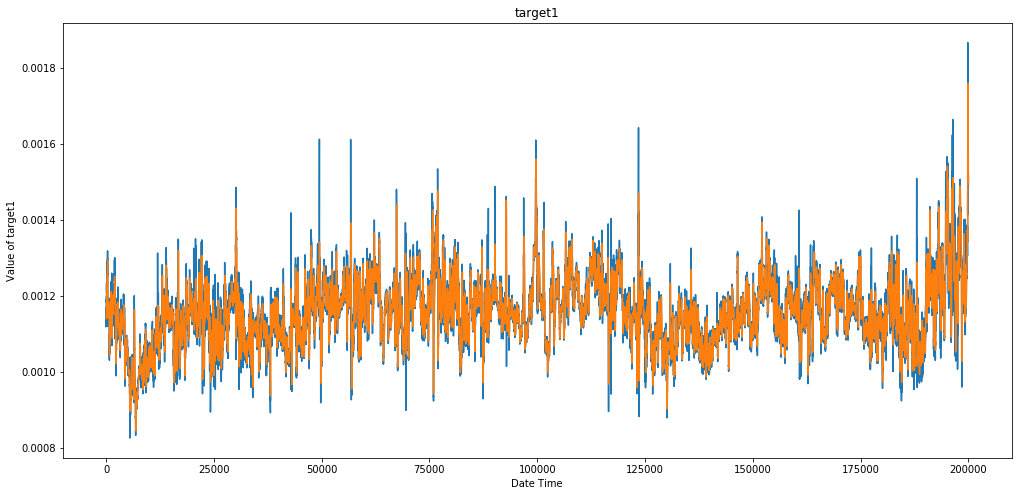

In [90]:
plt.figure(figsize=(17, 8))
plt.plot(train.target1)
plt.plot(train.target1.rolling(50).mean(), label= 'MA 50 values')
plt.title('target1')
plt.ylabel('Value of target1')
plt.xlabel('Date Time')
plt.grid(False)
plt.show()

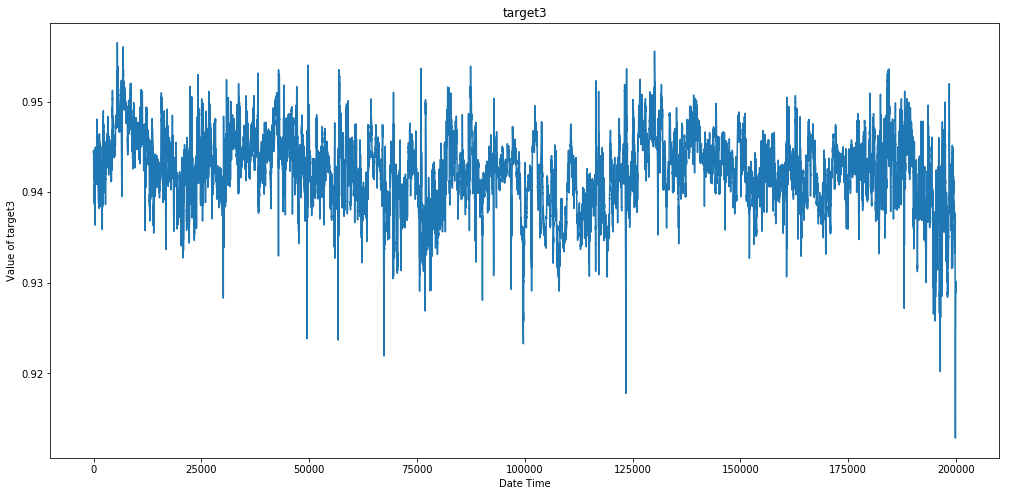

In [91]:
plt.figure(figsize=(17, 8))
plt.plot(train.target3)
plt.title('target3')
plt.ylabel('Value of target3')
plt.xlabel('Date Time')
plt.grid(False)
plt.show()

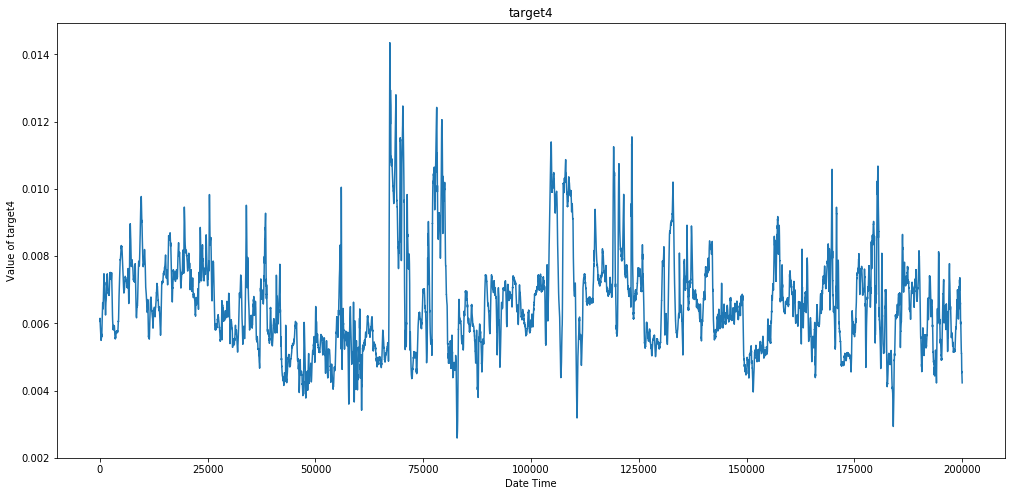

In [92]:
plt.figure(figsize=(17, 8))
plt.plot(train.target4)
plt.title('target4')
plt.ylabel('Value of target4')
plt.xlabel('Date Time')
plt.grid(False)
plt.show()

По все видимости target1...3 одно и тоже, только в разных масштабах и с разными знаками, стоит посмотреть на корреляции
Глянем на распределения выходных величин

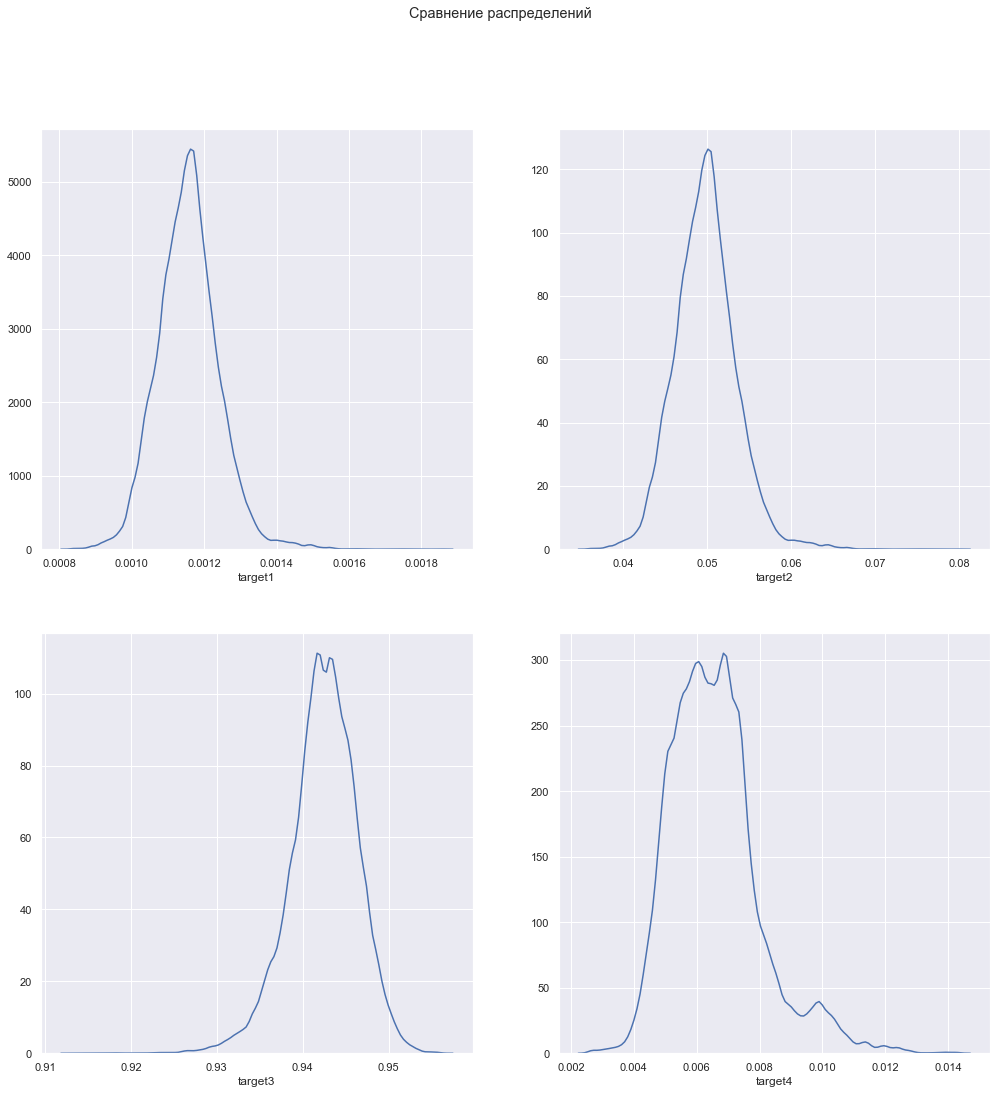

In [94]:
fig, axes = plt.subplots(2, 2)
sns.set(rc={'figure.figsize':(17, 17)})
fig.suptitle('Сравнение распределений')
sns.distplot(train['target1'], hist=False, ax=axes[0, 0])
sns.distplot(train['target2'], hist=False, ax=axes[0, 1])
sns.distplot(train['target3'], hist=False, ax=axes[1, 0])
sns.distplot(train['target4'], hist=False, ax=axes[1, 1])

Почти совпадают

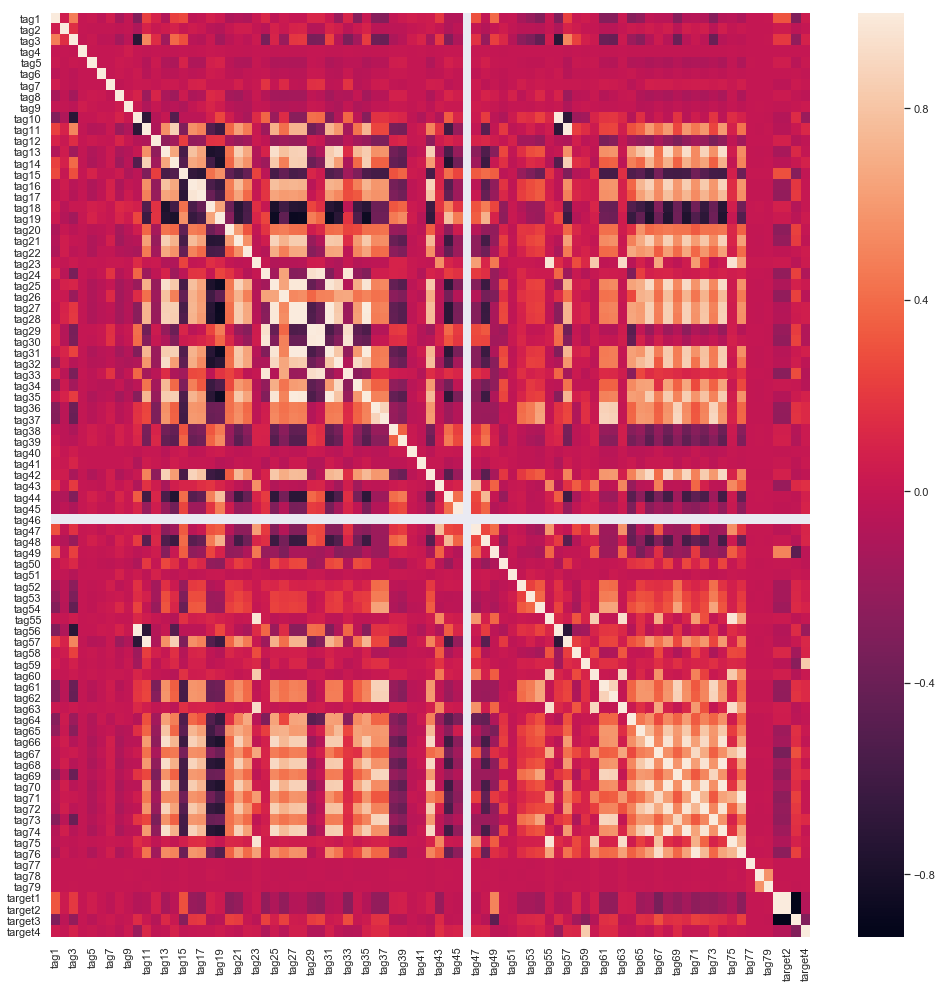

In [95]:
sns.set(rc={'figure.figsize':(17, 17)})
sns.heatmap(train.corr())

# Линейная регрессия

Линейная регрессия для старта отбора признаков

In [96]:
from sklearn.feature_selection import SelectKBest

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pprint import pprint

In [98]:
X = train.iloc[:, 1:-4]
y = train.iloc[:, -4:]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    train_size=.7,
                                                    test_size=.3, random_state=1991)
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
y_predict = LR_model.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print(f'MAE: {mae}\n r2: {r2}')

MAE: 0.0006014148592013896
 r2: 0.81754952021653


топ 10 аргументов

In [107]:
for target, coeffs in zip(train.keys()[-4:], LR_model.coef_):
    tags = {'tag' + str(i): coef 
            for i, coef in enumerate(coeffs)}
    tags = sorted(tags.items(), key=lambda x: x[1])[:10]
    print(target)
    pprint(tags)

target1
[('tag15', -0.08421265835298641),
 ('tag14', -0.05953149523344696),
 ('tag17', -0.0022112728014721823),
 ('tag12', -0.0005197114059377752),
 ('tag74', -2.641256763974832e-05),
 ('tag66', -1.9257544064000404e-05),
 ('tag73', -1.1239302091100092e-05),
 ('tag70', -1.0758407192165004e-05),
 ('tag65', -8.21877175861789e-06),
 ('tag59', -5.483805799283606e-06)]
target2
[('tag15', -3.6298222951146824),
 ('tag14', -2.5616239104653036),
 ('tag17', -0.09521164618887039),
 ('tag12', -0.02248991852249483),
 ('tag74', -0.001137709809754868),
 ('tag66', -0.0008297078178068351),
 ('tag73', -0.0004827907241791163),
 ('tag70', -0.00046420860396956254),
 ('tag65', -0.0003542051301295701),
 ('tag59', -0.0002362171437924488)]
target3
[('tag13', -0.41886244527289807),
 ('tag11', -0.016716834506520183),
 ('tag62', -0.0115986987593746),
 ('tag58', -0.006935734670239106),
 ('tag57', -0.0050318881113553884),
 ('tag41', -0.001057670253697074),
 ('tag54', -0.000601710945223391),
 ('tag22', -0.00053105986

Возможно эти коэффицинеты для будущих моделей

In [108]:
tags_to_learn = {}
for target, coeffs in zip(train.keys()[-4:], LR_model.coef_):
    tags = {'tag' + str(i): coef 
            for i, coef in enumerate(coeffs)}
    tags = dict(filter(lambda x: abs(x[1]) > 0.00025, tags.items()))
    tags_to_learn[target] = tags.keys()

# LightGBM

In [109]:
import lightgbm as lgb
import pickle

На всякий случай, для проверки оставлю часть данных

In [110]:
X_last_check, y_last_check = X[-50000:], y[-50000:]
X, y = X[:-50000], y[:-50000]

In [111]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'l2_root'],
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 32,  
    "max_bin": 512,
    "num_iterations": 5000,
    "n_estimators": 1000,
}

In [144]:
# Использую переменные из LR моделей для GBM
models = []
for target, predictors in tags_to_learn.items():
    X_train_ = X_train[predictors]
    X_test_ = X_test[predictors]
    y_train_ = y_train[target]
    y_test_ = y_test[target]
    gbm.fit(X_train_, y_train_,
            eval_set=[(X_test_, y_test_)],
            eval_metric='l1',        
            early_stopping_rounds=500)

    y_predict = gbm.predict(X_test_)
    mae = mean_absolute_error(y_test_, y_predict)
    r2 = r2_score(y_test_, y_predict)
    with open('results.txt', 'a') as scores_file:
        print(f'MAE: {mae}\n r2: {r2}', file=scores_file)
    
    pkl_filename = f'models/gbl_model_{target}_selected_predictors.pkl'
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gbm, file)
    models.append(gbm)

C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.

[110]	valid_0's l1: 4.26774e-05	valid_0's l2: 3.24868e-09	valid_0's rmse: 5.69972e-05
[111]	valid_0's l1: 4.26456e-05	valid_0's l2: 3.24426e-09	valid_0's rmse: 5.69584e-05
[112]	valid_0's l1: 4.25913e-05	valid_0's l2: 3.23711e-09	valid_0's rmse: 5.68956e-05
[113]	valid_0's l1: 4.25478e-05	valid_0's l2: 3.23175e-09	valid_0's rmse: 5.68485e-05
[114]	valid_0's l1: 4.25081e-05	valid_0's l2: 3.22619e-09	valid_0's rmse: 5.67996e-05
[115]	valid_0's l1: 4.24656e-05	valid_0's l2: 3.22045e-09	valid_0's rmse: 5.67491e-05
[116]	valid_0's l1: 4.24216e-05	valid_0's l2: 3.2146e-09	valid_0's rmse: 5.66974e-05
[117]	valid_0's l1: 4.23805e-05	valid_0's l2: 3.20995e-09	valid_0's rmse: 5.66565e-05
[118]	valid_0's l1: 4.23259e-05	valid_0's l2: 3.20072e-09	valid_0's rmse: 5.65749e-05
[119]	valid_0's l1: 4.22854e-05	valid_0's l2: 3.19576e-09	valid_0's rmse: 5.65311e-05
[120]	valid_0's l1: 4.22496e-05	valid_0's l2: 3.19145e-09	valid_0's rmse: 5.64929e-05
[121]	valid_0's l1: 4.22085e-05	valid_0's l2: 3.18576e-

[237]	valid_0's l1: 3.89434e-05	valid_0's l2: 2.71892e-09	valid_0's rmse: 5.21433e-05
[238]	valid_0's l1: 3.8922e-05	valid_0's l2: 2.71611e-09	valid_0's rmse: 5.21164e-05
[239]	valid_0's l1: 3.88997e-05	valid_0's l2: 2.71315e-09	valid_0's rmse: 5.20879e-05
[240]	valid_0's l1: 3.88662e-05	valid_0's l2: 2.70955e-09	valid_0's rmse: 5.20534e-05
[241]	valid_0's l1: 3.88483e-05	valid_0's l2: 2.70716e-09	valid_0's rmse: 5.20304e-05
[242]	valid_0's l1: 3.88299e-05	valid_0's l2: 2.70488e-09	valid_0's rmse: 5.20085e-05
[243]	valid_0's l1: 3.87988e-05	valid_0's l2: 2.70215e-09	valid_0's rmse: 5.19822e-05
[244]	valid_0's l1: 3.8764e-05	valid_0's l2: 2.69829e-09	valid_0's rmse: 5.19451e-05
[245]	valid_0's l1: 3.87358e-05	valid_0's l2: 2.69429e-09	valid_0's rmse: 5.19066e-05
[246]	valid_0's l1: 3.87175e-05	valid_0's l2: 2.69175e-09	valid_0's rmse: 5.18821e-05
[247]	valid_0's l1: 3.86921e-05	valid_0's l2: 2.68796e-09	valid_0's rmse: 5.18455e-05
[248]	valid_0's l1: 3.8678e-05	valid_0's l2: 2.68618e-09

[349]	valid_0's l1: 3.66241e-05	valid_0's l2: 2.42364e-09	valid_0's rmse: 4.92304e-05
[350]	valid_0's l1: 3.66017e-05	valid_0's l2: 2.42118e-09	valid_0's rmse: 4.92055e-05
[351]	valid_0's l1: 3.6589e-05	valid_0's l2: 2.41928e-09	valid_0's rmse: 4.91862e-05
[352]	valid_0's l1: 3.65635e-05	valid_0's l2: 2.41533e-09	valid_0's rmse: 4.9146e-05
[353]	valid_0's l1: 3.65506e-05	valid_0's l2: 2.41357e-09	valid_0's rmse: 4.91281e-05
[354]	valid_0's l1: 3.65157e-05	valid_0's l2: 2.40788e-09	valid_0's rmse: 4.90702e-05
[355]	valid_0's l1: 3.65034e-05	valid_0's l2: 2.40649e-09	valid_0's rmse: 4.9056e-05
[356]	valid_0's l1: 3.64826e-05	valid_0's l2: 2.40451e-09	valid_0's rmse: 4.90359e-05
[357]	valid_0's l1: 3.64626e-05	valid_0's l2: 2.40224e-09	valid_0's rmse: 4.90127e-05
[358]	valid_0's l1: 3.64447e-05	valid_0's l2: 2.40056e-09	valid_0's rmse: 4.89955e-05
[359]	valid_0's l1: 3.64291e-05	valid_0's l2: 2.3983e-09	valid_0's rmse: 4.89724e-05
[360]	valid_0's l1: 3.64006e-05	valid_0's l2: 2.39502e-09	

[464]	valid_0's l1: 3.47797e-05	valid_0's l2: 2.20325e-09	valid_0's rmse: 4.69388e-05
[465]	valid_0's l1: 3.47477e-05	valid_0's l2: 2.1983e-09	valid_0's rmse: 4.6886e-05
[466]	valid_0's l1: 3.47387e-05	valid_0's l2: 2.19718e-09	valid_0's rmse: 4.68741e-05
[467]	valid_0's l1: 3.47275e-05	valid_0's l2: 2.19597e-09	valid_0's rmse: 4.68612e-05
[468]	valid_0's l1: 3.47183e-05	valid_0's l2: 2.19513e-09	valid_0's rmse: 4.68522e-05
[469]	valid_0's l1: 3.47112e-05	valid_0's l2: 2.19403e-09	valid_0's rmse: 4.68404e-05
[470]	valid_0's l1: 3.46956e-05	valid_0's l2: 2.1927e-09	valid_0's rmse: 4.68263e-05
[471]	valid_0's l1: 3.46733e-05	valid_0's l2: 2.18955e-09	valid_0's rmse: 4.67926e-05
[472]	valid_0's l1: 3.46532e-05	valid_0's l2: 2.18706e-09	valid_0's rmse: 4.6766e-05
[473]	valid_0's l1: 3.46308e-05	valid_0's l2: 2.18368e-09	valid_0's rmse: 4.67298e-05
[474]	valid_0's l1: 3.46115e-05	valid_0's l2: 2.18177e-09	valid_0's rmse: 4.67094e-05
[475]	valid_0's l1: 3.46011e-05	valid_0's l2: 2.18041e-09	

[580]	valid_0's l1: 3.32604e-05	valid_0's l2: 2.03039e-09	valid_0's rmse: 4.50598e-05
[581]	valid_0's l1: 3.32504e-05	valid_0's l2: 2.02924e-09	valid_0's rmse: 4.50471e-05
[582]	valid_0's l1: 3.3233e-05	valid_0's l2: 2.02749e-09	valid_0's rmse: 4.50276e-05
[583]	valid_0's l1: 3.32109e-05	valid_0's l2: 2.02556e-09	valid_0's rmse: 4.50062e-05
[584]	valid_0's l1: 3.32013e-05	valid_0's l2: 2.02455e-09	valid_0's rmse: 4.4995e-05
[585]	valid_0's l1: 3.3196e-05	valid_0's l2: 2.02402e-09	valid_0's rmse: 4.49891e-05
[586]	valid_0's l1: 3.31854e-05	valid_0's l2: 2.02293e-09	valid_0's rmse: 4.4977e-05
[587]	valid_0's l1: 3.31788e-05	valid_0's l2: 2.02223e-09	valid_0's rmse: 4.49692e-05
[588]	valid_0's l1: 3.3163e-05	valid_0's l2: 2.0208e-09	valid_0's rmse: 4.49533e-05
[589]	valid_0's l1: 3.31577e-05	valid_0's l2: 2.02016e-09	valid_0's rmse: 4.49462e-05
[590]	valid_0's l1: 3.31375e-05	valid_0's l2: 2.01817e-09	valid_0's rmse: 4.4924e-05
[591]	valid_0's l1: 3.31253e-05	valid_0's l2: 2.01665e-09	val

[695]	valid_0's l1: 3.20582e-05	valid_0's l2: 1.90228e-09	valid_0's rmse: 4.36151e-05
[696]	valid_0's l1: 3.20558e-05	valid_0's l2: 1.90202e-09	valid_0's rmse: 4.36121e-05
[697]	valid_0's l1: 3.20507e-05	valid_0's l2: 1.90152e-09	valid_0's rmse: 4.36065e-05
[698]	valid_0's l1: 3.20342e-05	valid_0's l2: 1.9e-09	valid_0's rmse: 4.3589e-05
[699]	valid_0's l1: 3.20259e-05	valid_0's l2: 1.89935e-09	valid_0's rmse: 4.35815e-05
[700]	valid_0's l1: 3.20201e-05	valid_0's l2: 1.89885e-09	valid_0's rmse: 4.35758e-05
[701]	valid_0's l1: 3.2001e-05	valid_0's l2: 1.89636e-09	valid_0's rmse: 4.35472e-05
[702]	valid_0's l1: 3.19848e-05	valid_0's l2: 1.89444e-09	valid_0's rmse: 4.35251e-05
[703]	valid_0's l1: 3.19771e-05	valid_0's l2: 1.89363e-09	valid_0's rmse: 4.35159e-05
[704]	valid_0's l1: 3.19608e-05	valid_0's l2: 1.89168e-09	valid_0's rmse: 4.34935e-05
[705]	valid_0's l1: 3.19521e-05	valid_0's l2: 1.8909e-09	valid_0's rmse: 4.34845e-05
[706]	valid_0's l1: 3.19465e-05	valid_0's l2: 1.89029e-09	val

[814]	valid_0's l1: 3.09828e-05	valid_0's l2: 1.791e-09	valid_0's rmse: 4.23203e-05
[815]	valid_0's l1: 3.0971e-05	valid_0's l2: 1.7895e-09	valid_0's rmse: 4.23025e-05
[816]	valid_0's l1: 3.09585e-05	valid_0's l2: 1.78782e-09	valid_0's rmse: 4.22826e-05
[817]	valid_0's l1: 3.09566e-05	valid_0's l2: 1.78758e-09	valid_0's rmse: 4.22798e-05
[818]	valid_0's l1: 3.0951e-05	valid_0's l2: 1.78719e-09	valid_0's rmse: 4.22752e-05
[819]	valid_0's l1: 3.0947e-05	valid_0's l2: 1.78677e-09	valid_0's rmse: 4.22702e-05
[820]	valid_0's l1: 3.09389e-05	valid_0's l2: 1.78593e-09	valid_0's rmse: 4.22602e-05
[821]	valid_0's l1: 3.09291e-05	valid_0's l2: 1.78509e-09	valid_0's rmse: 4.22504e-05
[822]	valid_0's l1: 3.09214e-05	valid_0's l2: 1.78444e-09	valid_0's rmse: 4.22427e-05
[823]	valid_0's l1: 3.0913e-05	valid_0's l2: 1.78364e-09	valid_0's rmse: 4.22332e-05
[824]	valid_0's l1: 3.09056e-05	valid_0's l2: 1.78302e-09	valid_0's rmse: 4.22258e-05
[825]	valid_0's l1: 3.08977e-05	valid_0's l2: 1.78226e-09	val

[931]	valid_0's l1: 3.01111e-05	valid_0's l2: 1.70391e-09	valid_0's rmse: 4.12784e-05
[932]	valid_0's l1: 3.01047e-05	valid_0's l2: 1.70263e-09	valid_0's rmse: 4.1263e-05
[933]	valid_0's l1: 3.0096e-05	valid_0's l2: 1.70154e-09	valid_0's rmse: 4.12497e-05
[934]	valid_0's l1: 3.00923e-05	valid_0's l2: 1.70104e-09	valid_0's rmse: 4.12437e-05
[935]	valid_0's l1: 3.00771e-05	valid_0's l2: 1.69968e-09	valid_0's rmse: 4.12272e-05
[936]	valid_0's l1: 3.00682e-05	valid_0's l2: 1.69896e-09	valid_0's rmse: 4.12185e-05
[937]	valid_0's l1: 3.00595e-05	valid_0's l2: 1.69786e-09	valid_0's rmse: 4.12051e-05
[938]	valid_0's l1: 3.00517e-05	valid_0's l2: 1.69707e-09	valid_0's rmse: 4.11955e-05
[939]	valid_0's l1: 3.00465e-05	valid_0's l2: 1.6965e-09	valid_0's rmse: 4.11886e-05
[940]	valid_0's l1: 3.00423e-05	valid_0's l2: 1.69616e-09	valid_0's rmse: 4.11844e-05
[941]	valid_0's l1: 3.00292e-05	valid_0's l2: 1.6945e-09	valid_0's rmse: 4.11643e-05
[942]	valid_0's l1: 3.00213e-05	valid_0's l2: 1.69325e-09	

[1047]	valid_0's l1: 2.92929e-05	valid_0's l2: 1.62245e-09	valid_0's rmse: 4.02797e-05
[1048]	valid_0's l1: 2.92903e-05	valid_0's l2: 1.62223e-09	valid_0's rmse: 4.02769e-05
[1049]	valid_0's l1: 2.92792e-05	valid_0's l2: 1.62119e-09	valid_0's rmse: 4.0264e-05
[1050]	valid_0's l1: 2.92728e-05	valid_0's l2: 1.62049e-09	valid_0's rmse: 4.02554e-05
[1051]	valid_0's l1: 2.92676e-05	valid_0's l2: 1.61989e-09	valid_0's rmse: 4.02478e-05
[1052]	valid_0's l1: 2.92616e-05	valid_0's l2: 1.6195e-09	valid_0's rmse: 4.0243e-05
[1053]	valid_0's l1: 2.92568e-05	valid_0's l2: 1.61904e-09	valid_0's rmse: 4.02374e-05
[1054]	valid_0's l1: 2.92509e-05	valid_0's l2: 1.61823e-09	valid_0's rmse: 4.02272e-05
[1055]	valid_0's l1: 2.92475e-05	valid_0's l2: 1.61785e-09	valid_0's rmse: 4.02225e-05
[1056]	valid_0's l1: 2.92418e-05	valid_0's l2: 1.61742e-09	valid_0's rmse: 4.02172e-05
[1057]	valid_0's l1: 2.92308e-05	valid_0's l2: 1.61629e-09	valid_0's rmse: 4.02031e-05
[1058]	valid_0's l1: 2.92238e-05	valid_0's l2:

[1163]	valid_0's l1: 2.85797e-05	valid_0's l2: 1.55387e-09	valid_0's rmse: 3.94192e-05
[1164]	valid_0's l1: 2.85747e-05	valid_0's l2: 1.5535e-09	valid_0's rmse: 3.94145e-05
[1165]	valid_0's l1: 2.857e-05	valid_0's l2: 1.5531e-09	valid_0's rmse: 3.94094e-05
[1166]	valid_0's l1: 2.85666e-05	valid_0's l2: 1.55277e-09	valid_0's rmse: 3.94052e-05
[1167]	valid_0's l1: 2.85622e-05	valid_0's l2: 1.55242e-09	valid_0's rmse: 3.94007e-05
[1168]	valid_0's l1: 2.8556e-05	valid_0's l2: 1.55144e-09	valid_0's rmse: 3.93883e-05
[1169]	valid_0's l1: 2.85523e-05	valid_0's l2: 1.55111e-09	valid_0's rmse: 3.93842e-05
[1170]	valid_0's l1: 2.8549e-05	valid_0's l2: 1.55089e-09	valid_0's rmse: 3.93814e-05
[1171]	valid_0's l1: 2.85377e-05	valid_0's l2: 1.54988e-09	valid_0's rmse: 3.93686e-05
[1172]	valid_0's l1: 2.8534e-05	valid_0's l2: 1.54967e-09	valid_0's rmse: 3.93658e-05
[1173]	valid_0's l1: 2.85223e-05	valid_0's l2: 1.54851e-09	valid_0's rmse: 3.93511e-05
[1174]	valid_0's l1: 2.85192e-05	valid_0's l2: 1.5

[1284]	valid_0's l1: 2.78737e-05	valid_0's l2: 1.48454e-09	valid_0's rmse: 3.85297e-05
[1285]	valid_0's l1: 2.7869e-05	valid_0's l2: 1.48376e-09	valid_0's rmse: 3.85196e-05
[1286]	valid_0's l1: 2.78663e-05	valid_0's l2: 1.48352e-09	valid_0's rmse: 3.85165e-05
[1287]	valid_0's l1: 2.78607e-05	valid_0's l2: 1.48307e-09	valid_0's rmse: 3.85106e-05
[1288]	valid_0's l1: 2.78567e-05	valid_0's l2: 1.48259e-09	valid_0's rmse: 3.85044e-05
[1289]	valid_0's l1: 2.78537e-05	valid_0's l2: 1.48233e-09	valid_0's rmse: 3.85011e-05
[1290]	valid_0's l1: 2.78504e-05	valid_0's l2: 1.48191e-09	valid_0's rmse: 3.84956e-05
[1291]	valid_0's l1: 2.78468e-05	valid_0's l2: 1.48171e-09	valid_0's rmse: 3.8493e-05
[1292]	valid_0's l1: 2.78442e-05	valid_0's l2: 1.48148e-09	valid_0's rmse: 3.849e-05
[1293]	valid_0's l1: 2.78404e-05	valid_0's l2: 1.48123e-09	valid_0's rmse: 3.84867e-05
[1294]	valid_0's l1: 2.78381e-05	valid_0's l2: 1.48107e-09	valid_0's rmse: 3.84847e-05
[1295]	valid_0's l1: 2.7833e-05	valid_0's l2: 1

[1398]	valid_0's l1: 2.73855e-05	valid_0's l2: 1.44012e-09	valid_0's rmse: 3.7949e-05
[1399]	valid_0's l1: 2.73843e-05	valid_0's l2: 1.44004e-09	valid_0's rmse: 3.79478e-05
[1400]	valid_0's l1: 2.73809e-05	valid_0's l2: 1.43956e-09	valid_0's rmse: 3.79416e-05
[1401]	valid_0's l1: 2.73763e-05	valid_0's l2: 1.43888e-09	valid_0's rmse: 3.79326e-05
[1402]	valid_0's l1: 2.73701e-05	valid_0's l2: 1.43822e-09	valid_0's rmse: 3.79238e-05
[1403]	valid_0's l1: 2.73662e-05	valid_0's l2: 1.43765e-09	valid_0's rmse: 3.79163e-05
[1404]	valid_0's l1: 2.73612e-05	valid_0's l2: 1.43705e-09	valid_0's rmse: 3.79084e-05
[1405]	valid_0's l1: 2.73563e-05	valid_0's l2: 1.43664e-09	valid_0's rmse: 3.79031e-05
[1406]	valid_0's l1: 2.73487e-05	valid_0's l2: 1.43589e-09	valid_0's rmse: 3.78931e-05
[1407]	valid_0's l1: 2.73455e-05	valid_0's l2: 1.4355e-09	valid_0's rmse: 3.7888e-05
[1408]	valid_0's l1: 2.73426e-05	valid_0's l2: 1.43526e-09	valid_0's rmse: 3.78848e-05
[1409]	valid_0's l1: 2.73346e-05	valid_0's l2:

[1518]	valid_0's l1: 2.69287e-05	valid_0's l2: 1.39709e-09	valid_0's rmse: 3.73777e-05
[1519]	valid_0's l1: 2.69276e-05	valid_0's l2: 1.397e-09	valid_0's rmse: 3.73764e-05
[1520]	valid_0's l1: 2.69244e-05	valid_0's l2: 1.3967e-09	valid_0's rmse: 3.73724e-05
[1521]	valid_0's l1: 2.69192e-05	valid_0's l2: 1.39631e-09	valid_0's rmse: 3.73672e-05
[1522]	valid_0's l1: 2.69145e-05	valid_0's l2: 1.39597e-09	valid_0's rmse: 3.73626e-05
[1523]	valid_0's l1: 2.69079e-05	valid_0's l2: 1.39542e-09	valid_0's rmse: 3.73553e-05
[1524]	valid_0's l1: 2.69021e-05	valid_0's l2: 1.39494e-09	valid_0's rmse: 3.73489e-05
[1525]	valid_0's l1: 2.68977e-05	valid_0's l2: 1.39451e-09	valid_0's rmse: 3.73432e-05
[1526]	valid_0's l1: 2.68914e-05	valid_0's l2: 1.39407e-09	valid_0's rmse: 3.73373e-05
[1527]	valid_0's l1: 2.68863e-05	valid_0's l2: 1.39366e-09	valid_0's rmse: 3.73318e-05
[1528]	valid_0's l1: 2.68825e-05	valid_0's l2: 1.39339e-09	valid_0's rmse: 3.73281e-05
[1529]	valid_0's l1: 2.68789e-05	valid_0's l2:

[1645]	valid_0's l1: 2.6415e-05	valid_0's l2: 1.35235e-09	valid_0's rmse: 3.67743e-05
[1646]	valid_0's l1: 2.64138e-05	valid_0's l2: 1.35226e-09	valid_0's rmse: 3.67731e-05
[1647]	valid_0's l1: 2.64075e-05	valid_0's l2: 1.35184e-09	valid_0's rmse: 3.67674e-05
[1648]	valid_0's l1: 2.64001e-05	valid_0's l2: 1.35103e-09	valid_0's rmse: 3.67564e-05
[1649]	valid_0's l1: 2.63948e-05	valid_0's l2: 1.35065e-09	valid_0's rmse: 3.67512e-05
[1650]	valid_0's l1: 2.63945e-05	valid_0's l2: 1.35061e-09	valid_0's rmse: 3.67506e-05
[1651]	valid_0's l1: 2.6391e-05	valid_0's l2: 1.35028e-09	valid_0's rmse: 3.67461e-05
[1652]	valid_0's l1: 2.63861e-05	valid_0's l2: 1.34983e-09	valid_0's rmse: 3.67401e-05
[1653]	valid_0's l1: 2.63843e-05	valid_0's l2: 1.34965e-09	valid_0's rmse: 3.67376e-05
[1654]	valid_0's l1: 2.63816e-05	valid_0's l2: 1.34935e-09	valid_0's rmse: 3.67335e-05
[1655]	valid_0's l1: 2.63797e-05	valid_0's l2: 1.34912e-09	valid_0's rmse: 3.67304e-05
[1656]	valid_0's l1: 2.63753e-05	valid_0's l2

[1763]	valid_0's l1: 2.59815e-05	valid_0's l2: 1.31477e-09	valid_0's rmse: 3.62598e-05
[1764]	valid_0's l1: 2.59759e-05	valid_0's l2: 1.31435e-09	valid_0's rmse: 3.6254e-05
[1765]	valid_0's l1: 2.59726e-05	valid_0's l2: 1.31407e-09	valid_0's rmse: 3.62501e-05
[1766]	valid_0's l1: 2.59694e-05	valid_0's l2: 1.31386e-09	valid_0's rmse: 3.62472e-05
[1767]	valid_0's l1: 2.59666e-05	valid_0's l2: 1.31354e-09	valid_0's rmse: 3.62428e-05
[1768]	valid_0's l1: 2.5962e-05	valid_0's l2: 1.31312e-09	valid_0's rmse: 3.6237e-05
[1769]	valid_0's l1: 2.59559e-05	valid_0's l2: 1.31263e-09	valid_0's rmse: 3.62302e-05
[1770]	valid_0's l1: 2.59529e-05	valid_0's l2: 1.31244e-09	valid_0's rmse: 3.62276e-05
[1771]	valid_0's l1: 2.59529e-05	valid_0's l2: 1.31244e-09	valid_0's rmse: 3.62277e-05
[1772]	valid_0's l1: 2.59528e-05	valid_0's l2: 1.31246e-09	valid_0's rmse: 3.62279e-05
[1773]	valid_0's l1: 2.5952e-05	valid_0's l2: 1.31238e-09	valid_0's rmse: 3.62268e-05
[1774]	valid_0's l1: 2.59453e-05	valid_0's l2: 

[1886]	valid_0's l1: 2.56137e-05	valid_0's l2: 1.28168e-09	valid_0's rmse: 3.58005e-05
[1887]	valid_0's l1: 2.56127e-05	valid_0's l2: 1.28157e-09	valid_0's rmse: 3.5799e-05
[1888]	valid_0's l1: 2.56098e-05	valid_0's l2: 1.28132e-09	valid_0's rmse: 3.57955e-05
[1889]	valid_0's l1: 2.5606e-05	valid_0's l2: 1.28095e-09	valid_0's rmse: 3.57904e-05
[1890]	valid_0's l1: 2.56016e-05	valid_0's l2: 1.2806e-09	valid_0's rmse: 3.57855e-05
[1891]	valid_0's l1: 2.56015e-05	valid_0's l2: 1.2806e-09	valid_0's rmse: 3.57855e-05
[1892]	valid_0's l1: 2.56001e-05	valid_0's l2: 1.28043e-09	valid_0's rmse: 3.57831e-05
[1893]	valid_0's l1: 2.55997e-05	valid_0's l2: 1.2804e-09	valid_0's rmse: 3.57827e-05
[1894]	valid_0's l1: 2.55997e-05	valid_0's l2: 1.28041e-09	valid_0's rmse: 3.57828e-05
[1895]	valid_0's l1: 2.55973e-05	valid_0's l2: 1.28013e-09	valid_0's rmse: 3.5779e-05
[1896]	valid_0's l1: 2.55968e-05	valid_0's l2: 1.28006e-09	valid_0's rmse: 3.57779e-05
[1897]	valid_0's l1: 2.55949e-05	valid_0's l2: 1.

[2005]	valid_0's l1: 2.53068e-05	valid_0's l2: 1.25341e-09	valid_0's rmse: 3.54036e-05
[2006]	valid_0's l1: 2.53035e-05	valid_0's l2: 1.25306e-09	valid_0's rmse: 3.53986e-05
[2007]	valid_0's l1: 2.53025e-05	valid_0's l2: 1.25292e-09	valid_0's rmse: 3.53967e-05
[2008]	valid_0's l1: 2.53004e-05	valid_0's l2: 1.25261e-09	valid_0's rmse: 3.53923e-05
[2009]	valid_0's l1: 2.52984e-05	valid_0's l2: 1.2524e-09	valid_0's rmse: 3.53893e-05
[2010]	valid_0's l1: 2.52932e-05	valid_0's l2: 1.252e-09	valid_0's rmse: 3.53836e-05
[2011]	valid_0's l1: 2.52902e-05	valid_0's l2: 1.25176e-09	valid_0's rmse: 3.53802e-05
[2012]	valid_0's l1: 2.52867e-05	valid_0's l2: 1.25146e-09	valid_0's rmse: 3.53759e-05
[2013]	valid_0's l1: 2.52838e-05	valid_0's l2: 1.25119e-09	valid_0's rmse: 3.53721e-05
[2014]	valid_0's l1: 2.52807e-05	valid_0's l2: 1.25096e-09	valid_0's rmse: 3.53689e-05
[2015]	valid_0's l1: 2.52779e-05	valid_0's l2: 1.25076e-09	valid_0's rmse: 3.53662e-05
[2016]	valid_0's l1: 2.52762e-05	valid_0's l2:

[2122]	valid_0's l1: 2.49616e-05	valid_0's l2: 1.22412e-09	valid_0's rmse: 3.49874e-05
[2123]	valid_0's l1: 2.49605e-05	valid_0's l2: 1.22404e-09	valid_0's rmse: 3.49862e-05
[2124]	valid_0's l1: 2.49585e-05	valid_0's l2: 1.22393e-09	valid_0's rmse: 3.49848e-05
[2125]	valid_0's l1: 2.49552e-05	valid_0's l2: 1.22353e-09	valid_0's rmse: 3.49789e-05
[2126]	valid_0's l1: 2.49528e-05	valid_0's l2: 1.22322e-09	valid_0's rmse: 3.49746e-05
[2127]	valid_0's l1: 2.49509e-05	valid_0's l2: 1.2231e-09	valid_0's rmse: 3.49729e-05
[2128]	valid_0's l1: 2.49485e-05	valid_0's l2: 1.22297e-09	valid_0's rmse: 3.4971e-05
[2129]	valid_0's l1: 2.49465e-05	valid_0's l2: 1.22281e-09	valid_0's rmse: 3.49687e-05
[2130]	valid_0's l1: 2.49446e-05	valid_0's l2: 1.22272e-09	valid_0's rmse: 3.49675e-05
[2131]	valid_0's l1: 2.49426e-05	valid_0's l2: 1.22252e-09	valid_0's rmse: 3.49645e-05
[2132]	valid_0's l1: 2.49406e-05	valid_0's l2: 1.22236e-09	valid_0's rmse: 3.49623e-05
[2133]	valid_0's l1: 2.49392e-05	valid_0's l2

[2242]	valid_0's l1: 2.4671e-05	valid_0's l2: 1.2004e-09	valid_0's rmse: 3.46468e-05
[2243]	valid_0's l1: 2.46677e-05	valid_0's l2: 1.20008e-09	valid_0's rmse: 3.46421e-05
[2244]	valid_0's l1: 2.46658e-05	valid_0's l2: 1.19997e-09	valid_0's rmse: 3.46406e-05
[2245]	valid_0's l1: 2.46613e-05	valid_0's l2: 1.19957e-09	valid_0's rmse: 3.46347e-05
[2246]	valid_0's l1: 2.46581e-05	valid_0's l2: 1.19926e-09	valid_0's rmse: 3.46303e-05
[2247]	valid_0's l1: 2.46548e-05	valid_0's l2: 1.19889e-09	valid_0's rmse: 3.46249e-05
[2248]	valid_0's l1: 2.46533e-05	valid_0's l2: 1.19873e-09	valid_0's rmse: 3.46227e-05
[2249]	valid_0's l1: 2.46517e-05	valid_0's l2: 1.1986e-09	valid_0's rmse: 3.46209e-05
[2250]	valid_0's l1: 2.46468e-05	valid_0's l2: 1.19827e-09	valid_0's rmse: 3.4616e-05
[2251]	valid_0's l1: 2.46455e-05	valid_0's l2: 1.19816e-09	valid_0's rmse: 3.46144e-05
[2252]	valid_0's l1: 2.46421e-05	valid_0's l2: 1.19785e-09	valid_0's rmse: 3.461e-05
[2253]	valid_0's l1: 2.46398e-05	valid_0's l2: 1.

[2360]	valid_0's l1: 2.44293e-05	valid_0's l2: 1.17982e-09	valid_0's rmse: 3.43486e-05
[2361]	valid_0's l1: 2.44238e-05	valid_0's l2: 1.17938e-09	valid_0's rmse: 3.43421e-05
[2362]	valid_0's l1: 2.44229e-05	valid_0's l2: 1.17932e-09	valid_0's rmse: 3.43412e-05
[2363]	valid_0's l1: 2.44194e-05	valid_0's l2: 1.17908e-09	valid_0's rmse: 3.43377e-05
[2364]	valid_0's l1: 2.44168e-05	valid_0's l2: 1.17886e-09	valid_0's rmse: 3.43345e-05
[2365]	valid_0's l1: 2.44165e-05	valid_0's l2: 1.17885e-09	valid_0's rmse: 3.43344e-05
[2366]	valid_0's l1: 2.44142e-05	valid_0's l2: 1.17866e-09	valid_0's rmse: 3.43316e-05
[2367]	valid_0's l1: 2.44139e-05	valid_0's l2: 1.17864e-09	valid_0's rmse: 3.43314e-05
[2368]	valid_0's l1: 2.44118e-05	valid_0's l2: 1.17849e-09	valid_0's rmse: 3.43292e-05
[2369]	valid_0's l1: 2.44115e-05	valid_0's l2: 1.17848e-09	valid_0's rmse: 3.43289e-05
[2370]	valid_0's l1: 2.441e-05	valid_0's l2: 1.17834e-09	valid_0's rmse: 3.4327e-05
[2371]	valid_0's l1: 2.44074e-05	valid_0's l2:

[2465]	valid_0's l1: 2.42154e-05	valid_0's l2: 1.16163e-09	valid_0's rmse: 3.40827e-05
[2466]	valid_0's l1: 2.42131e-05	valid_0's l2: 1.16145e-09	valid_0's rmse: 3.40801e-05
[2467]	valid_0's l1: 2.42099e-05	valid_0's l2: 1.16121e-09	valid_0's rmse: 3.40766e-05
[2468]	valid_0's l1: 2.42062e-05	valid_0's l2: 1.16093e-09	valid_0's rmse: 3.40724e-05
[2469]	valid_0's l1: 2.42018e-05	valid_0's l2: 1.16066e-09	valid_0's rmse: 3.40685e-05
[2470]	valid_0's l1: 2.42007e-05	valid_0's l2: 1.16058e-09	valid_0's rmse: 3.40674e-05
[2471]	valid_0's l1: 2.42003e-05	valid_0's l2: 1.16055e-09	valid_0's rmse: 3.40669e-05
[2472]	valid_0's l1: 2.42002e-05	valid_0's l2: 1.16051e-09	valid_0's rmse: 3.40662e-05
[2473]	valid_0's l1: 2.41989e-05	valid_0's l2: 1.16039e-09	valid_0's rmse: 3.40645e-05
[2474]	valid_0's l1: 2.41983e-05	valid_0's l2: 1.16034e-09	valid_0's rmse: 3.40637e-05
[2475]	valid_0's l1: 2.41979e-05	valid_0's l2: 1.1603e-09	valid_0's rmse: 3.40632e-05
[2476]	valid_0's l1: 2.41969e-05	valid_0's l

[2569]	valid_0's l1: 2.40069e-05	valid_0's l2: 1.14379e-09	valid_0's rmse: 3.38199e-05
[2570]	valid_0's l1: 2.40066e-05	valid_0's l2: 1.14374e-09	valid_0's rmse: 3.38192e-05
[2571]	valid_0's l1: 2.40058e-05	valid_0's l2: 1.14368e-09	valid_0's rmse: 3.38183e-05
[2572]	valid_0's l1: 2.40037e-05	valid_0's l2: 1.14342e-09	valid_0's rmse: 3.38145e-05
[2573]	valid_0's l1: 2.40015e-05	valid_0's l2: 1.14321e-09	valid_0's rmse: 3.38113e-05
[2574]	valid_0's l1: 2.39996e-05	valid_0's l2: 1.14304e-09	valid_0's rmse: 3.38089e-05
[2575]	valid_0's l1: 2.39974e-05	valid_0's l2: 1.14288e-09	valid_0's rmse: 3.38064e-05
[2576]	valid_0's l1: 2.39949e-05	valid_0's l2: 1.14272e-09	valid_0's rmse: 3.38042e-05
[2577]	valid_0's l1: 2.39935e-05	valid_0's l2: 1.14262e-09	valid_0's rmse: 3.38027e-05
[2578]	valid_0's l1: 2.39924e-05	valid_0's l2: 1.14257e-09	valid_0's rmse: 3.38019e-05
[2579]	valid_0's l1: 2.39906e-05	valid_0's l2: 1.14247e-09	valid_0's rmse: 3.38005e-05
[2580]	valid_0's l1: 2.39875e-05	valid_0's 

[2679]	valid_0's l1: 2.37794e-05	valid_0's l2: 1.12355e-09	valid_0's rmse: 3.35195e-05
[2680]	valid_0's l1: 2.37775e-05	valid_0's l2: 1.12346e-09	valid_0's rmse: 3.3518e-05
[2681]	valid_0's l1: 2.37733e-05	valid_0's l2: 1.12296e-09	valid_0's rmse: 3.35105e-05
[2682]	valid_0's l1: 2.37689e-05	valid_0's l2: 1.12244e-09	valid_0's rmse: 3.35028e-05
[2683]	valid_0's l1: 2.37642e-05	valid_0's l2: 1.12205e-09	valid_0's rmse: 3.34971e-05
[2684]	valid_0's l1: 2.37606e-05	valid_0's l2: 1.12164e-09	valid_0's rmse: 3.3491e-05
[2685]	valid_0's l1: 2.37575e-05	valid_0's l2: 1.12125e-09	valid_0's rmse: 3.3485e-05
[2686]	valid_0's l1: 2.37539e-05	valid_0's l2: 1.12099e-09	valid_0's rmse: 3.34812e-05
[2687]	valid_0's l1: 2.37512e-05	valid_0's l2: 1.12083e-09	valid_0's rmse: 3.34788e-05
[2688]	valid_0's l1: 2.37487e-05	valid_0's l2: 1.12063e-09	valid_0's rmse: 3.34758e-05
[2689]	valid_0's l1: 2.37472e-05	valid_0's l2: 1.12057e-09	valid_0's rmse: 3.34749e-05
[2690]	valid_0's l1: 2.37433e-05	valid_0's l2:

[2792]	valid_0's l1: 2.35533e-05	valid_0's l2: 1.10571e-09	valid_0's rmse: 3.32522e-05
[2793]	valid_0's l1: 2.35516e-05	valid_0's l2: 1.10555e-09	valid_0's rmse: 3.32498e-05
[2794]	valid_0's l1: 2.35506e-05	valid_0's l2: 1.1055e-09	valid_0's rmse: 3.32491e-05
[2795]	valid_0's l1: 2.35505e-05	valid_0's l2: 1.10549e-09	valid_0's rmse: 3.3249e-05
[2796]	valid_0's l1: 2.35501e-05	valid_0's l2: 1.10548e-09	valid_0's rmse: 3.32487e-05
[2797]	valid_0's l1: 2.35487e-05	valid_0's l2: 1.10539e-09	valid_0's rmse: 3.32474e-05
[2798]	valid_0's l1: 2.35482e-05	valid_0's l2: 1.10535e-09	valid_0's rmse: 3.32468e-05
[2799]	valid_0's l1: 2.35444e-05	valid_0's l2: 1.10514e-09	valid_0's rmse: 3.32437e-05
[2800]	valid_0's l1: 2.354e-05	valid_0's l2: 1.10487e-09	valid_0's rmse: 3.32396e-05
[2801]	valid_0's l1: 2.35365e-05	valid_0's l2: 1.10451e-09	valid_0's rmse: 3.32342e-05
[2802]	valid_0's l1: 2.3533e-05	valid_0's l2: 1.10417e-09	valid_0's rmse: 3.3229e-05
[2803]	valid_0's l1: 2.3531e-05	valid_0's l2: 1.1

[2906]	valid_0's l1: 2.33252e-05	valid_0's l2: 1.08602e-09	valid_0's rmse: 3.29548e-05
[2907]	valid_0's l1: 2.33243e-05	valid_0's l2: 1.08595e-09	valid_0's rmse: 3.29537e-05
[2908]	valid_0's l1: 2.33228e-05	valid_0's l2: 1.08581e-09	valid_0's rmse: 3.29516e-05
[2909]	valid_0's l1: 2.33209e-05	valid_0's l2: 1.0857e-09	valid_0's rmse: 3.295e-05
[2910]	valid_0's l1: 2.33176e-05	valid_0's l2: 1.08525e-09	valid_0's rmse: 3.29431e-05
[2911]	valid_0's l1: 2.33175e-05	valid_0's l2: 1.08522e-09	valid_0's rmse: 3.29426e-05
[2912]	valid_0's l1: 2.3317e-05	valid_0's l2: 1.0852e-09	valid_0's rmse: 3.29424e-05
[2913]	valid_0's l1: 2.33136e-05	valid_0's l2: 1.08472e-09	valid_0's rmse: 3.29351e-05
[2914]	valid_0's l1: 2.33135e-05	valid_0's l2: 1.08472e-09	valid_0's rmse: 3.29351e-05
[2915]	valid_0's l1: 2.33142e-05	valid_0's l2: 1.08476e-09	valid_0's rmse: 3.29358e-05
[2916]	valid_0's l1: 2.33134e-05	valid_0's l2: 1.0847e-09	valid_0's rmse: 3.29347e-05
[2917]	valid_0's l1: 2.33113e-05	valid_0's l2: 1.

[3029]	valid_0's l1: 2.30979e-05	valid_0's l2: 1.06844e-09	valid_0's rmse: 3.2687e-05
[3030]	valid_0's l1: 2.30961e-05	valid_0's l2: 1.06831e-09	valid_0's rmse: 3.2685e-05
[3031]	valid_0's l1: 2.30936e-05	valid_0's l2: 1.06805e-09	valid_0's rmse: 3.2681e-05
[3032]	valid_0's l1: 2.30917e-05	valid_0's l2: 1.06797e-09	valid_0's rmse: 3.26798e-05
[3033]	valid_0's l1: 2.30913e-05	valid_0's l2: 1.06794e-09	valid_0's rmse: 3.26793e-05
[3034]	valid_0's l1: 2.30897e-05	valid_0's l2: 1.06784e-09	valid_0's rmse: 3.26779e-05
[3035]	valid_0's l1: 2.30869e-05	valid_0's l2: 1.06765e-09	valid_0's rmse: 3.2675e-05
[3036]	valid_0's l1: 2.30865e-05	valid_0's l2: 1.06763e-09	valid_0's rmse: 3.26745e-05
[3037]	valid_0's l1: 2.30845e-05	valid_0's l2: 1.0675e-09	valid_0's rmse: 3.26726e-05
[3038]	valid_0's l1: 2.30827e-05	valid_0's l2: 1.06729e-09	valid_0's rmse: 3.26693e-05
[3039]	valid_0's l1: 2.30811e-05	valid_0's l2: 1.06721e-09	valid_0's rmse: 3.26682e-05
[3040]	valid_0's l1: 2.30792e-05	valid_0's l2: 1

[3145]	valid_0's l1: 2.29009e-05	valid_0's l2: 1.05178e-09	valid_0's rmse: 3.24311e-05
[3146]	valid_0's l1: 2.29007e-05	valid_0's l2: 1.05177e-09	valid_0's rmse: 3.2431e-05
[3147]	valid_0's l1: 2.28998e-05	valid_0's l2: 1.05166e-09	valid_0's rmse: 3.24293e-05
[3148]	valid_0's l1: 2.28982e-05	valid_0's l2: 1.05157e-09	valid_0's rmse: 3.24279e-05
[3149]	valid_0's l1: 2.28971e-05	valid_0's l2: 1.05147e-09	valid_0's rmse: 3.24264e-05
[3150]	valid_0's l1: 2.28969e-05	valid_0's l2: 1.05145e-09	valid_0's rmse: 3.24261e-05
[3151]	valid_0's l1: 2.28954e-05	valid_0's l2: 1.05136e-09	valid_0's rmse: 3.24247e-05
[3152]	valid_0's l1: 2.28944e-05	valid_0's l2: 1.05128e-09	valid_0's rmse: 3.24234e-05
[3153]	valid_0's l1: 2.28927e-05	valid_0's l2: 1.05114e-09	valid_0's rmse: 3.24213e-05
[3154]	valid_0's l1: 2.28925e-05	valid_0's l2: 1.05114e-09	valid_0's rmse: 3.24212e-05
[3155]	valid_0's l1: 2.28914e-05	valid_0's l2: 1.05104e-09	valid_0's rmse: 3.24198e-05
[3156]	valid_0's l1: 2.28899e-05	valid_0's l

[3261]	valid_0's l1: 2.27475e-05	valid_0's l2: 1.04025e-09	valid_0's rmse: 3.22529e-05
[3262]	valid_0's l1: 2.27459e-05	valid_0's l2: 1.04013e-09	valid_0's rmse: 3.2251e-05
[3263]	valid_0's l1: 2.27436e-05	valid_0's l2: 1.04e-09	valid_0's rmse: 3.2249e-05
[3264]	valid_0's l1: 2.27433e-05	valid_0's l2: 1.03991e-09	valid_0's rmse: 3.22476e-05
[3265]	valid_0's l1: 2.27418e-05	valid_0's l2: 1.03978e-09	valid_0's rmse: 3.22456e-05
[3266]	valid_0's l1: 2.27407e-05	valid_0's l2: 1.03969e-09	valid_0's rmse: 3.22443e-05
[3267]	valid_0's l1: 2.27398e-05	valid_0's l2: 1.03961e-09	valid_0's rmse: 3.22429e-05
[3268]	valid_0's l1: 2.27394e-05	valid_0's l2: 1.03956e-09	valid_0's rmse: 3.22421e-05
[3269]	valid_0's l1: 2.2739e-05	valid_0's l2: 1.03952e-09	valid_0's rmse: 3.22415e-05
[3270]	valid_0's l1: 2.27362e-05	valid_0's l2: 1.03923e-09	valid_0's rmse: 3.22371e-05
[3271]	valid_0's l1: 2.27327e-05	valid_0's l2: 1.03889e-09	valid_0's rmse: 3.22318e-05
[3272]	valid_0's l1: 2.27311e-05	valid_0's l2: 1.

[3381]	valid_0's l1: 2.25941e-05	valid_0's l2: 1.02838e-09	valid_0's rmse: 3.20684e-05
[3382]	valid_0's l1: 2.25917e-05	valid_0's l2: 1.02825e-09	valid_0's rmse: 3.20663e-05
[3383]	valid_0's l1: 2.25902e-05	valid_0's l2: 1.02817e-09	valid_0's rmse: 3.20651e-05
[3384]	valid_0's l1: 2.25877e-05	valid_0's l2: 1.02791e-09	valid_0's rmse: 3.2061e-05
[3385]	valid_0's l1: 2.25856e-05	valid_0's l2: 1.0278e-09	valid_0's rmse: 3.20593e-05
[3386]	valid_0's l1: 2.25839e-05	valid_0's l2: 1.02771e-09	valid_0's rmse: 3.20579e-05
[3387]	valid_0's l1: 2.25821e-05	valid_0's l2: 1.02755e-09	valid_0's rmse: 3.20555e-05
[3388]	valid_0's l1: 2.25817e-05	valid_0's l2: 1.02751e-09	valid_0's rmse: 3.20549e-05
[3389]	valid_0's l1: 2.25805e-05	valid_0's l2: 1.02727e-09	valid_0's rmse: 3.20511e-05
[3390]	valid_0's l1: 2.25795e-05	valid_0's l2: 1.02721e-09	valid_0's rmse: 3.20501e-05
[3391]	valid_0's l1: 2.2579e-05	valid_0's l2: 1.02714e-09	valid_0's rmse: 3.2049e-05
[3392]	valid_0's l1: 2.25786e-05	valid_0's l2: 

[3498]	valid_0's l1: 2.24531e-05	valid_0's l2: 1.0159e-09	valid_0's rmse: 3.18731e-05
[3499]	valid_0's l1: 2.24528e-05	valid_0's l2: 1.0159e-09	valid_0's rmse: 3.18732e-05
[3500]	valid_0's l1: 2.24517e-05	valid_0's l2: 1.01583e-09	valid_0's rmse: 3.18721e-05
[3501]	valid_0's l1: 2.24493e-05	valid_0's l2: 1.01568e-09	valid_0's rmse: 3.18698e-05
[3502]	valid_0's l1: 2.24471e-05	valid_0's l2: 1.01552e-09	valid_0's rmse: 3.18672e-05
[3503]	valid_0's l1: 2.24456e-05	valid_0's l2: 1.01542e-09	valid_0's rmse: 3.18657e-05
[3504]	valid_0's l1: 2.24439e-05	valid_0's l2: 1.01525e-09	valid_0's rmse: 3.1863e-05
[3505]	valid_0's l1: 2.2442e-05	valid_0's l2: 1.01511e-09	valid_0's rmse: 3.18607e-05
[3506]	valid_0's l1: 2.24405e-05	valid_0's l2: 1.015e-09	valid_0's rmse: 3.1859e-05
[3507]	valid_0's l1: 2.24398e-05	valid_0's l2: 1.01495e-09	valid_0's rmse: 3.18583e-05
[3508]	valid_0's l1: 2.24372e-05	valid_0's l2: 1.01475e-09	valid_0's rmse: 3.18551e-05
[3509]	valid_0's l1: 2.24358e-05	valid_0's l2: 1.0

[3619]	valid_0's l1: 2.23114e-05	valid_0's l2: 1.00393e-09	valid_0's rmse: 3.16848e-05
[3620]	valid_0's l1: 2.23112e-05	valid_0's l2: 1.00394e-09	valid_0's rmse: 3.1685e-05
[3621]	valid_0's l1: 2.23103e-05	valid_0's l2: 1.00384e-09	valid_0's rmse: 3.16834e-05
[3622]	valid_0's l1: 2.23095e-05	valid_0's l2: 1.00374e-09	valid_0's rmse: 3.16819e-05
[3623]	valid_0's l1: 2.23089e-05	valid_0's l2: 1.00367e-09	valid_0's rmse: 3.16807e-05
[3624]	valid_0's l1: 2.23084e-05	valid_0's l2: 1.00358e-09	valid_0's rmse: 3.16794e-05
[3625]	valid_0's l1: 2.23075e-05	valid_0's l2: 1.0035e-09	valid_0's rmse: 3.16781e-05
[3626]	valid_0's l1: 2.23061e-05	valid_0's l2: 1.0034e-09	valid_0's rmse: 3.16765e-05
[3627]	valid_0's l1: 2.23056e-05	valid_0's l2: 1.00331e-09	valid_0's rmse: 3.16751e-05
[3628]	valid_0's l1: 2.23037e-05	valid_0's l2: 1.00319e-09	valid_0's rmse: 3.16731e-05
[3629]	valid_0's l1: 2.23027e-05	valid_0's l2: 1.00312e-09	valid_0's rmse: 3.16721e-05
[3630]	valid_0's l1: 2.23008e-05	valid_0's l2:

[3732]	valid_0's l1: 2.21861e-05	valid_0's l2: 9.93872e-10	valid_0's rmse: 3.15257e-05
[3733]	valid_0's l1: 2.21844e-05	valid_0's l2: 9.93736e-10	valid_0's rmse: 3.15236e-05
[3734]	valid_0's l1: 2.21838e-05	valid_0's l2: 9.93705e-10	valid_0's rmse: 3.15231e-05
[3735]	valid_0's l1: 2.21807e-05	valid_0's l2: 9.93494e-10	valid_0's rmse: 3.15197e-05
[3736]	valid_0's l1: 2.21792e-05	valid_0's l2: 9.9338e-10	valid_0's rmse: 3.15179e-05
[3737]	valid_0's l1: 2.21787e-05	valid_0's l2: 9.93324e-10	valid_0's rmse: 3.1517e-05
[3738]	valid_0's l1: 2.21767e-05	valid_0's l2: 9.93182e-10	valid_0's rmse: 3.15148e-05
[3739]	valid_0's l1: 2.21765e-05	valid_0's l2: 9.93154e-10	valid_0's rmse: 3.15143e-05
[3740]	valid_0's l1: 2.21764e-05	valid_0's l2: 9.93164e-10	valid_0's rmse: 3.15145e-05
[3741]	valid_0's l1: 2.2175e-05	valid_0's l2: 9.93069e-10	valid_0's rmse: 3.1513e-05
[3742]	valid_0's l1: 2.21741e-05	valid_0's l2: 9.93001e-10	valid_0's rmse: 3.15119e-05
[3743]	valid_0's l1: 2.21732e-05	valid_0's l2: 

[3848]	valid_0's l1: 2.20378e-05	valid_0's l2: 9.82991e-10	valid_0's rmse: 3.13527e-05
[3849]	valid_0's l1: 2.20364e-05	valid_0's l2: 9.82917e-10	valid_0's rmse: 3.13515e-05
[3850]	valid_0's l1: 2.20354e-05	valid_0's l2: 9.82801e-10	valid_0's rmse: 3.13497e-05
[3851]	valid_0's l1: 2.20306e-05	valid_0's l2: 9.82408e-10	valid_0's rmse: 3.13434e-05
[3852]	valid_0's l1: 2.20299e-05	valid_0's l2: 9.82345e-10	valid_0's rmse: 3.13424e-05
[3853]	valid_0's l1: 2.20295e-05	valid_0's l2: 9.823e-10	valid_0's rmse: 3.13417e-05
[3854]	valid_0's l1: 2.20284e-05	valid_0's l2: 9.82195e-10	valid_0's rmse: 3.134e-05
[3855]	valid_0's l1: 2.2028e-05	valid_0's l2: 9.82201e-10	valid_0's rmse: 3.13401e-05
[3856]	valid_0's l1: 2.20272e-05	valid_0's l2: 9.8215e-10	valid_0's rmse: 3.13393e-05
[3857]	valid_0's l1: 2.20269e-05	valid_0's l2: 9.82118e-10	valid_0's rmse: 3.13388e-05
[3858]	valid_0's l1: 2.20257e-05	valid_0's l2: 9.82005e-10	valid_0's rmse: 3.1337e-05
[3859]	valid_0's l1: 2.20254e-05	valid_0's l2: 9.8

[3968]	valid_0's l1: 2.19119e-05	valid_0's l2: 9.73271e-10	valid_0's rmse: 3.11973e-05
[3969]	valid_0's l1: 2.19121e-05	valid_0's l2: 9.7329e-10	valid_0's rmse: 3.11976e-05
[3970]	valid_0's l1: 2.19117e-05	valid_0's l2: 9.73272e-10	valid_0's rmse: 3.11973e-05
[3971]	valid_0's l1: 2.19113e-05	valid_0's l2: 9.73247e-10	valid_0's rmse: 3.11969e-05
[3972]	valid_0's l1: 2.19104e-05	valid_0's l2: 9.73175e-10	valid_0's rmse: 3.11958e-05
[3973]	valid_0's l1: 2.19098e-05	valid_0's l2: 9.73166e-10	valid_0's rmse: 3.11956e-05
[3974]	valid_0's l1: 2.19089e-05	valid_0's l2: 9.73073e-10	valid_0's rmse: 3.11941e-05
[3975]	valid_0's l1: 2.19062e-05	valid_0's l2: 9.72809e-10	valid_0's rmse: 3.11899e-05
[3976]	valid_0's l1: 2.19057e-05	valid_0's l2: 9.72763e-10	valid_0's rmse: 3.11892e-05
[3977]	valid_0's l1: 2.19053e-05	valid_0's l2: 9.7271e-10	valid_0's rmse: 3.11883e-05
[3978]	valid_0's l1: 2.19047e-05	valid_0's l2: 9.72623e-10	valid_0's rmse: 3.11869e-05
[3979]	valid_0's l1: 2.1903e-05	valid_0's l2:

[4079]	valid_0's l1: 2.18019e-05	valid_0's l2: 9.64796e-10	valid_0's rmse: 3.10612e-05
[4080]	valid_0's l1: 2.18021e-05	valid_0's l2: 9.64798e-10	valid_0's rmse: 3.10612e-05
[4081]	valid_0's l1: 2.18007e-05	valid_0's l2: 9.64734e-10	valid_0's rmse: 3.10602e-05
[4082]	valid_0's l1: 2.17999e-05	valid_0's l2: 9.64685e-10	valid_0's rmse: 3.10594e-05
[4083]	valid_0's l1: 2.17993e-05	valid_0's l2: 9.64658e-10	valid_0's rmse: 3.10589e-05
[4084]	valid_0's l1: 2.17983e-05	valid_0's l2: 9.64634e-10	valid_0's rmse: 3.10586e-05
[4085]	valid_0's l1: 2.17974e-05	valid_0's l2: 9.64567e-10	valid_0's rmse: 3.10575e-05
[4086]	valid_0's l1: 2.17964e-05	valid_0's l2: 9.64529e-10	valid_0's rmse: 3.10569e-05
[4087]	valid_0's l1: 2.1796e-05	valid_0's l2: 9.6451e-10	valid_0's rmse: 3.10566e-05
[4088]	valid_0's l1: 2.17956e-05	valid_0's l2: 9.64484e-10	valid_0's rmse: 3.10561e-05
[4089]	valid_0's l1: 2.17943e-05	valid_0's l2: 9.6443e-10	valid_0's rmse: 3.10553e-05
[4090]	valid_0's l1: 2.17939e-05	valid_0's l2:

[4181]	valid_0's l1: 2.1704e-05	valid_0's l2: 9.57458e-10	valid_0's rmse: 3.09428e-05
[4182]	valid_0's l1: 2.1704e-05	valid_0's l2: 9.57448e-10	valid_0's rmse: 3.09427e-05
[4183]	valid_0's l1: 2.17042e-05	valid_0's l2: 9.57443e-10	valid_0's rmse: 3.09426e-05
[4184]	valid_0's l1: 2.1703e-05	valid_0's l2: 9.57364e-10	valid_0's rmse: 3.09413e-05
[4185]	valid_0's l1: 2.17031e-05	valid_0's l2: 9.57368e-10	valid_0's rmse: 3.09414e-05
[4186]	valid_0's l1: 2.17028e-05	valid_0's l2: 9.57334e-10	valid_0's rmse: 3.09408e-05
[4187]	valid_0's l1: 2.17025e-05	valid_0's l2: 9.57281e-10	valid_0's rmse: 3.094e-05
[4188]	valid_0's l1: 2.17022e-05	valid_0's l2: 9.57246e-10	valid_0's rmse: 3.09394e-05
[4189]	valid_0's l1: 2.17013e-05	valid_0's l2: 9.57209e-10	valid_0's rmse: 3.09388e-05
[4190]	valid_0's l1: 2.17005e-05	valid_0's l2: 9.5714e-10	valid_0's rmse: 3.09377e-05
[4191]	valid_0's l1: 2.16998e-05	valid_0's l2: 9.57055e-10	valid_0's rmse: 3.09363e-05
[4192]	valid_0's l1: 2.16987e-05	valid_0's l2: 9.

[4295]	valid_0's l1: 2.1601e-05	valid_0's l2: 9.49434e-10	valid_0's rmse: 3.08129e-05
[4296]	valid_0's l1: 2.16003e-05	valid_0's l2: 9.49377e-10	valid_0's rmse: 3.0812e-05
[4297]	valid_0's l1: 2.1599e-05	valid_0's l2: 9.49302e-10	valid_0's rmse: 3.08107e-05
[4298]	valid_0's l1: 2.15987e-05	valid_0's l2: 9.49283e-10	valid_0's rmse: 3.08104e-05
[4299]	valid_0's l1: 2.1596e-05	valid_0's l2: 9.49131e-10	valid_0's rmse: 3.0808e-05
[4300]	valid_0's l1: 2.15955e-05	valid_0's l2: 9.49096e-10	valid_0's rmse: 3.08074e-05
[4301]	valid_0's l1: 2.15955e-05	valid_0's l2: 9.49101e-10	valid_0's rmse: 3.08075e-05
[4302]	valid_0's l1: 2.15956e-05	valid_0's l2: 9.49081e-10	valid_0's rmse: 3.08072e-05
[4303]	valid_0's l1: 2.15958e-05	valid_0's l2: 9.49091e-10	valid_0's rmse: 3.08073e-05
[4304]	valid_0's l1: 2.15958e-05	valid_0's l2: 9.49067e-10	valid_0's rmse: 3.08069e-05
[4305]	valid_0's l1: 2.15954e-05	valid_0's l2: 9.49058e-10	valid_0's rmse: 3.08068e-05
[4306]	valid_0's l1: 2.15953e-05	valid_0's l2: 9

[4408]	valid_0's l1: 2.14985e-05	valid_0's l2: 9.4194e-10	valid_0's rmse: 3.0691e-05
[4409]	valid_0's l1: 2.14963e-05	valid_0's l2: 9.41778e-10	valid_0's rmse: 3.06884e-05
[4410]	valid_0's l1: 2.14958e-05	valid_0's l2: 9.41748e-10	valid_0's rmse: 3.06879e-05
[4411]	valid_0's l1: 2.14948e-05	valid_0's l2: 9.41673e-10	valid_0's rmse: 3.06867e-05
[4412]	valid_0's l1: 2.14944e-05	valid_0's l2: 9.41637e-10	valid_0's rmse: 3.06861e-05
[4413]	valid_0's l1: 2.14943e-05	valid_0's l2: 9.41598e-10	valid_0's rmse: 3.06855e-05
[4414]	valid_0's l1: 2.14932e-05	valid_0's l2: 9.41531e-10	valid_0's rmse: 3.06844e-05
[4415]	valid_0's l1: 2.1492e-05	valid_0's l2: 9.41445e-10	valid_0's rmse: 3.0683e-05
[4416]	valid_0's l1: 2.14905e-05	valid_0's l2: 9.41362e-10	valid_0's rmse: 3.06816e-05
[4417]	valid_0's l1: 2.14893e-05	valid_0's l2: 9.41207e-10	valid_0's rmse: 3.06791e-05
[4418]	valid_0's l1: 2.14887e-05	valid_0's l2: 9.41099e-10	valid_0's rmse: 3.06773e-05
[4419]	valid_0's l1: 2.14888e-05	valid_0's l2: 

[4519]	valid_0's l1: 2.13921e-05	valid_0's l2: 9.33874e-10	valid_0's rmse: 3.05594e-05
[4520]	valid_0's l1: 2.13915e-05	valid_0's l2: 9.33834e-10	valid_0's rmse: 3.05587e-05
[4521]	valid_0's l1: 2.13891e-05	valid_0's l2: 9.33672e-10	valid_0's rmse: 3.05561e-05
[4522]	valid_0's l1: 2.13881e-05	valid_0's l2: 9.33602e-10	valid_0's rmse: 3.05549e-05
[4523]	valid_0's l1: 2.13862e-05	valid_0's l2: 9.33476e-10	valid_0's rmse: 3.05528e-05
[4524]	valid_0's l1: 2.13849e-05	valid_0's l2: 9.33383e-10	valid_0's rmse: 3.05513e-05
[4525]	valid_0's l1: 2.13829e-05	valid_0's l2: 9.33114e-10	valid_0's rmse: 3.05469e-05
[4526]	valid_0's l1: 2.1382e-05	valid_0's l2: 9.33055e-10	valid_0's rmse: 3.05459e-05
[4527]	valid_0's l1: 2.13814e-05	valid_0's l2: 9.33001e-10	valid_0's rmse: 3.05451e-05
[4528]	valid_0's l1: 2.13802e-05	valid_0's l2: 9.32907e-10	valid_0's rmse: 3.05435e-05
[4529]	valid_0's l1: 2.13773e-05	valid_0's l2: 9.32503e-10	valid_0's rmse: 3.05369e-05
[4530]	valid_0's l1: 2.13756e-05	valid_0's l

[4643]	valid_0's l1: 2.12931e-05	valid_0's l2: 9.25724e-10	valid_0's rmse: 3.04257e-05
[4644]	valid_0's l1: 2.12928e-05	valid_0's l2: 9.2569e-10	valid_0's rmse: 3.04252e-05
[4645]	valid_0's l1: 2.12926e-05	valid_0's l2: 9.25672e-10	valid_0's rmse: 3.04249e-05
[4646]	valid_0's l1: 2.1292e-05	valid_0's l2: 9.2564e-10	valid_0's rmse: 3.04243e-05
[4647]	valid_0's l1: 2.12916e-05	valid_0's l2: 9.25607e-10	valid_0's rmse: 3.04238e-05
[4648]	valid_0's l1: 2.12914e-05	valid_0's l2: 9.25574e-10	valid_0's rmse: 3.04232e-05
[4649]	valid_0's l1: 2.12909e-05	valid_0's l2: 9.25511e-10	valid_0's rmse: 3.04222e-05
[4650]	valid_0's l1: 2.12903e-05	valid_0's l2: 9.25476e-10	valid_0's rmse: 3.04216e-05
[4651]	valid_0's l1: 2.12891e-05	valid_0's l2: 9.25415e-10	valid_0's rmse: 3.04206e-05
[4652]	valid_0's l1: 2.12883e-05	valid_0's l2: 9.25351e-10	valid_0's rmse: 3.04196e-05
[4653]	valid_0's l1: 2.12871e-05	valid_0's l2: 9.25272e-10	valid_0's rmse: 3.04183e-05
[4654]	valid_0's l1: 2.12867e-05	valid_0's l2:

[4762]	valid_0's l1: 2.11959e-05	valid_0's l2: 9.187e-10	valid_0's rmse: 3.03101e-05
[4763]	valid_0's l1: 2.1194e-05	valid_0's l2: 9.18565e-10	valid_0's rmse: 3.03078e-05
[4764]	valid_0's l1: 2.11927e-05	valid_0's l2: 9.18494e-10	valid_0's rmse: 3.03067e-05
[4765]	valid_0's l1: 2.11904e-05	valid_0's l2: 9.18327e-10	valid_0's rmse: 3.03039e-05
[4766]	valid_0's l1: 2.11895e-05	valid_0's l2: 9.18276e-10	valid_0's rmse: 3.03031e-05
[4767]	valid_0's l1: 2.11892e-05	valid_0's l2: 9.18248e-10	valid_0's rmse: 3.03026e-05
[4768]	valid_0's l1: 2.11878e-05	valid_0's l2: 9.18127e-10	valid_0's rmse: 3.03006e-05
[4769]	valid_0's l1: 2.1187e-05	valid_0's l2: 9.18094e-10	valid_0's rmse: 3.03001e-05
[4770]	valid_0's l1: 2.11865e-05	valid_0's l2: 9.18056e-10	valid_0's rmse: 3.02994e-05
[4771]	valid_0's l1: 2.11855e-05	valid_0's l2: 9.17995e-10	valid_0's rmse: 3.02984e-05
[4772]	valid_0's l1: 2.11848e-05	valid_0's l2: 9.17958e-10	valid_0's rmse: 3.02978e-05
[4773]	valid_0's l1: 2.11836e-05	valid_0's l2: 

[4874]	valid_0's l1: 2.10984e-05	valid_0's l2: 9.11568e-10	valid_0's rmse: 3.01922e-05
[4875]	valid_0's l1: 2.10969e-05	valid_0's l2: 9.11474e-10	valid_0's rmse: 3.01906e-05
[4876]	valid_0's l1: 2.10968e-05	valid_0's l2: 9.11456e-10	valid_0's rmse: 3.01903e-05
[4877]	valid_0's l1: 2.10948e-05	valid_0's l2: 9.11357e-10	valid_0's rmse: 3.01887e-05
[4878]	valid_0's l1: 2.10947e-05	valid_0's l2: 9.11362e-10	valid_0's rmse: 3.01888e-05
[4879]	valid_0's l1: 2.10933e-05	valid_0's l2: 9.11276e-10	valid_0's rmse: 3.01874e-05
[4880]	valid_0's l1: 2.10935e-05	valid_0's l2: 9.11272e-10	valid_0's rmse: 3.01873e-05
[4881]	valid_0's l1: 2.10929e-05	valid_0's l2: 9.1125e-10	valid_0's rmse: 3.01869e-05
[4882]	valid_0's l1: 2.10908e-05	valid_0's l2: 9.11086e-10	valid_0's rmse: 3.01842e-05
[4883]	valid_0's l1: 2.10894e-05	valid_0's l2: 9.10933e-10	valid_0's rmse: 3.01817e-05
[4884]	valid_0's l1: 2.1088e-05	valid_0's l2: 9.10832e-10	valid_0's rmse: 3.018e-05
[4885]	valid_0's l1: 2.10862e-05	valid_0's l2: 

[4989]	valid_0's l1: 2.10167e-05	valid_0's l2: 9.05642e-10	valid_0's rmse: 3.00939e-05
[4990]	valid_0's l1: 2.10155e-05	valid_0's l2: 9.05566e-10	valid_0's rmse: 3.00926e-05
[4991]	valid_0's l1: 2.1015e-05	valid_0's l2: 9.05535e-10	valid_0's rmse: 3.00921e-05
[4992]	valid_0's l1: 2.1015e-05	valid_0's l2: 9.05513e-10	valid_0's rmse: 3.00917e-05
[4993]	valid_0's l1: 2.10141e-05	valid_0's l2: 9.05439e-10	valid_0's rmse: 3.00905e-05
[4994]	valid_0's l1: 2.10131e-05	valid_0's l2: 9.05358e-10	valid_0's rmse: 3.00892e-05
[4995]	valid_0's l1: 2.10123e-05	valid_0's l2: 9.05299e-10	valid_0's rmse: 3.00882e-05
[4996]	valid_0's l1: 2.10121e-05	valid_0's l2: 9.05289e-10	valid_0's rmse: 3.0088e-05
[4997]	valid_0's l1: 2.10119e-05	valid_0's l2: 9.05268e-10	valid_0's rmse: 3.00877e-05
[4998]	valid_0's l1: 2.10114e-05	valid_0's l2: 9.05209e-10	valid_0's rmse: 3.00867e-05
[4999]	valid_0's l1: 2.10094e-05	valid_0's l2: 9.05088e-10	valid_0's rmse: 3.00847e-05
[5000]	valid_0's l1: 2.10077e-05	valid_0's l2:

C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[103]	valid_0's l1: 0.00127917	valid_0's l2: 2.85453e-06	valid_0's rmse: 0.00168954
[104]	valid_0's l1: 0.0012768	valid_0's l2: 2.8436e-06	valid_0's rmse: 0.0016863
[105]	valid_0's l1: 0.00127313	valid_0's l2: 2.828e-06	valid_0's rmse: 0.00168167
[106]	valid_0's l1: 0.00127015	valid_0's l2: 2.81536e-06	valid_0's rmse: 0.0016779
[107]	valid_0's l1: 0.00126711	valid_0's l2: 2.80182e-06	valid_0's rmse: 0.00167386
[108]	valid_0's l1: 0.00126362	valid_0's l2: 2.78713e-06	valid_0's rmse: 0.00166947
[109]	valid_0's l1: 0.00126119	valid_0's l2: 2.77666e-06	valid_0's rmse: 0.00166633
[110]	valid_0's l1: 0.00125738	valid_0's l2: 2.76007e-06	valid_0's rmse: 0.00166135
[111]	valid_0's l1: 0.00125421	valid_0's l2: 2.74699e-06	valid_0's rmse: 0.00165741
[112]	valid_0's l1: 0.00125134	valid_0's l2: 2.73428e-06	valid_0's rmse: 0.00165357
[113]	valid_0's l1: 0.00124871	valid_0's l2: 2.72219e-06	valid_0's rmse: 0.0016499
[114]	valid_0's l1: 0.00124634	valid_0's l2: 2.7127e-06	valid_0's rmse: 0.00164703


[203]	valid_0's l1: 0.00106996	valid_0's l2: 2.01048e-06	valid_0's rmse: 0.00141791
[204]	valid_0's l1: 0.00106918	valid_0's l2: 2.00772e-06	valid_0's rmse: 0.00141694
[205]	valid_0's l1: 0.00106794	valid_0's l2: 2.00306e-06	valid_0's rmse: 0.00141529
[206]	valid_0's l1: 0.0010667	valid_0's l2: 1.99804e-06	valid_0's rmse: 0.00141352
[207]	valid_0's l1: 0.00106552	valid_0's l2: 1.99408e-06	valid_0's rmse: 0.00141212
[208]	valid_0's l1: 0.00106475	valid_0's l2: 1.99146e-06	valid_0's rmse: 0.00141119
[209]	valid_0's l1: 0.00106361	valid_0's l2: 1.98716e-06	valid_0's rmse: 0.00140966
[210]	valid_0's l1: 0.00106254	valid_0's l2: 1.98317e-06	valid_0's rmse: 0.00140825
[211]	valid_0's l1: 0.00106114	valid_0's l2: 1.97786e-06	valid_0's rmse: 0.00140636
[212]	valid_0's l1: 0.0010589	valid_0's l2: 1.96996e-06	valid_0's rmse: 0.00140355
[213]	valid_0's l1: 0.00105722	valid_0's l2: 1.96324e-06	valid_0's rmse: 0.00140116
[214]	valid_0's l1: 0.00105575	valid_0's l2: 1.958e-06	valid_0's rmse: 0.00139

[313]	valid_0's l1: 0.000950778	valid_0's l2: 1.59598e-06	valid_0's rmse: 0.00126332
[314]	valid_0's l1: 0.000950111	valid_0's l2: 1.59409e-06	valid_0's rmse: 0.00126257
[315]	valid_0's l1: 0.00094857	valid_0's l2: 1.58945e-06	valid_0's rmse: 0.00126073
[316]	valid_0's l1: 0.000947515	valid_0's l2: 1.58481e-06	valid_0's rmse: 0.00125889
[317]	valid_0's l1: 0.000947015	valid_0's l2: 1.58312e-06	valid_0's rmse: 0.00125822
[318]	valid_0's l1: 0.000946408	valid_0's l2: 1.58121e-06	valid_0's rmse: 0.00125746
[319]	valid_0's l1: 0.000944838	valid_0's l2: 1.57633e-06	valid_0's rmse: 0.00125552
[320]	valid_0's l1: 0.000944198	valid_0's l2: 1.5742e-06	valid_0's rmse: 0.00125467
[321]	valid_0's l1: 0.000943423	valid_0's l2: 1.57111e-06	valid_0's rmse: 0.00125344
[322]	valid_0's l1: 0.000942555	valid_0's l2: 1.56825e-06	valid_0's rmse: 0.0012523
[323]	valid_0's l1: 0.000941724	valid_0's l2: 1.56555e-06	valid_0's rmse: 0.00125122
[324]	valid_0's l1: 0.000941013	valid_0's l2: 1.56326e-06	valid_0's 

[520]	valid_0's l1: 0.000819044	valid_0's l2: 1.19713e-06	valid_0's rmse: 0.00109414
[521]	valid_0's l1: 0.000818489	valid_0's l2: 1.19533e-06	valid_0's rmse: 0.00109331
[522]	valid_0's l1: 0.000817649	valid_0's l2: 1.19263e-06	valid_0's rmse: 0.00109208
[523]	valid_0's l1: 0.00081695	valid_0's l2: 1.1904e-06	valid_0's rmse: 0.00109105
[524]	valid_0's l1: 0.000816267	valid_0's l2: 1.18806e-06	valid_0's rmse: 0.00108998
[525]	valid_0's l1: 0.00081581	valid_0's l2: 1.18694e-06	valid_0's rmse: 0.00108947
[526]	valid_0's l1: 0.00081503	valid_0's l2: 1.18476e-06	valid_0's rmse: 0.00108847
[527]	valid_0's l1: 0.00081433	valid_0's l2: 1.18253e-06	valid_0's rmse: 0.00108744
[528]	valid_0's l1: 0.000813691	valid_0's l2: 1.18095e-06	valid_0's rmse: 0.00108672
[529]	valid_0's l1: 0.000812989	valid_0's l2: 1.17899e-06	valid_0's rmse: 0.00108581
[530]	valid_0's l1: 0.00081221	valid_0's l2: 1.17713e-06	valid_0's rmse: 0.00108496
[531]	valid_0's l1: 0.000812025	valid_0's l2: 1.17659e-06	valid_0's rms

[630]	valid_0's l1: 0.000768073	valid_0's l2: 1.06062e-06	valid_0's rmse: 0.00102986
[631]	valid_0's l1: 0.000767349	valid_0's l2: 1.05854e-06	valid_0's rmse: 0.00102886
[632]	valid_0's l1: 0.000766707	valid_0's l2: 1.05681e-06	valid_0's rmse: 0.00102801
[633]	valid_0's l1: 0.000766168	valid_0's l2: 1.0552e-06	valid_0's rmse: 0.00102723
[634]	valid_0's l1: 0.000765493	valid_0's l2: 1.0531e-06	valid_0's rmse: 0.0010262
[635]	valid_0's l1: 0.000764984	valid_0's l2: 1.05171e-06	valid_0's rmse: 0.00102553
[636]	valid_0's l1: 0.000764435	valid_0's l2: 1.05032e-06	valid_0's rmse: 0.00102485
[637]	valid_0's l1: 0.000763743	valid_0's l2: 1.0483e-06	valid_0's rmse: 0.00102387
[638]	valid_0's l1: 0.000763139	valid_0's l2: 1.04653e-06	valid_0's rmse: 0.001023
[639]	valid_0's l1: 0.000762556	valid_0's l2: 1.04498e-06	valid_0's rmse: 0.00102224
[640]	valid_0's l1: 0.000762252	valid_0's l2: 1.04424e-06	valid_0's rmse: 0.00102188
[641]	valid_0's l1: 0.000762009	valid_0's l2: 1.04365e-06	valid_0's rms

[741]	valid_0's l1: 0.000725701	valid_0's l2: 9.51449e-07	valid_0's rmse: 0.000975422
[742]	valid_0's l1: 0.000725253	valid_0's l2: 9.50626e-07	valid_0's rmse: 0.000975
[743]	valid_0's l1: 0.000724864	valid_0's l2: 9.49917e-07	valid_0's rmse: 0.000974637
[744]	valid_0's l1: 0.000724336	valid_0's l2: 9.48525e-07	valid_0's rmse: 0.000973923
[745]	valid_0's l1: 0.000723916	valid_0's l2: 9.4724e-07	valid_0's rmse: 0.000973263
[746]	valid_0's l1: 0.000723536	valid_0's l2: 9.46514e-07	valid_0's rmse: 0.000972889
[747]	valid_0's l1: 0.000723301	valid_0's l2: 9.46047e-07	valid_0's rmse: 0.000972649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[748]	valid_0's l1: 0.000723069	valid_0's l2: 9.45451e-07	valid_0's rmse: 0.000972343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[749]	valid_0's l1: 0.000722906	valid_0's l2: 9.45057e-07	valid_0's rmse: 0.00097214
[750]	valid_0's l1: 0.00072257	valid_0's l2: 9.44201e-07	valid_0's rmse: 0.000971

[837]	valid_0's l1: 0.000698477	valid_0's l2: 8.84899e-07	valid_0's rmse: 0.000940691
[838]	valid_0's l1: 0.000698353	valid_0's l2: 8.84554e-07	valid_0's rmse: 0.000940507
[839]	valid_0's l1: 0.000697978	valid_0's l2: 8.83668e-07	valid_0's rmse: 0.000940036
[840]	valid_0's l1: 0.000697693	valid_0's l2: 8.83037e-07	valid_0's rmse: 0.0009397
[841]	valid_0's l1: 0.000697276	valid_0's l2: 8.81893e-07	valid_0's rmse: 0.000939092
[842]	valid_0's l1: 0.000696832	valid_0's l2: 8.8076e-07	valid_0's rmse: 0.000938488
[843]	valid_0's l1: 0.000696413	valid_0's l2: 8.79821e-07	valid_0's rmse: 0.000937988
[844]	valid_0's l1: 0.000695955	valid_0's l2: 8.7839e-07	valid_0's rmse: 0.000937224
[845]	valid_0's l1: 0.00069564	valid_0's l2: 8.77637e-07	valid_0's rmse: 0.000936823
[846]	valid_0's l1: 0.00069526	valid_0's l2: 8.76322e-07	valid_0's rmse: 0.000936121
[847]	valid_0's l1: 0.000694797	valid_0's l2: 8.74909e-07	valid_0's rmse: 0.000935366
[848]	valid_0's l1: 0.000694444	valid_0's l2: 8.73828e-07	va

[950]	valid_0's l1: 0.000664783	valid_0's l2: 8.04126e-07	valid_0's rmse: 0.000896731
[951]	valid_0's l1: 0.000664447	valid_0's l2: 8.0332e-07	valid_0's rmse: 0.000896281
[952]	valid_0's l1: 0.000664138	valid_0's l2: 8.02568e-07	valid_0's rmse: 0.000895862
[953]	valid_0's l1: 0.000663933	valid_0's l2: 8.02067e-07	valid_0's rmse: 0.000895582
[954]	valid_0's l1: 0.000663784	valid_0's l2: 8.01754e-07	valid_0's rmse: 0.000895407
[955]	valid_0's l1: 0.000663658	valid_0's l2: 8.01471e-07	valid_0's rmse: 0.000895249
[956]	valid_0's l1: 0.000663513	valid_0's l2: 8.01083e-07	valid_0's rmse: 0.000895032
[957]	valid_0's l1: 0.000663155	valid_0's l2: 8.00253e-07	valid_0's rmse: 0.000894569
[958]	valid_0's l1: 0.000662911	valid_0's l2: 7.9958e-07	valid_0's rmse: 0.000894193
[959]	valid_0's l1: 0.000662741	valid_0's l2: 7.99181e-07	valid_0's rmse: 0.000893969
[960]	valid_0's l1: 0.000662513	valid_0's l2: 7.98584e-07	valid_0's rmse: 0.000893635
[961]	valid_0's l1: 0.000662333	valid_0's l2: 7.98202e-0

[1064]	valid_0's l1: 0.000639094	valid_0's l2: 7.45225e-07	valid_0's rmse: 0.000863264
[1065]	valid_0's l1: 0.000638828	valid_0's l2: 7.44677e-07	valid_0's rmse: 0.000862947
[1066]	valid_0's l1: 0.000638524	valid_0's l2: 7.43949e-07	valid_0's rmse: 0.000862525
[1067]	valid_0's l1: 0.000638274	valid_0's l2: 7.43432e-07	valid_0's rmse: 0.000862225
[1068]	valid_0's l1: 0.000637968	valid_0's l2: 7.42685e-07	valid_0's rmse: 0.000861792
[1069]	valid_0's l1: 0.000637702	valid_0's l2: 7.42162e-07	valid_0's rmse: 0.000861488
[1070]	valid_0's l1: 0.000637427	valid_0's l2: 7.41308e-07	valid_0's rmse: 0.000860993
[1071]	valid_0's l1: 0.000637211	valid_0's l2: 7.40841e-07	valid_0's rmse: 0.000860721
[1072]	valid_0's l1: 0.000637063	valid_0's l2: 7.40565e-07	valid_0's rmse: 0.000860561
[1073]	valid_0's l1: 0.000636886	valid_0's l2: 7.4025e-07	valid_0's rmse: 0.000860378
[1074]	valid_0's l1: 0.00063674	valid_0's l2: 7.39947e-07	valid_0's rmse: 0.000860202
[1075]	valid_0's l1: 0.000636569	valid_0's l2

[1174]	valid_0's l1: 0.000618468	valid_0's l2: 7.002e-07	valid_0's rmse: 0.00083678
[1175]	valid_0's l1: 0.000618269	valid_0's l2: 6.99816e-07	valid_0's rmse: 0.00083655
[1176]	valid_0's l1: 0.000618026	valid_0's l2: 6.99252e-07	valid_0's rmse: 0.000836213
[1177]	valid_0's l1: 0.000617799	valid_0's l2: 6.98784e-07	valid_0's rmse: 0.000835933
[1178]	valid_0's l1: 0.000617643	valid_0's l2: 6.98558e-07	valid_0's rmse: 0.000835798
[1179]	valid_0's l1: 0.000617496	valid_0's l2: 6.98237e-07	valid_0's rmse: 0.000835606
[1180]	valid_0's l1: 0.000617172	valid_0's l2: 6.97516e-07	valid_0's rmse: 0.000835174
[1181]	valid_0's l1: 0.000616963	valid_0's l2: 6.97006e-07	valid_0's rmse: 0.000834869
[1182]	valid_0's l1: 0.000616814	valid_0's l2: 6.96644e-07	valid_0's rmse: 0.000834652
[1183]	valid_0's l1: 0.000616712	valid_0's l2: 6.96383e-07	valid_0's rmse: 0.000834496
[1184]	valid_0's l1: 0.00061655	valid_0's l2: 6.96032e-07	valid_0's rmse: 0.000834285
[1185]	valid_0's l1: 0.000616242	valid_0's l2: 6

[1269]	valid_0's l1: 0.000600048	valid_0's l2: 6.60375e-07	valid_0's rmse: 0.000812635
[1270]	valid_0's l1: 0.000599966	valid_0's l2: 6.60195e-07	valid_0's rmse: 0.000812524
[1271]	valid_0's l1: 0.000599729	valid_0's l2: 6.59742e-07	valid_0's rmse: 0.000812245
[1272]	valid_0's l1: 0.000599468	valid_0's l2: 6.59186e-07	valid_0's rmse: 0.000811903
[1273]	valid_0's l1: 0.000599261	valid_0's l2: 6.58714e-07	valid_0's rmse: 0.000811612
[1274]	valid_0's l1: 0.000598917	valid_0's l2: 6.58013e-07	valid_0's rmse: 0.00081118
[1275]	valid_0's l1: 0.000598714	valid_0's l2: 6.57564e-07	valid_0's rmse: 0.000810903
[1276]	valid_0's l1: 0.000598468	valid_0's l2: 6.57118e-07	valid_0's rmse: 0.000810628
[1277]	valid_0's l1: 0.000598272	valid_0's l2: 6.56625e-07	valid_0's rmse: 0.000810324
[1278]	valid_0's l1: 0.000598176	valid_0's l2: 6.56438e-07	valid_0's rmse: 0.000810209
[1279]	valid_0's l1: 0.000597997	valid_0's l2: 6.56053e-07	valid_0's rmse: 0.000809971
[1280]	valid_0's l1: 0.000597909	valid_0's l

[1385]	valid_0's l1: 0.000581872	valid_0's l2: 6.2222e-07	valid_0's rmse: 0.000788809
[1386]	valid_0's l1: 0.000581782	valid_0's l2: 6.22072e-07	valid_0's rmse: 0.000788715
[1387]	valid_0's l1: 0.000581579	valid_0's l2: 6.21631e-07	valid_0's rmse: 0.000788436
[1388]	valid_0's l1: 0.000581428	valid_0's l2: 6.2138e-07	valid_0's rmse: 0.000788277
[1389]	valid_0's l1: 0.000581386	valid_0's l2: 6.21312e-07	valid_0's rmse: 0.000788234
[1390]	valid_0's l1: 0.000581284	valid_0's l2: 6.21146e-07	valid_0's rmse: 0.000788128
[1391]	valid_0's l1: 0.000581223	valid_0's l2: 6.21008e-07	valid_0's rmse: 0.000788041
[1392]	valid_0's l1: 0.000581137	valid_0's l2: 6.20827e-07	valid_0's rmse: 0.000787926
[1393]	valid_0's l1: 0.000580854	valid_0's l2: 6.20307e-07	valid_0's rmse: 0.000787596
[1394]	valid_0's l1: 0.000580765	valid_0's l2: 6.20145e-07	valid_0's rmse: 0.000787493
[1395]	valid_0's l1: 0.000580533	valid_0's l2: 6.1966e-07	valid_0's rmse: 0.000787185
[1396]	valid_0's l1: 0.000580443	valid_0's l2:

[1488]	valid_0's l1: 0.000567041	valid_0's l2: 5.92324e-07	valid_0's rmse: 0.000769626
[1489]	valid_0's l1: 0.000566964	valid_0's l2: 5.92171e-07	valid_0's rmse: 0.000769526
[1490]	valid_0's l1: 0.000566928	valid_0's l2: 5.92082e-07	valid_0's rmse: 0.000769469
[1491]	valid_0's l1: 0.000566757	valid_0's l2: 5.91745e-07	valid_0's rmse: 0.000769249
[1492]	valid_0's l1: 0.000566584	valid_0's l2: 5.91426e-07	valid_0's rmse: 0.000769042
[1493]	valid_0's l1: 0.000566378	valid_0's l2: 5.91005e-07	valid_0's rmse: 0.000768769
[1494]	valid_0's l1: 0.000566156	valid_0's l2: 5.90533e-07	valid_0's rmse: 0.000768462
[1495]	valid_0's l1: 0.000565954	valid_0's l2: 5.90167e-07	valid_0's rmse: 0.000768224
[1496]	valid_0's l1: 0.000565776	valid_0's l2: 5.89896e-07	valid_0's rmse: 0.000768047
[1497]	valid_0's l1: 0.000565609	valid_0's l2: 5.89577e-07	valid_0's rmse: 0.000767839
[1498]	valid_0's l1: 0.000565415	valid_0's l2: 5.89269e-07	valid_0's rmse: 0.000767639
[1499]	valid_0's l1: 0.000565246	valid_0's 

[1595]	valid_0's l1: 0.000553332	valid_0's l2: 5.66158e-07	valid_0's rmse: 0.000752434
[1596]	valid_0's l1: 0.000553258	valid_0's l2: 5.66031e-07	valid_0's rmse: 0.00075235
[1597]	valid_0's l1: 0.000553067	valid_0's l2: 5.65684e-07	valid_0's rmse: 0.00075212
[1598]	valid_0's l1: 0.000552994	valid_0's l2: 5.65556e-07	valid_0's rmse: 0.000752035
[1599]	valid_0's l1: 0.000552917	valid_0's l2: 5.65429e-07	valid_0's rmse: 0.00075195
[1600]	valid_0's l1: 0.000552702	valid_0's l2: 5.65062e-07	valid_0's rmse: 0.000751706
[1601]	valid_0's l1: 0.000552531	valid_0's l2: 5.64724e-07	valid_0's rmse: 0.000751481
[1602]	valid_0's l1: 0.000552363	valid_0's l2: 5.64435e-07	valid_0's rmse: 0.000751289
[1603]	valid_0's l1: 0.000552249	valid_0's l2: 5.64214e-07	valid_0's rmse: 0.000751142
[1604]	valid_0's l1: 0.000552061	valid_0's l2: 5.63843e-07	valid_0's rmse: 0.000750895
[1605]	valid_0's l1: 0.000551918	valid_0's l2: 5.6359e-07	valid_0's rmse: 0.000750726
[1606]	valid_0's l1: 0.000551751	valid_0's l2: 

[1695]	valid_0's l1: 0.000540658	valid_0's l2: 5.42287e-07	valid_0's rmse: 0.000736401
[1696]	valid_0's l1: 0.00054048	valid_0's l2: 5.41985e-07	valid_0's rmse: 0.000736196
[1697]	valid_0's l1: 0.000540388	valid_0's l2: 5.4182e-07	valid_0's rmse: 0.000736084
[1698]	valid_0's l1: 0.000540223	valid_0's l2: 5.41561e-07	valid_0's rmse: 0.000735908
[1699]	valid_0's l1: 0.000540077	valid_0's l2: 5.41352e-07	valid_0's rmse: 0.000735766
[1700]	valid_0's l1: 0.00053998	valid_0's l2: 5.41209e-07	valid_0's rmse: 0.000735669
[1701]	valid_0's l1: 0.000539884	valid_0's l2: 5.41027e-07	valid_0's rmse: 0.000735546
[1702]	valid_0's l1: 0.000539772	valid_0's l2: 5.40783e-07	valid_0's rmse: 0.00073538
[1703]	valid_0's l1: 0.000539558	valid_0's l2: 5.4043e-07	valid_0's rmse: 0.00073514
[1704]	valid_0's l1: 0.000539395	valid_0's l2: 5.40208e-07	valid_0's rmse: 0.000734988
[1705]	valid_0's l1: 0.000539261	valid_0's l2: 5.39967e-07	valid_0's rmse: 0.000734824
[1706]	valid_0's l1: 0.000539229	valid_0's l2: 5.

[1801]	valid_0's l1: 0.000529203	valid_0's l2: 5.21428e-07	valid_0's rmse: 0.0007221
[1802]	valid_0's l1: 0.00052908	valid_0's l2: 5.21174e-07	valid_0's rmse: 0.000721924
[1803]	valid_0's l1: 0.000528982	valid_0's l2: 5.20961e-07	valid_0's rmse: 0.000721776
[1804]	valid_0's l1: 0.00052889	valid_0's l2: 5.20821e-07	valid_0's rmse: 0.000721679
[1805]	valid_0's l1: 0.000528819	valid_0's l2: 5.20713e-07	valid_0's rmse: 0.000721604
[1806]	valid_0's l1: 0.000528766	valid_0's l2: 5.20625e-07	valid_0's rmse: 0.000721544
[1807]	valid_0's l1: 0.0005287	valid_0's l2: 5.205e-07	valid_0's rmse: 0.000721457
[1808]	valid_0's l1: 0.000528619	valid_0's l2: 5.2034e-07	valid_0's rmse: 0.000721346
[1809]	valid_0's l1: 0.000528557	valid_0's l2: 5.20226e-07	valid_0's rmse: 0.000721267
[1810]	valid_0's l1: 0.000528452	valid_0's l2: 5.20042e-07	valid_0's rmse: 0.000721139
[1811]	valid_0's l1: 0.000528289	valid_0's l2: 5.19689e-07	valid_0's rmse: 0.000720895
[1812]	valid_0's l1: 0.000528185	valid_0's l2: 5.195

[1995]	valid_0's l1: 0.000507705	valid_0's l2: 4.82333e-07	valid_0's rmse: 0.000694502
[1996]	valid_0's l1: 0.000507609	valid_0's l2: 4.82168e-07	valid_0's rmse: 0.000694384
[1997]	valid_0's l1: 0.000507504	valid_0's l2: 4.81979e-07	valid_0's rmse: 0.000694247
[1998]	valid_0's l1: 0.000507304	valid_0's l2: 4.81648e-07	valid_0's rmse: 0.000694008
[1999]	valid_0's l1: 0.000507198	valid_0's l2: 4.81401e-07	valid_0's rmse: 0.000693831
[2000]	valid_0's l1: 0.000507074	valid_0's l2: 4.81187e-07	valid_0's rmse: 0.000693677
[2001]	valid_0's l1: 0.000506974	valid_0's l2: 4.81022e-07	valid_0's rmse: 0.000693557
[2002]	valid_0's l1: 0.000506832	valid_0's l2: 4.80681e-07	valid_0's rmse: 0.000693312
[2003]	valid_0's l1: 0.000506708	valid_0's l2: 4.80465e-07	valid_0's rmse: 0.000693155
[2004]	valid_0's l1: 0.000506627	valid_0's l2: 4.80336e-07	valid_0's rmse: 0.000693063
[2005]	valid_0's l1: 0.000506556	valid_0's l2: 4.8022e-07	valid_0's rmse: 0.000692979
[2006]	valid_0's l1: 0.000506467	valid_0's l

[2094]	valid_0's l1: 0.000498691	valid_0's l2: 4.66148e-07	valid_0's rmse: 0.00068275
[2095]	valid_0's l1: 0.000498601	valid_0's l2: 4.65992e-07	valid_0's rmse: 0.000682636
[2096]	valid_0's l1: 0.000498506	valid_0's l2: 4.65811e-07	valid_0's rmse: 0.000682504
[2097]	valid_0's l1: 0.000498387	valid_0's l2: 4.65622e-07	valid_0's rmse: 0.000682365
[2098]	valid_0's l1: 0.000498276	valid_0's l2: 4.65421e-07	valid_0's rmse: 0.000682217
[2099]	valid_0's l1: 0.000498211	valid_0's l2: 4.65333e-07	valid_0's rmse: 0.000682153
[2100]	valid_0's l1: 0.000498069	valid_0's l2: 4.65117e-07	valid_0's rmse: 0.000681995
[2101]	valid_0's l1: 0.000498011	valid_0's l2: 4.65019e-07	valid_0's rmse: 0.000681923
[2102]	valid_0's l1: 0.000497932	valid_0's l2: 4.64879e-07	valid_0's rmse: 0.00068182
[2103]	valid_0's l1: 0.000497883	valid_0's l2: 4.64786e-07	valid_0's rmse: 0.000681752
[2104]	valid_0's l1: 0.000497829	valid_0's l2: 4.64682e-07	valid_0's rmse: 0.000681676
[2105]	valid_0's l1: 0.00049778	valid_0's l2:

[2196]	valid_0's l1: 0.000490943	valid_0's l2: 4.52713e-07	valid_0's rmse: 0.000672839
[2197]	valid_0's l1: 0.000490883	valid_0's l2: 4.52637e-07	valid_0's rmse: 0.000672783
[2198]	valid_0's l1: 0.000490824	valid_0's l2: 4.52559e-07	valid_0's rmse: 0.000672725
[2199]	valid_0's l1: 0.000490714	valid_0's l2: 4.5239e-07	valid_0's rmse: 0.000672599
[2200]	valid_0's l1: 0.00049066	valid_0's l2: 4.52309e-07	valid_0's rmse: 0.000672539
[2201]	valid_0's l1: 0.000490496	valid_0's l2: 4.51995e-07	valid_0's rmse: 0.000672305
[2202]	valid_0's l1: 0.000490339	valid_0's l2: 4.5167e-07	valid_0's rmse: 0.000672064
[2203]	valid_0's l1: 0.000490205	valid_0's l2: 4.51423e-07	valid_0's rmse: 0.00067188
[2204]	valid_0's l1: 0.000490073	valid_0's l2: 4.51117e-07	valid_0's rmse: 0.000671652
[2205]	valid_0's l1: 0.000489948	valid_0's l2: 4.50915e-07	valid_0's rmse: 0.000671502
[2206]	valid_0's l1: 0.00048985	valid_0's l2: 4.50778e-07	valid_0's rmse: 0.0006714
[2207]	valid_0's l1: 0.000489726	valid_0's l2: 4.5

[2295]	valid_0's l1: 0.000482708	valid_0's l2: 4.38611e-07	valid_0's rmse: 0.000662277
[2296]	valid_0's l1: 0.000482622	valid_0's l2: 4.38467e-07	valid_0's rmse: 0.000662168
[2297]	valid_0's l1: 0.000482512	valid_0's l2: 4.38314e-07	valid_0's rmse: 0.000662053
[2298]	valid_0's l1: 0.00048243	valid_0's l2: 4.38173e-07	valid_0's rmse: 0.000661946
[2299]	valid_0's l1: 0.000482355	valid_0's l2: 4.38028e-07	valid_0's rmse: 0.000661836
[2300]	valid_0's l1: 0.000482281	valid_0's l2: 4.3792e-07	valid_0's rmse: 0.000661755
[2301]	valid_0's l1: 0.000482242	valid_0's l2: 4.37847e-07	valid_0's rmse: 0.0006617
[2302]	valid_0's l1: 0.000482205	valid_0's l2: 4.37793e-07	valid_0's rmse: 0.000661659
[2303]	valid_0's l1: 0.000482178	valid_0's l2: 4.37734e-07	valid_0's rmse: 0.000661614
[2304]	valid_0's l1: 0.000482147	valid_0's l2: 4.37682e-07	valid_0's rmse: 0.000661576
[2305]	valid_0's l1: 0.000482073	valid_0's l2: 4.37566e-07	valid_0's rmse: 0.000661488
[2306]	valid_0's l1: 0.000482031	valid_0's l2: 

[2393]	valid_0's l1: 0.000475157	valid_0's l2: 4.25957e-07	valid_0's rmse: 0.000652653
[2394]	valid_0's l1: 0.000475116	valid_0's l2: 4.25854e-07	valid_0's rmse: 0.000652575
[2395]	valid_0's l1: 0.000475076	valid_0's l2: 4.25785e-07	valid_0's rmse: 0.000652522
[2396]	valid_0's l1: 0.000475054	valid_0's l2: 4.25728e-07	valid_0's rmse: 0.000652479
[2397]	valid_0's l1: 0.000474984	valid_0's l2: 4.25627e-07	valid_0's rmse: 0.000652401
[2398]	valid_0's l1: 0.00047496	valid_0's l2: 4.256e-07	valid_0's rmse: 0.00065238
[2399]	valid_0's l1: 0.000474905	valid_0's l2: 4.25504e-07	valid_0's rmse: 0.000652307
[2400]	valid_0's l1: 0.000474855	valid_0's l2: 4.2543e-07	valid_0's rmse: 0.00065225
[2401]	valid_0's l1: 0.00047479	valid_0's l2: 4.25334e-07	valid_0's rmse: 0.000652177
[2402]	valid_0's l1: 0.000474716	valid_0's l2: 4.25222e-07	valid_0's rmse: 0.000652091
[2403]	valid_0's l1: 0.000474619	valid_0's l2: 4.25102e-07	valid_0's rmse: 0.000651999
[2404]	valid_0's l1: 0.00047456	valid_0's l2: 4.25

[2498]	valid_0's l1: 0.000468553	valid_0's l2: 4.15824e-07	valid_0's rmse: 0.000644844
[2499]	valid_0's l1: 0.000468476	valid_0's l2: 4.15682e-07	valid_0's rmse: 0.000644734
[2500]	valid_0's l1: 0.000468424	valid_0's l2: 4.15599e-07	valid_0's rmse: 0.000644669
[2501]	valid_0's l1: 0.00046836	valid_0's l2: 4.15468e-07	valid_0's rmse: 0.000644568
[2502]	valid_0's l1: 0.000468317	valid_0's l2: 4.15404e-07	valid_0's rmse: 0.000644519
[2503]	valid_0's l1: 0.000468183	valid_0's l2: 4.15198e-07	valid_0's rmse: 0.000644359
[2504]	valid_0's l1: 0.000468102	valid_0's l2: 4.15061e-07	valid_0's rmse: 0.000644253
[2505]	valid_0's l1: 0.000467988	valid_0's l2: 4.14848e-07	valid_0's rmse: 0.000644087
[2506]	valid_0's l1: 0.000467917	valid_0's l2: 4.14715e-07	valid_0's rmse: 0.000643984
[2507]	valid_0's l1: 0.000467798	valid_0's l2: 4.14524e-07	valid_0's rmse: 0.000643835
[2508]	valid_0's l1: 0.000467731	valid_0's l2: 4.14391e-07	valid_0's rmse: 0.000643732
[2509]	valid_0's l1: 0.000467643	valid_0's l

[2593]	valid_0's l1: 0.000461569	valid_0's l2: 4.04482e-07	valid_0's rmse: 0.000635989
[2594]	valid_0's l1: 0.0004615	valid_0's l2: 4.04397e-07	valid_0's rmse: 0.000635922
[2595]	valid_0's l1: 0.000461459	valid_0's l2: 4.04344e-07	valid_0's rmse: 0.000635881
[2596]	valid_0's l1: 0.000461412	valid_0's l2: 4.04277e-07	valid_0's rmse: 0.000635828
[2597]	valid_0's l1: 0.000461364	valid_0's l2: 4.04199e-07	valid_0's rmse: 0.000635767
[2598]	valid_0's l1: 0.000461258	valid_0's l2: 4.04024e-07	valid_0's rmse: 0.000635629
[2599]	valid_0's l1: 0.00046122	valid_0's l2: 4.03976e-07	valid_0's rmse: 0.000635591
[2600]	valid_0's l1: 0.00046117	valid_0's l2: 4.03896e-07	valid_0's rmse: 0.000635528
[2601]	valid_0's l1: 0.000461118	valid_0's l2: 4.0382e-07	valid_0's rmse: 0.000635468
[2602]	valid_0's l1: 0.000461084	valid_0's l2: 4.03772e-07	valid_0's rmse: 0.000635431
[2603]	valid_0's l1: 0.000461017	valid_0's l2: 4.03671e-07	valid_0's rmse: 0.000635351
[2604]	valid_0's l1: 0.000460966	valid_0's l2: 4

[2693]	valid_0's l1: 0.000455583	valid_0's l2: 3.94939e-07	valid_0's rmse: 0.000628442
[2694]	valid_0's l1: 0.000455502	valid_0's l2: 3.94812e-07	valid_0's rmse: 0.000628341
[2695]	valid_0's l1: 0.000455476	valid_0's l2: 3.94792e-07	valid_0's rmse: 0.000628325
[2696]	valid_0's l1: 0.000455417	valid_0's l2: 3.94713e-07	valid_0's rmse: 0.000628262
[2697]	valid_0's l1: 0.000455359	valid_0's l2: 3.94594e-07	valid_0's rmse: 0.000628167
[2698]	valid_0's l1: 0.000455315	valid_0's l2: 3.9455e-07	valid_0's rmse: 0.000628132
[2699]	valid_0's l1: 0.000455261	valid_0's l2: 3.94461e-07	valid_0's rmse: 0.000628061
[2700]	valid_0's l1: 0.000455241	valid_0's l2: 3.94425e-07	valid_0's rmse: 0.000628033
[2701]	valid_0's l1: 0.000455179	valid_0's l2: 3.94326e-07	valid_0's rmse: 0.000627953
[2702]	valid_0's l1: 0.000455137	valid_0's l2: 3.94285e-07	valid_0's rmse: 0.000627921
[2703]	valid_0's l1: 0.00045508	valid_0's l2: 3.94216e-07	valid_0's rmse: 0.000627866
[2704]	valid_0's l1: 0.000454964	valid_0's l2

[2795]	valid_0's l1: 0.00044971	valid_0's l2: 3.86081e-07	valid_0's rmse: 0.000621354
[2796]	valid_0's l1: 0.000449638	valid_0's l2: 3.85976e-07	valid_0's rmse: 0.00062127
[2797]	valid_0's l1: 0.00044955	valid_0's l2: 3.85854e-07	valid_0's rmse: 0.000621172
[2798]	valid_0's l1: 0.000449478	valid_0's l2: 3.85752e-07	valid_0's rmse: 0.00062109
[2799]	valid_0's l1: 0.000449367	valid_0's l2: 3.85593e-07	valid_0's rmse: 0.000620961
[2800]	valid_0's l1: 0.000449287	valid_0's l2: 3.85479e-07	valid_0's rmse: 0.00062087
[2801]	valid_0's l1: 0.00044926	valid_0's l2: 3.8544e-07	valid_0's rmse: 0.000620838
[2802]	valid_0's l1: 0.000449211	valid_0's l2: 3.8536e-07	valid_0's rmse: 0.000620773
[2803]	valid_0's l1: 0.000449143	valid_0's l2: 3.85242e-07	valid_0's rmse: 0.000620678
[2804]	valid_0's l1: 0.000449105	valid_0's l2: 3.85178e-07	valid_0's rmse: 0.000620627
[2805]	valid_0's l1: 0.000449066	valid_0's l2: 3.85142e-07	valid_0's rmse: 0.000620598
[2806]	valid_0's l1: 0.000449004	valid_0's l2: 3.85

[2895]	valid_0's l1: 0.000444102	valid_0's l2: 3.77457e-07	valid_0's rmse: 0.000614375
[2896]	valid_0's l1: 0.000444076	valid_0's l2: 3.77416e-07	valid_0's rmse: 0.000614342
[2897]	valid_0's l1: 0.000444028	valid_0's l2: 3.7733e-07	valid_0's rmse: 0.000614272
[2898]	valid_0's l1: 0.00044399	valid_0's l2: 3.77271e-07	valid_0's rmse: 0.000614224
[2899]	valid_0's l1: 0.000443945	valid_0's l2: 3.77213e-07	valid_0's rmse: 0.000614177
[2900]	valid_0's l1: 0.000443907	valid_0's l2: 3.77148e-07	valid_0's rmse: 0.000614124
[2901]	valid_0's l1: 0.000443784	valid_0's l2: 3.76952e-07	valid_0's rmse: 0.000613964
[2902]	valid_0's l1: 0.000443741	valid_0's l2: 3.7689e-07	valid_0's rmse: 0.000613914
[2903]	valid_0's l1: 0.000443623	valid_0's l2: 3.76681e-07	valid_0's rmse: 0.000613743
[2904]	valid_0's l1: 0.000443548	valid_0's l2: 3.76585e-07	valid_0's rmse: 0.000613665
[2905]	valid_0's l1: 0.000443507	valid_0's l2: 3.76536e-07	valid_0's rmse: 0.000613626
[2906]	valid_0's l1: 0.000443499	valid_0's l2:

[2997]	valid_0's l1: 0.000438664	valid_0's l2: 3.6921e-07	valid_0's rmse: 0.000607626
[2998]	valid_0's l1: 0.000438594	valid_0's l2: 3.6911e-07	valid_0's rmse: 0.000607544
[2999]	valid_0's l1: 0.000438516	valid_0's l2: 3.68993e-07	valid_0's rmse: 0.000607448
[3000]	valid_0's l1: 0.000438451	valid_0's l2: 3.68878e-07	valid_0's rmse: 0.000607353
[3001]	valid_0's l1: 0.000438384	valid_0's l2: 3.68761e-07	valid_0's rmse: 0.000607257
[3002]	valid_0's l1: 0.000438316	valid_0's l2: 3.68646e-07	valid_0's rmse: 0.000607162
[3003]	valid_0's l1: 0.000438271	valid_0's l2: 3.68586e-07	valid_0's rmse: 0.000607112
[3004]	valid_0's l1: 0.000438169	valid_0's l2: 3.68432e-07	valid_0's rmse: 0.000606986
[3005]	valid_0's l1: 0.000438103	valid_0's l2: 3.68329e-07	valid_0's rmse: 0.000606902
[3006]	valid_0's l1: 0.000438032	valid_0's l2: 3.68212e-07	valid_0's rmse: 0.000606805
[3007]	valid_0's l1: 0.000438004	valid_0's l2: 3.68163e-07	valid_0's rmse: 0.000606764
[3008]	valid_0's l1: 0.000437924	valid_0's l2

[3094]	valid_0's l1: 0.000433032	valid_0's l2: 3.60444e-07	valid_0's rmse: 0.00060037
[3095]	valid_0's l1: 0.000432968	valid_0's l2: 3.6035e-07	valid_0's rmse: 0.000600292
[3096]	valid_0's l1: 0.000432935	valid_0's l2: 3.60306e-07	valid_0's rmse: 0.000600255
[3097]	valid_0's l1: 0.000432882	valid_0's l2: 3.60234e-07	valid_0's rmse: 0.000600195
[3098]	valid_0's l1: 0.000432846	valid_0's l2: 3.60182e-07	valid_0's rmse: 0.000600152
[3099]	valid_0's l1: 0.000432806	valid_0's l2: 3.60118e-07	valid_0's rmse: 0.000600098
[3100]	valid_0's l1: 0.000432804	valid_0's l2: 3.60126e-07	valid_0's rmse: 0.000600105
[3101]	valid_0's l1: 0.000432688	valid_0's l2: 3.59937e-07	valid_0's rmse: 0.000599948
[3102]	valid_0's l1: 0.000432606	valid_0's l2: 3.59805e-07	valid_0's rmse: 0.000599838
[3103]	valid_0's l1: 0.000432534	valid_0's l2: 3.59707e-07	valid_0's rmse: 0.000599756
[3104]	valid_0's l1: 0.000432477	valid_0's l2: 3.59619e-07	valid_0's rmse: 0.000599683
[3105]	valid_0's l1: 0.00043242	valid_0's l2:

[3197]	valid_0's l1: 0.000427488	valid_0's l2: 3.52198e-07	valid_0's rmse: 0.000593463
[3198]	valid_0's l1: 0.000427461	valid_0's l2: 3.52162e-07	valid_0's rmse: 0.000593432
[3199]	valid_0's l1: 0.000427415	valid_0's l2: 3.52108e-07	valid_0's rmse: 0.000593387
[3200]	valid_0's l1: 0.000427346	valid_0's l2: 3.52033e-07	valid_0's rmse: 0.000593323
[3201]	valid_0's l1: 0.000427284	valid_0's l2: 3.5194e-07	valid_0's rmse: 0.000593245
[3202]	valid_0's l1: 0.000427225	valid_0's l2: 3.51863e-07	valid_0's rmse: 0.00059318
[3203]	valid_0's l1: 0.000427161	valid_0's l2: 3.51749e-07	valid_0's rmse: 0.000593084
[3204]	valid_0's l1: 0.000427118	valid_0's l2: 3.51677e-07	valid_0's rmse: 0.000593024
[3205]	valid_0's l1: 0.000427071	valid_0's l2: 3.51604e-07	valid_0's rmse: 0.000592962
[3206]	valid_0's l1: 0.000427006	valid_0's l2: 3.51502e-07	valid_0's rmse: 0.000592876
[3207]	valid_0's l1: 0.000426972	valid_0's l2: 3.51473e-07	valid_0's rmse: 0.000592852
[3208]	valid_0's l1: 0.000426931	valid_0's l2

[3299]	valid_0's l1: 0.000423296	valid_0's l2: 3.46103e-07	valid_0's rmse: 0.000588305
[3300]	valid_0's l1: 0.000423285	valid_0's l2: 3.46084e-07	valid_0's rmse: 0.000588289
[3301]	valid_0's l1: 0.000423266	valid_0's l2: 3.46068e-07	valid_0's rmse: 0.000588275
[3302]	valid_0's l1: 0.000423239	valid_0's l2: 3.46021e-07	valid_0's rmse: 0.000588235
[3303]	valid_0's l1: 0.000423212	valid_0's l2: 3.45991e-07	valid_0's rmse: 0.00058821
[3304]	valid_0's l1: 0.000423172	valid_0's l2: 3.45919e-07	valid_0's rmse: 0.000588149
[3305]	valid_0's l1: 0.000423134	valid_0's l2: 3.45873e-07	valid_0's rmse: 0.00058811
[3306]	valid_0's l1: 0.000423107	valid_0's l2: 3.45848e-07	valid_0's rmse: 0.000588088
[3307]	valid_0's l1: 0.000423088	valid_0's l2: 3.45799e-07	valid_0's rmse: 0.000588046
[3308]	valid_0's l1: 0.000423059	valid_0's l2: 3.45745e-07	valid_0's rmse: 0.000588001
[3309]	valid_0's l1: 0.000423026	valid_0's l2: 3.45705e-07	valid_0's rmse: 0.000587967
[3310]	valid_0's l1: 0.000423012	valid_0's l2

[3398]	valid_0's l1: 0.000419045	valid_0's l2: 3.39794e-07	valid_0's rmse: 0.000582919
[3399]	valid_0's l1: 0.000419044	valid_0's l2: 3.39787e-07	valid_0's rmse: 0.000582912
[3400]	valid_0's l1: 0.000419009	valid_0's l2: 3.39742e-07	valid_0's rmse: 0.000582874
[3401]	valid_0's l1: 0.000418971	valid_0's l2: 3.39681e-07	valid_0's rmse: 0.000582821
[3402]	valid_0's l1: 0.000418928	valid_0's l2: 3.39631e-07	valid_0's rmse: 0.000582779
[3403]	valid_0's l1: 0.000418866	valid_0's l2: 3.39548e-07	valid_0's rmse: 0.000582707
[3404]	valid_0's l1: 0.000418822	valid_0's l2: 3.39496e-07	valid_0's rmse: 0.000582663
[3405]	valid_0's l1: 0.000418814	valid_0's l2: 3.39477e-07	valid_0's rmse: 0.000582647
[3406]	valid_0's l1: 0.000418803	valid_0's l2: 3.39459e-07	valid_0's rmse: 0.000582631
[3407]	valid_0's l1: 0.000418783	valid_0's l2: 3.39437e-07	valid_0's rmse: 0.000582612
[3408]	valid_0's l1: 0.000418768	valid_0's l2: 3.39417e-07	valid_0's rmse: 0.000582595
[3409]	valid_0's l1: 0.000418739	valid_0's 

[3500]	valid_0's l1: 0.000415256	valid_0's l2: 3.34164e-07	valid_0's rmse: 0.000578069
[3501]	valid_0's l1: 0.000415225	valid_0's l2: 3.34119e-07	valid_0's rmse: 0.00057803
[3502]	valid_0's l1: 0.000415196	valid_0's l2: 3.34066e-07	valid_0's rmse: 0.000577984
[3503]	valid_0's l1: 0.000415169	valid_0's l2: 3.34035e-07	valid_0's rmse: 0.000577957
[3504]	valid_0's l1: 0.000415147	valid_0's l2: 3.34011e-07	valid_0's rmse: 0.000577937
[3505]	valid_0's l1: 0.000415119	valid_0's l2: 3.33983e-07	valid_0's rmse: 0.000577912
[3506]	valid_0's l1: 0.00041506	valid_0's l2: 3.33914e-07	valid_0's rmse: 0.000577853
[3507]	valid_0's l1: 0.000415027	valid_0's l2: 3.33827e-07	valid_0's rmse: 0.000577778
[3508]	valid_0's l1: 0.000414999	valid_0's l2: 3.33793e-07	valid_0's rmse: 0.000577748
[3509]	valid_0's l1: 0.000414956	valid_0's l2: 3.33732e-07	valid_0's rmse: 0.000577695
[3510]	valid_0's l1: 0.000414939	valid_0's l2: 3.33717e-07	valid_0's rmse: 0.000577683
[3511]	valid_0's l1: 0.00041487	valid_0's l2:

[3618]	valid_0's l1: 0.000410506	valid_0's l2: 3.27341e-07	valid_0's rmse: 0.000572138
[3619]	valid_0's l1: 0.000410456	valid_0's l2: 3.27289e-07	valid_0's rmse: 0.000572092
[3620]	valid_0's l1: 0.000410424	valid_0's l2: 3.27248e-07	valid_0's rmse: 0.000572056
[3621]	valid_0's l1: 0.000410404	valid_0's l2: 3.27218e-07	valid_0's rmse: 0.00057203
[3622]	valid_0's l1: 0.00041039	valid_0's l2: 3.27198e-07	valid_0's rmse: 0.000572012
[3623]	valid_0's l1: 0.000410366	valid_0's l2: 3.2717e-07	valid_0's rmse: 0.000571988
[3624]	valid_0's l1: 0.000410355	valid_0's l2: 3.27159e-07	valid_0's rmse: 0.000571978
[3625]	valid_0's l1: 0.000410334	valid_0's l2: 3.27129e-07	valid_0's rmse: 0.000571952
[3626]	valid_0's l1: 0.000410292	valid_0's l2: 3.27061e-07	valid_0's rmse: 0.000571893
[3627]	valid_0's l1: 0.000410262	valid_0's l2: 3.27028e-07	valid_0's rmse: 0.000571863
[3628]	valid_0's l1: 0.000410214	valid_0's l2: 3.26956e-07	valid_0's rmse: 0.000571801
[3629]	valid_0's l1: 0.000410188	valid_0's l2:

[3717]	valid_0's l1: 0.000407039	valid_0's l2: 3.22385e-07	valid_0's rmse: 0.000567789
[3718]	valid_0's l1: 0.000407006	valid_0's l2: 3.22335e-07	valid_0's rmse: 0.000567746
[3719]	valid_0's l1: 0.000406945	valid_0's l2: 3.22244e-07	valid_0's rmse: 0.000567665
[3720]	valid_0's l1: 0.000406892	valid_0's l2: 3.22163e-07	valid_0's rmse: 0.000567594
[3721]	valid_0's l1: 0.000406817	valid_0's l2: 3.22048e-07	valid_0's rmse: 0.000567493
[3722]	valid_0's l1: 0.000406748	valid_0's l2: 3.21928e-07	valid_0's rmse: 0.000567387
[3723]	valid_0's l1: 0.00040667	valid_0's l2: 3.21814e-07	valid_0's rmse: 0.000567286
[3724]	valid_0's l1: 0.000406604	valid_0's l2: 3.21706e-07	valid_0's rmse: 0.000567191
[3725]	valid_0's l1: 0.000406535	valid_0's l2: 3.21612e-07	valid_0's rmse: 0.000567108
[3726]	valid_0's l1: 0.000406482	valid_0's l2: 3.21525e-07	valid_0's rmse: 0.000567032
[3727]	valid_0's l1: 0.000406426	valid_0's l2: 3.21442e-07	valid_0's rmse: 0.000566959
[3728]	valid_0's l1: 0.000406389	valid_0's l

[3819]	valid_0's l1: 0.000402853	valid_0's l2: 3.16493e-07	valid_0's rmse: 0.000562577
[3820]	valid_0's l1: 0.000402834	valid_0's l2: 3.16474e-07	valid_0's rmse: 0.00056256
[3821]	valid_0's l1: 0.000402802	valid_0's l2: 3.16437e-07	valid_0's rmse: 0.000562527
[3822]	valid_0's l1: 0.00040278	valid_0's l2: 3.16401e-07	valid_0's rmse: 0.000562495
[3823]	valid_0's l1: 0.000402723	valid_0's l2: 3.16331e-07	valid_0's rmse: 0.000562434
[3824]	valid_0's l1: 0.000402694	valid_0's l2: 3.16297e-07	valid_0's rmse: 0.000562403
[3825]	valid_0's l1: 0.000402678	valid_0's l2: 3.16266e-07	valid_0's rmse: 0.000562375
[3826]	valid_0's l1: 0.000402652	valid_0's l2: 3.16227e-07	valid_0's rmse: 0.000562341
[3827]	valid_0's l1: 0.000402643	valid_0's l2: 3.16218e-07	valid_0's rmse: 0.000562332
[3828]	valid_0's l1: 0.000402624	valid_0's l2: 3.16179e-07	valid_0's rmse: 0.000562298
[3829]	valid_0's l1: 0.00040259	valid_0's l2: 3.16142e-07	valid_0's rmse: 0.000562265
[3830]	valid_0's l1: 0.000402573	valid_0's l2:

[3918]	valid_0's l1: 0.000399498	valid_0's l2: 3.12119e-07	valid_0's rmse: 0.000558676
[3919]	valid_0's l1: 0.000399444	valid_0's l2: 3.12038e-07	valid_0's rmse: 0.000558603
[3920]	valid_0's l1: 0.000399425	valid_0's l2: 3.12004e-07	valid_0's rmse: 0.000558573
[3921]	valid_0's l1: 0.000399409	valid_0's l2: 3.11974e-07	valid_0's rmse: 0.000558546
[3922]	valid_0's l1: 0.000399373	valid_0's l2: 3.11914e-07	valid_0's rmse: 0.000558492
[3923]	valid_0's l1: 0.000399359	valid_0's l2: 3.11892e-07	valid_0's rmse: 0.000558473
[3924]	valid_0's l1: 0.000399335	valid_0's l2: 3.11857e-07	valid_0's rmse: 0.000558442
[3925]	valid_0's l1: 0.000399314	valid_0's l2: 3.11829e-07	valid_0's rmse: 0.000558416
[3926]	valid_0's l1: 0.000399288	valid_0's l2: 3.11792e-07	valid_0's rmse: 0.000558383
[3927]	valid_0's l1: 0.000399266	valid_0's l2: 3.11755e-07	valid_0's rmse: 0.00055835
[3928]	valid_0's l1: 0.000399237	valid_0's l2: 3.11726e-07	valid_0's rmse: 0.000558324
[3929]	valid_0's l1: 0.000399215	valid_0's l

[4019]	valid_0's l1: 0.000396034	valid_0's l2: 3.07424e-07	valid_0's rmse: 0.000554458
[4020]	valid_0's l1: 0.000395998	valid_0's l2: 3.07371e-07	valid_0's rmse: 0.000554411
[4021]	valid_0's l1: 0.000395972	valid_0's l2: 3.07335e-07	valid_0's rmse: 0.000554378
[4022]	valid_0's l1: 0.000395949	valid_0's l2: 3.07305e-07	valid_0's rmse: 0.000554351
[4023]	valid_0's l1: 0.000395921	valid_0's l2: 3.07263e-07	valid_0's rmse: 0.000554313
[4024]	valid_0's l1: 0.000395889	valid_0's l2: 3.07227e-07	valid_0's rmse: 0.000554281
[4025]	valid_0's l1: 0.000395873	valid_0's l2: 3.07209e-07	valid_0's rmse: 0.000554264
[4026]	valid_0's l1: 0.000395853	valid_0's l2: 3.07174e-07	valid_0's rmse: 0.000554233
[4027]	valid_0's l1: 0.000395823	valid_0's l2: 3.0714e-07	valid_0's rmse: 0.000554202
[4028]	valid_0's l1: 0.00039575	valid_0's l2: 3.0702e-07	valid_0's rmse: 0.000554094
[4029]	valid_0's l1: 0.000395724	valid_0's l2: 3.06991e-07	valid_0's rmse: 0.000554068
[4030]	valid_0's l1: 0.000395702	valid_0's l2:

[4116]	valid_0's l1: 0.000392901	valid_0's l2: 3.0323e-07	valid_0's rmse: 0.000550663
[4117]	valid_0's l1: 0.000392862	valid_0's l2: 3.03178e-07	valid_0's rmse: 0.000550616
[4118]	valid_0's l1: 0.000392823	valid_0's l2: 3.03128e-07	valid_0's rmse: 0.00055057
[4119]	valid_0's l1: 0.000392764	valid_0's l2: 3.03051e-07	valid_0's rmse: 0.000550501
[4120]	valid_0's l1: 0.00039274	valid_0's l2: 3.03021e-07	valid_0's rmse: 0.000550473
[4121]	valid_0's l1: 0.000392671	valid_0's l2: 3.02916e-07	valid_0's rmse: 0.000550378
[4122]	valid_0's l1: 0.00039264	valid_0's l2: 3.0287e-07	valid_0's rmse: 0.000550336
[4123]	valid_0's l1: 0.000392605	valid_0's l2: 3.02821e-07	valid_0's rmse: 0.000550292
[4124]	valid_0's l1: 0.000392556	valid_0's l2: 3.02742e-07	valid_0's rmse: 0.00055022
[4125]	valid_0's l1: 0.000392501	valid_0's l2: 3.02673e-07	valid_0's rmse: 0.000550157
[4126]	valid_0's l1: 0.000392454	valid_0's l2: 3.02615e-07	valid_0's rmse: 0.000550105
[4127]	valid_0's l1: 0.000392414	valid_0's l2: 3.

[4219]	valid_0's l1: 0.000389716	valid_0's l2: 2.99168e-07	valid_0's rmse: 0.000546962
[4220]	valid_0's l1: 0.000389687	valid_0's l2: 2.99129e-07	valid_0's rmse: 0.000546927
[4221]	valid_0's l1: 0.000389668	valid_0's l2: 2.99109e-07	valid_0's rmse: 0.000546908
[4222]	valid_0's l1: 0.000389657	valid_0's l2: 2.991e-07	valid_0's rmse: 0.0005469
[4223]	valid_0's l1: 0.000389604	valid_0's l2: 2.99048e-07	valid_0's rmse: 0.000546853
[4224]	valid_0's l1: 0.000389563	valid_0's l2: 2.98999e-07	valid_0's rmse: 0.000546808
[4225]	valid_0's l1: 0.000389525	valid_0's l2: 2.98956e-07	valid_0's rmse: 0.000546769
[4226]	valid_0's l1: 0.000389493	valid_0's l2: 2.98924e-07	valid_0's rmse: 0.00054674
[4227]	valid_0's l1: 0.000389457	valid_0's l2: 2.98853e-07	valid_0's rmse: 0.000546675
[4228]	valid_0's l1: 0.000389433	valid_0's l2: 2.98842e-07	valid_0's rmse: 0.000546664
[4229]	valid_0's l1: 0.000389385	valid_0's l2: 2.98768e-07	valid_0's rmse: 0.000546597
[4230]	valid_0's l1: 0.000389326	valid_0's l2: 2

[4317]	valid_0's l1: 0.000386528	valid_0's l2: 2.94874e-07	valid_0's rmse: 0.000543023
[4318]	valid_0's l1: 0.000386525	valid_0's l2: 2.94873e-07	valid_0's rmse: 0.000543022
[4319]	valid_0's l1: 0.000386467	valid_0's l2: 2.94788e-07	valid_0's rmse: 0.000542944
[4320]	valid_0's l1: 0.000386444	valid_0's l2: 2.94757e-07	valid_0's rmse: 0.000542915
[4321]	valid_0's l1: 0.000386421	valid_0's l2: 2.94727e-07	valid_0's rmse: 0.000542888
[4322]	valid_0's l1: 0.000386357	valid_0's l2: 2.94645e-07	valid_0's rmse: 0.000542812
[4323]	valid_0's l1: 0.000386325	valid_0's l2: 2.94606e-07	valid_0's rmse: 0.000542776
[4324]	valid_0's l1: 0.000386295	valid_0's l2: 2.9457e-07	valid_0's rmse: 0.000542743
[4325]	valid_0's l1: 0.000386274	valid_0's l2: 2.94543e-07	valid_0's rmse: 0.000542719
[4326]	valid_0's l1: 0.000386216	valid_0's l2: 2.94459e-07	valid_0's rmse: 0.000542641
[4327]	valid_0's l1: 0.000386206	valid_0's l2: 2.94444e-07	valid_0's rmse: 0.000542627
[4328]	valid_0's l1: 0.000386164	valid_0's l

[4416]	valid_0's l1: 0.000383153	valid_0's l2: 2.90279e-07	valid_0's rmse: 0.000538776
[4417]	valid_0's l1: 0.000383125	valid_0's l2: 2.90234e-07	valid_0's rmse: 0.000538734
[4418]	valid_0's l1: 0.000383118	valid_0's l2: 2.9022e-07	valid_0's rmse: 0.000538721
[4419]	valid_0's l1: 0.000383106	valid_0's l2: 2.90208e-07	valid_0's rmse: 0.00053871
[4420]	valid_0's l1: 0.000383052	valid_0's l2: 2.90143e-07	valid_0's rmse: 0.000538649
[4421]	valid_0's l1: 0.000383031	valid_0's l2: 2.90116e-07	valid_0's rmse: 0.000538624
[4422]	valid_0's l1: 0.000383018	valid_0's l2: 2.90101e-07	valid_0's rmse: 0.00053861
[4423]	valid_0's l1: 0.000383007	valid_0's l2: 2.90083e-07	valid_0's rmse: 0.000538594
[4424]	valid_0's l1: 0.000382983	valid_0's l2: 2.90045e-07	valid_0's rmse: 0.000538558
[4425]	valid_0's l1: 0.000382971	valid_0's l2: 2.90032e-07	valid_0's rmse: 0.000538546
[4426]	valid_0's l1: 0.000382961	valid_0's l2: 2.90025e-07	valid_0's rmse: 0.00053854
[4427]	valid_0's l1: 0.000382951	valid_0's l2: 

[4518]	valid_0's l1: 0.000380834	valid_0's l2: 2.87302e-07	valid_0's rmse: 0.000536006
[4519]	valid_0's l1: 0.000380804	valid_0's l2: 2.87271e-07	valid_0's rmse: 0.000535976
[4520]	valid_0's l1: 0.000380785	valid_0's l2: 2.87253e-07	valid_0's rmse: 0.000535959
[4521]	valid_0's l1: 0.000380738	valid_0's l2: 2.87188e-07	valid_0's rmse: 0.000535899
[4522]	valid_0's l1: 0.000380697	valid_0's l2: 2.87131e-07	valid_0's rmse: 0.000535846
[4523]	valid_0's l1: 0.000380668	valid_0's l2: 2.87079e-07	valid_0's rmse: 0.000535797
[4524]	valid_0's l1: 0.000380634	valid_0's l2: 2.87044e-07	valid_0's rmse: 0.000535765
[4525]	valid_0's l1: 0.000380596	valid_0's l2: 2.86996e-07	valid_0's rmse: 0.00053572
[4526]	valid_0's l1: 0.000380575	valid_0's l2: 2.86972e-07	valid_0's rmse: 0.000535697
[4527]	valid_0's l1: 0.000380546	valid_0's l2: 2.86934e-07	valid_0's rmse: 0.000535662
[4528]	valid_0's l1: 0.0003805	valid_0's l2: 2.86861e-07	valid_0's rmse: 0.000535595
[4529]	valid_0's l1: 0.000380485	valid_0's l2:

[4618]	valid_0's l1: 0.00037815	valid_0's l2: 2.83901e-07	valid_0's rmse: 0.000532824
[4619]	valid_0's l1: 0.000378146	valid_0's l2: 2.83887e-07	valid_0's rmse: 0.000532811
[4620]	valid_0's l1: 0.000378115	valid_0's l2: 2.83847e-07	valid_0's rmse: 0.000532773
[4621]	valid_0's l1: 0.000378093	valid_0's l2: 2.83831e-07	valid_0's rmse: 0.000532758
[4622]	valid_0's l1: 0.000378093	valid_0's l2: 2.83829e-07	valid_0's rmse: 0.000532756
[4623]	valid_0's l1: 0.000378075	valid_0's l2: 2.83808e-07	valid_0's rmse: 0.000532736
[4624]	valid_0's l1: 0.00037807	valid_0's l2: 2.83803e-07	valid_0's rmse: 0.000532732
[4625]	valid_0's l1: 0.000378056	valid_0's l2: 2.83792e-07	valid_0's rmse: 0.000532722
[4626]	valid_0's l1: 0.000378045	valid_0's l2: 2.83782e-07	valid_0's rmse: 0.000532712
[4627]	valid_0's l1: 0.000378016	valid_0's l2: 2.83748e-07	valid_0's rmse: 0.00053268
[4628]	valid_0's l1: 0.000377977	valid_0's l2: 2.83706e-07	valid_0's rmse: 0.000532641
[4629]	valid_0's l1: 0.000377969	valid_0's l2:

[4717]	valid_0's l1: 0.000375751	valid_0's l2: 2.80947e-07	valid_0's rmse: 0.000530044
[4718]	valid_0's l1: 0.000375732	valid_0's l2: 2.80927e-07	valid_0's rmse: 0.000530026
[4719]	valid_0's l1: 0.00037572	valid_0's l2: 2.8091e-07	valid_0's rmse: 0.000530009
[4720]	valid_0's l1: 0.000375686	valid_0's l2: 2.80892e-07	valid_0's rmse: 0.000529992
[4721]	valid_0's l1: 0.00037566	valid_0's l2: 2.80851e-07	valid_0's rmse: 0.000529954
[4722]	valid_0's l1: 0.00037563	valid_0's l2: 2.80802e-07	valid_0's rmse: 0.000529908
[4723]	valid_0's l1: 0.000375585	valid_0's l2: 2.80736e-07	valid_0's rmse: 0.000529845
[4724]	valid_0's l1: 0.000375556	valid_0's l2: 2.80693e-07	valid_0's rmse: 0.000529805
[4725]	valid_0's l1: 0.000375529	valid_0's l2: 2.80652e-07	valid_0's rmse: 0.000529766
[4726]	valid_0's l1: 0.00037551	valid_0's l2: 2.80628e-07	valid_0's rmse: 0.000529743
[4727]	valid_0's l1: 0.000375484	valid_0's l2: 2.80601e-07	valid_0's rmse: 0.000529718
[4728]	valid_0's l1: 0.000375458	valid_0's l2: 2

[4815]	valid_0's l1: 0.000373759	valid_0's l2: 2.78447e-07	valid_0's rmse: 0.000527681
[4816]	valid_0's l1: 0.000373722	valid_0's l2: 2.78387e-07	valid_0's rmse: 0.000527623
[4817]	valid_0's l1: 0.000373688	valid_0's l2: 2.78347e-07	valid_0's rmse: 0.000527586
[4818]	valid_0's l1: 0.000373659	valid_0's l2: 2.78305e-07	valid_0's rmse: 0.000527546
[4819]	valid_0's l1: 0.000373649	valid_0's l2: 2.78292e-07	valid_0's rmse: 0.000527534
[4820]	valid_0's l1: 0.000373646	valid_0's l2: 2.78284e-07	valid_0's rmse: 0.000527526
[4821]	valid_0's l1: 0.000373624	valid_0's l2: 2.78261e-07	valid_0's rmse: 0.000527504
[4822]	valid_0's l1: 0.000373611	valid_0's l2: 2.78249e-07	valid_0's rmse: 0.000527493
[4823]	valid_0's l1: 0.000373562	valid_0's l2: 2.78185e-07	valid_0's rmse: 0.000527432
[4824]	valid_0's l1: 0.000373535	valid_0's l2: 2.78149e-07	valid_0's rmse: 0.000527399
[4825]	valid_0's l1: 0.000373471	valid_0's l2: 2.78047e-07	valid_0's rmse: 0.000527301
[4826]	valid_0's l1: 0.000373426	valid_0's 

[4910]	valid_0's l1: 0.000371457	valid_0's l2: 2.75456e-07	valid_0's rmse: 0.000524839
[4911]	valid_0's l1: 0.000371434	valid_0's l2: 2.75432e-07	valid_0's rmse: 0.000524816
[4912]	valid_0's l1: 0.000371422	valid_0's l2: 2.75408e-07	valid_0's rmse: 0.000524794
[4913]	valid_0's l1: 0.000371396	valid_0's l2: 2.75381e-07	valid_0's rmse: 0.000524768
[4914]	valid_0's l1: 0.000371378	valid_0's l2: 2.75356e-07	valid_0's rmse: 0.000524744
[4915]	valid_0's l1: 0.000371344	valid_0's l2: 2.75306e-07	valid_0's rmse: 0.000524696
[4916]	valid_0's l1: 0.000371328	valid_0's l2: 2.75288e-07	valid_0's rmse: 0.000524679
[4917]	valid_0's l1: 0.000371315	valid_0's l2: 2.75271e-07	valid_0's rmse: 0.000524663
[4918]	valid_0's l1: 0.000371273	valid_0's l2: 2.7522e-07	valid_0's rmse: 0.000524614
[4919]	valid_0's l1: 0.000371257	valid_0's l2: 2.75199e-07	valid_0's rmse: 0.000524595
[4920]	valid_0's l1: 0.000371237	valid_0's l2: 2.75178e-07	valid_0's rmse: 0.000524574
[4921]	valid_0's l1: 0.000371199	valid_0's l

C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[100]	valid_0's l1: 0.00139781	valid_0's l2: 3.3786e-06	valid_0's rmse: 0.0018381
[101]	valid_0's l1: 0.00139399	valid_0's l2: 3.3621e-06	valid_0's rmse: 0.0018336
[102]	valid_0's l1: 0.00138981	valid_0's l2: 3.34348e-06	valid_0's rmse: 0.00182852
[103]	valid_0's l1: 0.00138637	valid_0's l2: 3.32773e-06	valid_0's rmse: 0.00182421
[104]	valid_0's l1: 0.00138203	valid_0's l2: 3.30938e-06	valid_0's rmse: 0.00181917
[105]	valid_0's l1: 0.00137878	valid_0's l2: 3.29353e-06	valid_0's rmse: 0.00181481
[106]	valid_0's l1: 0.00137424	valid_0's l2: 3.2737e-06	valid_0's rmse: 0.00180934
[107]	valid_0's l1: 0.00137064	valid_0's l2: 3.25849e-06	valid_0's rmse: 0.00180513
[108]	valid_0's l1: 0.00136825	valid_0's l2: 3.24645e-06	valid_0's rmse: 0.00180179
[109]	valid_0's l1: 0.00136449	valid_0's l2: 3.23027e-06	valid_0's rmse: 0.0017973
[110]	valid_0's l1: 0.00136086	valid_0's l2: 3.21449e-06	valid_0's rmse: 0.0017929
[111]	valid_0's l1: 0.0013576	valid_0's l2: 3.19933e-06	valid_0's rmse: 0.00178867


[209]	valid_0's l1: 0.00114199	valid_0's l2: 2.29089e-06	valid_0's rmse: 0.00151357
[210]	valid_0's l1: 0.00114104	valid_0's l2: 2.28762e-06	valid_0's rmse: 0.00151249
[211]	valid_0's l1: 0.00113892	valid_0's l2: 2.27947e-06	valid_0's rmse: 0.00150979
[212]	valid_0's l1: 0.0011372	valid_0's l2: 2.27292e-06	valid_0's rmse: 0.00150762
[213]	valid_0's l1: 0.0011354	valid_0's l2: 2.26621e-06	valid_0's rmse: 0.00150539
[214]	valid_0's l1: 0.00113365	valid_0's l2: 2.26021e-06	valid_0's rmse: 0.0015034
[215]	valid_0's l1: 0.00113223	valid_0's l2: 2.25518e-06	valid_0's rmse: 0.00150173
[216]	valid_0's l1: 0.00113015	valid_0's l2: 2.2474e-06	valid_0's rmse: 0.00149913
[217]	valid_0's l1: 0.00112848	valid_0's l2: 2.24095e-06	valid_0's rmse: 0.00149698
[218]	valid_0's l1: 0.00112678	valid_0's l2: 2.23551e-06	valid_0's rmse: 0.00149516
[219]	valid_0's l1: 0.00112504	valid_0's l2: 2.22888e-06	valid_0's rmse: 0.00149294
[220]	valid_0's l1: 0.00112379	valid_0's l2: 2.2244e-06	valid_0's rmse: 0.001491

[307]	valid_0's l1: 0.00102248	valid_0's l2: 1.8558e-06	valid_0's rmse: 0.00136228
[308]	valid_0's l1: 0.00102142	valid_0's l2: 1.85241e-06	valid_0's rmse: 0.00136103
[309]	valid_0's l1: 0.00102013	valid_0's l2: 1.84847e-06	valid_0's rmse: 0.00135959
[310]	valid_0's l1: 0.00101933	valid_0's l2: 1.84577e-06	valid_0's rmse: 0.00135859
[311]	valid_0's l1: 0.00101813	valid_0's l2: 1.84106e-06	valid_0's rmse: 0.00135686
[312]	valid_0's l1: 0.00101683	valid_0's l2: 1.83615e-06	valid_0's rmse: 0.00135505
[313]	valid_0's l1: 0.00101568	valid_0's l2: 1.83195e-06	valid_0's rmse: 0.0013535
[314]	valid_0's l1: 0.00101516	valid_0's l2: 1.83037e-06	valid_0's rmse: 0.00135291
[315]	valid_0's l1: 0.00101417	valid_0's l2: 1.826e-06	valid_0's rmse: 0.00135129
[316]	valid_0's l1: 0.00101313	valid_0's l2: 1.8223e-06	valid_0's rmse: 0.00134993
[317]	valid_0's l1: 0.00101195	valid_0's l2: 1.81793e-06	valid_0's rmse: 0.00134831
[318]	valid_0's l1: 0.00101115	valid_0's l2: 1.81507e-06	valid_0's rmse: 0.001347

[414]	valid_0's l1: 0.000932156	valid_0's l2: 1.55297e-06	valid_0's rmse: 0.00124618
[415]	valid_0's l1: 0.00093154	valid_0's l2: 1.55123e-06	valid_0's rmse: 0.00124549
[416]	valid_0's l1: 0.000930683	valid_0's l2: 1.54854e-06	valid_0's rmse: 0.0012444
[417]	valid_0's l1: 0.000929812	valid_0's l2: 1.5457e-06	valid_0's rmse: 0.00124326
[418]	valid_0's l1: 0.000929244	valid_0's l2: 1.54386e-06	valid_0's rmse: 0.00124252
[419]	valid_0's l1: 0.000928065	valid_0's l2: 1.53992e-06	valid_0's rmse: 0.00124094
[420]	valid_0's l1: 0.000927573	valid_0's l2: 1.53847e-06	valid_0's rmse: 0.00124035
[421]	valid_0's l1: 0.000927081	valid_0's l2: 1.53719e-06	valid_0's rmse: 0.00123983
[422]	valid_0's l1: 0.000926091	valid_0's l2: 1.53344e-06	valid_0's rmse: 0.00123832
[423]	valid_0's l1: 0.000925107	valid_0's l2: 1.52984e-06	valid_0's rmse: 0.00123687
[424]	valid_0's l1: 0.000924282	valid_0's l2: 1.52787e-06	valid_0's rmse: 0.00123607
[425]	valid_0's l1: 0.000923331	valid_0's l2: 1.52451e-06	valid_0's 

[523]	valid_0's l1: 0.000861783	valid_0's l2: 1.33063e-06	valid_0's rmse: 0.00115353
[524]	valid_0's l1: 0.000861234	valid_0's l2: 1.32917e-06	valid_0's rmse: 0.0011529
[525]	valid_0's l1: 0.000860782	valid_0's l2: 1.3277e-06	valid_0's rmse: 0.00115226
[526]	valid_0's l1: 0.000860235	valid_0's l2: 1.32633e-06	valid_0's rmse: 0.00115166
[527]	valid_0's l1: 0.000859687	valid_0's l2: 1.32476e-06	valid_0's rmse: 0.00115098
[528]	valid_0's l1: 0.000859332	valid_0's l2: 1.32355e-06	valid_0's rmse: 0.00115045
[529]	valid_0's l1: 0.00085873	valid_0's l2: 1.32184e-06	valid_0's rmse: 0.00114971
[530]	valid_0's l1: 0.000858013	valid_0's l2: 1.31991e-06	valid_0's rmse: 0.00114888
[531]	valid_0's l1: 0.000857275	valid_0's l2: 1.31784e-06	valid_0's rmse: 0.00114797
[532]	valid_0's l1: 0.000856781	valid_0's l2: 1.31644e-06	valid_0's rmse: 0.00114736
[533]	valid_0's l1: 0.000856375	valid_0's l2: 1.31497e-06	valid_0's rmse: 0.00114672
[534]	valid_0's l1: 0.000856018	valid_0's l2: 1.31404e-06	valid_0's 

[639]	valid_0's l1: 0.000807565	valid_0's l2: 1.17723e-06	valid_0's rmse: 0.001085
[640]	valid_0's l1: 0.000807347	valid_0's l2: 1.17666e-06	valid_0's rmse: 0.00108474
[641]	valid_0's l1: 0.000806772	valid_0's l2: 1.17493e-06	valid_0's rmse: 0.00108394
[642]	valid_0's l1: 0.000806443	valid_0's l2: 1.17413e-06	valid_0's rmse: 0.00108357
[643]	valid_0's l1: 0.000806111	valid_0's l2: 1.17329e-06	valid_0's rmse: 0.00108319
[644]	valid_0's l1: 0.000805624	valid_0's l2: 1.17193e-06	valid_0's rmse: 0.00108256
[645]	valid_0's l1: 0.000805451	valid_0's l2: 1.17152e-06	valid_0's rmse: 0.00108237
[646]	valid_0's l1: 0.000804805	valid_0's l2: 1.16978e-06	valid_0's rmse: 0.00108156
[647]	valid_0's l1: 0.000804516	valid_0's l2: 1.169e-06	valid_0's rmse: 0.00108121
[648]	valid_0's l1: 0.000804022	valid_0's l2: 1.16734e-06	valid_0's rmse: 0.00108043
[649]	valid_0's l1: 0.000803791	valid_0's l2: 1.16675e-06	valid_0's rmse: 0.00108016
[650]	valid_0's l1: 0.000803121	valid_0's l2: 1.16475e-06	valid_0's r

[753]	valid_0's l1: 0.000762138	valid_0's l2: 1.05275e-06	valid_0's rmse: 0.00102604
[754]	valid_0's l1: 0.00076139	valid_0's l2: 1.05057e-06	valid_0's rmse: 0.00102497
[755]	valid_0's l1: 0.0007609	valid_0's l2: 1.0492e-06	valid_0's rmse: 0.00102431
[756]	valid_0's l1: 0.000760349	valid_0's l2: 1.04757e-06	valid_0's rmse: 0.00102351
[757]	valid_0's l1: 0.000759809	valid_0's l2: 1.04628e-06	valid_0's rmse: 0.00102288
[758]	valid_0's l1: 0.000759406	valid_0's l2: 1.04539e-06	valid_0's rmse: 0.00102244
[759]	valid_0's l1: 0.000758785	valid_0's l2: 1.04371e-06	valid_0's rmse: 0.00102162
[760]	valid_0's l1: 0.000758318	valid_0's l2: 1.04233e-06	valid_0's rmse: 0.00102095
[761]	valid_0's l1: 0.000758023	valid_0's l2: 1.04152e-06	valid_0's rmse: 0.00102055
[762]	valid_0's l1: 0.000757758	valid_0's l2: 1.0408e-06	valid_0's rmse: 0.00102019
[763]	valid_0's l1: 0.000757381	valid_0's l2: 1.03995e-06	valid_0's rmse: 0.00101978
[764]	valid_0's l1: 0.000757009	valid_0's l2: 1.03871e-06	valid_0's rm

[964]	valid_0's l1: 0.000696639	valid_0's l2: 8.86981e-07	valid_0's rmse: 0.000941797
[965]	valid_0's l1: 0.00069649	valid_0's l2: 8.86587e-07	valid_0's rmse: 0.000941587
[966]	valid_0's l1: 0.000696334	valid_0's l2: 8.86188e-07	valid_0's rmse: 0.000941376
[967]	valid_0's l1: 0.000695946	valid_0's l2: 8.85161e-07	valid_0's rmse: 0.00094083
[968]	valid_0's l1: 0.000695676	valid_0's l2: 8.84487e-07	valid_0's rmse: 0.000940472
[969]	valid_0's l1: 0.000695455	valid_0's l2: 8.83884e-07	valid_0's rmse: 0.000940151
[970]	valid_0's l1: 0.000695123	valid_0's l2: 8.83168e-07	valid_0's rmse: 0.00093977
[971]	valid_0's l1: 0.000694755	valid_0's l2: 8.82202e-07	valid_0's rmse: 0.000939256
[972]	valid_0's l1: 0.000694469	valid_0's l2: 8.81416e-07	valid_0's rmse: 0.000938838
[973]	valid_0's l1: 0.000694171	valid_0's l2: 8.80573e-07	valid_0's rmse: 0.000938388
[974]	valid_0's l1: 0.000693902	valid_0's l2: 8.79896e-07	valid_0's rmse: 0.000938027
[975]	valid_0's l1: 0.00069368	valid_0's l2: 8.79282e-07	

[1078]	valid_0's l1: 0.000669229	valid_0's l2: 8.20752e-07	valid_0's rmse: 0.000905953
[1079]	valid_0's l1: 0.000669048	valid_0's l2: 8.20351e-07	valid_0's rmse: 0.000905732
[1080]	valid_0's l1: 0.000668869	valid_0's l2: 8.19967e-07	valid_0's rmse: 0.000905521
[1081]	valid_0's l1: 0.000668545	valid_0's l2: 8.19188e-07	valid_0's rmse: 0.00090509
[1082]	valid_0's l1: 0.000668218	valid_0's l2: 8.18337e-07	valid_0's rmse: 0.00090462
[1083]	valid_0's l1: 0.000668088	valid_0's l2: 8.1803e-07	valid_0's rmse: 0.00090445
[1084]	valid_0's l1: 0.000667838	valid_0's l2: 8.17499e-07	valid_0's rmse: 0.000904156
[1085]	valid_0's l1: 0.000667724	valid_0's l2: 8.17249e-07	valid_0's rmse: 0.000904018
[1086]	valid_0's l1: 0.000667594	valid_0's l2: 8.16927e-07	valid_0's rmse: 0.00090384
[1087]	valid_0's l1: 0.000667514	valid_0's l2: 8.16769e-07	valid_0's rmse: 0.000903753
[1088]	valid_0's l1: 0.000667367	valid_0's l2: 8.16349e-07	valid_0's rmse: 0.00090352
[1089]	valid_0's l1: 0.000667105	valid_0's l2: 8.

[1172]	valid_0's l1: 0.000648674	valid_0's l2: 7.73754e-07	valid_0's rmse: 0.000879633
[1173]	valid_0's l1: 0.000648441	valid_0's l2: 7.73215e-07	valid_0's rmse: 0.000879327
[1174]	valid_0's l1: 0.000648118	valid_0's l2: 7.7245e-07	valid_0's rmse: 0.000878891
[1175]	valid_0's l1: 0.000647942	valid_0's l2: 7.71964e-07	valid_0's rmse: 0.000878615
[1176]	valid_0's l1: 0.000647712	valid_0's l2: 7.71388e-07	valid_0's rmse: 0.000878287
[1177]	valid_0's l1: 0.000647468	valid_0's l2: 7.70804e-07	valid_0's rmse: 0.000877955
[1178]	valid_0's l1: 0.000647267	valid_0's l2: 7.70276e-07	valid_0's rmse: 0.000877654
[1179]	valid_0's l1: 0.000647169	valid_0's l2: 7.70095e-07	valid_0's rmse: 0.000877551
[1180]	valid_0's l1: 0.000646965	valid_0's l2: 7.69617e-07	valid_0's rmse: 0.000877278
[1181]	valid_0's l1: 0.000646838	valid_0's l2: 7.69312e-07	valid_0's rmse: 0.000877104
[1182]	valid_0's l1: 0.000646502	valid_0's l2: 7.68327e-07	valid_0's rmse: 0.000876543
[1183]	valid_0's l1: 0.000646116	valid_0's l

[1267]	valid_0's l1: 0.000628828	valid_0's l2: 7.27913e-07	valid_0's rmse: 0.000853178
[1268]	valid_0's l1: 0.000628621	valid_0's l2: 7.27518e-07	valid_0's rmse: 0.000852947
[1269]	valid_0's l1: 0.000628516	valid_0's l2: 7.27223e-07	valid_0's rmse: 0.000852773
[1270]	valid_0's l1: 0.000628342	valid_0's l2: 7.26837e-07	valid_0's rmse: 0.000852547
[1271]	valid_0's l1: 0.000627987	valid_0's l2: 7.26037e-07	valid_0's rmse: 0.000852078
[1272]	valid_0's l1: 0.000627828	valid_0's l2: 7.25692e-07	valid_0's rmse: 0.000851876
[1273]	valid_0's l1: 0.000627511	valid_0's l2: 7.24989e-07	valid_0's rmse: 0.000851463
[1274]	valid_0's l1: 0.000627145	valid_0's l2: 7.24187e-07	valid_0's rmse: 0.000850992
[1275]	valid_0's l1: 0.000627034	valid_0's l2: 7.23996e-07	valid_0's rmse: 0.000850879
[1276]	valid_0's l1: 0.000626796	valid_0's l2: 7.2346e-07	valid_0's rmse: 0.000850564
[1277]	valid_0's l1: 0.000626509	valid_0's l2: 7.2288e-07	valid_0's rmse: 0.000850224
[1278]	valid_0's l1: 0.000626283	valid_0's l2

[1383]	valid_0's l1: 0.000609739	valid_0's l2: 6.86149e-07	valid_0's rmse: 0.000828341
[1384]	valid_0's l1: 0.000609581	valid_0's l2: 6.85766e-07	valid_0's rmse: 0.00082811
[1385]	valid_0's l1: 0.000609502	valid_0's l2: 6.85649e-07	valid_0's rmse: 0.000828039
[1386]	valid_0's l1: 0.000609373	valid_0's l2: 6.85391e-07	valid_0's rmse: 0.000827884
[1387]	valid_0's l1: 0.000609226	valid_0's l2: 6.85079e-07	valid_0's rmse: 0.000827695
[1388]	valid_0's l1: 0.000609053	valid_0's l2: 6.84667e-07	valid_0's rmse: 0.000827446
[1389]	valid_0's l1: 0.000608877	valid_0's l2: 6.84293e-07	valid_0's rmse: 0.00082722
[1390]	valid_0's l1: 0.000608747	valid_0's l2: 6.84064e-07	valid_0's rmse: 0.000827082
[1391]	valid_0's l1: 0.000608603	valid_0's l2: 6.83732e-07	valid_0's rmse: 0.000826881
[1392]	valid_0's l1: 0.000608375	valid_0's l2: 6.83282e-07	valid_0's rmse: 0.000826608
[1393]	valid_0's l1: 0.000608246	valid_0's l2: 6.83051e-07	valid_0's rmse: 0.000826469
[1394]	valid_0's l1: 0.000607968	valid_0's l2

[1479]	valid_0's l1: 0.00059466	valid_0's l2: 6.53813e-07	valid_0's rmse: 0.000808587
[1480]	valid_0's l1: 0.000594523	valid_0's l2: 6.53518e-07	valid_0's rmse: 0.000808405
[1481]	valid_0's l1: 0.000594399	valid_0's l2: 6.53298e-07	valid_0's rmse: 0.000808269
[1482]	valid_0's l1: 0.000594251	valid_0's l2: 6.53019e-07	valid_0's rmse: 0.000808096
[1483]	valid_0's l1: 0.000594154	valid_0's l2: 6.52759e-07	valid_0's rmse: 0.000807935
[1484]	valid_0's l1: 0.00059406	valid_0's l2: 6.52483e-07	valid_0's rmse: 0.000807764
[1485]	valid_0's l1: 0.000593884	valid_0's l2: 6.52174e-07	valid_0's rmse: 0.000807573
[1486]	valid_0's l1: 0.000593781	valid_0's l2: 6.51907e-07	valid_0's rmse: 0.000807408
[1487]	valid_0's l1: 0.000593669	valid_0's l2: 6.51748e-07	valid_0's rmse: 0.000807309
[1488]	valid_0's l1: 0.000593504	valid_0's l2: 6.51442e-07	valid_0's rmse: 0.00080712
[1489]	valid_0's l1: 0.000593315	valid_0's l2: 6.51081e-07	valid_0's rmse: 0.000806896
[1490]	valid_0's l1: 0.000593237	valid_0's l2:

[1575]	valid_0's l1: 0.00058202	valid_0's l2: 6.28511e-07	valid_0's rmse: 0.000792787
[1576]	valid_0's l1: 0.000581854	valid_0's l2: 6.28199e-07	valid_0's rmse: 0.00079259
[1577]	valid_0's l1: 0.000581697	valid_0's l2: 6.27892e-07	valid_0's rmse: 0.000792396
[1578]	valid_0's l1: 0.000581649	valid_0's l2: 6.27814e-07	valid_0's rmse: 0.000792347
[1579]	valid_0's l1: 0.000581557	valid_0's l2: 6.27682e-07	valid_0's rmse: 0.000792264
[1580]	valid_0's l1: 0.000581505	valid_0's l2: 6.27589e-07	valid_0's rmse: 0.000792205
[1581]	valid_0's l1: 0.00058132	valid_0's l2: 6.27202e-07	valid_0's rmse: 0.000791961
[1582]	valid_0's l1: 0.000581244	valid_0's l2: 6.27066e-07	valid_0's rmse: 0.000791875
[1583]	valid_0's l1: 0.000581049	valid_0's l2: 6.26689e-07	valid_0's rmse: 0.000791637
[1584]	valid_0's l1: 0.000580935	valid_0's l2: 6.26507e-07	valid_0's rmse: 0.000791522
[1585]	valid_0's l1: 0.000580727	valid_0's l2: 6.26055e-07	valid_0's rmse: 0.000791237
[1586]	valid_0's l1: 0.000580658	valid_0's l2:

[1687]	valid_0's l1: 0.000566141	valid_0's l2: 5.96996e-07	valid_0's rmse: 0.000772655
[1688]	valid_0's l1: 0.000565975	valid_0's l2: 5.96612e-07	valid_0's rmse: 0.000772407
[1689]	valid_0's l1: 0.000565823	valid_0's l2: 5.96222e-07	valid_0's rmse: 0.000772154
[1690]	valid_0's l1: 0.000565745	valid_0's l2: 5.96061e-07	valid_0's rmse: 0.00077205
[1691]	valid_0's l1: 0.00056561	valid_0's l2: 5.95835e-07	valid_0's rmse: 0.000771903
[1692]	valid_0's l1: 0.000565499	valid_0's l2: 5.9566e-07	valid_0's rmse: 0.00077179
[1693]	valid_0's l1: 0.000565405	valid_0's l2: 5.9549e-07	valid_0's rmse: 0.00077168
[1694]	valid_0's l1: 0.000565259	valid_0's l2: 5.95167e-07	valid_0's rmse: 0.000771471
[1695]	valid_0's l1: 0.000565179	valid_0's l2: 5.9502e-07	valid_0's rmse: 0.000771375
[1696]	valid_0's l1: 0.00056508	valid_0's l2: 5.94838e-07	valid_0's rmse: 0.000771257
[1697]	valid_0's l1: 0.00056492	valid_0's l2: 5.946e-07	valid_0's rmse: 0.000771103
[1698]	valid_0's l1: 0.000564816	valid_0's l2: 5.94435

[1800]	valid_0's l1: 0.000553269	valid_0's l2: 5.7185e-07	valid_0's rmse: 0.000756207
[1801]	valid_0's l1: 0.000553112	valid_0's l2: 5.71552e-07	valid_0's rmse: 0.00075601
[1802]	valid_0's l1: 0.000553006	valid_0's l2: 5.71364e-07	valid_0's rmse: 0.000755886
[1803]	valid_0's l1: 0.000552886	valid_0's l2: 5.7113e-07	valid_0's rmse: 0.000755732
[1804]	valid_0's l1: 0.000552801	valid_0's l2: 5.70966e-07	valid_0's rmse: 0.000755623
[1805]	valid_0's l1: 0.000552709	valid_0's l2: 5.70844e-07	valid_0's rmse: 0.000755542
[1806]	valid_0's l1: 0.000552594	valid_0's l2: 5.70629e-07	valid_0's rmse: 0.0007554
[1807]	valid_0's l1: 0.000552494	valid_0's l2: 5.70434e-07	valid_0's rmse: 0.000755271
[1808]	valid_0's l1: 0.000552427	valid_0's l2: 5.7032e-07	valid_0's rmse: 0.000755195
[1809]	valid_0's l1: 0.000552343	valid_0's l2: 5.70118e-07	valid_0's rmse: 0.000755061
[1810]	valid_0's l1: 0.000552225	valid_0's l2: 5.69888e-07	valid_0's rmse: 0.000754909
[1811]	valid_0's l1: 0.000552108	valid_0's l2: 5.

[1895]	valid_0's l1: 0.000541499	valid_0's l2: 5.49368e-07	valid_0's rmse: 0.000741193
[1896]	valid_0's l1: 0.000541454	valid_0's l2: 5.49284e-07	valid_0's rmse: 0.000741137
[1897]	valid_0's l1: 0.000541275	valid_0's l2: 5.48946e-07	valid_0's rmse: 0.000740909
[1898]	valid_0's l1: 0.000541129	valid_0's l2: 5.48673e-07	valid_0's rmse: 0.000740725
[1899]	valid_0's l1: 0.000540982	valid_0's l2: 5.48414e-07	valid_0's rmse: 0.00074055
[1900]	valid_0's l1: 0.000540848	valid_0's l2: 5.48191e-07	valid_0's rmse: 0.000740399
[1901]	valid_0's l1: 0.000540689	valid_0's l2: 5.47867e-07	valid_0's rmse: 0.00074018
[1902]	valid_0's l1: 0.000540457	valid_0's l2: 5.47429e-07	valid_0's rmse: 0.000739884
[1903]	valid_0's l1: 0.000540367	valid_0's l2: 5.47233e-07	valid_0's rmse: 0.000739752
[1904]	valid_0's l1: 0.000540253	valid_0's l2: 5.47037e-07	valid_0's rmse: 0.000739619
[1905]	valid_0's l1: 0.000540122	valid_0's l2: 5.46745e-07	valid_0's rmse: 0.000739422
[1906]	valid_0's l1: 0.00054001	valid_0's l2:

[1990]	valid_0's l1: 0.000531575	valid_0's l2: 5.31035e-07	valid_0's rmse: 0.000728721
[1991]	valid_0's l1: 0.000531408	valid_0's l2: 5.30731e-07	valid_0's rmse: 0.000728513
[1992]	valid_0's l1: 0.000531199	valid_0's l2: 5.30321e-07	valid_0's rmse: 0.000728231
[1993]	valid_0's l1: 0.000531074	valid_0's l2: 5.30088e-07	valid_0's rmse: 0.000728071
[1994]	valid_0's l1: 0.000530924	valid_0's l2: 5.29827e-07	valid_0's rmse: 0.000727892
[1995]	valid_0's l1: 0.000530783	valid_0's l2: 5.29597e-07	valid_0's rmse: 0.000727734
[1996]	valid_0's l1: 0.000530701	valid_0's l2: 5.29426e-07	valid_0's rmse: 0.000727617
[1997]	valid_0's l1: 0.000530533	valid_0's l2: 5.29122e-07	valid_0's rmse: 0.000727408
[1998]	valid_0's l1: 0.000530348	valid_0's l2: 5.28746e-07	valid_0's rmse: 0.000727149
[1999]	valid_0's l1: 0.000530261	valid_0's l2: 5.28611e-07	valid_0's rmse: 0.000727056
[2000]	valid_0's l1: 0.000530167	valid_0's l2: 5.28436e-07	valid_0's rmse: 0.000726936
[2001]	valid_0's l1: 0.000530046	valid_0's 

[2089]	valid_0's l1: 0.00052145	valid_0's l2: 5.12954e-07	valid_0's rmse: 0.000716208
[2090]	valid_0's l1: 0.000521362	valid_0's l2: 5.12814e-07	valid_0's rmse: 0.000716111
[2091]	valid_0's l1: 0.000521202	valid_0's l2: 5.12546e-07	valid_0's rmse: 0.000715923
[2092]	valid_0's l1: 0.000521063	valid_0's l2: 5.12221e-07	valid_0's rmse: 0.000715696
[2093]	valid_0's l1: 0.000520913	valid_0's l2: 5.11883e-07	valid_0's rmse: 0.00071546
[2094]	valid_0's l1: 0.000520791	valid_0's l2: 5.11646e-07	valid_0's rmse: 0.000715294
[2095]	valid_0's l1: 0.000520648	valid_0's l2: 5.11323e-07	valid_0's rmse: 0.000715069
[2096]	valid_0's l1: 0.000520544	valid_0's l2: 5.11081e-07	valid_0's rmse: 0.000714899
[2097]	valid_0's l1: 0.000520406	valid_0's l2: 5.10805e-07	valid_0's rmse: 0.000714706
[2098]	valid_0's l1: 0.000520266	valid_0's l2: 5.10523e-07	valid_0's rmse: 0.000714509
[2099]	valid_0's l1: 0.000520177	valid_0's l2: 5.10373e-07	valid_0's rmse: 0.000714404
[2100]	valid_0's l1: 0.000520006	valid_0's l2

[2188]	valid_0's l1: 0.000512908	valid_0's l2: 4.97411e-07	valid_0's rmse: 0.000705274
[2189]	valid_0's l1: 0.000512717	valid_0's l2: 4.97022e-07	valid_0's rmse: 0.000704998
[2190]	valid_0's l1: 0.000512666	valid_0's l2: 4.96921e-07	valid_0's rmse: 0.000704926
[2191]	valid_0's l1: 0.000512579	valid_0's l2: 4.96764e-07	valid_0's rmse: 0.000704815
[2192]	valid_0's l1: 0.000512533	valid_0's l2: 4.96692e-07	valid_0's rmse: 0.000704764
[2193]	valid_0's l1: 0.00051247	valid_0's l2: 4.96607e-07	valid_0's rmse: 0.000704704
[2194]	valid_0's l1: 0.000512421	valid_0's l2: 4.96505e-07	valid_0's rmse: 0.000704631
[2195]	valid_0's l1: 0.00051236	valid_0's l2: 4.9643e-07	valid_0's rmse: 0.000704578
[2196]	valid_0's l1: 0.000512269	valid_0's l2: 4.96286e-07	valid_0's rmse: 0.000704476
[2197]	valid_0's l1: 0.000512111	valid_0's l2: 4.95937e-07	valid_0's rmse: 0.000704228
[2198]	valid_0's l1: 0.000512055	valid_0's l2: 4.95849e-07	valid_0's rmse: 0.000704166
[2199]	valid_0's l1: 0.000511998	valid_0's l2:

[2377]	valid_0's l1: 0.000496021	valid_0's l2: 4.67877e-07	valid_0's rmse: 0.000684015
[2378]	valid_0's l1: 0.000495944	valid_0's l2: 4.67759e-07	valid_0's rmse: 0.000683929
[2379]	valid_0's l1: 0.000495891	valid_0's l2: 4.67658e-07	valid_0's rmse: 0.000683855
[2380]	valid_0's l1: 0.000495748	valid_0's l2: 4.67377e-07	valid_0's rmse: 0.000683649
[2381]	valid_0's l1: 0.000495643	valid_0's l2: 4.67218e-07	valid_0's rmse: 0.000683534
[2382]	valid_0's l1: 0.000495574	valid_0's l2: 4.67081e-07	valid_0's rmse: 0.000683433
[2383]	valid_0's l1: 0.000495501	valid_0's l2: 4.66965e-07	valid_0's rmse: 0.000683348
[2384]	valid_0's l1: 0.000495453	valid_0's l2: 4.66884e-07	valid_0's rmse: 0.000683289
[2385]	valid_0's l1: 0.000495401	valid_0's l2: 4.66809e-07	valid_0's rmse: 0.000683235
[2386]	valid_0's l1: 0.000495288	valid_0's l2: 4.66612e-07	valid_0's rmse: 0.00068309
[2387]	valid_0's l1: 0.00049519	valid_0's l2: 4.6643e-07	valid_0's rmse: 0.000682957
[2388]	valid_0's l1: 0.000495137	valid_0's l2:

[2472]	valid_0's l1: 0.000489353	valid_0's l2: 4.56978e-07	valid_0's rmse: 0.000676002
[2473]	valid_0's l1: 0.000489306	valid_0's l2: 4.56911e-07	valid_0's rmse: 0.000675952
[2474]	valid_0's l1: 0.000489228	valid_0's l2: 4.56802e-07	valid_0's rmse: 0.000675871
[2475]	valid_0's l1: 0.000489199	valid_0's l2: 4.56761e-07	valid_0's rmse: 0.000675841
[2476]	valid_0's l1: 0.00048905	valid_0's l2: 4.56426e-07	valid_0's rmse: 0.000675593
[2477]	valid_0's l1: 0.000489015	valid_0's l2: 4.56374e-07	valid_0's rmse: 0.000675555
[2478]	valid_0's l1: 0.000488907	valid_0's l2: 4.56164e-07	valid_0's rmse: 0.000675399
[2479]	valid_0's l1: 0.000488826	valid_0's l2: 4.56032e-07	valid_0's rmse: 0.000675302
[2480]	valid_0's l1: 0.000488784	valid_0's l2: 4.55984e-07	valid_0's rmse: 0.000675266
[2481]	valid_0's l1: 0.000488708	valid_0's l2: 4.55807e-07	valid_0's rmse: 0.000675135
[2482]	valid_0's l1: 0.000488647	valid_0's l2: 4.55718e-07	valid_0's rmse: 0.000675069
[2483]	valid_0's l1: 0.000488573	valid_0's l

[2568]	valid_0's l1: 0.000483006	valid_0's l2: 4.46473e-07	valid_0's rmse: 0.000668187
[2569]	valid_0's l1: 0.00048295	valid_0's l2: 4.46361e-07	valid_0's rmse: 0.000668102
[2570]	valid_0's l1: 0.000482902	valid_0's l2: 4.46281e-07	valid_0's rmse: 0.000668043
[2571]	valid_0's l1: 0.000482836	valid_0's l2: 4.46169e-07	valid_0's rmse: 0.000667959
[2572]	valid_0's l1: 0.000482756	valid_0's l2: 4.46052e-07	valid_0's rmse: 0.000667872
[2573]	valid_0's l1: 0.000482647	valid_0's l2: 4.45877e-07	valid_0's rmse: 0.00066774
[2574]	valid_0's l1: 0.000482544	valid_0's l2: 4.45721e-07	valid_0's rmse: 0.000667624
[2575]	valid_0's l1: 0.000482497	valid_0's l2: 4.45653e-07	valid_0's rmse: 0.000667573
[2576]	valid_0's l1: 0.000482412	valid_0's l2: 4.4552e-07	valid_0's rmse: 0.000667473
[2577]	valid_0's l1: 0.000482344	valid_0's l2: 4.45392e-07	valid_0's rmse: 0.000667377
[2578]	valid_0's l1: 0.000482218	valid_0's l2: 4.45184e-07	valid_0's rmse: 0.000667221
[2579]	valid_0's l1: 0.000482157	valid_0's l2:

[2665]	valid_0's l1: 0.000476147	valid_0's l2: 4.34914e-07	valid_0's rmse: 0.00065948
[2666]	valid_0's l1: 0.000476093	valid_0's l2: 4.34801e-07	valid_0's rmse: 0.000659395
[2667]	valid_0's l1: 0.000476061	valid_0's l2: 4.34734e-07	valid_0's rmse: 0.000659343
[2668]	valid_0's l1: 0.000476019	valid_0's l2: 4.34662e-07	valid_0's rmse: 0.000659289
[2669]	valid_0's l1: 0.000475991	valid_0's l2: 4.34593e-07	valid_0's rmse: 0.000659237
[2670]	valid_0's l1: 0.00047587	valid_0's l2: 4.34411e-07	valid_0's rmse: 0.000659099
[2671]	valid_0's l1: 0.000475812	valid_0's l2: 4.34327e-07	valid_0's rmse: 0.000659035
[2672]	valid_0's l1: 0.000475761	valid_0's l2: 4.34254e-07	valid_0's rmse: 0.000658979
[2673]	valid_0's l1: 0.000475714	valid_0's l2: 4.34155e-07	valid_0's rmse: 0.000658904
[2674]	valid_0's l1: 0.000475672	valid_0's l2: 4.34089e-07	valid_0's rmse: 0.000658854
[2675]	valid_0's l1: 0.000475643	valid_0's l2: 4.34044e-07	valid_0's rmse: 0.00065882
[2676]	valid_0's l1: 0.000475624	valid_0's l2:

[2761]	valid_0's l1: 0.000470504	valid_0's l2: 4.26075e-07	valid_0's rmse: 0.000652744
[2762]	valid_0's l1: 0.000470406	valid_0's l2: 4.259e-07	valid_0's rmse: 0.000652611
[2763]	valid_0's l1: 0.000470317	valid_0's l2: 4.25744e-07	valid_0's rmse: 0.00065249
[2764]	valid_0's l1: 0.000470217	valid_0's l2: 4.25589e-07	valid_0's rmse: 0.000652372
[2765]	valid_0's l1: 0.000470138	valid_0's l2: 4.25462e-07	valid_0's rmse: 0.000652275
[2766]	valid_0's l1: 0.000470114	valid_0's l2: 4.25434e-07	valid_0's rmse: 0.000652253
[2767]	valid_0's l1: 0.00047001	valid_0's l2: 4.25275e-07	valid_0's rmse: 0.000652131
[2768]	valid_0's l1: 0.000469969	valid_0's l2: 4.25207e-07	valid_0's rmse: 0.000652079
[2769]	valid_0's l1: 0.000469942	valid_0's l2: 4.25172e-07	valid_0's rmse: 0.000652052
[2770]	valid_0's l1: 0.000469904	valid_0's l2: 4.25108e-07	valid_0's rmse: 0.000652003
[2771]	valid_0's l1: 0.00046986	valid_0's l2: 4.25026e-07	valid_0's rmse: 0.00065194
[2772]	valid_0's l1: 0.000469799	valid_0's l2: 4.

[2856]	valid_0's l1: 0.000465133	valid_0's l2: 4.17386e-07	valid_0's rmse: 0.000646054
[2857]	valid_0's l1: 0.000465061	valid_0's l2: 4.17248e-07	valid_0's rmse: 0.000645947
[2858]	valid_0's l1: 0.000464997	valid_0's l2: 4.17133e-07	valid_0's rmse: 0.000645858
[2859]	valid_0's l1: 0.00046495	valid_0's l2: 4.17081e-07	valid_0's rmse: 0.000645818
[2860]	valid_0's l1: 0.00046489	valid_0's l2: 4.16989e-07	valid_0's rmse: 0.000645747
[2861]	valid_0's l1: 0.000464846	valid_0's l2: 4.16945e-07	valid_0's rmse: 0.000645713
[2862]	valid_0's l1: 0.00046479	valid_0's l2: 4.16871e-07	valid_0's rmse: 0.000645655
[2863]	valid_0's l1: 0.000464741	valid_0's l2: 4.16797e-07	valid_0's rmse: 0.000645598
[2864]	valid_0's l1: 0.000464704	valid_0's l2: 4.16747e-07	valid_0's rmse: 0.00064556
[2865]	valid_0's l1: 0.000464666	valid_0's l2: 4.16692e-07	valid_0's rmse: 0.000645517
[2866]	valid_0's l1: 0.000464624	valid_0's l2: 4.16644e-07	valid_0's rmse: 0.00064548
[2867]	valid_0's l1: 0.000464577	valid_0's l2: 4

[3044]	valid_0's l1: 0.00045472	valid_0's l2: 4.00863e-07	valid_0's rmse: 0.000633138
[3045]	valid_0's l1: 0.00045467	valid_0's l2: 4.0079e-07	valid_0's rmse: 0.00063308
[3046]	valid_0's l1: 0.000454631	valid_0's l2: 4.00753e-07	valid_0's rmse: 0.000633051
[3047]	valid_0's l1: 0.00045459	valid_0's l2: 4.00691e-07	valid_0's rmse: 0.000633001
[3048]	valid_0's l1: 0.00045453	valid_0's l2: 4.00575e-07	valid_0's rmse: 0.00063291
[3049]	valid_0's l1: 0.00045448	valid_0's l2: 4.00497e-07	valid_0's rmse: 0.000632848
[3050]	valid_0's l1: 0.000454439	valid_0's l2: 4.00441e-07	valid_0's rmse: 0.000632804
[3051]	valid_0's l1: 0.000454362	valid_0's l2: 4.00307e-07	valid_0's rmse: 0.000632699
[3052]	valid_0's l1: 0.000454281	valid_0's l2: 4.00162e-07	valid_0's rmse: 0.000632584
[3053]	valid_0's l1: 0.000454209	valid_0's l2: 4.00035e-07	valid_0's rmse: 0.000632483
[3054]	valid_0's l1: 0.000454116	valid_0's l2: 3.99903e-07	valid_0's rmse: 0.000632379
[3055]	valid_0's l1: 0.000454041	valid_0's l2: 3.99

[3140]	valid_0's l1: 0.000449355	valid_0's l2: 3.92341e-07	valid_0's rmse: 0.000626371
[3141]	valid_0's l1: 0.000449291	valid_0's l2: 3.92265e-07	valid_0's rmse: 0.000626311
[3142]	valid_0's l1: 0.000449235	valid_0's l2: 3.92206e-07	valid_0's rmse: 0.000626264
[3143]	valid_0's l1: 0.000449166	valid_0's l2: 3.92067e-07	valid_0's rmse: 0.000626153
[3144]	valid_0's l1: 0.00044911	valid_0's l2: 3.92e-07	valid_0's rmse: 0.000626099
[3145]	valid_0's l1: 0.000449049	valid_0's l2: 3.91921e-07	valid_0's rmse: 0.000626036
[3146]	valid_0's l1: 0.000449004	valid_0's l2: 3.91861e-07	valid_0's rmse: 0.000625988
[3147]	valid_0's l1: 0.000448976	valid_0's l2: 3.91807e-07	valid_0's rmse: 0.000625945
[3148]	valid_0's l1: 0.000448951	valid_0's l2: 3.91778e-07	valid_0's rmse: 0.000625921
[3149]	valid_0's l1: 0.000448894	valid_0's l2: 3.91693e-07	valid_0's rmse: 0.000625854
[3150]	valid_0's l1: 0.000448858	valid_0's l2: 3.91656e-07	valid_0's rmse: 0.000625824
[3151]	valid_0's l1: 0.000448784	valid_0's l2: 

[3242]	valid_0's l1: 0.000444405	valid_0's l2: 3.85032e-07	valid_0's rmse: 0.00062051
[3243]	valid_0's l1: 0.000444365	valid_0's l2: 3.84941e-07	valid_0's rmse: 0.000620436
[3244]	valid_0's l1: 0.000444281	valid_0's l2: 3.8478e-07	valid_0's rmse: 0.000620306
[3245]	valid_0's l1: 0.000444223	valid_0's l2: 3.84672e-07	valid_0's rmse: 0.000620219
[3246]	valid_0's l1: 0.000444167	valid_0's l2: 3.8462e-07	valid_0's rmse: 0.000620177
[3247]	valid_0's l1: 0.000444084	valid_0's l2: 3.8447e-07	valid_0's rmse: 0.000620057
[3248]	valid_0's l1: 0.000444045	valid_0's l2: 3.84395e-07	valid_0's rmse: 0.000619996
[3249]	valid_0's l1: 0.000443971	valid_0's l2: 3.84295e-07	valid_0's rmse: 0.000619915
[3250]	valid_0's l1: 0.000443895	valid_0's l2: 3.84184e-07	valid_0's rmse: 0.000619826
[3251]	valid_0's l1: 0.000443856	valid_0's l2: 3.84137e-07	valid_0's rmse: 0.000619788
[3252]	valid_0's l1: 0.00044383	valid_0's l2: 3.84097e-07	valid_0's rmse: 0.000619755
[3253]	valid_0's l1: 0.000443772	valid_0's l2: 3

[3357]	valid_0's l1: 0.000438716	valid_0's l2: 3.75913e-07	valid_0's rmse: 0.000613117
[3358]	valid_0's l1: 0.000438679	valid_0's l2: 3.75862e-07	valid_0's rmse: 0.000613076
[3359]	valid_0's l1: 0.000438629	valid_0's l2: 3.75799e-07	valid_0's rmse: 0.000613024
[3360]	valid_0's l1: 0.000438608	valid_0's l2: 3.75772e-07	valid_0's rmse: 0.000613003
[3361]	valid_0's l1: 0.000438522	valid_0's l2: 3.75642e-07	valid_0's rmse: 0.000612896
[3362]	valid_0's l1: 0.000438454	valid_0's l2: 3.75536e-07	valid_0's rmse: 0.00061281
[3363]	valid_0's l1: 0.000438393	valid_0's l2: 3.7545e-07	valid_0's rmse: 0.00061274
[3364]	valid_0's l1: 0.000438342	valid_0's l2: 3.75368e-07	valid_0's rmse: 0.000612673
[3365]	valid_0's l1: 0.000438254	valid_0's l2: 3.75232e-07	valid_0's rmse: 0.000612562
[3366]	valid_0's l1: 0.000438168	valid_0's l2: 3.75083e-07	valid_0's rmse: 0.00061244
[3367]	valid_0's l1: 0.000438096	valid_0's l2: 3.7499e-07	valid_0's rmse: 0.000612364
[3368]	valid_0's l1: 0.000438044	valid_0's l2: 3

[3454]	valid_0's l1: 0.000434427	valid_0's l2: 3.69495e-07	valid_0's rmse: 0.000607861
[3455]	valid_0's l1: 0.000434405	valid_0's l2: 3.69472e-07	valid_0's rmse: 0.000607842
[3456]	valid_0's l1: 0.0004344	valid_0's l2: 3.69462e-07	valid_0's rmse: 0.000607834
[3457]	valid_0's l1: 0.000434318	valid_0's l2: 3.69345e-07	valid_0's rmse: 0.000607737
[3458]	valid_0's l1: 0.000434301	valid_0's l2: 3.69319e-07	valid_0's rmse: 0.000607716
[3459]	valid_0's l1: 0.000434225	valid_0's l2: 3.69202e-07	valid_0's rmse: 0.00060762
[3460]	valid_0's l1: 0.00043422	valid_0's l2: 3.69187e-07	valid_0's rmse: 0.000607607
[3461]	valid_0's l1: 0.000434153	valid_0's l2: 3.69097e-07	valid_0's rmse: 0.000607533
[3462]	valid_0's l1: 0.000434086	valid_0's l2: 3.68985e-07	valid_0's rmse: 0.000607442
[3463]	valid_0's l1: 0.000434025	valid_0's l2: 3.68884e-07	valid_0's rmse: 0.000607358
[3464]	valid_0's l1: 0.00043397	valid_0's l2: 3.68799e-07	valid_0's rmse: 0.000607288
[3465]	valid_0's l1: 0.000433953	valid_0's l2: 3

[3549]	valid_0's l1: 0.000430304	valid_0's l2: 3.63161e-07	valid_0's rmse: 0.000602628
[3550]	valid_0's l1: 0.000430283	valid_0's l2: 3.6313e-07	valid_0's rmse: 0.000602602
[3551]	valid_0's l1: 0.000430204	valid_0's l2: 3.63012e-07	valid_0's rmse: 0.000602505
[3552]	valid_0's l1: 0.000430118	valid_0's l2: 3.6288e-07	valid_0's rmse: 0.000602395
[3553]	valid_0's l1: 0.000430045	valid_0's l2: 3.62768e-07	valid_0's rmse: 0.000602302
[3554]	valid_0's l1: 0.000429993	valid_0's l2: 3.6269e-07	valid_0's rmse: 0.000602238
[3555]	valid_0's l1: 0.000429909	valid_0's l2: 3.62572e-07	valid_0's rmse: 0.00060214
[3556]	valid_0's l1: 0.00042986	valid_0's l2: 3.62506e-07	valid_0's rmse: 0.000602085
[3557]	valid_0's l1: 0.000429794	valid_0's l2: 3.62394e-07	valid_0's rmse: 0.000601991
[3558]	valid_0's l1: 0.000429752	valid_0's l2: 3.6232e-07	valid_0's rmse: 0.00060193
[3559]	valid_0's l1: 0.000429679	valid_0's l2: 3.62222e-07	valid_0's rmse: 0.000601849
[3560]	valid_0's l1: 0.00042963	valid_0's l2: 3.62

[3644]	valid_0's l1: 0.00042661	valid_0's l2: 3.57607e-07	valid_0's rmse: 0.000598003
[3645]	valid_0's l1: 0.000426567	valid_0's l2: 3.57549e-07	valid_0's rmse: 0.000597954
[3646]	valid_0's l1: 0.00042651	valid_0's l2: 3.57462e-07	valid_0's rmse: 0.000597882
[3647]	valid_0's l1: 0.000426476	valid_0's l2: 3.57411e-07	valid_0's rmse: 0.000597839
[3648]	valid_0's l1: 0.000426405	valid_0's l2: 3.57304e-07	valid_0's rmse: 0.000597749
[3649]	valid_0's l1: 0.000426353	valid_0's l2: 3.57227e-07	valid_0's rmse: 0.000597684
[3650]	valid_0's l1: 0.000426349	valid_0's l2: 3.5721e-07	valid_0's rmse: 0.00059767
[3651]	valid_0's l1: 0.000426291	valid_0's l2: 3.57119e-07	valid_0's rmse: 0.000597594
[3652]	valid_0's l1: 0.000426263	valid_0's l2: 3.57073e-07	valid_0's rmse: 0.000597556
[3653]	valid_0's l1: 0.000426201	valid_0's l2: 3.56973e-07	valid_0's rmse: 0.000597472
[3654]	valid_0's l1: 0.000426185	valid_0's l2: 3.56945e-07	valid_0's rmse: 0.000597449
[3655]	valid_0's l1: 0.000426115	valid_0's l2: 

[3834]	valid_0's l1: 0.000419173	valid_0's l2: 3.46529e-07	valid_0's rmse: 0.000588667
[3835]	valid_0's l1: 0.000419145	valid_0's l2: 3.46488e-07	valid_0's rmse: 0.000588632
[3836]	valid_0's l1: 0.000419079	valid_0's l2: 3.46354e-07	valid_0's rmse: 0.000588518
[3837]	valid_0's l1: 0.000419062	valid_0's l2: 3.46328e-07	valid_0's rmse: 0.000588496
[3838]	valid_0's l1: 0.000419017	valid_0's l2: 3.46267e-07	valid_0's rmse: 0.000588445
[3839]	valid_0's l1: 0.000418991	valid_0's l2: 3.46222e-07	valid_0's rmse: 0.000588406
[3840]	valid_0's l1: 0.000418938	valid_0's l2: 3.46131e-07	valid_0's rmse: 0.000588329
[3841]	valid_0's l1: 0.000418869	valid_0's l2: 3.46028e-07	valid_0's rmse: 0.000588241
[3842]	valid_0's l1: 0.00041881	valid_0's l2: 3.45942e-07	valid_0's rmse: 0.000588168
[3843]	valid_0's l1: 0.000418776	valid_0's l2: 3.45887e-07	valid_0's rmse: 0.000588122
[3844]	valid_0's l1: 0.000418712	valid_0's l2: 3.45806e-07	valid_0's rmse: 0.000588053
[3845]	valid_0's l1: 0.000418664	valid_0's l

[3945]	valid_0's l1: 0.000415258	valid_0's l2: 3.40616e-07	valid_0's rmse: 0.000583623
[3946]	valid_0's l1: 0.000415225	valid_0's l2: 3.40579e-07	valid_0's rmse: 0.000583592
[3947]	valid_0's l1: 0.00041519	valid_0's l2: 3.4055e-07	valid_0's rmse: 0.000583566
[3948]	valid_0's l1: 0.000415151	valid_0's l2: 3.405e-07	valid_0's rmse: 0.000583524
[3949]	valid_0's l1: 0.000415115	valid_0's l2: 3.40463e-07	valid_0's rmse: 0.000583492
[3950]	valid_0's l1: 0.000415079	valid_0's l2: 3.40417e-07	valid_0's rmse: 0.000583453
[3951]	valid_0's l1: 0.000414991	valid_0's l2: 3.403e-07	valid_0's rmse: 0.000583353
[3952]	valid_0's l1: 0.00041495	valid_0's l2: 3.40257e-07	valid_0's rmse: 0.000583316
[3953]	valid_0's l1: 0.000414935	valid_0's l2: 3.40235e-07	valid_0's rmse: 0.000583297
[3954]	valid_0's l1: 0.000414886	valid_0's l2: 3.40144e-07	valid_0's rmse: 0.000583219
[3955]	valid_0's l1: 0.000414862	valid_0's l2: 3.40131e-07	valid_0's rmse: 0.000583208
[3956]	valid_0's l1: 0.000414832	valid_0's l2: 3.4

[4042]	valid_0's l1: 0.000412183	valid_0's l2: 3.36451e-07	valid_0's rmse: 0.000580044
[4043]	valid_0's l1: 0.000412147	valid_0's l2: 3.36406e-07	valid_0's rmse: 0.000580005
[4044]	valid_0's l1: 0.000412118	valid_0's l2: 3.36374e-07	valid_0's rmse: 0.000579978
[4045]	valid_0's l1: 0.000412081	valid_0's l2: 3.36326e-07	valid_0's rmse: 0.000579936
[4046]	valid_0's l1: 0.00041204	valid_0's l2: 3.36277e-07	valid_0's rmse: 0.000579894
[4047]	valid_0's l1: 0.000412008	valid_0's l2: 3.36243e-07	valid_0's rmse: 0.000579865
[4048]	valid_0's l1: 0.000411991	valid_0's l2: 3.36219e-07	valid_0's rmse: 0.000579844
[4049]	valid_0's l1: 0.00041192	valid_0's l2: 3.36112e-07	valid_0's rmse: 0.000579752
[4050]	valid_0's l1: 0.000411881	valid_0's l2: 3.36063e-07	valid_0's rmse: 0.00057971
[4051]	valid_0's l1: 0.000411858	valid_0's l2: 3.36034e-07	valid_0's rmse: 0.000579685
[4052]	valid_0's l1: 0.00041184	valid_0's l2: 3.3601e-07	valid_0's rmse: 0.000579664
[4053]	valid_0's l1: 0.000411822	valid_0's l2: 3

[4139]	valid_0's l1: 0.000409078	valid_0's l2: 3.32131e-07	valid_0's rmse: 0.000576308
[4140]	valid_0's l1: 0.000409035	valid_0's l2: 3.32076e-07	valid_0's rmse: 0.00057626
[4141]	valid_0's l1: 0.000408999	valid_0's l2: 3.32027e-07	valid_0's rmse: 0.000576218
[4142]	valid_0's l1: 0.000408966	valid_0's l2: 3.31984e-07	valid_0's rmse: 0.00057618
[4143]	valid_0's l1: 0.000408939	valid_0's l2: 3.31943e-07	valid_0's rmse: 0.000576145
[4144]	valid_0's l1: 0.000408907	valid_0's l2: 3.31913e-07	valid_0's rmse: 0.000576119
[4145]	valid_0's l1: 0.000408876	valid_0's l2: 3.31887e-07	valid_0's rmse: 0.000576096
[4146]	valid_0's l1: 0.000408843	valid_0's l2: 3.31839e-07	valid_0's rmse: 0.000576055
[4147]	valid_0's l1: 0.00040881	valid_0's l2: 3.31794e-07	valid_0's rmse: 0.000576016
[4148]	valid_0's l1: 0.00040876	valid_0's l2: 3.31742e-07	valid_0's rmse: 0.00057597
[4149]	valid_0's l1: 0.000408732	valid_0's l2: 3.31703e-07	valid_0's rmse: 0.000575937
[4150]	valid_0's l1: 0.000408699	valid_0's l2: 3

[4234]	valid_0's l1: 0.000406203	valid_0's l2: 3.28182e-07	valid_0's rmse: 0.000572871
[4235]	valid_0's l1: 0.00040617	valid_0's l2: 3.28136e-07	valid_0's rmse: 0.000572831
[4236]	valid_0's l1: 0.000406151	valid_0's l2: 3.28082e-07	valid_0's rmse: 0.000572784
[4237]	valid_0's l1: 0.00040612	valid_0's l2: 3.28043e-07	valid_0's rmse: 0.00057275
[4238]	valid_0's l1: 0.000406108	valid_0's l2: 3.28023e-07	valid_0's rmse: 0.000572733
[4239]	valid_0's l1: 0.00040607	valid_0's l2: 3.27967e-07	valid_0's rmse: 0.000572684
[4240]	valid_0's l1: 0.000406055	valid_0's l2: 3.27946e-07	valid_0's rmse: 0.000572666
[4241]	valid_0's l1: 0.000406023	valid_0's l2: 3.27903e-07	valid_0's rmse: 0.000572628
[4242]	valid_0's l1: 0.000406001	valid_0's l2: 3.27874e-07	valid_0's rmse: 0.000572603
[4243]	valid_0's l1: 0.000405976	valid_0's l2: 3.27842e-07	valid_0's rmse: 0.000572575
[4244]	valid_0's l1: 0.000405956	valid_0's l2: 3.27817e-07	valid_0's rmse: 0.000572553
[4245]	valid_0's l1: 0.000405923	valid_0's l2: 

[4331]	valid_0's l1: 0.000403306	valid_0's l2: 3.24103e-07	valid_0's rmse: 0.0005693
[4332]	valid_0's l1: 0.000403251	valid_0's l2: 3.24022e-07	valid_0's rmse: 0.000569229
[4333]	valid_0's l1: 0.000403232	valid_0's l2: 3.23994e-07	valid_0's rmse: 0.000569205
[4334]	valid_0's l1: 0.000403171	valid_0's l2: 3.23909e-07	valid_0's rmse: 0.00056913
[4335]	valid_0's l1: 0.000403143	valid_0's l2: 3.23873e-07	valid_0's rmse: 0.000569099
[4336]	valid_0's l1: 0.000403096	valid_0's l2: 3.23796e-07	valid_0's rmse: 0.00056903
[4337]	valid_0's l1: 0.000403077	valid_0's l2: 3.23771e-07	valid_0's rmse: 0.000569009
[4338]	valid_0's l1: 0.000403041	valid_0's l2: 3.23711e-07	valid_0's rmse: 0.000568956
[4339]	valid_0's l1: 0.000403022	valid_0's l2: 3.23687e-07	valid_0's rmse: 0.000568935
[4340]	valid_0's l1: 0.000402994	valid_0's l2: 3.23638e-07	valid_0's rmse: 0.000568892
[4341]	valid_0's l1: 0.000402932	valid_0's l2: 3.23565e-07	valid_0's rmse: 0.000568828
[4342]	valid_0's l1: 0.000402899	valid_0's l2: 

[4427]	valid_0's l1: 0.00040044	valid_0's l2: 3.20235e-07	valid_0's rmse: 0.000565893
[4428]	valid_0's l1: 0.000400434	valid_0's l2: 3.20226e-07	valid_0's rmse: 0.000565885
[4429]	valid_0's l1: 0.000400381	valid_0's l2: 3.20145e-07	valid_0's rmse: 0.000565813
[4430]	valid_0's l1: 0.000400369	valid_0's l2: 3.20116e-07	valid_0's rmse: 0.000565788
[4431]	valid_0's l1: 0.000400353	valid_0's l2: 3.201e-07	valid_0's rmse: 0.000565773
[4432]	valid_0's l1: 0.00040034	valid_0's l2: 3.20076e-07	valid_0's rmse: 0.000565753
[4433]	valid_0's l1: 0.000400318	valid_0's l2: 3.20056e-07	valid_0's rmse: 0.000565735
[4434]	valid_0's l1: 0.000400308	valid_0's l2: 3.2004e-07	valid_0's rmse: 0.000565721
[4435]	valid_0's l1: 0.000400275	valid_0's l2: 3.20011e-07	valid_0's rmse: 0.000565695
[4436]	valid_0's l1: 0.000400239	valid_0's l2: 3.19956e-07	valid_0's rmse: 0.000565647
[4437]	valid_0's l1: 0.000400225	valid_0's l2: 3.19938e-07	valid_0's rmse: 0.000565631
[4438]	valid_0's l1: 0.00040021	valid_0's l2: 3.

[4543]	valid_0's l1: 0.000397078	valid_0's l2: 3.1561e-07	valid_0's rmse: 0.000561792
[4544]	valid_0's l1: 0.000397042	valid_0's l2: 3.15561e-07	valid_0's rmse: 0.000561748
[4545]	valid_0's l1: 0.000397006	valid_0's l2: 3.15521e-07	valid_0's rmse: 0.000561713
[4546]	valid_0's l1: 0.000396969	valid_0's l2: 3.15482e-07	valid_0's rmse: 0.000561678
[4547]	valid_0's l1: 0.000396911	valid_0's l2: 3.15397e-07	valid_0's rmse: 0.000561602
[4548]	valid_0's l1: 0.000396882	valid_0's l2: 3.15352e-07	valid_0's rmse: 0.000561562
[4549]	valid_0's l1: 0.000396851	valid_0's l2: 3.15279e-07	valid_0's rmse: 0.000561497
[4550]	valid_0's l1: 0.000396822	valid_0's l2: 3.15236e-07	valid_0's rmse: 0.000561459
[4551]	valid_0's l1: 0.000396794	valid_0's l2: 3.15202e-07	valid_0's rmse: 0.000561428
[4552]	valid_0's l1: 0.000396754	valid_0's l2: 3.15143e-07	valid_0's rmse: 0.000561376
[4553]	valid_0's l1: 0.000396735	valid_0's l2: 3.1512e-07	valid_0's rmse: 0.000561356
[4554]	valid_0's l1: 0.000396717	valid_0's l2

[4642]	valid_0's l1: 0.000394574	valid_0's l2: 3.12208e-07	valid_0's rmse: 0.000558756
[4643]	valid_0's l1: 0.000394549	valid_0's l2: 3.12178e-07	valid_0's rmse: 0.000558729
[4644]	valid_0's l1: 0.00039451	valid_0's l2: 3.12131e-07	valid_0's rmse: 0.000558687
[4645]	valid_0's l1: 0.000394468	valid_0's l2: 3.12064e-07	valid_0's rmse: 0.000558627
[4646]	valid_0's l1: 0.000394448	valid_0's l2: 3.12034e-07	valid_0's rmse: 0.0005586
[4647]	valid_0's l1: 0.000394425	valid_0's l2: 3.12005e-07	valid_0's rmse: 0.000558574
[4648]	valid_0's l1: 0.000394393	valid_0's l2: 3.11962e-07	valid_0's rmse: 0.000558536
[4649]	valid_0's l1: 0.000394372	valid_0's l2: 3.11934e-07	valid_0's rmse: 0.000558511
[4650]	valid_0's l1: 0.000394334	valid_0's l2: 3.11831e-07	valid_0's rmse: 0.000558418
[4651]	valid_0's l1: 0.000394303	valid_0's l2: 3.11789e-07	valid_0's rmse: 0.00055838
[4652]	valid_0's l1: 0.00039428	valid_0's l2: 3.1176e-07	valid_0's rmse: 0.000558355
[4653]	valid_0's l1: 0.000394251	valid_0's l2: 3.

[4757]	valid_0's l1: 0.000391586	valid_0's l2: 3.08148e-07	valid_0's rmse: 0.000555111
[4758]	valid_0's l1: 0.000391564	valid_0's l2: 3.08128e-07	valid_0's rmse: 0.000555093
[4759]	valid_0's l1: 0.00039156	valid_0's l2: 3.08131e-07	valid_0's rmse: 0.000555095
[4760]	valid_0's l1: 0.000391546	valid_0's l2: 3.08109e-07	valid_0's rmse: 0.000555076
[4761]	valid_0's l1: 0.000391512	valid_0's l2: 3.08056e-07	valid_0's rmse: 0.000555028
[4762]	valid_0's l1: 0.000391481	valid_0's l2: 3.08031e-07	valid_0's rmse: 0.000555005
[4763]	valid_0's l1: 0.000391438	valid_0's l2: 3.07963e-07	valid_0's rmse: 0.000554944
[4764]	valid_0's l1: 0.000391408	valid_0's l2: 3.07936e-07	valid_0's rmse: 0.00055492
[4765]	valid_0's l1: 0.000391371	valid_0's l2: 3.07897e-07	valid_0's rmse: 0.000554884
[4766]	valid_0's l1: 0.000391333	valid_0's l2: 3.07853e-07	valid_0's rmse: 0.000554845
[4767]	valid_0's l1: 0.000391311	valid_0's l2: 3.07829e-07	valid_0's rmse: 0.000554823
[4768]	valid_0's l1: 0.000391267	valid_0's l2

[4855]	valid_0's l1: 0.0003892	valid_0's l2: 3.04969e-07	valid_0's rmse: 0.00055224
[4856]	valid_0's l1: 0.000389168	valid_0's l2: 3.04925e-07	valid_0's rmse: 0.0005522
[4857]	valid_0's l1: 0.000389142	valid_0's l2: 3.04909e-07	valid_0's rmse: 0.000552186
[4858]	valid_0's l1: 0.000389089	valid_0's l2: 3.04838e-07	valid_0's rmse: 0.000552121
[4859]	valid_0's l1: 0.000389063	valid_0's l2: 3.04807e-07	valid_0's rmse: 0.000552093
[4860]	valid_0's l1: 0.000389048	valid_0's l2: 3.04798e-07	valid_0's rmse: 0.000552085
[4861]	valid_0's l1: 0.000389009	valid_0's l2: 3.04763e-07	valid_0's rmse: 0.000552053
[4862]	valid_0's l1: 0.000388978	valid_0's l2: 3.04722e-07	valid_0's rmse: 0.000552017
[4863]	valid_0's l1: 0.000388937	valid_0's l2: 3.04674e-07	valid_0's rmse: 0.000551973
[4864]	valid_0's l1: 0.000388896	valid_0's l2: 3.04633e-07	valid_0's rmse: 0.000551936
[4865]	valid_0's l1: 0.000388862	valid_0's l2: 3.04578e-07	valid_0's rmse: 0.000551886
[4866]	valid_0's l1: 0.000388829	valid_0's l2: 3

[4950]	valid_0's l1: 0.000386943	valid_0's l2: 3.02066e-07	valid_0's rmse: 0.000549605
[4951]	valid_0's l1: 0.000386916	valid_0's l2: 3.02047e-07	valid_0's rmse: 0.000549588
[4952]	valid_0's l1: 0.000386915	valid_0's l2: 3.02032e-07	valid_0's rmse: 0.000549575
[4953]	valid_0's l1: 0.000386919	valid_0's l2: 3.02026e-07	valid_0's rmse: 0.000549569
[4954]	valid_0's l1: 0.0003869	valid_0's l2: 3.01999e-07	valid_0's rmse: 0.000549545
[4955]	valid_0's l1: 0.000386904	valid_0's l2: 3.01994e-07	valid_0's rmse: 0.00054954
[4956]	valid_0's l1: 0.000386871	valid_0's l2: 3.01937e-07	valid_0's rmse: 0.000549488
[4957]	valid_0's l1: 0.000386867	valid_0's l2: 3.01913e-07	valid_0's rmse: 0.000549466
[4958]	valid_0's l1: 0.000386872	valid_0's l2: 3.01917e-07	valid_0's rmse: 0.000549469
[4959]	valid_0's l1: 0.00038686	valid_0's l2: 3.01903e-07	valid_0's rmse: 0.000549457
[4960]	valid_0's l1: 0.00038686	valid_0's l2: 3.01898e-07	valid_0's rmse: 0.000549453
[4961]	valid_0's l1: 0.000386846	valid_0's l2: 3

C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[102]	valid_0's l1: 0.000622498	valid_0's l2: 7.16113e-07	valid_0's rmse: 0.000846234
[103]	valid_0's l1: 0.000621061	valid_0's l2: 7.12319e-07	valid_0's rmse: 0.00084399
[104]	valid_0's l1: 0.000619272	valid_0's l2: 7.08725e-07	valid_0's rmse: 0.000841858
[105]	valid_0's l1: 0.000617449	valid_0's l2: 7.0541e-07	valid_0's rmse: 0.000839887
[106]	valid_0's l1: 0.000616048	valid_0's l2: 7.02723e-07	valid_0's rmse: 0.000838286
[107]	valid_0's l1: 0.000614142	valid_0's l2: 6.98566e-07	valid_0's rmse: 0.000835802
[108]	valid_0's l1: 0.000612411	valid_0's l2: 6.94756e-07	valid_0's rmse: 0.00083352
[109]	valid_0's l1: 0.000611153	valid_0's l2: 6.92137e-07	valid_0's rmse: 0.000831948
[110]	valid_0's l1: 0.000610284	valid_0's l2: 6.909e-07	valid_0's rmse: 0.000831204
[111]	valid_0's l1: 0.000609134	valid_0's l2: 6.88493e-07	valid_0's rmse: 0.000829755
[112]	valid_0's l1: 0.000608219	valid_0's l2: 6.86831e-07	valid_0's rmse: 0.000828752
[113]	valid_0's l1: 0.000607312	valid_0's l2: 6.85016e-07	v

[201]	valid_0's l1: 0.000522201	valid_0's l2: 5.2932e-07	valid_0's rmse: 0.000727544
[202]	valid_0's l1: 0.000521793	valid_0's l2: 5.28802e-07	valid_0's rmse: 0.000727187
[203]	valid_0's l1: 0.000521222	valid_0's l2: 5.28111e-07	valid_0's rmse: 0.000726713
[204]	valid_0's l1: 0.000520703	valid_0's l2: 5.27525e-07	valid_0's rmse: 0.000726309
[205]	valid_0's l1: 0.00051996	valid_0's l2: 5.26575e-07	valid_0's rmse: 0.000725655
[206]	valid_0's l1: 0.000519579	valid_0's l2: 5.26103e-07	valid_0's rmse: 0.000725329
[207]	valid_0's l1: 0.000518563	valid_0's l2: 5.24616e-07	valid_0's rmse: 0.000724304
[208]	valid_0's l1: 0.000518115	valid_0's l2: 5.24005e-07	valid_0's rmse: 0.000723882
[209]	valid_0's l1: 0.000517618	valid_0's l2: 5.23359e-07	valid_0's rmse: 0.000723436
[210]	valid_0's l1: 0.000516811	valid_0's l2: 5.21975e-07	valid_0's rmse: 0.000722478
[211]	valid_0's l1: 0.000516229	valid_0's l2: 5.2106e-07	valid_0's rmse: 0.000721845
[212]	valid_0's l1: 0.000515587	valid_0's l2: 5.19986e-07

[310]	valid_0's l1: 0.00046798	valid_0's l2: 4.39677e-07	valid_0's rmse: 0.000663081
[311]	valid_0's l1: 0.000467334	valid_0's l2: 4.38712e-07	valid_0's rmse: 0.000662354
[312]	valid_0's l1: 0.000466856	valid_0's l2: 4.37653e-07	valid_0's rmse: 0.000661553
[313]	valid_0's l1: 0.00046622	valid_0's l2: 4.36386e-07	valid_0's rmse: 0.000660595
[314]	valid_0's l1: 0.000465716	valid_0's l2: 4.35146e-07	valid_0's rmse: 0.000659656
[315]	valid_0's l1: 0.000465189	valid_0's l2: 4.34002e-07	valid_0's rmse: 0.000658788
[316]	valid_0's l1: 0.000464911	valid_0's l2: 4.33441e-07	valid_0's rmse: 0.000658363
[317]	valid_0's l1: 0.000464399	valid_0's l2: 4.32322e-07	valid_0's rmse: 0.000657512
[318]	valid_0's l1: 0.000463954	valid_0's l2: 4.31422e-07	valid_0's rmse: 0.000656827
[319]	valid_0's l1: 0.000463685	valid_0's l2: 4.30896e-07	valid_0's rmse: 0.000656426
[320]	valid_0's l1: 0.00046309	valid_0's l2: 4.29934e-07	valid_0's rmse: 0.000655694
[321]	valid_0's l1: 0.000462762	valid_0's l2: 4.29584e-07

[429]	valid_0's l1: 0.000420799	valid_0's l2: 3.64201e-07	valid_0's rmse: 0.000603491
[430]	valid_0's l1: 0.000420708	valid_0's l2: 3.64088e-07	valid_0's rmse: 0.000603397
[431]	valid_0's l1: 0.000420507	valid_0's l2: 3.63874e-07	valid_0's rmse: 0.00060322
[432]	valid_0's l1: 0.000420233	valid_0's l2: 3.63407e-07	valid_0's rmse: 0.000602832
[433]	valid_0's l1: 0.000419971	valid_0's l2: 3.63153e-07	valid_0's rmse: 0.000602622
[434]	valid_0's l1: 0.000419688	valid_0's l2: 3.62596e-07	valid_0's rmse: 0.00060216
[435]	valid_0's l1: 0.000419389	valid_0's l2: 3.6232e-07	valid_0's rmse: 0.00060193
[436]	valid_0's l1: 0.000419056	valid_0's l2: 3.61883e-07	valid_0's rmse: 0.000601567
[437]	valid_0's l1: 0.000418858	valid_0's l2: 3.61631e-07	valid_0's rmse: 0.000601357
[438]	valid_0's l1: 0.000418468	valid_0's l2: 3.61206e-07	valid_0's rmse: 0.000601004
[439]	valid_0's l1: 0.000418253	valid_0's l2: 3.60873e-07	valid_0's rmse: 0.000600727
[440]	valid_0's l1: 0.000418066	valid_0's l2: 3.60636e-07	

[551]	valid_0's l1: 0.000389155	valid_0's l2: 3.16807e-07	valid_0's rmse: 0.000562856
[552]	valid_0's l1: 0.000388825	valid_0's l2: 3.16419e-07	valid_0's rmse: 0.000562512
[553]	valid_0's l1: 0.000388486	valid_0's l2: 3.16107e-07	valid_0's rmse: 0.000562234
[554]	valid_0's l1: 0.000388321	valid_0's l2: 3.15877e-07	valid_0's rmse: 0.00056203
[555]	valid_0's l1: 0.000388122	valid_0's l2: 3.15689e-07	valid_0's rmse: 0.000561862
[556]	valid_0's l1: 0.000387847	valid_0's l2: 3.15426e-07	valid_0's rmse: 0.000561628
[557]	valid_0's l1: 0.000387537	valid_0's l2: 3.1503e-07	valid_0's rmse: 0.000561275
[558]	valid_0's l1: 0.000387389	valid_0's l2: 3.14825e-07	valid_0's rmse: 0.000561092
[559]	valid_0's l1: 0.000386996	valid_0's l2: 3.14357e-07	valid_0's rmse: 0.000560675
[560]	valid_0's l1: 0.000386824	valid_0's l2: 3.14137e-07	valid_0's rmse: 0.000560479
[561]	valid_0's l1: 0.000386578	valid_0's l2: 3.13843e-07	valid_0's rmse: 0.000560216
[562]	valid_0's l1: 0.000386452	valid_0's l2: 3.13683e-0

[678]	valid_0's l1: 0.000362433	valid_0's l2: 2.79782e-07	valid_0's rmse: 0.000528944
[679]	valid_0's l1: 0.00036231	valid_0's l2: 2.79594e-07	valid_0's rmse: 0.000528767
[680]	valid_0's l1: 0.000362238	valid_0's l2: 2.79494e-07	valid_0's rmse: 0.000528672
[681]	valid_0's l1: 0.000361999	valid_0's l2: 2.78902e-07	valid_0's rmse: 0.000528111
[682]	valid_0's l1: 0.000361807	valid_0's l2: 2.78657e-07	valid_0's rmse: 0.00052788
[683]	valid_0's l1: 0.000361455	valid_0's l2: 2.78028e-07	valid_0's rmse: 0.000527284
[684]	valid_0's l1: 0.000361293	valid_0's l2: 2.77866e-07	valid_0's rmse: 0.00052713
[685]	valid_0's l1: 0.000361044	valid_0's l2: 2.77557e-07	valid_0's rmse: 0.000526837
[686]	valid_0's l1: 0.000360849	valid_0's l2: 2.77224e-07	valid_0's rmse: 0.00052652
[687]	valid_0's l1: 0.000360618	valid_0's l2: 2.76962e-07	valid_0's rmse: 0.000526272
[688]	valid_0's l1: 0.00036033	valid_0's l2: 2.76617e-07	valid_0's rmse: 0.000525944
[689]	valid_0's l1: 0.00036006	valid_0's l2: 2.76228e-07	va

[800]	valid_0's l1: 0.000342418	valid_0's l2: 2.51531e-07	valid_0's rmse: 0.000501528
[801]	valid_0's l1: 0.000342323	valid_0's l2: 2.5139e-07	valid_0's rmse: 0.000501388
[802]	valid_0's l1: 0.000342198	valid_0's l2: 2.51151e-07	valid_0's rmse: 0.00050115
[803]	valid_0's l1: 0.000342099	valid_0's l2: 2.50996e-07	valid_0's rmse: 0.000500995
[804]	valid_0's l1: 0.000341978	valid_0's l2: 2.50825e-07	valid_0's rmse: 0.000500825
[805]	valid_0's l1: 0.000341881	valid_0's l2: 2.5061e-07	valid_0's rmse: 0.00050061
[806]	valid_0's l1: 0.000341707	valid_0's l2: 2.50441e-07	valid_0's rmse: 0.000500441
[807]	valid_0's l1: 0.000341539	valid_0's l2: 2.50195e-07	valid_0's rmse: 0.000500195
[808]	valid_0's l1: 0.000341459	valid_0's l2: 2.50106e-07	valid_0's rmse: 0.000500106
[809]	valid_0's l1: 0.000341368	valid_0's l2: 2.50004e-07	valid_0's rmse: 0.000500004
[810]	valid_0's l1: 0.00034124	valid_0's l2: 2.49775e-07	valid_0's rmse: 0.000499775
[811]	valid_0's l1: 0.000341163	valid_0's l2: 2.49717e-07	v

[899]	valid_0's l1: 0.000328299	valid_0's l2: 2.32297e-07	valid_0's rmse: 0.000481972
[900]	valid_0's l1: 0.000328087	valid_0's l2: 2.32103e-07	valid_0's rmse: 0.000481771
[901]	valid_0's l1: 0.000327989	valid_0's l2: 2.31995e-07	valid_0's rmse: 0.000481658
[902]	valid_0's l1: 0.000327892	valid_0's l2: 2.31907e-07	valid_0's rmse: 0.000481567
[903]	valid_0's l1: 0.000327808	valid_0's l2: 2.31835e-07	valid_0's rmse: 0.000481492
[904]	valid_0's l1: 0.000327668	valid_0's l2: 2.31645e-07	valid_0's rmse: 0.000481295
[905]	valid_0's l1: 0.00032761	valid_0's l2: 2.31604e-07	valid_0's rmse: 0.000481252
[906]	valid_0's l1: 0.00032736	valid_0's l2: 2.31293e-07	valid_0's rmse: 0.000480929
[907]	valid_0's l1: 0.000327296	valid_0's l2: 2.31238e-07	valid_0's rmse: 0.000480872
[908]	valid_0's l1: 0.000327075	valid_0's l2: 2.31051e-07	valid_0's rmse: 0.000480678
[909]	valid_0's l1: 0.00032702	valid_0's l2: 2.31013e-07	valid_0's rmse: 0.000480638
[910]	valid_0's l1: 0.00032682	valid_0's l2: 2.30846e-07	

[1023]	valid_0's l1: 0.000313064	valid_0's l2: 2.14057e-07	valid_0's rmse: 0.000462663
[1024]	valid_0's l1: 0.000312984	valid_0's l2: 2.13987e-07	valid_0's rmse: 0.000462588
[1025]	valid_0's l1: 0.0003129	valid_0's l2: 2.13911e-07	valid_0's rmse: 0.000462505
[1026]	valid_0's l1: 0.000312816	valid_0's l2: 2.13845e-07	valid_0's rmse: 0.000462434
[1027]	valid_0's l1: 0.000312748	valid_0's l2: 2.13789e-07	valid_0's rmse: 0.000462374
[1028]	valid_0's l1: 0.000312638	valid_0's l2: 2.13719e-07	valid_0's rmse: 0.000462298
[1029]	valid_0's l1: 0.00031254	valid_0's l2: 2.1355e-07	valid_0's rmse: 0.000462115
[1030]	valid_0's l1: 0.000312468	valid_0's l2: 2.13499e-07	valid_0's rmse: 0.000462059
[1031]	valid_0's l1: 0.00031234	valid_0's l2: 2.13369e-07	valid_0's rmse: 0.000461919
[1032]	valid_0's l1: 0.000312227	valid_0's l2: 2.13243e-07	valid_0's rmse: 0.000461783
[1033]	valid_0's l1: 0.000312049	valid_0's l2: 2.1308e-07	valid_0's rmse: 0.000461605
[1034]	valid_0's l1: 0.000311854	valid_0's l2: 2.

[1143]	valid_0's l1: 0.000301261	valid_0's l2: 2.00671e-07	valid_0's rmse: 0.000447964
[1144]	valid_0's l1: 0.000301222	valid_0's l2: 2.00593e-07	valid_0's rmse: 0.000447876
[1145]	valid_0's l1: 0.000301096	valid_0's l2: 2.00472e-07	valid_0's rmse: 0.000447741
[1146]	valid_0's l1: 0.00030104	valid_0's l2: 2.00423e-07	valid_0's rmse: 0.000447686
[1147]	valid_0's l1: 0.000301019	valid_0's l2: 2.00399e-07	valid_0's rmse: 0.00044766
[1148]	valid_0's l1: 0.000300839	valid_0's l2: 2.00236e-07	valid_0's rmse: 0.000447477
[1149]	valid_0's l1: 0.000300773	valid_0's l2: 2.00191e-07	valid_0's rmse: 0.000447427
[1150]	valid_0's l1: 0.000300593	valid_0's l2: 2.00053e-07	valid_0's rmse: 0.000447273
[1151]	valid_0's l1: 0.000300534	valid_0's l2: 2.00014e-07	valid_0's rmse: 0.00044723
[1152]	valid_0's l1: 0.000300471	valid_0's l2: 1.99969e-07	valid_0's rmse: 0.000447179
[1153]	valid_0's l1: 0.000300417	valid_0's l2: 1.99917e-07	valid_0's rmse: 0.00044712
[1154]	valid_0's l1: 0.00030037	valid_0's l2: 1

[1264]	valid_0's l1: 0.000291031	valid_0's l2: 1.89798e-07	valid_0's rmse: 0.000435658
[1265]	valid_0's l1: 0.000290942	valid_0's l2: 1.89738e-07	valid_0's rmse: 0.00043559
[1266]	valid_0's l1: 0.000290908	valid_0's l2: 1.89714e-07	valid_0's rmse: 0.000435562
[1267]	valid_0's l1: 0.000290832	valid_0's l2: 1.8957e-07	valid_0's rmse: 0.000435396
[1268]	valid_0's l1: 0.000290778	valid_0's l2: 1.89528e-07	valid_0's rmse: 0.000435348
[1269]	valid_0's l1: 0.000290725	valid_0's l2: 1.89496e-07	valid_0's rmse: 0.000435312
[1270]	valid_0's l1: 0.00029067	valid_0's l2: 1.89454e-07	valid_0's rmse: 0.000435263
[1271]	valid_0's l1: 0.000290574	valid_0's l2: 1.89383e-07	valid_0's rmse: 0.000435181
[1272]	valid_0's l1: 0.000290458	valid_0's l2: 1.89276e-07	valid_0's rmse: 0.000435059
[1273]	valid_0's l1: 0.000290399	valid_0's l2: 1.89224e-07	valid_0's rmse: 0.000434999
[1274]	valid_0's l1: 0.000290276	valid_0's l2: 1.89064e-07	valid_0's rmse: 0.000434815
[1275]	valid_0's l1: 0.000290204	valid_0's l2:

[1384]	valid_0's l1: 0.000280666	valid_0's l2: 1.78696e-07	valid_0's rmse: 0.000422724
[1385]	valid_0's l1: 0.000280561	valid_0's l2: 1.78536e-07	valid_0's rmse: 0.000422535
[1386]	valid_0's l1: 0.000280438	valid_0's l2: 1.78374e-07	valid_0's rmse: 0.000422344
[1387]	valid_0's l1: 0.000280407	valid_0's l2: 1.78337e-07	valid_0's rmse: 0.0004223
[1388]	valid_0's l1: 0.000280316	valid_0's l2: 1.78223e-07	valid_0's rmse: 0.000422165
[1389]	valid_0's l1: 0.000280274	valid_0's l2: 1.78175e-07	valid_0's rmse: 0.000422108
[1390]	valid_0's l1: 0.000280209	valid_0's l2: 1.78071e-07	valid_0's rmse: 0.000421985
[1391]	valid_0's l1: 0.00028013	valid_0's l2: 1.78032e-07	valid_0's rmse: 0.000421938
[1392]	valid_0's l1: 0.000280083	valid_0's l2: 1.77994e-07	valid_0's rmse: 0.000421894
[1393]	valid_0's l1: 0.000280029	valid_0's l2: 1.77966e-07	valid_0's rmse: 0.00042186
[1394]	valid_0's l1: 0.000279976	valid_0's l2: 1.77915e-07	valid_0's rmse: 0.0004218
[1395]	valid_0's l1: 0.000279937	valid_0's l2: 1.

[1503]	valid_0's l1: 0.000272648	valid_0's l2: 1.70093e-07	valid_0's rmse: 0.000412424
[1504]	valid_0's l1: 0.000272579	valid_0's l2: 1.69952e-07	valid_0's rmse: 0.000412252
[1505]	valid_0's l1: 0.000272507	valid_0's l2: 1.69836e-07	valid_0's rmse: 0.000412111
[1506]	valid_0's l1: 0.000272436	valid_0's l2: 1.69727e-07	valid_0's rmse: 0.000411979
[1507]	valid_0's l1: 0.000272397	valid_0's l2: 1.69695e-07	valid_0's rmse: 0.00041194
[1508]	valid_0's l1: 0.000272327	valid_0's l2: 1.69615e-07	valid_0's rmse: 0.000411844
[1509]	valid_0's l1: 0.000272269	valid_0's l2: 1.69561e-07	valid_0's rmse: 0.000411778
[1510]	valid_0's l1: 0.000272236	valid_0's l2: 1.69534e-07	valid_0's rmse: 0.000411746
[1511]	valid_0's l1: 0.000272174	valid_0's l2: 1.69471e-07	valid_0's rmse: 0.000411668
[1512]	valid_0's l1: 0.000272094	valid_0's l2: 1.69382e-07	valid_0's rmse: 0.00041156
[1513]	valid_0's l1: 0.000272012	valid_0's l2: 1.69303e-07	valid_0's rmse: 0.000411465
[1514]	valid_0's l1: 0.000271905	valid_0's l2

[1598]	valid_0's l1: 0.000266264	valid_0's l2: 1.63332e-07	valid_0's rmse: 0.000404144
[1599]	valid_0's l1: 0.000266244	valid_0's l2: 1.63313e-07	valid_0's rmse: 0.00040412
[1600]	valid_0's l1: 0.000266212	valid_0's l2: 1.63282e-07	valid_0's rmse: 0.000404081
[1601]	valid_0's l1: 0.000266158	valid_0's l2: 1.6322e-07	valid_0's rmse: 0.000404005
[1602]	valid_0's l1: 0.000266118	valid_0's l2: 1.63176e-07	valid_0's rmse: 0.00040395
[1603]	valid_0's l1: 0.000266052	valid_0's l2: 1.63114e-07	valid_0's rmse: 0.000403874
[1604]	valid_0's l1: 0.000266005	valid_0's l2: 1.63065e-07	valid_0's rmse: 0.000403813
[1605]	valid_0's l1: 0.000265974	valid_0's l2: 1.63043e-07	valid_0's rmse: 0.000403786
[1606]	valid_0's l1: 0.000265935	valid_0's l2: 1.62998e-07	valid_0's rmse: 0.00040373
[1607]	valid_0's l1: 0.000265901	valid_0's l2: 1.62954e-07	valid_0's rmse: 0.000403676
[1608]	valid_0's l1: 0.000265803	valid_0's l2: 1.62823e-07	valid_0's rmse: 0.000403513
[1609]	valid_0's l1: 0.000265746	valid_0's l2: 

[1720]	valid_0's l1: 0.000259234	valid_0's l2: 1.55825e-07	valid_0's rmse: 0.000394747
[1721]	valid_0's l1: 0.000259189	valid_0's l2: 1.55792e-07	valid_0's rmse: 0.000394704
[1722]	valid_0's l1: 0.000259113	valid_0's l2: 1.55742e-07	valid_0's rmse: 0.000394641
[1723]	valid_0's l1: 0.000259048	valid_0's l2: 1.55698e-07	valid_0's rmse: 0.000394586
[1724]	valid_0's l1: 0.000258991	valid_0's l2: 1.55652e-07	valid_0's rmse: 0.000394528
[1725]	valid_0's l1: 0.000258939	valid_0's l2: 1.55618e-07	valid_0's rmse: 0.000394485
[1726]	valid_0's l1: 0.000258889	valid_0's l2: 1.55599e-07	valid_0's rmse: 0.00039446
[1727]	valid_0's l1: 0.00025886	valid_0's l2: 1.55579e-07	valid_0's rmse: 0.000394435
[1728]	valid_0's l1: 0.00025879	valid_0's l2: 1.55528e-07	valid_0's rmse: 0.000394371
[1729]	valid_0's l1: 0.000258753	valid_0's l2: 1.5549e-07	valid_0's rmse: 0.000394322
[1730]	valid_0's l1: 0.000258713	valid_0's l2: 1.55457e-07	valid_0's rmse: 0.00039428
[1731]	valid_0's l1: 0.000258678	valid_0's l2: 1

[1815]	valid_0's l1: 0.000254871	valid_0's l2: 1.51733e-07	valid_0's rmse: 0.00038953
[1816]	valid_0's l1: 0.000254849	valid_0's l2: 1.51717e-07	valid_0's rmse: 0.000389509
[1817]	valid_0's l1: 0.00025482	valid_0's l2: 1.51691e-07	valid_0's rmse: 0.000389475
[1818]	valid_0's l1: 0.00025479	valid_0's l2: 1.51653e-07	valid_0's rmse: 0.000389427
[1819]	valid_0's l1: 0.000254734	valid_0's l2: 1.51584e-07	valid_0's rmse: 0.000389337
[1820]	valid_0's l1: 0.000254678	valid_0's l2: 1.51522e-07	valid_0's rmse: 0.000389258
[1821]	valid_0's l1: 0.000254614	valid_0's l2: 1.51442e-07	valid_0's rmse: 0.000389156
[1822]	valid_0's l1: 0.000254556	valid_0's l2: 1.51363e-07	valid_0's rmse: 0.000389054
[1823]	valid_0's l1: 0.000254526	valid_0's l2: 1.51321e-07	valid_0's rmse: 0.000389001
[1824]	valid_0's l1: 0.00025447	valid_0's l2: 1.51243e-07	valid_0's rmse: 0.000388899
[1825]	valid_0's l1: 0.000254427	valid_0's l2: 1.5118e-07	valid_0's rmse: 0.000388819
[1826]	valid_0's l1: 0.000254364	valid_0's l2: 1

[1930]	valid_0's l1: 0.000249771	valid_0's l2: 1.46932e-07	valid_0's rmse: 0.000383317
[1931]	valid_0's l1: 0.000249686	valid_0's l2: 1.46855e-07	valid_0's rmse: 0.000383217
[1932]	valid_0's l1: 0.000249632	valid_0's l2: 1.46792e-07	valid_0's rmse: 0.000383134
[1933]	valid_0's l1: 0.00024958	valid_0's l2: 1.46749e-07	valid_0's rmse: 0.000383078
[1934]	valid_0's l1: 0.000249539	valid_0's l2: 1.46713e-07	valid_0's rmse: 0.000383031
[1935]	valid_0's l1: 0.000249492	valid_0's l2: 1.46653e-07	valid_0's rmse: 0.000382953
[1936]	valid_0's l1: 0.000249435	valid_0's l2: 1.46569e-07	valid_0's rmse: 0.000382843
[1937]	valid_0's l1: 0.000249396	valid_0's l2: 1.46512e-07	valid_0's rmse: 0.000382769
[1938]	valid_0's l1: 0.000249306	valid_0's l2: 1.46402e-07	valid_0's rmse: 0.000382625
[1939]	valid_0's l1: 0.000249248	valid_0's l2: 1.46326e-07	valid_0's rmse: 0.000382526
[1940]	valid_0's l1: 0.000249202	valid_0's l2: 1.46274e-07	valid_0's rmse: 0.000382458
[1941]	valid_0's l1: 0.000249187	valid_0's l

[2049]	valid_0's l1: 0.000244806	valid_0's l2: 1.41864e-07	valid_0's rmse: 0.000376649
[2050]	valid_0's l1: 0.000244721	valid_0's l2: 1.41705e-07	valid_0's rmse: 0.000376437
[2051]	valid_0's l1: 0.000244638	valid_0's l2: 1.41556e-07	valid_0's rmse: 0.000376239
[2052]	valid_0's l1: 0.000244619	valid_0's l2: 1.41534e-07	valid_0's rmse: 0.00037621
[2053]	valid_0's l1: 0.000244534	valid_0's l2: 1.41368e-07	valid_0's rmse: 0.000375989
[2054]	valid_0's l1: 0.000244461	valid_0's l2: 1.41222e-07	valid_0's rmse: 0.000375795
[2055]	valid_0's l1: 0.000244431	valid_0's l2: 1.41203e-07	valid_0's rmse: 0.00037577
[2056]	valid_0's l1: 0.000244383	valid_0's l2: 1.41166e-07	valid_0's rmse: 0.00037572
[2057]	valid_0's l1: 0.000244317	valid_0's l2: 1.41072e-07	valid_0's rmse: 0.000375595
[2058]	valid_0's l1: 0.000244291	valid_0's l2: 1.41057e-07	valid_0's rmse: 0.000375576
[2059]	valid_0's l1: 0.000244245	valid_0's l2: 1.41009e-07	valid_0's rmse: 0.000375511
[2060]	valid_0's l1: 0.000244232	valid_0's l2:

[2161]	valid_0's l1: 0.000239906	valid_0's l2: 1.36942e-07	valid_0's rmse: 0.000370056
[2162]	valid_0's l1: 0.000239871	valid_0's l2: 1.36903e-07	valid_0's rmse: 0.000370004
[2163]	valid_0's l1: 0.000239819	valid_0's l2: 1.36866e-07	valid_0's rmse: 0.000369955
[2164]	valid_0's l1: 0.000239783	valid_0's l2: 1.36822e-07	valid_0's rmse: 0.000369894
[2165]	valid_0's l1: 0.000239735	valid_0's l2: 1.36788e-07	valid_0's rmse: 0.000369849
[2166]	valid_0's l1: 0.000239679	valid_0's l2: 1.36736e-07	valid_0's rmse: 0.000369778
[2167]	valid_0's l1: 0.000239636	valid_0's l2: 1.36698e-07	valid_0's rmse: 0.000369726
[2168]	valid_0's l1: 0.000239585	valid_0's l2: 1.36656e-07	valid_0's rmse: 0.00036967
[2169]	valid_0's l1: 0.000239528	valid_0's l2: 1.36612e-07	valid_0's rmse: 0.000369611
[2170]	valid_0's l1: 0.000239442	valid_0's l2: 1.36548e-07	valid_0's rmse: 0.000369524
[2171]	valid_0's l1: 0.00023941	valid_0's l2: 1.36521e-07	valid_0's rmse: 0.000369487
[2172]	valid_0's l1: 0.000239363	valid_0's l2

[2275]	valid_0's l1: 0.000235681	valid_0's l2: 1.32943e-07	valid_0's rmse: 0.000364613
[2276]	valid_0's l1: 0.00023561	valid_0's l2: 1.32878e-07	valid_0's rmse: 0.000364525
[2277]	valid_0's l1: 0.000235582	valid_0's l2: 1.32841e-07	valid_0's rmse: 0.000364473
[2278]	valid_0's l1: 0.000235555	valid_0's l2: 1.32816e-07	valid_0's rmse: 0.000364439
[2279]	valid_0's l1: 0.000235531	valid_0's l2: 1.32794e-07	valid_0's rmse: 0.000364408
[2280]	valid_0's l1: 0.000235526	valid_0's l2: 1.32785e-07	valid_0's rmse: 0.000364397
[2281]	valid_0's l1: 0.000235507	valid_0's l2: 1.32779e-07	valid_0's rmse: 0.000364389
[2282]	valid_0's l1: 0.000235477	valid_0's l2: 1.32769e-07	valid_0's rmse: 0.000364375
[2283]	valid_0's l1: 0.000235462	valid_0's l2: 1.32763e-07	valid_0's rmse: 0.000364367
[2284]	valid_0's l1: 0.000235447	valid_0's l2: 1.32754e-07	valid_0's rmse: 0.000364355
[2285]	valid_0's l1: 0.000235422	valid_0's l2: 1.32747e-07	valid_0's rmse: 0.000364345
[2286]	valid_0's l1: 0.000235404	valid_0's l

[2399]	valid_0's l1: 0.000231885	valid_0's l2: 1.29382e-07	valid_0's rmse: 0.000359697
[2400]	valid_0's l1: 0.000231856	valid_0's l2: 1.29357e-07	valid_0's rmse: 0.000359662
[2401]	valid_0's l1: 0.000231831	valid_0's l2: 1.29345e-07	valid_0's rmse: 0.000359646
[2402]	valid_0's l1: 0.000231799	valid_0's l2: 1.29325e-07	valid_0's rmse: 0.000359618
[2403]	valid_0's l1: 0.000231756	valid_0's l2: 1.29297e-07	valid_0's rmse: 0.00035958
[2404]	valid_0's l1: 0.000231734	valid_0's l2: 1.29284e-07	valid_0's rmse: 0.000359561
[2405]	valid_0's l1: 0.000231659	valid_0's l2: 1.29169e-07	valid_0's rmse: 0.000359401
[2406]	valid_0's l1: 0.000231648	valid_0's l2: 1.29162e-07	valid_0's rmse: 0.000359391
[2407]	valid_0's l1: 0.000231614	valid_0's l2: 1.29145e-07	valid_0's rmse: 0.000359368
[2408]	valid_0's l1: 0.000231587	valid_0's l2: 1.29109e-07	valid_0's rmse: 0.000359318
[2409]	valid_0's l1: 0.000231547	valid_0's l2: 1.29085e-07	valid_0's rmse: 0.000359284
[2410]	valid_0's l1: 0.000231507	valid_0's l

[2522]	valid_0's l1: 0.000228053	valid_0's l2: 1.25975e-07	valid_0's rmse: 0.00035493
[2523]	valid_0's l1: 0.000228016	valid_0's l2: 1.25914e-07	valid_0's rmse: 0.000354843
[2524]	valid_0's l1: 0.000227974	valid_0's l2: 1.25887e-07	valid_0's rmse: 0.000354805
[2525]	valid_0's l1: 0.000227931	valid_0's l2: 1.25856e-07	valid_0's rmse: 0.000354761
[2526]	valid_0's l1: 0.000227909	valid_0's l2: 1.2583e-07	valid_0's rmse: 0.000354725
[2527]	valid_0's l1: 0.000227865	valid_0's l2: 1.25784e-07	valid_0's rmse: 0.00035466
[2528]	valid_0's l1: 0.00022783	valid_0's l2: 1.25755e-07	valid_0's rmse: 0.000354619
[2529]	valid_0's l1: 0.000227807	valid_0's l2: 1.25736e-07	valid_0's rmse: 0.000354593
[2530]	valid_0's l1: 0.000227776	valid_0's l2: 1.25709e-07	valid_0's rmse: 0.000354555
[2531]	valid_0's l1: 0.000227763	valid_0's l2: 1.25693e-07	valid_0's rmse: 0.000354532
[2532]	valid_0's l1: 0.000227714	valid_0's l2: 1.2564e-07	valid_0's rmse: 0.000354457
[2533]	valid_0's l1: 0.000227659	valid_0's l2: 1

[2634]	valid_0's l1: 0.000224864	valid_0's l2: 1.22942e-07	valid_0's rmse: 0.00035063
[2635]	valid_0's l1: 0.000224846	valid_0's l2: 1.22929e-07	valid_0's rmse: 0.000350612
[2636]	valid_0's l1: 0.000224824	valid_0's l2: 1.22895e-07	valid_0's rmse: 0.000350564
[2637]	valid_0's l1: 0.000224782	valid_0's l2: 1.22875e-07	valid_0's rmse: 0.000350535
[2638]	valid_0's l1: 0.000224752	valid_0's l2: 1.2286e-07	valid_0's rmse: 0.000350513
[2639]	valid_0's l1: 0.00022472	valid_0's l2: 1.22837e-07	valid_0's rmse: 0.000350481
[2640]	valid_0's l1: 0.000224676	valid_0's l2: 1.22802e-07	valid_0's rmse: 0.000350431
[2641]	valid_0's l1: 0.000224644	valid_0's l2: 1.22748e-07	valid_0's rmse: 0.000350354
[2642]	valid_0's l1: 0.000224632	valid_0's l2: 1.22743e-07	valid_0's rmse: 0.000350346
[2643]	valid_0's l1: 0.000224598	valid_0's l2: 1.22713e-07	valid_0's rmse: 0.000350305
[2644]	valid_0's l1: 0.000224568	valid_0's l2: 1.22676e-07	valid_0's rmse: 0.000350251
[2645]	valid_0's l1: 0.000224549	valid_0's l2:

[2754]	valid_0's l1: 0.000221803	valid_0's l2: 1.20392e-07	valid_0's rmse: 0.000346975
[2755]	valid_0's l1: 0.000221772	valid_0's l2: 1.20338e-07	valid_0's rmse: 0.000346898
[2756]	valid_0's l1: 0.000221735	valid_0's l2: 1.20322e-07	valid_0's rmse: 0.000346875
[2757]	valid_0's l1: 0.000221726	valid_0's l2: 1.20304e-07	valid_0's rmse: 0.000346848
[2758]	valid_0's l1: 0.000221708	valid_0's l2: 1.20279e-07	valid_0's rmse: 0.000346812
[2759]	valid_0's l1: 0.000221676	valid_0's l2: 1.20266e-07	valid_0's rmse: 0.000346794
[2760]	valid_0's l1: 0.00022166	valid_0's l2: 1.20252e-07	valid_0's rmse: 0.000346774
[2761]	valid_0's l1: 0.000221642	valid_0's l2: 1.20231e-07	valid_0's rmse: 0.000346743
[2762]	valid_0's l1: 0.000221603	valid_0's l2: 1.20179e-07	valid_0's rmse: 0.000346669
[2763]	valid_0's l1: 0.000221584	valid_0's l2: 1.20157e-07	valid_0's rmse: 0.000346637
[2764]	valid_0's l1: 0.000221566	valid_0's l2: 1.20148e-07	valid_0's rmse: 0.000346624
[2765]	valid_0's l1: 0.000221535	valid_0's l

[2877]	valid_0's l1: 0.000218726	valid_0's l2: 1.17569e-07	valid_0's rmse: 0.000342884
[2878]	valid_0's l1: 0.000218719	valid_0's l2: 1.17561e-07	valid_0's rmse: 0.000342872
[2879]	valid_0's l1: 0.000218699	valid_0's l2: 1.17548e-07	valid_0's rmse: 0.000342853
[2880]	valid_0's l1: 0.000218688	valid_0's l2: 1.17539e-07	valid_0's rmse: 0.00034284
[2881]	valid_0's l1: 0.000218675	valid_0's l2: 1.17522e-07	valid_0's rmse: 0.000342815
[2882]	valid_0's l1: 0.000218655	valid_0's l2: 1.17508e-07	valid_0's rmse: 0.000342794
[2883]	valid_0's l1: 0.000218648	valid_0's l2: 1.17502e-07	valid_0's rmse: 0.000342786
[2884]	valid_0's l1: 0.000218627	valid_0's l2: 1.17476e-07	valid_0's rmse: 0.000342748
[2885]	valid_0's l1: 0.000218599	valid_0's l2: 1.1746e-07	valid_0's rmse: 0.000342724
[2886]	valid_0's l1: 0.000218582	valid_0's l2: 1.17449e-07	valid_0's rmse: 0.000342709
[2887]	valid_0's l1: 0.000218548	valid_0's l2: 1.17434e-07	valid_0's rmse: 0.000342687
[2888]	valid_0's l1: 0.000218538	valid_0's l2

[3001]	valid_0's l1: 0.000216245	valid_0's l2: 1.15426e-07	valid_0's rmse: 0.000339744
[3002]	valid_0's l1: 0.000216221	valid_0's l2: 1.15413e-07	valid_0's rmse: 0.000339725
[3003]	valid_0's l1: 0.000216191	valid_0's l2: 1.15386e-07	valid_0's rmse: 0.000339686
[3004]	valid_0's l1: 0.000216183	valid_0's l2: 1.15384e-07	valid_0's rmse: 0.000339683
[3005]	valid_0's l1: 0.000216152	valid_0's l2: 1.15365e-07	valid_0's rmse: 0.000339654
[3006]	valid_0's l1: 0.000216142	valid_0's l2: 1.15363e-07	valid_0's rmse: 0.000339651
[3007]	valid_0's l1: 0.000216121	valid_0's l2: 1.15348e-07	valid_0's rmse: 0.000339629
[3008]	valid_0's l1: 0.000216101	valid_0's l2: 1.15334e-07	valid_0's rmse: 0.000339608
[3009]	valid_0's l1: 0.000216059	valid_0's l2: 1.15313e-07	valid_0's rmse: 0.000339578
[3010]	valid_0's l1: 0.000216037	valid_0's l2: 1.15305e-07	valid_0's rmse: 0.000339566
[3011]	valid_0's l1: 0.000215996	valid_0's l2: 1.15278e-07	valid_0's rmse: 0.000339525
[3012]	valid_0's l1: 0.000215989	valid_0's 

[3120]	valid_0's l1: 0.000213742	valid_0's l2: 1.13372e-07	valid_0's rmse: 0.000336708
[3121]	valid_0's l1: 0.000213722	valid_0's l2: 1.13354e-07	valid_0's rmse: 0.00033668
[3122]	valid_0's l1: 0.000213706	valid_0's l2: 1.13334e-07	valid_0's rmse: 0.000336651
[3123]	valid_0's l1: 0.000213693	valid_0's l2: 1.1332e-07	valid_0's rmse: 0.00033663
[3124]	valid_0's l1: 0.000213645	valid_0's l2: 1.13234e-07	valid_0's rmse: 0.000336502
[3125]	valid_0's l1: 0.000213629	valid_0's l2: 1.13208e-07	valid_0's rmse: 0.000336464
[3126]	valid_0's l1: 0.000213603	valid_0's l2: 1.13186e-07	valid_0's rmse: 0.000336432
[3127]	valid_0's l1: 0.000213584	valid_0's l2: 1.1316e-07	valid_0's rmse: 0.000336392
[3128]	valid_0's l1: 0.000213559	valid_0's l2: 1.13121e-07	valid_0's rmse: 0.000336335
[3129]	valid_0's l1: 0.00021354	valid_0's l2: 1.1311e-07	valid_0's rmse: 0.000336319
[3130]	valid_0's l1: 0.000213509	valid_0's l2: 1.13068e-07	valid_0's rmse: 0.000336256
[3131]	valid_0's l1: 0.000213474	valid_0's l2: 1.

[3236]	valid_0's l1: 0.000211432	valid_0's l2: 1.11506e-07	valid_0's rmse: 0.000333925
[3237]	valid_0's l1: 0.000211422	valid_0's l2: 1.11498e-07	valid_0's rmse: 0.000333914
[3238]	valid_0's l1: 0.000211409	valid_0's l2: 1.11485e-07	valid_0's rmse: 0.000333893
[3239]	valid_0's l1: 0.000211401	valid_0's l2: 1.11481e-07	valid_0's rmse: 0.000333887
[3240]	valid_0's l1: 0.000211395	valid_0's l2: 1.11478e-07	valid_0's rmse: 0.000333883
[3241]	valid_0's l1: 0.000211382	valid_0's l2: 1.1146e-07	valid_0's rmse: 0.000333856
[3242]	valid_0's l1: 0.000211372	valid_0's l2: 1.11452e-07	valid_0's rmse: 0.000333845
[3243]	valid_0's l1: 0.000211363	valid_0's l2: 1.11442e-07	valid_0's rmse: 0.00033383
[3244]	valid_0's l1: 0.000211343	valid_0's l2: 1.11415e-07	valid_0's rmse: 0.000333789
[3245]	valid_0's l1: 0.000211325	valid_0's l2: 1.11393e-07	valid_0's rmse: 0.000333755
[3246]	valid_0's l1: 0.000211292	valid_0's l2: 1.11338e-07	valid_0's rmse: 0.000333673
[3247]	valid_0's l1: 0.000211279	valid_0's l2

[3354]	valid_0's l1: 0.000209027	valid_0's l2: 1.09412e-07	valid_0's rmse: 0.000330775
[3355]	valid_0's l1: 0.000209013	valid_0's l2: 1.09397e-07	valid_0's rmse: 0.000330753
[3356]	valid_0's l1: 0.000209008	valid_0's l2: 1.09386e-07	valid_0's rmse: 0.000330736
[3357]	valid_0's l1: 0.000208975	valid_0's l2: 1.0937e-07	valid_0's rmse: 0.000330711
[3358]	valid_0's l1: 0.00020895	valid_0's l2: 1.09351e-07	valid_0's rmse: 0.000330683
[3359]	valid_0's l1: 0.000208933	valid_0's l2: 1.09338e-07	valid_0's rmse: 0.000330662
[3360]	valid_0's l1: 0.000208913	valid_0's l2: 1.09324e-07	valid_0's rmse: 0.000330642
[3361]	valid_0's l1: 0.000208893	valid_0's l2: 1.09309e-07	valid_0's rmse: 0.000330619
[3362]	valid_0's l1: 0.000208873	valid_0's l2: 1.09292e-07	valid_0's rmse: 0.000330594
[3363]	valid_0's l1: 0.000208858	valid_0's l2: 1.09276e-07	valid_0's rmse: 0.00033057
[3364]	valid_0's l1: 0.000208836	valid_0's l2: 1.09261e-07	valid_0's rmse: 0.000330547
[3365]	valid_0's l1: 0.000208804	valid_0's l2:

[3468]	valid_0's l1: 0.000206753	valid_0's l2: 1.0728e-07	valid_0's rmse: 0.000327536
[3469]	valid_0's l1: 0.000206729	valid_0's l2: 1.0723e-07	valid_0's rmse: 0.000327461
[3470]	valid_0's l1: 0.000206726	valid_0's l2: 1.07229e-07	valid_0's rmse: 0.000327459
[3471]	valid_0's l1: 0.00020669	valid_0's l2: 1.07203e-07	valid_0's rmse: 0.000327419
[3472]	valid_0's l1: 0.00020665	valid_0's l2: 1.07174e-07	valid_0's rmse: 0.000327375
[3473]	valid_0's l1: 0.000206636	valid_0's l2: 1.07161e-07	valid_0's rmse: 0.000327355
[3474]	valid_0's l1: 0.000206622	valid_0's l2: 1.07146e-07	valid_0's rmse: 0.000327332
[3475]	valid_0's l1: 0.000206598	valid_0's l2: 1.07131e-07	valid_0's rmse: 0.000327309
[3476]	valid_0's l1: 0.00020658	valid_0's l2: 1.0712e-07	valid_0's rmse: 0.000327293
[3477]	valid_0's l1: 0.000206555	valid_0's l2: 1.07102e-07	valid_0's rmse: 0.000327265
[3478]	valid_0's l1: 0.000206535	valid_0's l2: 1.07085e-07	valid_0's rmse: 0.000327239
[3479]	valid_0's l1: 0.000206526	valid_0's l2: 1.

[3581]	valid_0's l1: 0.000204925	valid_0's l2: 1.05599e-07	valid_0's rmse: 0.00032496
[3582]	valid_0's l1: 0.00020489	valid_0's l2: 1.05556e-07	valid_0's rmse: 0.000324894
[3583]	valid_0's l1: 0.000204858	valid_0's l2: 1.0551e-07	valid_0's rmse: 0.000324823
[3584]	valid_0's l1: 0.000204838	valid_0's l2: 1.05482e-07	valid_0's rmse: 0.000324779
[3585]	valid_0's l1: 0.000204826	valid_0's l2: 1.0547e-07	valid_0's rmse: 0.000324762
[3586]	valid_0's l1: 0.000204822	valid_0's l2: 1.05463e-07	valid_0's rmse: 0.00032475
[3587]	valid_0's l1: 0.000204816	valid_0's l2: 1.05455e-07	valid_0's rmse: 0.000324738
[3588]	valid_0's l1: 0.000204811	valid_0's l2: 1.05446e-07	valid_0's rmse: 0.000324725
[3589]	valid_0's l1: 0.000204812	valid_0's l2: 1.05445e-07	valid_0's rmse: 0.000324722
[3590]	valid_0's l1: 0.000204801	valid_0's l2: 1.05433e-07	valid_0's rmse: 0.000324704
[3591]	valid_0's l1: 0.00020478	valid_0's l2: 1.05425e-07	valid_0's rmse: 0.000324692
[3592]	valid_0's l1: 0.000204752	valid_0's l2: 1.

[3700]	valid_0's l1: 0.000202824	valid_0's l2: 1.03623e-07	valid_0's rmse: 0.000321906
[3701]	valid_0's l1: 0.000202807	valid_0's l2: 1.03599e-07	valid_0's rmse: 0.000321868
[3702]	valid_0's l1: 0.000202776	valid_0's l2: 1.03559e-07	valid_0's rmse: 0.000321806
[3703]	valid_0's l1: 0.000202754	valid_0's l2: 1.03523e-07	valid_0's rmse: 0.00032175
[3704]	valid_0's l1: 0.000202737	valid_0's l2: 1.03495e-07	valid_0's rmse: 0.000321706
[3705]	valid_0's l1: 0.000202699	valid_0's l2: 1.03438e-07	valid_0's rmse: 0.000321619
[3706]	valid_0's l1: 0.000202685	valid_0's l2: 1.03436e-07	valid_0's rmse: 0.000321614
[3707]	valid_0's l1: 0.000202673	valid_0's l2: 1.03428e-07	valid_0's rmse: 0.000321602
[3708]	valid_0's l1: 0.000202661	valid_0's l2: 1.03409e-07	valid_0's rmse: 0.000321572
[3709]	valid_0's l1: 0.000202655	valid_0's l2: 1.03401e-07	valid_0's rmse: 0.000321561
[3710]	valid_0's l1: 0.000202649	valid_0's l2: 1.03396e-07	valid_0's rmse: 0.000321553
[3711]	valid_0's l1: 0.000202633	valid_0's l

[3821]	valid_0's l1: 0.000200891	valid_0's l2: 1.01906e-07	valid_0's rmse: 0.000319227
[3822]	valid_0's l1: 0.000200864	valid_0's l2: 1.01862e-07	valid_0's rmse: 0.000319158
[3823]	valid_0's l1: 0.000200853	valid_0's l2: 1.01855e-07	valid_0's rmse: 0.000319147
[3824]	valid_0's l1: 0.00020084	valid_0's l2: 1.01849e-07	valid_0's rmse: 0.000319137
[3825]	valid_0's l1: 0.00020082	valid_0's l2: 1.01835e-07	valid_0's rmse: 0.000319116
[3826]	valid_0's l1: 0.000200812	valid_0's l2: 1.01835e-07	valid_0's rmse: 0.000319116
[3827]	valid_0's l1: 0.000200792	valid_0's l2: 1.01803e-07	valid_0's rmse: 0.000319066
[3828]	valid_0's l1: 0.000200788	valid_0's l2: 1.01802e-07	valid_0's rmse: 0.000319065
[3829]	valid_0's l1: 0.00020076	valid_0's l2: 1.01777e-07	valid_0's rmse: 0.000319026
[3830]	valid_0's l1: 0.000200756	valid_0's l2: 1.01776e-07	valid_0's rmse: 0.000319023
[3831]	valid_0's l1: 0.000200738	valid_0's l2: 1.01768e-07	valid_0's rmse: 0.000319011
[3832]	valid_0's l1: 0.0002007	valid_0's l2: 1

[3940]	valid_0's l1: 0.000198983	valid_0's l2: 1.00598e-07	valid_0's rmse: 0.000317172
[3941]	valid_0's l1: 0.000198969	valid_0's l2: 1.00578e-07	valid_0's rmse: 0.000317141
[3942]	valid_0's l1: 0.000198953	valid_0's l2: 1.00563e-07	valid_0's rmse: 0.000317117
[3943]	valid_0's l1: 0.000198944	valid_0's l2: 1.00553e-07	valid_0's rmse: 0.000317101
[3944]	valid_0's l1: 0.000198938	valid_0's l2: 1.00543e-07	valid_0's rmse: 0.000317084
[3945]	valid_0's l1: 0.000198932	valid_0's l2: 1.00541e-07	valid_0's rmse: 0.000317083
[3946]	valid_0's l1: 0.000198928	valid_0's l2: 1.00537e-07	valid_0's rmse: 0.000317075
[3947]	valid_0's l1: 0.000198921	valid_0's l2: 1.00534e-07	valid_0's rmse: 0.000317071
[3948]	valid_0's l1: 0.000198906	valid_0's l2: 1.00517e-07	valid_0's rmse: 0.000317045
[3949]	valid_0's l1: 0.0001989	valid_0's l2: 1.00514e-07	valid_0's rmse: 0.00031704
[3950]	valid_0's l1: 0.000198894	valid_0's l2: 1.00512e-07	valid_0's rmse: 0.000317037
[3951]	valid_0's l1: 0.000198887	valid_0's l2:

[4047]	valid_0's l1: 0.000197765	valid_0's l2: 9.94764e-08	valid_0's rmse: 0.000315399
[4048]	valid_0's l1: 0.000197765	valid_0's l2: 9.9479e-08	valid_0's rmse: 0.000315403
[4049]	valid_0's l1: 0.000197761	valid_0's l2: 9.94796e-08	valid_0's rmse: 0.000315404
[4050]	valid_0's l1: 0.000197749	valid_0's l2: 9.94646e-08	valid_0's rmse: 0.00031538
[4051]	valid_0's l1: 0.000197745	valid_0's l2: 9.94604e-08	valid_0's rmse: 0.000315373
[4052]	valid_0's l1: 0.000197736	valid_0's l2: 9.94533e-08	valid_0's rmse: 0.000315362
[4053]	valid_0's l1: 0.000197725	valid_0's l2: 9.94446e-08	valid_0's rmse: 0.000315348
[4054]	valid_0's l1: 0.000197719	valid_0's l2: 9.94374e-08	valid_0's rmse: 0.000315337
[4055]	valid_0's l1: 0.000197713	valid_0's l2: 9.9432e-08	valid_0's rmse: 0.000315328
[4056]	valid_0's l1: 0.000197707	valid_0's l2: 9.94262e-08	valid_0's rmse: 0.000315319
[4057]	valid_0's l1: 0.000197703	valid_0's l2: 9.94179e-08	valid_0's rmse: 0.000315306
[4058]	valid_0's l1: 0.000197695	valid_0's l2:

[4158]	valid_0's l1: 0.000196647	valid_0's l2: 9.84774e-08	valid_0's rmse: 0.000313811
[4159]	valid_0's l1: 0.000196638	valid_0's l2: 9.84724e-08	valid_0's rmse: 0.000313803
[4160]	valid_0's l1: 0.000196636	valid_0's l2: 9.84694e-08	valid_0's rmse: 0.000313798
[4161]	valid_0's l1: 0.000196601	valid_0's l2: 9.84458e-08	valid_0's rmse: 0.000313761
[4162]	valid_0's l1: 0.000196574	valid_0's l2: 9.8419e-08	valid_0's rmse: 0.000313718
[4163]	valid_0's l1: 0.000196563	valid_0's l2: 9.84089e-08	valid_0's rmse: 0.000313702
[4164]	valid_0's l1: 0.000196543	valid_0's l2: 9.8395e-08	valid_0's rmse: 0.00031368
[4165]	valid_0's l1: 0.00019653	valid_0's l2: 9.8388e-08	valid_0's rmse: 0.000313669
[4166]	valid_0's l1: 0.00019652	valid_0's l2: 9.83833e-08	valid_0's rmse: 0.000313661
[4167]	valid_0's l1: 0.000196497	valid_0's l2: 9.83672e-08	valid_0's rmse: 0.000313635
[4168]	valid_0's l1: 0.000196487	valid_0's l2: 9.83546e-08	valid_0's rmse: 0.000313615
[4169]	valid_0's l1: 0.000196474	valid_0's l2: 9.

[4274]	valid_0's l1: 0.000194951	valid_0's l2: 9.70639e-08	valid_0's rmse: 0.000311551
[4275]	valid_0's l1: 0.000194947	valid_0's l2: 9.70609e-08	valid_0's rmse: 0.000311546
[4276]	valid_0's l1: 0.000194933	valid_0's l2: 9.70529e-08	valid_0's rmse: 0.000311533
[4277]	valid_0's l1: 0.000194925	valid_0's l2: 9.70456e-08	valid_0's rmse: 0.000311521
[4278]	valid_0's l1: 0.000194919	valid_0's l2: 9.70331e-08	valid_0's rmse: 0.000311501
[4279]	valid_0's l1: 0.000194916	valid_0's l2: 9.70294e-08	valid_0's rmse: 0.000311495
[4280]	valid_0's l1: 0.000194895	valid_0's l2: 9.70073e-08	valid_0's rmse: 0.00031146
[4281]	valid_0's l1: 0.000194864	valid_0's l2: 9.69818e-08	valid_0's rmse: 0.000311419
[4282]	valid_0's l1: 0.000194844	valid_0's l2: 9.69695e-08	valid_0's rmse: 0.000311399
[4283]	valid_0's l1: 0.000194816	valid_0's l2: 9.69517e-08	valid_0's rmse: 0.000311371
[4284]	valid_0's l1: 0.000194793	valid_0's l2: 9.69357e-08	valid_0's rmse: 0.000311345
[4285]	valid_0's l1: 0.000194773	valid_0's l

[4384]	valid_0's l1: 0.000193491	valid_0's l2: 9.57581e-08	valid_0's rmse: 0.000309448
[4385]	valid_0's l1: 0.000193467	valid_0's l2: 9.5726e-08	valid_0's rmse: 0.000309396
[4386]	valid_0's l1: 0.000193448	valid_0's l2: 9.57124e-08	valid_0's rmse: 0.000309374
[4387]	valid_0's l1: 0.000193423	valid_0's l2: 9.56904e-08	valid_0's rmse: 0.000309339
[4388]	valid_0's l1: 0.0001934	valid_0's l2: 9.56412e-08	valid_0's rmse: 0.000309259
[4389]	valid_0's l1: 0.000193386	valid_0's l2: 9.56243e-08	valid_0's rmse: 0.000309232
[4390]	valid_0's l1: 0.000193365	valid_0's l2: 9.56082e-08	valid_0's rmse: 0.000309206
[4391]	valid_0's l1: 0.000193362	valid_0's l2: 9.56074e-08	valid_0's rmse: 0.000309204
[4392]	valid_0's l1: 0.000193361	valid_0's l2: 9.56074e-08	valid_0's rmse: 0.000309204
[4393]	valid_0's l1: 0.000193349	valid_0's l2: 9.55951e-08	valid_0's rmse: 0.000309185
[4394]	valid_0's l1: 0.000193348	valid_0's l2: 9.55943e-08	valid_0's rmse: 0.000309183
[4395]	valid_0's l1: 0.000193344	valid_0's l2:

[4499]	valid_0's l1: 0.000192259	valid_0's l2: 9.4781e-08	valid_0's rmse: 0.000307865
[4500]	valid_0's l1: 0.000192262	valid_0's l2: 9.47835e-08	valid_0's rmse: 0.000307869
[4501]	valid_0's l1: 0.000192253	valid_0's l2: 9.47724e-08	valid_0's rmse: 0.000307851
[4502]	valid_0's l1: 0.000192243	valid_0's l2: 9.4756e-08	valid_0's rmse: 0.000307825
[4503]	valid_0's l1: 0.000192236	valid_0's l2: 9.47505e-08	valid_0's rmse: 0.000307816
[4504]	valid_0's l1: 0.000192227	valid_0's l2: 9.4741e-08	valid_0's rmse: 0.0003078
[4505]	valid_0's l1: 0.000192222	valid_0's l2: 9.47341e-08	valid_0's rmse: 0.000307789
[4506]	valid_0's l1: 0.000192206	valid_0's l2: 9.47072e-08	valid_0's rmse: 0.000307745
[4507]	valid_0's l1: 0.0001922	valid_0's l2: 9.47006e-08	valid_0's rmse: 0.000307735
[4508]	valid_0's l1: 0.000192179	valid_0's l2: 9.46913e-08	valid_0's rmse: 0.000307719
[4509]	valid_0's l1: 0.000192166	valid_0's l2: 9.46752e-08	valid_0's rmse: 0.000307693
[4510]	valid_0's l1: 0.000192166	valid_0's l2: 9.4

[4605]	valid_0's l1: 0.00019119	valid_0's l2: 9.39898e-08	valid_0's rmse: 0.000306577
[4606]	valid_0's l1: 0.000191176	valid_0's l2: 9.39725e-08	valid_0's rmse: 0.000306549
[4607]	valid_0's l1: 0.000191161	valid_0's l2: 9.39606e-08	valid_0's rmse: 0.00030653
[4608]	valid_0's l1: 0.000191149	valid_0's l2: 9.39422e-08	valid_0's rmse: 0.0003065
[4609]	valid_0's l1: 0.000191133	valid_0's l2: 9.39291e-08	valid_0's rmse: 0.000306479
[4610]	valid_0's l1: 0.00019112	valid_0's l2: 9.39082e-08	valid_0's rmse: 0.000306444
[4611]	valid_0's l1: 0.000191098	valid_0's l2: 9.38937e-08	valid_0's rmse: 0.000306421
[4612]	valid_0's l1: 0.00019108	valid_0's l2: 9.38837e-08	valid_0's rmse: 0.000306404
[4613]	valid_0's l1: 0.000191059	valid_0's l2: 9.38727e-08	valid_0's rmse: 0.000306387
[4614]	valid_0's l1: 0.00019104	valid_0's l2: 9.38673e-08	valid_0's rmse: 0.000306378
[4615]	valid_0's l1: 0.000191018	valid_0's l2: 9.3856e-08	valid_0's rmse: 0.000306359
[4616]	valid_0's l1: 0.000190999	valid_0's l2: 9.38

[4710]	valid_0's l1: 0.000190049	valid_0's l2: 9.3081e-08	valid_0's rmse: 0.000305092
[4711]	valid_0's l1: 0.000190029	valid_0's l2: 9.30693e-08	valid_0's rmse: 0.000305073
[4712]	valid_0's l1: 0.000190018	valid_0's l2: 9.30601e-08	valid_0's rmse: 0.000305057
[4713]	valid_0's l1: 0.000189998	valid_0's l2: 9.30448e-08	valid_0's rmse: 0.000305032
[4714]	valid_0's l1: 0.00018999	valid_0's l2: 9.30404e-08	valid_0's rmse: 0.000305025
[4715]	valid_0's l1: 0.000189982	valid_0's l2: 9.30335e-08	valid_0's rmse: 0.000305014
[4716]	valid_0's l1: 0.000189976	valid_0's l2: 9.30287e-08	valid_0's rmse: 0.000305006
[4717]	valid_0's l1: 0.000189966	valid_0's l2: 9.30176e-08	valid_0's rmse: 0.000304988
[4718]	valid_0's l1: 0.000189957	valid_0's l2: 9.30116e-08	valid_0's rmse: 0.000304978
[4719]	valid_0's l1: 0.00018995	valid_0's l2: 9.29995e-08	valid_0's rmse: 0.000304958
[4720]	valid_0's l1: 0.000189927	valid_0's l2: 9.29793e-08	valid_0's rmse: 0.000304925
[4721]	valid_0's l1: 0.000189914	valid_0's l2:

[4808]	valid_0's l1: 0.000189026	valid_0's l2: 9.2411e-08	valid_0's rmse: 0.000303992
[4809]	valid_0's l1: 0.000189009	valid_0's l2: 9.24031e-08	valid_0's rmse: 0.000303979
[4810]	valid_0's l1: 0.000189001	valid_0's l2: 9.23884e-08	valid_0's rmse: 0.000303955
[4811]	valid_0's l1: 0.000188985	valid_0's l2: 9.23735e-08	valid_0's rmse: 0.00030393
[4812]	valid_0's l1: 0.000188959	valid_0's l2: 9.23602e-08	valid_0's rmse: 0.000303908
[4813]	valid_0's l1: 0.000188945	valid_0's l2: 9.23528e-08	valid_0's rmse: 0.000303896
[4814]	valid_0's l1: 0.000188936	valid_0's l2: 9.23459e-08	valid_0's rmse: 0.000303885
[4815]	valid_0's l1: 0.000188925	valid_0's l2: 9.23435e-08	valid_0's rmse: 0.000303881
[4816]	valid_0's l1: 0.00018891	valid_0's l2: 9.23367e-08	valid_0's rmse: 0.00030387
[4817]	valid_0's l1: 0.000188883	valid_0's l2: 9.23244e-08	valid_0's rmse: 0.000303849
[4818]	valid_0's l1: 0.000188861	valid_0's l2: 9.23121e-08	valid_0's rmse: 0.000303829
[4819]	valid_0's l1: 0.000188844	valid_0's l2: 

[4920]	valid_0's l1: 0.00018797	valid_0's l2: 9.15925e-08	valid_0's rmse: 0.000302643
[4921]	valid_0's l1: 0.000187962	valid_0's l2: 9.15901e-08	valid_0's rmse: 0.000302639
[4922]	valid_0's l1: 0.000187948	valid_0's l2: 9.15817e-08	valid_0's rmse: 0.000302625
[4923]	valid_0's l1: 0.000187941	valid_0's l2: 9.15734e-08	valid_0's rmse: 0.000302611
[4924]	valid_0's l1: 0.000187934	valid_0's l2: 9.15742e-08	valid_0's rmse: 0.000302612
[4925]	valid_0's l1: 0.000187929	valid_0's l2: 9.15724e-08	valid_0's rmse: 0.000302609
[4926]	valid_0's l1: 0.000187916	valid_0's l2: 9.15647e-08	valid_0's rmse: 0.000302597
[4927]	valid_0's l1: 0.00018791	valid_0's l2: 9.15585e-08	valid_0's rmse: 0.000302586
[4928]	valid_0's l1: 0.000187897	valid_0's l2: 9.1554e-08	valid_0's rmse: 0.000302579
[4929]	valid_0's l1: 0.000187898	valid_0's l2: 9.15574e-08	valid_0's rmse: 0.000302585
[4930]	valid_0's l1: 0.000187893	valid_0's l2: 9.15564e-08	valid_0's rmse: 0.000302583
[4931]	valid_0's l1: 0.000187892	valid_0's l2:

Для первого таргета значение R2 маловато 0.876,
попробую тоже самое со всеми переменными

In [146]:
# Использую все переменные моделей для GBM
models = []
for target, predictors in tags_to_learn.items():
    X_train_ = X_train
    X_test_ = X_test
    y_train_ = y_train[target]
    y_test_ = y_test[target]
    
    gbm.fit(X_train_, y_train_,
            eval_set=[(X_test_, y_test_)],
            eval_metric='l1',        
            early_stopping_rounds=500)

    y_predict = gbm.predict(X_test_)
    mae = mean_absolute_error(y_test_, y_predict)
    r2 = r2_score(y_test_, y_predict)
    with open('results.txt', 'a') as scores_file:
        print(f'MAE: {mae}\n r2: {r2}', file=scores_file)
    
    pkl_filename = f'models/gbl_model_{target}_all_predictors.pkl'
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gbm, file)
    models.append(gbm)

C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[86]	valid_0's l1: 1.83369e-05	valid_0's l2: 6.13095e-10	valid_0's rmse: 2.47607e-05
[87]	valid_0's l1: 1.82337e-05	valid_0's l2: 6.06309e-10	valid_0's rmse: 2.46233e-05
[88]	valid_0's l1: 1.81395e-05	valid_0's l2: 5.99702e-10	valid_0's rmse: 2.44888e-05
[89]	valid_0's l1: 1.8038e-05	valid_0's l2: 5.92332e-10	valid_0's rmse: 2.43379e-05
[90]	valid_0's l1: 1.79564e-05	valid_0's l2: 5.86783e-10	valid_0's rmse: 2.42236e-05
[91]	valid_0's l1: 1.78684e-05	valid_0's l2: 5.80479e-10	valid_0's rmse: 2.40931e-05
[92]	valid_0's l1: 1.77663e-05	valid_0's l2: 5.73424e-10	valid_0's rmse: 2.39463e-05
[93]	valid_0's l1: 1.76761e-05	valid_0's l2: 5.67305e-10	valid_0's rmse: 2.38182e-05
[94]	valid_0's l1: 1.75825e-05	valid_0's l2: 5.61585e-10	valid_0's rmse: 2.36978e-05
[95]	valid_0's l1: 1.75011e-05	valid_0's l2: 5.56281e-10	valid_0's rmse: 2.35856e-05
[96]	valid_0's l1: 1.7421e-05	valid_0's l2: 5.50942e-10	valid_0's rmse: 2.34722e-05
[97]	valid_0's l1: 1.73311e-05	valid_0's l2: 5.44957e-10	valid_0's 

[187]	valid_0's l1: 1.34314e-05	valid_0's l2: 3.21088e-10	valid_0's rmse: 1.79189e-05
[188]	valid_0's l1: 1.34112e-05	valid_0's l2: 3.1999e-10	valid_0's rmse: 1.78883e-05
[189]	valid_0's l1: 1.33832e-05	valid_0's l2: 3.18648e-10	valid_0's rmse: 1.78507e-05
[190]	valid_0's l1: 1.33621e-05	valid_0's l2: 3.17649e-10	valid_0's rmse: 1.78227e-05
[191]	valid_0's l1: 1.33458e-05	valid_0's l2: 3.16759e-10	valid_0's rmse: 1.77977e-05
[192]	valid_0's l1: 1.33216e-05	valid_0's l2: 3.15662e-10	valid_0's rmse: 1.77669e-05
[193]	valid_0's l1: 1.3304e-05	valid_0's l2: 3.14735e-10	valid_0's rmse: 1.77408e-05
[194]	valid_0's l1: 1.32845e-05	valid_0's l2: 3.13832e-10	valid_0's rmse: 1.77153e-05
[195]	valid_0's l1: 1.3265e-05	valid_0's l2: 3.12948e-10	valid_0's rmse: 1.76903e-05
[196]	valid_0's l1: 1.32404e-05	valid_0's l2: 3.11778e-10	valid_0's rmse: 1.76572e-05
[197]	valid_0's l1: 1.32145e-05	valid_0's l2: 3.10499e-10	valid_0's rmse: 1.7621e-05
[198]	valid_0's l1: 1.31932e-05	valid_0's l2: 3.09396e-10	

[288]	valid_0's l1: 1.17703e-05	valid_0's l2: 2.44944e-10	valid_0's rmse: 1.56507e-05
[289]	valid_0's l1: 1.17605e-05	valid_0's l2: 2.44493e-10	valid_0's rmse: 1.56363e-05
[290]	valid_0's l1: 1.17473e-05	valid_0's l2: 2.4395e-10	valid_0's rmse: 1.56189e-05
[291]	valid_0's l1: 1.17358e-05	valid_0's l2: 2.43454e-10	valid_0's rmse: 1.5603e-05
[292]	valid_0's l1: 1.17264e-05	valid_0's l2: 2.43025e-10	valid_0's rmse: 1.55893e-05
[293]	valid_0's l1: 1.17128e-05	valid_0's l2: 2.42475e-10	valid_0's rmse: 1.55716e-05
[294]	valid_0's l1: 1.1704e-05	valid_0's l2: 2.42053e-10	valid_0's rmse: 1.55581e-05
[295]	valid_0's l1: 1.16944e-05	valid_0's l2: 2.41623e-10	valid_0's rmse: 1.55442e-05
[296]	valid_0's l1: 1.16855e-05	valid_0's l2: 2.41224e-10	valid_0's rmse: 1.55314e-05
[297]	valid_0's l1: 1.16728e-05	valid_0's l2: 2.40707e-10	valid_0's rmse: 1.55147e-05
[298]	valid_0's l1: 1.1663e-05	valid_0's l2: 2.40247e-10	valid_0's rmse: 1.54999e-05
[299]	valid_0's l1: 1.16517e-05	valid_0's l2: 2.39774e-10	

[387]	valid_0's l1: 1.07916e-05	valid_0's l2: 2.05307e-10	valid_0's rmse: 1.43286e-05
[388]	valid_0's l1: 1.07814e-05	valid_0's l2: 2.04875e-10	valid_0's rmse: 1.43135e-05
[389]	valid_0's l1: 1.07752e-05	valid_0's l2: 2.0463e-10	valid_0's rmse: 1.43049e-05
[390]	valid_0's l1: 1.07665e-05	valid_0's l2: 2.04292e-10	valid_0's rmse: 1.42931e-05
[391]	valid_0's l1: 1.07569e-05	valid_0's l2: 2.03917e-10	valid_0's rmse: 1.428e-05
[392]	valid_0's l1: 1.07452e-05	valid_0's l2: 2.03507e-10	valid_0's rmse: 1.42656e-05
[393]	valid_0's l1: 1.07384e-05	valid_0's l2: 2.03224e-10	valid_0's rmse: 1.42557e-05
[394]	valid_0's l1: 1.07317e-05	valid_0's l2: 2.02963e-10	valid_0's rmse: 1.42465e-05
[395]	valid_0's l1: 1.07233e-05	valid_0's l2: 2.0268e-10	valid_0's rmse: 1.42366e-05
[396]	valid_0's l1: 1.07132e-05	valid_0's l2: 2.02291e-10	valid_0's rmse: 1.42229e-05
[397]	valid_0's l1: 1.07042e-05	valid_0's l2: 2.01981e-10	valid_0's rmse: 1.4212e-05
[398]	valid_0's l1: 1.0695e-05	valid_0's l2: 2.01612e-10	va

[488]	valid_0's l1: 1.00644e-05	valid_0's l2: 1.78446e-10	valid_0's rmse: 1.33584e-05
[489]	valid_0's l1: 1.00595e-05	valid_0's l2: 1.78289e-10	valid_0's rmse: 1.33525e-05
[490]	valid_0's l1: 1.00529e-05	valid_0's l2: 1.78047e-10	valid_0's rmse: 1.33434e-05
[491]	valid_0's l1: 1.00456e-05	valid_0's l2: 1.77774e-10	valid_0's rmse: 1.33332e-05
[492]	valid_0's l1: 1.00382e-05	valid_0's l2: 1.77521e-10	valid_0's rmse: 1.33237e-05
[493]	valid_0's l1: 1.00334e-05	valid_0's l2: 1.77344e-10	valid_0's rmse: 1.33171e-05
[494]	valid_0's l1: 1.00261e-05	valid_0's l2: 1.77097e-10	valid_0's rmse: 1.33078e-05
[495]	valid_0's l1: 1.00198e-05	valid_0's l2: 1.76876e-10	valid_0's rmse: 1.32995e-05
[496]	valid_0's l1: 1.0014e-05	valid_0's l2: 1.76642e-10	valid_0's rmse: 1.32907e-05
[497]	valid_0's l1: 1.00096e-05	valid_0's l2: 1.7649e-10	valid_0's rmse: 1.3285e-05
[498]	valid_0's l1: 1.00033e-05	valid_0's l2: 1.76256e-10	valid_0's rmse: 1.32762e-05
[499]	valid_0's l1: 9.99744e-06	valid_0's l2: 1.76061e-10

[592]	valid_0's l1: 9.51582e-06	valid_0's l2: 1.59436e-10	valid_0's rmse: 1.26268e-05
[593]	valid_0's l1: 9.5118e-06	valid_0's l2: 1.59298e-10	valid_0's rmse: 1.26213e-05
[594]	valid_0's l1: 9.50901e-06	valid_0's l2: 1.59204e-10	valid_0's rmse: 1.26176e-05
[595]	valid_0's l1: 9.50318e-06	valid_0's l2: 1.58994e-10	valid_0's rmse: 1.26093e-05
[596]	valid_0's l1: 9.49718e-06	valid_0's l2: 1.58807e-10	valid_0's rmse: 1.26018e-05
[597]	valid_0's l1: 9.49189e-06	valid_0's l2: 1.58614e-10	valid_0's rmse: 1.25942e-05
[598]	valid_0's l1: 9.48622e-06	valid_0's l2: 1.5843e-10	valid_0's rmse: 1.25869e-05
[599]	valid_0's l1: 9.48234e-06	valid_0's l2: 1.58302e-10	valid_0's rmse: 1.25818e-05
[600]	valid_0's l1: 9.4782e-06	valid_0's l2: 1.58178e-10	valid_0's rmse: 1.25769e-05
[601]	valid_0's l1: 9.4739e-06	valid_0's l2: 1.58047e-10	valid_0's rmse: 1.25717e-05
[602]	valid_0's l1: 9.46992e-06	valid_0's l2: 1.57932e-10	valid_0's rmse: 1.25671e-05
[603]	valid_0's l1: 9.46628e-06	valid_0's l2: 1.57801e-10	

[696]	valid_0's l1: 9.08187e-06	valid_0's l2: 1.45182e-10	valid_0's rmse: 1.20492e-05
[697]	valid_0's l1: 9.07899e-06	valid_0's l2: 1.45095e-10	valid_0's rmse: 1.20455e-05
[698]	valid_0's l1: 9.07434e-06	valid_0's l2: 1.44928e-10	valid_0's rmse: 1.20386e-05
[699]	valid_0's l1: 9.06967e-06	valid_0's l2: 1.44799e-10	valid_0's rmse: 1.20333e-05
[700]	valid_0's l1: 9.06591e-06	valid_0's l2: 1.44669e-10	valid_0's rmse: 1.20278e-05
[701]	valid_0's l1: 9.06075e-06	valid_0's l2: 1.44509e-10	valid_0's rmse: 1.20212e-05
[702]	valid_0's l1: 9.05725e-06	valid_0's l2: 1.44406e-10	valid_0's rmse: 1.20169e-05
[703]	valid_0's l1: 9.05207e-06	valid_0's l2: 1.4424e-10	valid_0's rmse: 1.201e-05
[704]	valid_0's l1: 9.04765e-06	valid_0's l2: 1.44094e-10	valid_0's rmse: 1.20039e-05
[705]	valid_0's l1: 9.04469e-06	valid_0's l2: 1.44005e-10	valid_0's rmse: 1.20002e-05
[706]	valid_0's l1: 9.04155e-06	valid_0's l2: 1.43893e-10	valid_0's rmse: 1.19955e-05
[707]	valid_0's l1: 9.03822e-06	valid_0's l2: 1.43798e-10

[792]	valid_0's l1: 8.75593e-06	valid_0's l2: 1.35039e-10	valid_0's rmse: 1.16206e-05
[793]	valid_0's l1: 8.75294e-06	valid_0's l2: 1.3495e-10	valid_0's rmse: 1.16168e-05
[794]	valid_0's l1: 8.75076e-06	valid_0's l2: 1.34881e-10	valid_0's rmse: 1.16138e-05
[795]	valid_0's l1: 8.74576e-06	valid_0's l2: 1.34725e-10	valid_0's rmse: 1.16071e-05
[796]	valid_0's l1: 8.74398e-06	valid_0's l2: 1.34667e-10	valid_0's rmse: 1.16046e-05
[797]	valid_0's l1: 8.74004e-06	valid_0's l2: 1.34541e-10	valid_0's rmse: 1.15992e-05
[798]	valid_0's l1: 8.73772e-06	valid_0's l2: 1.34466e-10	valid_0's rmse: 1.15959e-05
[799]	valid_0's l1: 8.73347e-06	valid_0's l2: 1.34346e-10	valid_0's rmse: 1.15908e-05
[800]	valid_0's l1: 8.73095e-06	valid_0's l2: 1.34263e-10	valid_0's rmse: 1.15872e-05
[801]	valid_0's l1: 8.72739e-06	valid_0's l2: 1.34139e-10	valid_0's rmse: 1.15819e-05
[802]	valid_0's l1: 8.72536e-06	valid_0's l2: 1.34082e-10	valid_0's rmse: 1.15794e-05
[803]	valid_0's l1: 8.72282e-06	valid_0's l2: 1.34006e-

[893]	valid_0's l1: 8.44806e-06	valid_0's l2: 1.25605e-10	valid_0's rmse: 1.12074e-05
[894]	valid_0's l1: 8.44453e-06	valid_0's l2: 1.25507e-10	valid_0's rmse: 1.1203e-05
[895]	valid_0's l1: 8.44233e-06	valid_0's l2: 1.25447e-10	valid_0's rmse: 1.12003e-05
[896]	valid_0's l1: 8.43841e-06	valid_0's l2: 1.25315e-10	valid_0's rmse: 1.11944e-05
[897]	valid_0's l1: 8.43662e-06	valid_0's l2: 1.25267e-10	valid_0's rmse: 1.11923e-05
[898]	valid_0's l1: 8.43337e-06	valid_0's l2: 1.25183e-10	valid_0's rmse: 1.11885e-05
[899]	valid_0's l1: 8.43126e-06	valid_0's l2: 1.25126e-10	valid_0's rmse: 1.1186e-05
[900]	valid_0's l1: 8.42934e-06	valid_0's l2: 1.25061e-10	valid_0's rmse: 1.11831e-05
[901]	valid_0's l1: 8.42566e-06	valid_0's l2: 1.24955e-10	valid_0's rmse: 1.11783e-05
[902]	valid_0's l1: 8.423e-06	valid_0's l2: 1.24882e-10	valid_0's rmse: 1.11751e-05
[903]	valid_0's l1: 8.41983e-06	valid_0's l2: 1.24794e-10	valid_0's rmse: 1.11711e-05
[904]	valid_0's l1: 8.41687e-06	valid_0's l2: 1.24723e-10	

[997]	valid_0's l1: 8.1692e-06	valid_0's l2: 1.17567e-10	valid_0's rmse: 1.08428e-05
[998]	valid_0's l1: 8.1661e-06	valid_0's l2: 1.17458e-10	valid_0's rmse: 1.08378e-05
[999]	valid_0's l1: 8.16388e-06	valid_0's l2: 1.17404e-10	valid_0's rmse: 1.08353e-05
[1000]	valid_0's l1: 8.16186e-06	valid_0's l2: 1.17341e-10	valid_0's rmse: 1.08324e-05
[1001]	valid_0's l1: 8.15827e-06	valid_0's l2: 1.17238e-10	valid_0's rmse: 1.08276e-05
[1002]	valid_0's l1: 8.1563e-06	valid_0's l2: 1.1718e-10	valid_0's rmse: 1.0825e-05
[1003]	valid_0's l1: 8.15342e-06	valid_0's l2: 1.17098e-10	valid_0's rmse: 1.08212e-05
[1004]	valid_0's l1: 8.15084e-06	valid_0's l2: 1.17025e-10	valid_0's rmse: 1.08178e-05
[1005]	valid_0's l1: 8.14773e-06	valid_0's l2: 1.16936e-10	valid_0's rmse: 1.08137e-05
[1006]	valid_0's l1: 8.14514e-06	valid_0's l2: 1.16868e-10	valid_0's rmse: 1.08106e-05
[1007]	valid_0's l1: 8.14303e-06	valid_0's l2: 1.16809e-10	valid_0's rmse: 1.08078e-05
[1008]	valid_0's l1: 8.13982e-06	valid_0's l2: 1.16

[1094]	valid_0's l1: 7.94356e-06	valid_0's l2: 1.11068e-10	valid_0's rmse: 1.05389e-05
[1095]	valid_0's l1: 7.94071e-06	valid_0's l2: 1.10973e-10	valid_0's rmse: 1.05344e-05
[1096]	valid_0's l1: 7.9376e-06	valid_0's l2: 1.109e-10	valid_0's rmse: 1.05309e-05
[1097]	valid_0's l1: 7.93551e-06	valid_0's l2: 1.10841e-10	valid_0's rmse: 1.05281e-05
[1098]	valid_0's l1: 7.93366e-06	valid_0's l2: 1.10783e-10	valid_0's rmse: 1.05253e-05
[1099]	valid_0's l1: 7.93123e-06	valid_0's l2: 1.10695e-10	valid_0's rmse: 1.05212e-05
[1100]	valid_0's l1: 7.92836e-06	valid_0's l2: 1.10608e-10	valid_0's rmse: 1.0517e-05
[1101]	valid_0's l1: 7.92504e-06	valid_0's l2: 1.10499e-10	valid_0's rmse: 1.05119e-05
[1102]	valid_0's l1: 7.92272e-06	valid_0's l2: 1.10431e-10	valid_0's rmse: 1.05086e-05
[1103]	valid_0's l1: 7.92068e-06	valid_0's l2: 1.10374e-10	valid_0's rmse: 1.05059e-05
[1104]	valid_0's l1: 7.91852e-06	valid_0's l2: 1.10321e-10	valid_0's rmse: 1.05034e-05
[1105]	valid_0's l1: 7.91616e-06	valid_0's l2: 

[1198]	valid_0's l1: 7.72616e-06	valid_0's l2: 1.05189e-10	valid_0's rmse: 1.02562e-05
[1199]	valid_0's l1: 7.72493e-06	valid_0's l2: 1.05155e-10	valid_0's rmse: 1.02545e-05
[1200]	valid_0's l1: 7.72215e-06	valid_0's l2: 1.05086e-10	valid_0's rmse: 1.02512e-05
[1201]	valid_0's l1: 7.72013e-06	valid_0's l2: 1.05025e-10	valid_0's rmse: 1.02482e-05
[1202]	valid_0's l1: 7.71841e-06	valid_0's l2: 1.04975e-10	valid_0's rmse: 1.02457e-05
[1203]	valid_0's l1: 7.71643e-06	valid_0's l2: 1.04924e-10	valid_0's rmse: 1.02433e-05
[1204]	valid_0's l1: 7.71448e-06	valid_0's l2: 1.0488e-10	valid_0's rmse: 1.02411e-05
[1205]	valid_0's l1: 7.71266e-06	valid_0's l2: 1.04837e-10	valid_0's rmse: 1.0239e-05
[1206]	valid_0's l1: 7.71024e-06	valid_0's l2: 1.04772e-10	valid_0's rmse: 1.02358e-05
[1207]	valid_0's l1: 7.70986e-06	valid_0's l2: 1.04762e-10	valid_0's rmse: 1.02354e-05
[1208]	valid_0's l1: 7.70756e-06	valid_0's l2: 1.04709e-10	valid_0's rmse: 1.02328e-05
[1209]	valid_0's l1: 7.70518e-06	valid_0's l2

[1301]	valid_0's l1: 7.5195e-06	valid_0's l2: 9.97639e-11	valid_0's rmse: 9.98819e-06
[1302]	valid_0's l1: 7.51821e-06	valid_0's l2: 9.97288e-11	valid_0's rmse: 9.98643e-06
[1303]	valid_0's l1: 7.51672e-06	valid_0's l2: 9.96985e-11	valid_0's rmse: 9.98491e-06
[1304]	valid_0's l1: 7.5144e-06	valid_0's l2: 9.96376e-11	valid_0's rmse: 9.98186e-06
[1305]	valid_0's l1: 7.51308e-06	valid_0's l2: 9.96091e-11	valid_0's rmse: 9.98044e-06
[1306]	valid_0's l1: 7.51166e-06	valid_0's l2: 9.9568e-11	valid_0's rmse: 9.97838e-06
[1307]	valid_0's l1: 7.50935e-06	valid_0's l2: 9.95131e-11	valid_0's rmse: 9.97562e-06
[1308]	valid_0's l1: 7.50774e-06	valid_0's l2: 9.94592e-11	valid_0's rmse: 9.97292e-06
[1309]	valid_0's l1: 7.50596e-06	valid_0's l2: 9.94172e-11	valid_0's rmse: 9.97082e-06
[1310]	valid_0's l1: 7.50436e-06	valid_0's l2: 9.93768e-11	valid_0's rmse: 9.96879e-06
[1311]	valid_0's l1: 7.50208e-06	valid_0's l2: 9.93022e-11	valid_0's rmse: 9.96505e-06
[1312]	valid_0's l1: 7.49987e-06	valid_0's l2:

[1406]	valid_0's l1: 7.33839e-06	valid_0's l2: 9.50872e-11	valid_0's rmse: 9.75126e-06
[1407]	valid_0's l1: 7.33689e-06	valid_0's l2: 9.50519e-11	valid_0's rmse: 9.74946e-06
[1408]	valid_0's l1: 7.33564e-06	valid_0's l2: 9.50237e-11	valid_0's rmse: 9.74801e-06
[1409]	valid_0's l1: 7.33448e-06	valid_0's l2: 9.49947e-11	valid_0's rmse: 9.74652e-06
[1410]	valid_0's l1: 7.33306e-06	valid_0's l2: 9.49641e-11	valid_0's rmse: 9.74495e-06
[1411]	valid_0's l1: 7.33196e-06	valid_0's l2: 9.49373e-11	valid_0's rmse: 9.74358e-06
[1412]	valid_0's l1: 7.33045e-06	valid_0's l2: 9.49029e-11	valid_0's rmse: 9.74181e-06
[1413]	valid_0's l1: 7.32939e-06	valid_0's l2: 9.48814e-11	valid_0's rmse: 9.74071e-06
[1414]	valid_0's l1: 7.32845e-06	valid_0's l2: 9.48588e-11	valid_0's rmse: 9.73955e-06
[1415]	valid_0's l1: 7.3275e-06	valid_0's l2: 9.48359e-11	valid_0's rmse: 9.73837e-06
[1416]	valid_0's l1: 7.32601e-06	valid_0's l2: 9.47957e-11	valid_0's rmse: 9.73631e-06
[1417]	valid_0's l1: 7.32493e-06	valid_0's l

[1513]	valid_0's l1: 7.18186e-06	valid_0's l2: 9.10774e-11	valid_0's rmse: 9.54345e-06
[1514]	valid_0's l1: 7.18112e-06	valid_0's l2: 9.10618e-11	valid_0's rmse: 9.54263e-06
[1515]	valid_0's l1: 7.1798e-06	valid_0's l2: 9.10347e-11	valid_0's rmse: 9.54121e-06
[1516]	valid_0's l1: 7.17818e-06	valid_0's l2: 9.09975e-11	valid_0's rmse: 9.53926e-06
[1517]	valid_0's l1: 7.17696e-06	valid_0's l2: 9.0973e-11	valid_0's rmse: 9.53798e-06
[1518]	valid_0's l1: 7.17568e-06	valid_0's l2: 9.09425e-11	valid_0's rmse: 9.53638e-06
[1519]	valid_0's l1: 7.17461e-06	valid_0's l2: 9.09203e-11	valid_0's rmse: 9.53521e-06
[1520]	valid_0's l1: 7.17272e-06	valid_0's l2: 9.08803e-11	valid_0's rmse: 9.53312e-06
[1521]	valid_0's l1: 7.17049e-06	valid_0's l2: 9.08236e-11	valid_0's rmse: 9.53014e-06
[1522]	valid_0's l1: 7.16876e-06	valid_0's l2: 9.07682e-11	valid_0's rmse: 9.52724e-06
[1523]	valid_0's l1: 7.16742e-06	valid_0's l2: 9.0726e-11	valid_0's rmse: 9.52502e-06
[1524]	valid_0's l1: 7.16553e-06	valid_0's l2:

[1619]	valid_0's l1: 7.028e-06	valid_0's l2: 8.72808e-11	valid_0's rmse: 9.34242e-06
[1620]	valid_0's l1: 7.02657e-06	valid_0's l2: 8.72327e-11	valid_0's rmse: 9.33984e-06
[1621]	valid_0's l1: 7.02523e-06	valid_0's l2: 8.71983e-11	valid_0's rmse: 9.338e-06
[1622]	valid_0's l1: 7.02415e-06	valid_0's l2: 8.71681e-11	valid_0's rmse: 9.33639e-06
[1623]	valid_0's l1: 7.02346e-06	valid_0's l2: 8.71518e-11	valid_0's rmse: 9.33552e-06
[1624]	valid_0's l1: 7.022e-06	valid_0's l2: 8.71209e-11	valid_0's rmse: 9.33386e-06
[1625]	valid_0's l1: 7.0203e-06	valid_0's l2: 8.70725e-11	valid_0's rmse: 9.33126e-06
[1626]	valid_0's l1: 7.01898e-06	valid_0's l2: 8.70363e-11	valid_0's rmse: 9.32933e-06
[1627]	valid_0's l1: 7.01811e-06	valid_0's l2: 8.70169e-11	valid_0's rmse: 9.32828e-06
[1628]	valid_0's l1: 7.01727e-06	valid_0's l2: 8.69967e-11	valid_0's rmse: 9.3272e-06
[1629]	valid_0's l1: 7.01603e-06	valid_0's l2: 8.69683e-11	valid_0's rmse: 9.32568e-06
[1630]	valid_0's l1: 7.01469e-06	valid_0's l2: 8.69

[1723]	valid_0's l1: 6.89529e-06	valid_0's l2: 8.41446e-11	valid_0's rmse: 9.17304e-06
[1724]	valid_0's l1: 6.89332e-06	valid_0's l2: 8.40948e-11	valid_0's rmse: 9.17032e-06
[1725]	valid_0's l1: 6.89243e-06	valid_0's l2: 8.4074e-11	valid_0's rmse: 9.16919e-06
[1726]	valid_0's l1: 6.89233e-06	valid_0's l2: 8.40712e-11	valid_0's rmse: 9.16903e-06
[1727]	valid_0's l1: 6.89035e-06	valid_0's l2: 8.40282e-11	valid_0's rmse: 9.16669e-06
[1728]	valid_0's l1: 6.88829e-06	valid_0's l2: 8.39757e-11	valid_0's rmse: 9.16383e-06
[1729]	valid_0's l1: 6.8883e-06	valid_0's l2: 8.3976e-11	valid_0's rmse: 9.16384e-06
[1730]	valid_0's l1: 6.88825e-06	valid_0's l2: 8.39716e-11	valid_0's rmse: 9.1636e-06
[1731]	valid_0's l1: 6.88612e-06	valid_0's l2: 8.39222e-11	valid_0's rmse: 9.1609e-06
[1732]	valid_0's l1: 6.88439e-06	valid_0's l2: 8.38803e-11	valid_0's rmse: 9.15862e-06
[1733]	valid_0's l1: 6.8827e-06	valid_0's l2: 8.38379e-11	valid_0's rmse: 9.1563e-06
[1734]	valid_0's l1: 6.88075e-06	valid_0's l2: 8.3

[1819]	valid_0's l1: 6.78702e-06	valid_0's l2: 8.16448e-11	valid_0's rmse: 9.03575e-06
[1820]	valid_0's l1: 6.78612e-06	valid_0's l2: 8.16266e-11	valid_0's rmse: 9.03474e-06
[1821]	valid_0's l1: 6.78489e-06	valid_0's l2: 8.15925e-11	valid_0's rmse: 9.03286e-06
[1822]	valid_0's l1: 6.78365e-06	valid_0's l2: 8.15592e-11	valid_0's rmse: 9.03101e-06
[1823]	valid_0's l1: 6.78203e-06	valid_0's l2: 8.15203e-11	valid_0's rmse: 9.02886e-06
[1824]	valid_0's l1: 6.78078e-06	valid_0's l2: 8.14875e-11	valid_0's rmse: 9.02704e-06
[1825]	valid_0's l1: 6.77951e-06	valid_0's l2: 8.14568e-11	valid_0's rmse: 9.02534e-06
[1826]	valid_0's l1: 6.7783e-06	valid_0's l2: 8.14282e-11	valid_0's rmse: 9.02376e-06
[1827]	valid_0's l1: 6.7773e-06	valid_0's l2: 8.14049e-11	valid_0's rmse: 9.02246e-06
[1828]	valid_0's l1: 6.7764e-06	valid_0's l2: 8.13841e-11	valid_0's rmse: 9.02131e-06
[1829]	valid_0's l1: 6.77555e-06	valid_0's l2: 8.13689e-11	valid_0's rmse: 9.02047e-06
[1830]	valid_0's l1: 6.77432e-06	valid_0's l2:

[1915]	valid_0's l1: 6.68471e-06	valid_0's l2: 7.92704e-11	valid_0's rmse: 8.90339e-06
[1916]	valid_0's l1: 6.68426e-06	valid_0's l2: 7.92613e-11	valid_0's rmse: 8.90288e-06
[1917]	valid_0's l1: 6.68329e-06	valid_0's l2: 7.92394e-11	valid_0's rmse: 8.90165e-06
[1918]	valid_0's l1: 6.68137e-06	valid_0's l2: 7.92023e-11	valid_0's rmse: 8.89957e-06
[1919]	valid_0's l1: 6.68009e-06	valid_0's l2: 7.91728e-11	valid_0's rmse: 8.89791e-06
[1920]	valid_0's l1: 6.67969e-06	valid_0's l2: 7.91684e-11	valid_0's rmse: 8.89766e-06
[1921]	valid_0's l1: 6.67872e-06	valid_0's l2: 7.91416e-11	valid_0's rmse: 8.89616e-06
[1922]	valid_0's l1: 6.67771e-06	valid_0's l2: 7.91138e-11	valid_0's rmse: 8.89459e-06
[1923]	valid_0's l1: 6.67616e-06	valid_0's l2: 7.90789e-11	valid_0's rmse: 8.89263e-06
[1924]	valid_0's l1: 6.67527e-06	valid_0's l2: 7.90514e-11	valid_0's rmse: 8.89109e-06
[1925]	valid_0's l1: 6.67395e-06	valid_0's l2: 7.90207e-11	valid_0's rmse: 8.88936e-06
[1926]	valid_0's l1: 6.67251e-06	valid_0's 

[2012]	valid_0's l1: 6.58859e-06	valid_0's l2: 7.70679e-11	valid_0's rmse: 8.77883e-06
[2013]	valid_0's l1: 6.58749e-06	valid_0's l2: 7.7042e-11	valid_0's rmse: 8.77736e-06
[2014]	valid_0's l1: 6.58661e-06	valid_0's l2: 7.70241e-11	valid_0's rmse: 8.77633e-06
[2015]	valid_0's l1: 6.58575e-06	valid_0's l2: 7.70066e-11	valid_0's rmse: 8.77534e-06
[2016]	valid_0's l1: 6.58465e-06	valid_0's l2: 7.6976e-11	valid_0's rmse: 8.7736e-06
[2017]	valid_0's l1: 6.58383e-06	valid_0's l2: 7.69587e-11	valid_0's rmse: 8.77261e-06
[2018]	valid_0's l1: 6.58302e-06	valid_0's l2: 7.69416e-11	valid_0's rmse: 8.77164e-06
[2019]	valid_0's l1: 6.58163e-06	valid_0's l2: 7.69112e-11	valid_0's rmse: 8.7699e-06
[2020]	valid_0's l1: 6.5811e-06	valid_0's l2: 7.6901e-11	valid_0's rmse: 8.76932e-06
[2021]	valid_0's l1: 6.58002e-06	valid_0's l2: 7.68759e-11	valid_0's rmse: 8.76789e-06
[2022]	valid_0's l1: 6.57879e-06	valid_0's l2: 7.68518e-11	valid_0's rmse: 8.76652e-06
[2023]	valid_0's l1: 6.57756e-06	valid_0's l2: 7.

[2109]	valid_0's l1: 6.49651e-06	valid_0's l2: 7.50608e-11	valid_0's rmse: 8.66377e-06
[2110]	valid_0's l1: 6.49554e-06	valid_0's l2: 7.50377e-11	valid_0's rmse: 8.66243e-06
[2111]	valid_0's l1: 6.49452e-06	valid_0's l2: 7.50165e-11	valid_0's rmse: 8.66121e-06
[2112]	valid_0's l1: 6.49412e-06	valid_0's l2: 7.50096e-11	valid_0's rmse: 8.66081e-06
[2113]	valid_0's l1: 6.49322e-06	valid_0's l2: 7.49909e-11	valid_0's rmse: 8.65973e-06
[2114]	valid_0's l1: 6.49209e-06	valid_0's l2: 7.49639e-11	valid_0's rmse: 8.65817e-06
[2115]	valid_0's l1: 6.49133e-06	valid_0's l2: 7.49429e-11	valid_0's rmse: 8.65696e-06
[2116]	valid_0's l1: 6.49092e-06	valid_0's l2: 7.49337e-11	valid_0's rmse: 8.65642e-06
[2117]	valid_0's l1: 6.4899e-06	valid_0's l2: 7.49135e-11	valid_0's rmse: 8.65526e-06
[2118]	valid_0's l1: 6.48908e-06	valid_0's l2: 7.48899e-11	valid_0's rmse: 8.65389e-06
[2119]	valid_0's l1: 6.48813e-06	valid_0's l2: 7.4872e-11	valid_0's rmse: 8.65286e-06
[2120]	valid_0's l1: 6.4874e-06	valid_0's l2:

[2212]	valid_0's l1: 6.40848e-06	valid_0's l2: 7.31624e-11	valid_0's rmse: 8.5535e-06
[2213]	valid_0's l1: 6.40839e-06	valid_0's l2: 7.3159e-11	valid_0's rmse: 8.5533e-06
[2214]	valid_0's l1: 6.4077e-06	valid_0's l2: 7.31467e-11	valid_0's rmse: 8.55259e-06
[2215]	valid_0's l1: 6.40648e-06	valid_0's l2: 7.31204e-11	valid_0's rmse: 8.55105e-06
[2216]	valid_0's l1: 6.40561e-06	valid_0's l2: 7.31006e-11	valid_0's rmse: 8.54989e-06
[2217]	valid_0's l1: 6.40442e-06	valid_0's l2: 7.3078e-11	valid_0's rmse: 8.54857e-06
[2218]	valid_0's l1: 6.40367e-06	valid_0's l2: 7.30621e-11	valid_0's rmse: 8.54764e-06
[2219]	valid_0's l1: 6.40359e-06	valid_0's l2: 7.30599e-11	valid_0's rmse: 8.54751e-06
[2220]	valid_0's l1: 6.40213e-06	valid_0's l2: 7.30306e-11	valid_0's rmse: 8.5458e-06
[2221]	valid_0's l1: 6.40083e-06	valid_0's l2: 7.3004e-11	valid_0's rmse: 8.54424e-06
[2222]	valid_0's l1: 6.40011e-06	valid_0's l2: 7.29856e-11	valid_0's rmse: 8.54316e-06
[2223]	valid_0's l1: 6.39887e-06	valid_0's l2: 7.2

[2309]	valid_0's l1: 6.33251e-06	valid_0's l2: 7.14882e-11	valid_0's rmse: 8.45507e-06
[2310]	valid_0's l1: 6.33174e-06	valid_0's l2: 7.14674e-11	valid_0's rmse: 8.45384e-06
[2311]	valid_0's l1: 6.33104e-06	valid_0's l2: 7.14504e-11	valid_0's rmse: 8.45283e-06
[2312]	valid_0's l1: 6.33027e-06	valid_0's l2: 7.14341e-11	valid_0's rmse: 8.45187e-06
[2313]	valid_0's l1: 6.32953e-06	valid_0's l2: 7.1416e-11	valid_0's rmse: 8.4508e-06
[2314]	valid_0's l1: 6.32907e-06	valid_0's l2: 7.14042e-11	valid_0's rmse: 8.4501e-06
[2315]	valid_0's l1: 6.32844e-06	valid_0's l2: 7.13935e-11	valid_0's rmse: 8.44947e-06
[2316]	valid_0's l1: 6.32785e-06	valid_0's l2: 7.13821e-11	valid_0's rmse: 8.44879e-06
[2317]	valid_0's l1: 6.3274e-06	valid_0's l2: 7.13734e-11	valid_0's rmse: 8.44828e-06
[2318]	valid_0's l1: 6.32671e-06	valid_0's l2: 7.1362e-11	valid_0's rmse: 8.4476e-06
[2319]	valid_0's l1: 6.32572e-06	valid_0's l2: 7.13389e-11	valid_0's rmse: 8.44623e-06
[2320]	valid_0's l1: 6.32537e-06	valid_0's l2: 7.

[2406]	valid_0's l1: 6.25608e-06	valid_0's l2: 6.98353e-11	valid_0's rmse: 8.35675e-06
[2407]	valid_0's l1: 6.2554e-06	valid_0's l2: 6.98226e-11	valid_0's rmse: 8.35599e-06
[2408]	valid_0's l1: 6.25432e-06	valid_0's l2: 6.98024e-11	valid_0's rmse: 8.35478e-06
[2409]	valid_0's l1: 6.25331e-06	valid_0's l2: 6.97806e-11	valid_0's rmse: 8.35348e-06
[2410]	valid_0's l1: 6.25269e-06	valid_0's l2: 6.97658e-11	valid_0's rmse: 8.35259e-06
[2411]	valid_0's l1: 6.25199e-06	valid_0's l2: 6.97471e-11	valid_0's rmse: 8.35147e-06
[2412]	valid_0's l1: 6.25113e-06	valid_0's l2: 6.97269e-11	valid_0's rmse: 8.35027e-06
[2413]	valid_0's l1: 6.25046e-06	valid_0's l2: 6.971e-11	valid_0's rmse: 8.34925e-06
[2414]	valid_0's l1: 6.24986e-06	valid_0's l2: 6.96959e-11	valid_0's rmse: 8.3484e-06
[2415]	valid_0's l1: 6.24933e-06	valid_0's l2: 6.96824e-11	valid_0's rmse: 8.3476e-06
[2416]	valid_0's l1: 6.24856e-06	valid_0's l2: 6.96673e-11	valid_0's rmse: 8.34669e-06
[2417]	valid_0's l1: 6.24801e-06	valid_0's l2: 6

[2510]	valid_0's l1: 6.18201e-06	valid_0's l2: 6.82165e-11	valid_0's rmse: 8.25933e-06
[2511]	valid_0's l1: 6.18117e-06	valid_0's l2: 6.81985e-11	valid_0's rmse: 8.25824e-06
[2512]	valid_0's l1: 6.18031e-06	valid_0's l2: 6.81777e-11	valid_0's rmse: 8.25698e-06
[2513]	valid_0's l1: 6.1797e-06	valid_0's l2: 6.81644e-11	valid_0's rmse: 8.25617e-06
[2514]	valid_0's l1: 6.17882e-06	valid_0's l2: 6.81474e-11	valid_0's rmse: 8.25515e-06
[2515]	valid_0's l1: 6.17828e-06	valid_0's l2: 6.81387e-11	valid_0's rmse: 8.25462e-06
[2516]	valid_0's l1: 6.17744e-06	valid_0's l2: 6.81191e-11	valid_0's rmse: 8.25343e-06
[2517]	valid_0's l1: 6.17668e-06	valid_0's l2: 6.81041e-11	valid_0's rmse: 8.25252e-06
[2518]	valid_0's l1: 6.17605e-06	valid_0's l2: 6.80919e-11	valid_0's rmse: 8.25178e-06
[2519]	valid_0's l1: 6.17513e-06	valid_0's l2: 6.80691e-11	valid_0's rmse: 8.2504e-06
[2520]	valid_0's l1: 6.17426e-06	valid_0's l2: 6.80513e-11	valid_0's rmse: 8.24932e-06
[2521]	valid_0's l1: 6.17327e-06	valid_0's l2

[2607]	valid_0's l1: 6.11463e-06	valid_0's l2: 6.68177e-11	valid_0's rmse: 8.17421e-06
[2608]	valid_0's l1: 6.11413e-06	valid_0's l2: 6.6807e-11	valid_0's rmse: 8.17356e-06
[2609]	valid_0's l1: 6.11385e-06	valid_0's l2: 6.68031e-11	valid_0's rmse: 8.17331e-06
[2610]	valid_0's l1: 6.11315e-06	valid_0's l2: 6.67915e-11	valid_0's rmse: 8.17261e-06
[2611]	valid_0's l1: 6.11243e-06	valid_0's l2: 6.67775e-11	valid_0's rmse: 8.17175e-06
[2612]	valid_0's l1: 6.11141e-06	valid_0's l2: 6.67586e-11	valid_0's rmse: 8.17059e-06
[2613]	valid_0's l1: 6.11085e-06	valid_0's l2: 6.67478e-11	valid_0's rmse: 8.16993e-06
[2614]	valid_0's l1: 6.11029e-06	valid_0's l2: 6.67371e-11	valid_0's rmse: 8.16928e-06
[2615]	valid_0's l1: 6.10936e-06	valid_0's l2: 6.67177e-11	valid_0's rmse: 8.16809e-06
[2616]	valid_0's l1: 6.10918e-06	valid_0's l2: 6.6713e-11	valid_0's rmse: 8.1678e-06
[2617]	valid_0's l1: 6.1083e-06	valid_0's l2: 6.66975e-11	valid_0's rmse: 8.16686e-06
[2618]	valid_0's l1: 6.10766e-06	valid_0's l2: 

[2706]	valid_0's l1: 6.05477e-06	valid_0's l2: 6.55743e-11	valid_0's rmse: 8.0978e-06
[2707]	valid_0's l1: 6.05406e-06	valid_0's l2: 6.55622e-11	valid_0's rmse: 8.09705e-06
[2708]	valid_0's l1: 6.05357e-06	valid_0's l2: 6.55505e-11	valid_0's rmse: 8.09632e-06
[2709]	valid_0's l1: 6.05349e-06	valid_0's l2: 6.55478e-11	valid_0's rmse: 8.09616e-06
[2710]	valid_0's l1: 6.05308e-06	valid_0's l2: 6.55365e-11	valid_0's rmse: 8.09546e-06
[2711]	valid_0's l1: 6.05266e-06	valid_0's l2: 6.55271e-11	valid_0's rmse: 8.09488e-06
[2712]	valid_0's l1: 6.05209e-06	valid_0's l2: 6.5515e-11	valid_0's rmse: 8.09413e-06
[2713]	valid_0's l1: 6.05166e-06	valid_0's l2: 6.55089e-11	valid_0's rmse: 8.09375e-06
[2714]	valid_0's l1: 6.05085e-06	valid_0's l2: 6.5495e-11	valid_0's rmse: 8.0929e-06
[2715]	valid_0's l1: 6.05065e-06	valid_0's l2: 6.5484e-11	valid_0's rmse: 8.09222e-06
[2716]	valid_0's l1: 6.05008e-06	valid_0's l2: 6.54738e-11	valid_0's rmse: 8.09159e-06
[2717]	valid_0's l1: 6.04929e-06	valid_0's l2: 6

[2802]	valid_0's l1: 5.99203e-06	valid_0's l2: 6.43128e-11	valid_0's rmse: 8.01952e-06
[2803]	valid_0's l1: 5.99088e-06	valid_0's l2: 6.42901e-11	valid_0's rmse: 8.01811e-06
[2804]	valid_0's l1: 5.99007e-06	valid_0's l2: 6.42745e-11	valid_0's rmse: 8.01714e-06
[2805]	valid_0's l1: 5.98932e-06	valid_0's l2: 6.42609e-11	valid_0's rmse: 8.01629e-06
[2806]	valid_0's l1: 5.98913e-06	valid_0's l2: 6.42551e-11	valid_0's rmse: 8.01593e-06
[2807]	valid_0's l1: 5.98868e-06	valid_0's l2: 6.42445e-11	valid_0's rmse: 8.01527e-06
[2808]	valid_0's l1: 5.98775e-06	valid_0's l2: 6.4226e-11	valid_0's rmse: 8.01411e-06
[2809]	valid_0's l1: 5.98741e-06	valid_0's l2: 6.42163e-11	valid_0's rmse: 8.01351e-06
[2810]	valid_0's l1: 5.98707e-06	valid_0's l2: 6.42104e-11	valid_0's rmse: 8.01314e-06
[2811]	valid_0's l1: 5.98681e-06	valid_0's l2: 6.42027e-11	valid_0's rmse: 8.01266e-06
[2812]	valid_0's l1: 5.98572e-06	valid_0's l2: 6.41839e-11	valid_0's rmse: 8.01148e-06
[2813]	valid_0's l1: 5.98562e-06	valid_0's l

[2901]	valid_0's l1: 5.93228e-06	valid_0's l2: 6.31507e-11	valid_0's rmse: 7.94674e-06
[2902]	valid_0's l1: 5.93166e-06	valid_0's l2: 6.3139e-11	valid_0's rmse: 7.94601e-06
[2903]	valid_0's l1: 5.93074e-06	valid_0's l2: 6.31217e-11	valid_0's rmse: 7.94492e-06
[2904]	valid_0's l1: 5.93001e-06	valid_0's l2: 6.31053e-11	valid_0's rmse: 7.94389e-06
[2905]	valid_0's l1: 5.9295e-06	valid_0's l2: 6.30947e-11	valid_0's rmse: 7.94322e-06
[2906]	valid_0's l1: 5.92918e-06	valid_0's l2: 6.30887e-11	valid_0's rmse: 7.94284e-06
[2907]	valid_0's l1: 5.92826e-06	valid_0's l2: 6.30723e-11	valid_0's rmse: 7.94181e-06
[2908]	valid_0's l1: 5.92794e-06	valid_0's l2: 6.30648e-11	valid_0's rmse: 7.94133e-06
[2909]	valid_0's l1: 5.92708e-06	valid_0's l2: 6.30512e-11	valid_0's rmse: 7.94048e-06
[2910]	valid_0's l1: 5.92648e-06	valid_0's l2: 6.3039e-11	valid_0's rmse: 7.93971e-06
[2911]	valid_0's l1: 5.92575e-06	valid_0's l2: 6.30246e-11	valid_0's rmse: 7.9388e-06
[2912]	valid_0's l1: 5.925e-06	valid_0's l2: 6.

[3003]	valid_0's l1: 5.87552e-06	valid_0's l2: 6.20511e-11	valid_0's rmse: 7.87725e-06
[3004]	valid_0's l1: 5.87518e-06	valid_0's l2: 6.20458e-11	valid_0's rmse: 7.87691e-06
[3005]	valid_0's l1: 5.87447e-06	valid_0's l2: 6.20311e-11	valid_0's rmse: 7.87598e-06
[3006]	valid_0's l1: 5.87385e-06	valid_0's l2: 6.20168e-11	valid_0's rmse: 7.87508e-06
[3007]	valid_0's l1: 5.87332e-06	valid_0's l2: 6.20049e-11	valid_0's rmse: 7.87432e-06
[3008]	valid_0's l1: 5.87268e-06	valid_0's l2: 6.19927e-11	valid_0's rmse: 7.87354e-06
[3009]	valid_0's l1: 5.87254e-06	valid_0's l2: 6.1988e-11	valid_0's rmse: 7.87325e-06
[3010]	valid_0's l1: 5.87237e-06	valid_0's l2: 6.19862e-11	valid_0's rmse: 7.87313e-06
[3011]	valid_0's l1: 5.87181e-06	valid_0's l2: 6.19764e-11	valid_0's rmse: 7.87251e-06
[3012]	valid_0's l1: 5.87102e-06	valid_0's l2: 6.19616e-11	valid_0's rmse: 7.87157e-06
[3013]	valid_0's l1: 5.87033e-06	valid_0's l2: 6.19513e-11	valid_0's rmse: 7.87091e-06
[3014]	valid_0's l1: 5.86967e-06	valid_0's l

[3105]	valid_0's l1: 5.81963e-06	valid_0's l2: 6.09879e-11	valid_0's rmse: 7.80947e-06
[3106]	valid_0's l1: 5.81893e-06	valid_0's l2: 6.09783e-11	valid_0's rmse: 7.80886e-06
[3107]	valid_0's l1: 5.81853e-06	valid_0's l2: 6.09753e-11	valid_0's rmse: 7.80867e-06
[3108]	valid_0's l1: 5.81806e-06	valid_0's l2: 6.09698e-11	valid_0's rmse: 7.80832e-06
[3109]	valid_0's l1: 5.81707e-06	valid_0's l2: 6.09548e-11	valid_0's rmse: 7.80736e-06
[3110]	valid_0's l1: 5.81646e-06	valid_0's l2: 6.09464e-11	valid_0's rmse: 7.80681e-06
[3111]	valid_0's l1: 5.81606e-06	valid_0's l2: 6.09388e-11	valid_0's rmse: 7.80633e-06
[3112]	valid_0's l1: 5.81599e-06	valid_0's l2: 6.09367e-11	valid_0's rmse: 7.8062e-06
[3113]	valid_0's l1: 5.8158e-06	valid_0's l2: 6.09323e-11	valid_0's rmse: 7.80591e-06
[3114]	valid_0's l1: 5.8152e-06	valid_0's l2: 6.09199e-11	valid_0's rmse: 7.80512e-06
[3115]	valid_0's l1: 5.81479e-06	valid_0's l2: 6.09104e-11	valid_0's rmse: 7.80451e-06
[3116]	valid_0's l1: 5.81431e-06	valid_0's l2:

[3203]	valid_0's l1: 5.76929e-06	valid_0's l2: 6.00362e-11	valid_0's rmse: 7.7483e-06
[3204]	valid_0's l1: 5.76834e-06	valid_0's l2: 6.00194e-11	valid_0's rmse: 7.74722e-06
[3205]	valid_0's l1: 5.76779e-06	valid_0's l2: 6.00096e-11	valid_0's rmse: 7.74659e-06
[3206]	valid_0's l1: 5.76721e-06	valid_0's l2: 5.99971e-11	valid_0's rmse: 7.74578e-06
[3207]	valid_0's l1: 5.76651e-06	valid_0's l2: 5.99826e-11	valid_0's rmse: 7.74484e-06
[3208]	valid_0's l1: 5.76622e-06	valid_0's l2: 5.99783e-11	valid_0's rmse: 7.74457e-06
[3209]	valid_0's l1: 5.76557e-06	valid_0's l2: 5.99662e-11	valid_0's rmse: 7.74379e-06
[3210]	valid_0's l1: 5.76507e-06	valid_0's l2: 5.99577e-11	valid_0's rmse: 7.74324e-06
[3211]	valid_0's l1: 5.76445e-06	valid_0's l2: 5.99457e-11	valid_0's rmse: 7.74246e-06
[3212]	valid_0's l1: 5.76419e-06	valid_0's l2: 5.99419e-11	valid_0's rmse: 7.74221e-06
[3213]	valid_0's l1: 5.76391e-06	valid_0's l2: 5.99343e-11	valid_0's rmse: 7.74172e-06
[3214]	valid_0's l1: 5.76311e-06	valid_0's l

[3305]	valid_0's l1: 5.71717e-06	valid_0's l2: 5.90483e-11	valid_0's rmse: 7.68429e-06
[3306]	valid_0's l1: 5.71633e-06	valid_0's l2: 5.90313e-11	valid_0's rmse: 7.68318e-06
[3307]	valid_0's l1: 5.71609e-06	valid_0's l2: 5.90255e-11	valid_0's rmse: 7.6828e-06
[3308]	valid_0's l1: 5.71524e-06	valid_0's l2: 5.90104e-11	valid_0's rmse: 7.68182e-06
[3309]	valid_0's l1: 5.71455e-06	valid_0's l2: 5.89993e-11	valid_0's rmse: 7.6811e-06
[3310]	valid_0's l1: 5.71417e-06	valid_0's l2: 5.899e-11	valid_0's rmse: 7.68049e-06
[3311]	valid_0's l1: 5.71344e-06	valid_0's l2: 5.89774e-11	valid_0's rmse: 7.67967e-06
[3312]	valid_0's l1: 5.713e-06	valid_0's l2: 5.89691e-11	valid_0's rmse: 7.67913e-06
[3313]	valid_0's l1: 5.7121e-06	valid_0's l2: 5.89521e-11	valid_0's rmse: 7.67803e-06
[3314]	valid_0's l1: 5.71162e-06	valid_0's l2: 5.89454e-11	valid_0's rmse: 7.67759e-06
[3315]	valid_0's l1: 5.71088e-06	valid_0's l2: 5.89327e-11	valid_0's rmse: 7.67676e-06
[3316]	valid_0's l1: 5.71009e-06	valid_0's l2: 5.8

[3403]	valid_0's l1: 5.67158e-06	valid_0's l2: 5.81993e-11	valid_0's rmse: 7.62884e-06
[3404]	valid_0's l1: 5.6708e-06	valid_0's l2: 5.81825e-11	valid_0's rmse: 7.62775e-06
[3405]	valid_0's l1: 5.67043e-06	valid_0's l2: 5.81754e-11	valid_0's rmse: 7.62728e-06
[3406]	valid_0's l1: 5.66989e-06	valid_0's l2: 5.8164e-11	valid_0's rmse: 7.62653e-06
[3407]	valid_0's l1: 5.66938e-06	valid_0's l2: 5.81532e-11	valid_0's rmse: 7.62583e-06
[3408]	valid_0's l1: 5.66878e-06	valid_0's l2: 5.81409e-11	valid_0's rmse: 7.62502e-06
[3409]	valid_0's l1: 5.66857e-06	valid_0's l2: 5.81379e-11	valid_0's rmse: 7.62482e-06
[3410]	valid_0's l1: 5.66818e-06	valid_0's l2: 5.81313e-11	valid_0's rmse: 7.62439e-06
[3411]	valid_0's l1: 5.66778e-06	valid_0's l2: 5.81246e-11	valid_0's rmse: 7.62395e-06
[3412]	valid_0's l1: 5.6668e-06	valid_0's l2: 5.81086e-11	valid_0's rmse: 7.6229e-06
[3413]	valid_0's l1: 5.66656e-06	valid_0's l2: 5.81002e-11	valid_0's rmse: 7.62235e-06
[3414]	valid_0's l1: 5.66567e-06	valid_0's l2: 

[3504]	valid_0's l1: 5.62566e-06	valid_0's l2: 5.73434e-11	valid_0's rmse: 7.57254e-06
[3505]	valid_0's l1: 5.62519e-06	valid_0's l2: 5.73334e-11	valid_0's rmse: 7.57188e-06
[3506]	valid_0's l1: 5.62477e-06	valid_0's l2: 5.73244e-11	valid_0's rmse: 7.57129e-06
[3507]	valid_0's l1: 5.62447e-06	valid_0's l2: 5.73198e-11	valid_0's rmse: 7.57098e-06
[3508]	valid_0's l1: 5.62431e-06	valid_0's l2: 5.73161e-11	valid_0's rmse: 7.57074e-06
[3509]	valid_0's l1: 5.62399e-06	valid_0's l2: 5.7309e-11	valid_0's rmse: 7.57027e-06
[3510]	valid_0's l1: 5.62366e-06	valid_0's l2: 5.73029e-11	valid_0's rmse: 7.56987e-06
[3511]	valid_0's l1: 5.62298e-06	valid_0's l2: 5.72918e-11	valid_0's rmse: 7.56913e-06
[3512]	valid_0's l1: 5.62255e-06	valid_0's l2: 5.72833e-11	valid_0's rmse: 7.56857e-06
[3513]	valid_0's l1: 5.622e-06	valid_0's l2: 5.72745e-11	valid_0's rmse: 7.56799e-06
[3514]	valid_0's l1: 5.62159e-06	valid_0's l2: 5.72664e-11	valid_0's rmse: 7.56745e-06
[3515]	valid_0's l1: 5.62122e-06	valid_0's l2:

[3601]	valid_0's l1: 5.58616e-06	valid_0's l2: 5.65781e-11	valid_0's rmse: 7.52184e-06
[3602]	valid_0's l1: 5.58569e-06	valid_0's l2: 5.65706e-11	valid_0's rmse: 7.52134e-06
[3603]	valid_0's l1: 5.58527e-06	valid_0's l2: 5.65616e-11	valid_0's rmse: 7.52075e-06
[3604]	valid_0's l1: 5.58493e-06	valid_0's l2: 5.65557e-11	valid_0's rmse: 7.52035e-06
[3605]	valid_0's l1: 5.58454e-06	valid_0's l2: 5.65489e-11	valid_0's rmse: 7.5199e-06
[3606]	valid_0's l1: 5.58418e-06	valid_0's l2: 5.65427e-11	valid_0's rmse: 7.51949e-06
[3607]	valid_0's l1: 5.5838e-06	valid_0's l2: 5.65367e-11	valid_0's rmse: 7.51909e-06
[3608]	valid_0's l1: 5.58325e-06	valid_0's l2: 5.65254e-11	valid_0's rmse: 7.51834e-06
[3609]	valid_0's l1: 5.58283e-06	valid_0's l2: 5.65187e-11	valid_0's rmse: 7.51789e-06
[3610]	valid_0's l1: 5.58243e-06	valid_0's l2: 5.65111e-11	valid_0's rmse: 7.51739e-06
[3611]	valid_0's l1: 5.5817e-06	valid_0's l2: 5.64973e-11	valid_0's rmse: 7.51647e-06
[3612]	valid_0's l1: 5.58097e-06	valid_0's l2:

[3697]	valid_0's l1: 5.54742e-06	valid_0's l2: 5.58853e-11	valid_0's rmse: 7.47565e-06
[3698]	valid_0's l1: 5.54693e-06	valid_0's l2: 5.58776e-11	valid_0's rmse: 7.47513e-06
[3699]	valid_0's l1: 5.54655e-06	valid_0's l2: 5.58695e-11	valid_0's rmse: 7.47459e-06
[3700]	valid_0's l1: 5.54618e-06	valid_0's l2: 5.58623e-11	valid_0's rmse: 7.47411e-06
[3701]	valid_0's l1: 5.54593e-06	valid_0's l2: 5.58579e-11	valid_0's rmse: 7.47381e-06
[3702]	valid_0's l1: 5.54523e-06	valid_0's l2: 5.58465e-11	valid_0's rmse: 7.47305e-06
[3703]	valid_0's l1: 5.54478e-06	valid_0's l2: 5.58389e-11	valid_0's rmse: 7.47254e-06
[3704]	valid_0's l1: 5.54439e-06	valid_0's l2: 5.58323e-11	valid_0's rmse: 7.4721e-06
[3705]	valid_0's l1: 5.54415e-06	valid_0's l2: 5.58282e-11	valid_0's rmse: 7.47183e-06
[3706]	valid_0's l1: 5.54374e-06	valid_0's l2: 5.58205e-11	valid_0's rmse: 7.47131e-06
[3707]	valid_0's l1: 5.54326e-06	valid_0's l2: 5.58109e-11	valid_0's rmse: 7.47067e-06
[3708]	valid_0's l1: 5.5428e-06	valid_0's l2

[3798]	valid_0's l1: 5.50618e-06	valid_0's l2: 5.51125e-11	valid_0's rmse: 7.42378e-06
[3799]	valid_0's l1: 5.50549e-06	valid_0's l2: 5.51008e-11	valid_0's rmse: 7.42299e-06
[3800]	valid_0's l1: 5.5049e-06	valid_0's l2: 5.50893e-11	valid_0's rmse: 7.42222e-06
[3801]	valid_0's l1: 5.50464e-06	valid_0's l2: 5.50855e-11	valid_0's rmse: 7.42196e-06
[3802]	valid_0's l1: 5.50435e-06	valid_0's l2: 5.508e-11	valid_0's rmse: 7.42159e-06
[3803]	valid_0's l1: 5.50415e-06	valid_0's l2: 5.50756e-11	valid_0's rmse: 7.42129e-06
[3804]	valid_0's l1: 5.5037e-06	valid_0's l2: 5.50661e-11	valid_0's rmse: 7.42066e-06
[3805]	valid_0's l1: 5.50324e-06	valid_0's l2: 5.50574e-11	valid_0's rmse: 7.42007e-06
[3806]	valid_0's l1: 5.50289e-06	valid_0's l2: 5.50507e-11	valid_0's rmse: 7.41961e-06
[3807]	valid_0's l1: 5.50251e-06	valid_0's l2: 5.50446e-11	valid_0's rmse: 7.4192e-06
[3808]	valid_0's l1: 5.50227e-06	valid_0's l2: 5.50413e-11	valid_0's rmse: 7.41898e-06
[3809]	valid_0's l1: 5.50199e-06	valid_0's l2: 5

[3900]	valid_0's l1: 5.46303e-06	valid_0's l2: 5.43331e-11	valid_0's rmse: 7.3711e-06
[3901]	valid_0's l1: 5.46279e-06	valid_0's l2: 5.43257e-11	valid_0's rmse: 7.3706e-06
[3902]	valid_0's l1: 5.46245e-06	valid_0's l2: 5.4322e-11	valid_0's rmse: 7.37034e-06
[3903]	valid_0's l1: 5.46211e-06	valid_0's l2: 5.43148e-11	valid_0's rmse: 7.36986e-06
[3904]	valid_0's l1: 5.4618e-06	valid_0's l2: 5.43077e-11	valid_0's rmse: 7.36937e-06
[3905]	valid_0's l1: 5.46169e-06	valid_0's l2: 5.43056e-11	valid_0's rmse: 7.36923e-06
[3906]	valid_0's l1: 5.46146e-06	valid_0's l2: 5.4302e-11	valid_0's rmse: 7.36899e-06
[3907]	valid_0's l1: 5.46116e-06	valid_0's l2: 5.42968e-11	valid_0's rmse: 7.36864e-06
[3908]	valid_0's l1: 5.46088e-06	valid_0's l2: 5.42929e-11	valid_0's rmse: 7.36837e-06
[3909]	valid_0's l1: 5.46062e-06	valid_0's l2: 5.42894e-11	valid_0's rmse: 7.36813e-06
[3910]	valid_0's l1: 5.46048e-06	valid_0's l2: 5.42873e-11	valid_0's rmse: 7.36799e-06
[3911]	valid_0's l1: 5.46012e-06	valid_0's l2: 5

[4000]	valid_0's l1: 5.42813e-06	valid_0's l2: 5.36934e-11	valid_0's rmse: 7.32758e-06
[4001]	valid_0's l1: 5.42788e-06	valid_0's l2: 5.36901e-11	valid_0's rmse: 7.32736e-06
[4002]	valid_0's l1: 5.42765e-06	valid_0's l2: 5.36871e-11	valid_0's rmse: 7.32715e-06
[4003]	valid_0's l1: 5.42751e-06	valid_0's l2: 5.36847e-11	valid_0's rmse: 7.32699e-06
[4004]	valid_0's l1: 5.4271e-06	valid_0's l2: 5.36791e-11	valid_0's rmse: 7.3266e-06
[4005]	valid_0's l1: 5.42687e-06	valid_0's l2: 5.36767e-11	valid_0's rmse: 7.32644e-06
[4006]	valid_0's l1: 5.4269e-06	valid_0's l2: 5.36765e-11	valid_0's rmse: 7.32643e-06
[4007]	valid_0's l1: 5.42664e-06	valid_0's l2: 5.36703e-11	valid_0's rmse: 7.326e-06
[4008]	valid_0's l1: 5.42636e-06	valid_0's l2: 5.36653e-11	valid_0's rmse: 7.32566e-06
[4009]	valid_0's l1: 5.42623e-06	valid_0's l2: 5.36625e-11	valid_0's rmse: 7.32547e-06
[4010]	valid_0's l1: 5.426e-06	valid_0's l2: 5.36589e-11	valid_0's rmse: 7.32522e-06
[4011]	valid_0's l1: 5.42542e-06	valid_0's l2: 5.3

[4096]	valid_0's l1: 5.39765e-06	valid_0's l2: 5.31507e-11	valid_0's rmse: 7.29045e-06
[4097]	valid_0's l1: 5.39708e-06	valid_0's l2: 5.31408e-11	valid_0's rmse: 7.28977e-06
[4098]	valid_0's l1: 5.39661e-06	valid_0's l2: 5.31333e-11	valid_0's rmse: 7.28926e-06
[4099]	valid_0's l1: 5.39604e-06	valid_0's l2: 5.31236e-11	valid_0's rmse: 7.28859e-06
[4100]	valid_0's l1: 5.39581e-06	valid_0's l2: 5.3121e-11	valid_0's rmse: 7.28842e-06
[4101]	valid_0's l1: 5.39546e-06	valid_0's l2: 5.3113e-11	valid_0's rmse: 7.28787e-06
[4102]	valid_0's l1: 5.39509e-06	valid_0's l2: 5.31062e-11	valid_0's rmse: 7.2874e-06
[4103]	valid_0's l1: 5.39453e-06	valid_0's l2: 5.30983e-11	valid_0's rmse: 7.28686e-06
[4104]	valid_0's l1: 5.39435e-06	valid_0's l2: 5.30929e-11	valid_0's rmse: 7.28649e-06
[4105]	valid_0's l1: 5.39402e-06	valid_0's l2: 5.30876e-11	valid_0's rmse: 7.28613e-06
[4106]	valid_0's l1: 5.39375e-06	valid_0's l2: 5.30804e-11	valid_0's rmse: 7.28563e-06
[4107]	valid_0's l1: 5.39349e-06	valid_0's l2:

[4196]	valid_0's l1: 5.36446e-06	valid_0's l2: 5.258e-11	valid_0's rmse: 7.25121e-06
[4197]	valid_0's l1: 5.36417e-06	valid_0's l2: 5.25743e-11	valid_0's rmse: 7.25082e-06
[4198]	valid_0's l1: 5.36381e-06	valid_0's l2: 5.25682e-11	valid_0's rmse: 7.25039e-06
[4199]	valid_0's l1: 5.36376e-06	valid_0's l2: 5.25677e-11	valid_0's rmse: 7.25036e-06
[4200]	valid_0's l1: 5.36342e-06	valid_0's l2: 5.25605e-11	valid_0's rmse: 7.24986e-06
[4201]	valid_0's l1: 5.3629e-06	valid_0's l2: 5.25526e-11	valid_0's rmse: 7.24931e-06
[4202]	valid_0's l1: 5.36279e-06	valid_0's l2: 5.25499e-11	valid_0's rmse: 7.24913e-06
[4203]	valid_0's l1: 5.36259e-06	valid_0's l2: 5.25475e-11	valid_0's rmse: 7.24896e-06
[4204]	valid_0's l1: 5.36232e-06	valid_0's l2: 5.25442e-11	valid_0's rmse: 7.24874e-06
[4205]	valid_0's l1: 5.36186e-06	valid_0's l2: 5.25359e-11	valid_0's rmse: 7.24816e-06
[4206]	valid_0's l1: 5.36158e-06	valid_0's l2: 5.25297e-11	valid_0's rmse: 7.24774e-06
[4207]	valid_0's l1: 5.36116e-06	valid_0's l2:

[4298]	valid_0's l1: 5.33189e-06	valid_0's l2: 5.20118e-11	valid_0's rmse: 7.21192e-06
[4299]	valid_0's l1: 5.33174e-06	valid_0's l2: 5.20087e-11	valid_0's rmse: 7.21171e-06
[4300]	valid_0's l1: 5.33128e-06	valid_0's l2: 5.20002e-11	valid_0's rmse: 7.21112e-06
[4301]	valid_0's l1: 5.33104e-06	valid_0's l2: 5.19968e-11	valid_0's rmse: 7.21088e-06
[4302]	valid_0's l1: 5.33068e-06	valid_0's l2: 5.19902e-11	valid_0's rmse: 7.21042e-06
[4303]	valid_0's l1: 5.33013e-06	valid_0's l2: 5.19802e-11	valid_0's rmse: 7.20973e-06
[4304]	valid_0's l1: 5.32974e-06	valid_0's l2: 5.19734e-11	valid_0's rmse: 7.20926e-06
[4305]	valid_0's l1: 5.32953e-06	valid_0's l2: 5.19702e-11	valid_0's rmse: 7.20903e-06
[4306]	valid_0's l1: 5.32892e-06	valid_0's l2: 5.19588e-11	valid_0's rmse: 7.20825e-06
[4307]	valid_0's l1: 5.32858e-06	valid_0's l2: 5.19544e-11	valid_0's rmse: 7.20794e-06
[4308]	valid_0's l1: 5.32826e-06	valid_0's l2: 5.1949e-11	valid_0's rmse: 7.20757e-06
[4309]	valid_0's l1: 5.32807e-06	valid_0's l

[4398]	valid_0's l1: 5.29978e-06	valid_0's l2: 5.14567e-11	valid_0's rmse: 7.17333e-06
[4399]	valid_0's l1: 5.29939e-06	valid_0's l2: 5.14497e-11	valid_0's rmse: 7.17285e-06
[4400]	valid_0's l1: 5.29918e-06	valid_0's l2: 5.14445e-11	valid_0's rmse: 7.17248e-06
[4401]	valid_0's l1: 5.29882e-06	valid_0's l2: 5.14382e-11	valid_0's rmse: 7.17205e-06
[4402]	valid_0's l1: 5.29851e-06	valid_0's l2: 5.143e-11	valid_0's rmse: 7.17147e-06
[4403]	valid_0's l1: 5.29819e-06	valid_0's l2: 5.1423e-11	valid_0's rmse: 7.17098e-06
[4404]	valid_0's l1: 5.29787e-06	valid_0's l2: 5.14154e-11	valid_0's rmse: 7.17045e-06
[4405]	valid_0's l1: 5.29764e-06	valid_0's l2: 5.14113e-11	valid_0's rmse: 7.17017e-06
[4406]	valid_0's l1: 5.29736e-06	valid_0's l2: 5.14063e-11	valid_0's rmse: 7.16982e-06
[4407]	valid_0's l1: 5.29702e-06	valid_0's l2: 5.13995e-11	valid_0's rmse: 7.16934e-06
[4408]	valid_0's l1: 5.2968e-06	valid_0's l2: 5.13962e-11	valid_0's rmse: 7.16911e-06
[4409]	valid_0's l1: 5.29664e-06	valid_0's l2: 

[4498]	valid_0's l1: 5.27103e-06	valid_0's l2: 5.09399e-11	valid_0's rmse: 7.13722e-06
[4499]	valid_0's l1: 5.27114e-06	valid_0's l2: 5.09416e-11	valid_0's rmse: 7.13734e-06
[4500]	valid_0's l1: 5.27104e-06	valid_0's l2: 5.09392e-11	valid_0's rmse: 7.13717e-06
[4501]	valid_0's l1: 5.2705e-06	valid_0's l2: 5.09298e-11	valid_0's rmse: 7.13651e-06
[4502]	valid_0's l1: 5.27028e-06	valid_0's l2: 5.09272e-11	valid_0's rmse: 7.13633e-06
[4503]	valid_0's l1: 5.2698e-06	valid_0's l2: 5.09196e-11	valid_0's rmse: 7.13579e-06
[4504]	valid_0's l1: 5.26951e-06	valid_0's l2: 5.09143e-11	valid_0's rmse: 7.13542e-06
[4505]	valid_0's l1: 5.26931e-06	valid_0's l2: 5.09107e-11	valid_0's rmse: 7.13518e-06
[4506]	valid_0's l1: 5.26896e-06	valid_0's l2: 5.09052e-11	valid_0's rmse: 7.13479e-06
[4507]	valid_0's l1: 5.26855e-06	valid_0's l2: 5.08975e-11	valid_0's rmse: 7.13425e-06
[4508]	valid_0's l1: 5.26849e-06	valid_0's l2: 5.08962e-11	valid_0's rmse: 7.13415e-06
[4509]	valid_0's l1: 5.2684e-06	valid_0's l2:

[4598]	valid_0's l1: 5.24273e-06	valid_0's l2: 5.04375e-11	valid_0's rmse: 7.10194e-06
[4599]	valid_0's l1: 5.2425e-06	valid_0's l2: 5.0435e-11	valid_0's rmse: 7.10176e-06
[4600]	valid_0's l1: 5.24218e-06	valid_0's l2: 5.04295e-11	valid_0's rmse: 7.10137e-06
[4601]	valid_0's l1: 5.24199e-06	valid_0's l2: 5.04265e-11	valid_0's rmse: 7.10116e-06
[4602]	valid_0's l1: 5.24187e-06	valid_0's l2: 5.04222e-11	valid_0's rmse: 7.10086e-06
[4603]	valid_0's l1: 5.24164e-06	valid_0's l2: 5.04194e-11	valid_0's rmse: 7.10066e-06
[4604]	valid_0's l1: 5.24154e-06	valid_0's l2: 5.04176e-11	valid_0's rmse: 7.10053e-06
[4605]	valid_0's l1: 5.24132e-06	valid_0's l2: 5.04156e-11	valid_0's rmse: 7.10039e-06
[4606]	valid_0's l1: 5.24126e-06	valid_0's l2: 5.04144e-11	valid_0's rmse: 7.10031e-06
[4607]	valid_0's l1: 5.24108e-06	valid_0's l2: 5.041e-11	valid_0's rmse: 7.1e-06
[4608]	valid_0's l1: 5.24108e-06	valid_0's l2: 5.04073e-11	valid_0's rmse: 7.09981e-06
[4609]	valid_0's l1: 5.24103e-06	valid_0's l2: 5.04

[4694]	valid_0's l1: 5.22084e-06	valid_0's l2: 5.00348e-11	valid_0's rmse: 7.07353e-06
[4695]	valid_0's l1: 5.22069e-06	valid_0's l2: 5.00308e-11	valid_0's rmse: 7.07324e-06
[4696]	valid_0's l1: 5.22042e-06	valid_0's l2: 5.00263e-11	valid_0's rmse: 7.07292e-06
[4697]	valid_0's l1: 5.22038e-06	valid_0's l2: 5.0023e-11	valid_0's rmse: 7.07269e-06
[4698]	valid_0's l1: 5.22019e-06	valid_0's l2: 5.00172e-11	valid_0's rmse: 7.07228e-06
[4699]	valid_0's l1: 5.21979e-06	valid_0's l2: 5.00084e-11	valid_0's rmse: 7.07166e-06
[4700]	valid_0's l1: 5.21958e-06	valid_0's l2: 5.00032e-11	valid_0's rmse: 7.07129e-06
[4701]	valid_0's l1: 5.21941e-06	valid_0's l2: 4.99996e-11	valid_0's rmse: 7.07104e-06
[4702]	valid_0's l1: 5.21924e-06	valid_0's l2: 4.99971e-11	valid_0's rmse: 7.07086e-06
[4703]	valid_0's l1: 5.21891e-06	valid_0's l2: 4.99928e-11	valid_0's rmse: 7.07056e-06
[4704]	valid_0's l1: 5.21873e-06	valid_0's l2: 4.99897e-11	valid_0's rmse: 7.07034e-06
[4705]	valid_0's l1: 5.21838e-06	valid_0's l

[4797]	valid_0's l1: 5.19568e-06	valid_0's l2: 4.95846e-11	valid_0's rmse: 7.04163e-06
[4798]	valid_0's l1: 5.19538e-06	valid_0's l2: 4.95792e-11	valid_0's rmse: 7.04125e-06
[4799]	valid_0's l1: 5.19521e-06	valid_0's l2: 4.95756e-11	valid_0's rmse: 7.04099e-06
[4800]	valid_0's l1: 5.19465e-06	valid_0's l2: 4.95648e-11	valid_0's rmse: 7.04023e-06
[4801]	valid_0's l1: 5.19419e-06	valid_0's l2: 4.95581e-11	valid_0's rmse: 7.03975e-06
[4802]	valid_0's l1: 5.19392e-06	valid_0's l2: 4.95526e-11	valid_0's rmse: 7.03936e-06
[4803]	valid_0's l1: 5.19361e-06	valid_0's l2: 4.95478e-11	valid_0's rmse: 7.03902e-06
[4804]	valid_0's l1: 5.19326e-06	valid_0's l2: 4.95404e-11	valid_0's rmse: 7.0385e-06
[4805]	valid_0's l1: 5.19294e-06	valid_0's l2: 4.95345e-11	valid_0's rmse: 7.03808e-06
[4806]	valid_0's l1: 5.19272e-06	valid_0's l2: 4.95308e-11	valid_0's rmse: 7.03781e-06
[4807]	valid_0's l1: 5.19258e-06	valid_0's l2: 4.95278e-11	valid_0's rmse: 7.0376e-06
[4808]	valid_0's l1: 5.19224e-06	valid_0's l2

[4894]	valid_0's l1: 5.16942e-06	valid_0's l2: 4.91417e-11	valid_0's rmse: 7.01012e-06
[4895]	valid_0's l1: 5.16915e-06	valid_0's l2: 4.91363e-11	valid_0's rmse: 7.00973e-06
[4896]	valid_0's l1: 5.16896e-06	valid_0's l2: 4.91329e-11	valid_0's rmse: 7.00949e-06
[4897]	valid_0's l1: 5.16886e-06	valid_0's l2: 4.91308e-11	valid_0's rmse: 7.00934e-06
[4898]	valid_0's l1: 5.16875e-06	valid_0's l2: 4.91287e-11	valid_0's rmse: 7.00918e-06
[4899]	valid_0's l1: 5.16836e-06	valid_0's l2: 4.91218e-11	valid_0's rmse: 7.00869e-06
[4900]	valid_0's l1: 5.16845e-06	valid_0's l2: 4.91228e-11	valid_0's rmse: 7.00877e-06
[4901]	valid_0's l1: 5.16829e-06	valid_0's l2: 4.91205e-11	valid_0's rmse: 7.0086e-06
[4902]	valid_0's l1: 5.16811e-06	valid_0's l2: 4.91157e-11	valid_0's rmse: 7.00826e-06
[4903]	valid_0's l1: 5.16779e-06	valid_0's l2: 4.91085e-11	valid_0's rmse: 7.00774e-06
[4904]	valid_0's l1: 5.16759e-06	valid_0's l2: 4.91038e-11	valid_0's rmse: 7.00741e-06
[4905]	valid_0's l1: 5.1675e-06	valid_0's l2

[4996]	valid_0's l1: 5.14405e-06	valid_0's l2: 4.87109e-11	valid_0's rmse: 6.97932e-06
[4997]	valid_0's l1: 5.14383e-06	valid_0's l2: 4.87066e-11	valid_0's rmse: 6.97901e-06
[4998]	valid_0's l1: 5.14344e-06	valid_0's l2: 4.86993e-11	valid_0's rmse: 6.97849e-06
[4999]	valid_0's l1: 5.14322e-06	valid_0's l2: 4.86924e-11	valid_0's rmse: 6.978e-06
[5000]	valid_0's l1: 5.14284e-06	valid_0's l2: 4.86864e-11	valid_0's rmse: 6.97756e-06
Did not meet early stopping. Best iteration is:
[5000]	valid_0's l1: 5.14284e-06	valid_0's l2: 4.86864e-11	valid_0's rmse: 6.97756e-06


C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[89]	valid_0's l1: 0.000780722	valid_0's l2: 1.10978e-06	valid_0's rmse: 0.00105346
[90]	valid_0's l1: 0.000776973	valid_0's l2: 1.09856e-06	valid_0's rmse: 0.00104812
[91]	valid_0's l1: 0.000772856	valid_0's l2: 1.08682e-06	valid_0's rmse: 0.0010425
[92]	valid_0's l1: 0.000768622	valid_0's l2: 1.07407e-06	valid_0's rmse: 0.00103637
[93]	valid_0's l1: 0.000765023	valid_0's l2: 1.06319e-06	valid_0's rmse: 0.00103111
[94]	valid_0's l1: 0.000761679	valid_0's l2: 1.05288e-06	valid_0's rmse: 0.0010261
[95]	valid_0's l1: 0.000757914	valid_0's l2: 1.04232e-06	valid_0's rmse: 0.00102094
[96]	valid_0's l1: 0.000753975	valid_0's l2: 1.0313e-06	valid_0's rmse: 0.00101553
[97]	valid_0's l1: 0.00075103	valid_0's l2: 1.02255e-06	valid_0's rmse: 0.00101121
[98]	valid_0's l1: 0.000748171	valid_0's l2: 1.01408e-06	valid_0's rmse: 0.00100702
[99]	valid_0's l1: 0.000744715	valid_0's l2: 1.00436e-06	valid_0's rmse: 0.00100218
[100]	valid_0's l1: 0.000740897	valid_0's l2: 9.94264e-07	valid_0's rmse: 0.0009

[186]	valid_0's l1: 0.000580397	valid_0's l2: 5.99876e-07	valid_0's rmse: 0.000774517
[187]	valid_0's l1: 0.000579471	valid_0's l2: 5.97956e-07	valid_0's rmse: 0.000773276
[188]	valid_0's l1: 0.000578467	valid_0's l2: 5.95721e-07	valid_0's rmse: 0.00077183
[189]	valid_0's l1: 0.000577385	valid_0's l2: 5.93398e-07	valid_0's rmse: 0.000770323
[190]	valid_0's l1: 0.000576534	valid_0's l2: 5.91452e-07	valid_0's rmse: 0.000769059
[191]	valid_0's l1: 0.00057567	valid_0's l2: 5.89504e-07	valid_0's rmse: 0.000767792
[192]	valid_0's l1: 0.000574926	valid_0's l2: 5.87672e-07	valid_0's rmse: 0.000766598
[193]	valid_0's l1: 0.000573891	valid_0's l2: 5.85524e-07	valid_0's rmse: 0.000765195
[194]	valid_0's l1: 0.000573064	valid_0's l2: 5.83724e-07	valid_0's rmse: 0.000764019
[195]	valid_0's l1: 0.000572206	valid_0's l2: 5.81884e-07	valid_0's rmse: 0.000762814
[196]	valid_0's l1: 0.000571426	valid_0's l2: 5.80096e-07	valid_0's rmse: 0.00076164
[197]	valid_0's l1: 0.000570474	valid_0's l2: 5.77965e-07

[285]	valid_0's l1: 0.000507187	valid_0's l2: 4.54751e-07	valid_0's rmse: 0.000674353
[286]	valid_0's l1: 0.000506448	valid_0's l2: 4.53485e-07	valid_0's rmse: 0.000673413
[287]	valid_0's l1: 0.000505993	valid_0's l2: 4.52686e-07	valid_0's rmse: 0.000672819
[288]	valid_0's l1: 0.000505401	valid_0's l2: 4.51643e-07	valid_0's rmse: 0.000672044
[289]	valid_0's l1: 0.000504909	valid_0's l2: 4.50679e-07	valid_0's rmse: 0.000671327
[290]	valid_0's l1: 0.000504326	valid_0's l2: 4.49641e-07	valid_0's rmse: 0.000670553
[291]	valid_0's l1: 0.000503808	valid_0's l2: 4.48706e-07	valid_0's rmse: 0.000669855
[292]	valid_0's l1: 0.000503354	valid_0's l2: 4.47928e-07	valid_0's rmse: 0.000669274
[293]	valid_0's l1: 0.000502858	valid_0's l2: 4.47023e-07	valid_0's rmse: 0.000668598
[294]	valid_0's l1: 0.000502445	valid_0's l2: 4.46317e-07	valid_0's rmse: 0.00066807
[295]	valid_0's l1: 0.000501996	valid_0's l2: 4.45517e-07	valid_0's rmse: 0.000667471
[296]	valid_0's l1: 0.000501471	valid_0's l2: 4.44606e-

[479]	valid_0's l1: 0.000436173	valid_0's l2: 3.34995e-07	valid_0's rmse: 0.000578788
[480]	valid_0's l1: 0.000435954	valid_0's l2: 3.34654e-07	valid_0's rmse: 0.000578493
[481]	valid_0's l1: 0.000435679	valid_0's l2: 3.34197e-07	valid_0's rmse: 0.000578098
[482]	valid_0's l1: 0.000435411	valid_0's l2: 3.33793e-07	valid_0's rmse: 0.000577749
[483]	valid_0's l1: 0.000435162	valid_0's l2: 3.33358e-07	valid_0's rmse: 0.000577372
[484]	valid_0's l1: 0.000434936	valid_0's l2: 3.32965e-07	valid_0's rmse: 0.000577031
[485]	valid_0's l1: 0.000434726	valid_0's l2: 3.32619e-07	valid_0's rmse: 0.000576731
[486]	valid_0's l1: 0.000434464	valid_0's l2: 3.3216e-07	valid_0's rmse: 0.000576333
[487]	valid_0's l1: 0.000434142	valid_0's l2: 3.31606e-07	valid_0's rmse: 0.000575852
[488]	valid_0's l1: 0.000433914	valid_0's l2: 3.31276e-07	valid_0's rmse: 0.000575566
[489]	valid_0's l1: 0.000433723	valid_0's l2: 3.30961e-07	valid_0's rmse: 0.000575293
[490]	valid_0's l1: 0.000433522	valid_0's l2: 3.30664e-

[583]	valid_0's l1: 0.000412445	valid_0's l2: 2.9979e-07	valid_0's rmse: 0.000547531
[584]	valid_0's l1: 0.000412242	valid_0's l2: 2.99491e-07	valid_0's rmse: 0.000547258
[585]	valid_0's l1: 0.000412073	valid_0's l2: 2.99253e-07	valid_0's rmse: 0.00054704
[586]	valid_0's l1: 0.000411878	valid_0's l2: 2.98995e-07	valid_0's rmse: 0.000546805
[587]	valid_0's l1: 0.00041171	valid_0's l2: 2.98734e-07	valid_0's rmse: 0.000546565
[588]	valid_0's l1: 0.000411523	valid_0's l2: 2.98433e-07	valid_0's rmse: 0.00054629
[589]	valid_0's l1: 0.000411335	valid_0's l2: 2.98182e-07	valid_0's rmse: 0.00054606
[590]	valid_0's l1: 0.000411113	valid_0's l2: 2.97869e-07	valid_0's rmse: 0.000545774
[591]	valid_0's l1: 0.000410973	valid_0's l2: 2.97689e-07	valid_0's rmse: 0.000545609
[592]	valid_0's l1: 0.000410717	valid_0's l2: 2.97301e-07	valid_0's rmse: 0.000545254
[593]	valid_0's l1: 0.000410567	valid_0's l2: 2.97077e-07	valid_0's rmse: 0.000545048
[594]	valid_0's l1: 0.000410304	valid_0's l2: 2.96665e-07	v

[687]	valid_0's l1: 0.000393477	valid_0's l2: 2.72986e-07	valid_0's rmse: 0.00052248
[688]	valid_0's l1: 0.00039333	valid_0's l2: 2.72787e-07	valid_0's rmse: 0.00052229
[689]	valid_0's l1: 0.000393165	valid_0's l2: 2.72536e-07	valid_0's rmse: 0.00052205
[690]	valid_0's l1: 0.000393012	valid_0's l2: 2.72322e-07	valid_0's rmse: 0.000521845
[691]	valid_0's l1: 0.000392844	valid_0's l2: 2.72071e-07	valid_0's rmse: 0.000521605
[692]	valid_0's l1: 0.000392679	valid_0's l2: 2.71852e-07	valid_0's rmse: 0.000521394
[693]	valid_0's l1: 0.000392534	valid_0's l2: 2.71653e-07	valid_0's rmse: 0.000521203
[694]	valid_0's l1: 0.000392416	valid_0's l2: 2.71499e-07	valid_0's rmse: 0.000521056
[695]	valid_0's l1: 0.000392325	valid_0's l2: 2.71369e-07	valid_0's rmse: 0.000520931
[696]	valid_0's l1: 0.000392083	valid_0's l2: 2.71018e-07	valid_0's rmse: 0.000520594
[697]	valid_0's l1: 0.000391927	valid_0's l2: 2.70812e-07	valid_0's rmse: 0.000520396
[698]	valid_0's l1: 0.000391747	valid_0's l2: 2.70584e-07	

[784]	valid_0's l1: 0.000378767	valid_0's l2: 2.53186e-07	valid_0's rmse: 0.000503176
[785]	valid_0's l1: 0.000378641	valid_0's l2: 2.53048e-07	valid_0's rmse: 0.000503038
[786]	valid_0's l1: 0.000378518	valid_0's l2: 2.52894e-07	valid_0's rmse: 0.000502886
[787]	valid_0's l1: 0.00037842	valid_0's l2: 2.52805e-07	valid_0's rmse: 0.000502797
[788]	valid_0's l1: 0.000378302	valid_0's l2: 2.52678e-07	valid_0's rmse: 0.000502671
[789]	valid_0's l1: 0.000378211	valid_0's l2: 2.52564e-07	valid_0's rmse: 0.000502558
[790]	valid_0's l1: 0.000378074	valid_0's l2: 2.5241e-07	valid_0's rmse: 0.000502404
[791]	valid_0's l1: 0.000377887	valid_0's l2: 2.52131e-07	valid_0's rmse: 0.000502127
[792]	valid_0's l1: 0.000377774	valid_0's l2: 2.51986e-07	valid_0's rmse: 0.000501982
[793]	valid_0's l1: 0.000377598	valid_0's l2: 2.51755e-07	valid_0's rmse: 0.000501751
[794]	valid_0's l1: 0.000377483	valid_0's l2: 2.51582e-07	valid_0's rmse: 0.000501579
[795]	valid_0's l1: 0.000377344	valid_0's l2: 2.51382e-0

[882]	valid_0's l1: 0.000365682	valid_0's l2: 2.35915e-07	valid_0's rmse: 0.000485711
[883]	valid_0's l1: 0.000365553	valid_0's l2: 2.35751e-07	valid_0's rmse: 0.000485542
[884]	valid_0's l1: 0.000365417	valid_0's l2: 2.3557e-07	valid_0's rmse: 0.000485356
[885]	valid_0's l1: 0.000365271	valid_0's l2: 2.35378e-07	valid_0's rmse: 0.000485157
[886]	valid_0's l1: 0.000365132	valid_0's l2: 2.35223e-07	valid_0's rmse: 0.000484998
[887]	valid_0's l1: 0.000364957	valid_0's l2: 2.34968e-07	valid_0's rmse: 0.000484735
[888]	valid_0's l1: 0.000364812	valid_0's l2: 2.34769e-07	valid_0's rmse: 0.00048453
[889]	valid_0's l1: 0.00036469	valid_0's l2: 2.34582e-07	valid_0's rmse: 0.000484336
[890]	valid_0's l1: 0.000364487	valid_0's l2: 2.34346e-07	valid_0's rmse: 0.000484093
[891]	valid_0's l1: 0.000364383	valid_0's l2: 2.34209e-07	valid_0's rmse: 0.000483951
[892]	valid_0's l1: 0.000364292	valid_0's l2: 2.34111e-07	valid_0's rmse: 0.00048385
[893]	valid_0's l1: 0.000364189	valid_0's l2: 2.33978e-07	

[978]	valid_0's l1: 0.000354564	valid_0's l2: 2.21753e-07	valid_0's rmse: 0.000470907
[979]	valid_0's l1: 0.000354425	valid_0's l2: 2.21576e-07	valid_0's rmse: 0.000470719
[980]	valid_0's l1: 0.000354303	valid_0's l2: 2.21437e-07	valid_0's rmse: 0.000470571
[981]	valid_0's l1: 0.000354185	valid_0's l2: 2.21278e-07	valid_0's rmse: 0.000470402
[982]	valid_0's l1: 0.00035406	valid_0's l2: 2.21135e-07	valid_0's rmse: 0.00047025
[983]	valid_0's l1: 0.000353925	valid_0's l2: 2.20946e-07	valid_0's rmse: 0.000470049
[984]	valid_0's l1: 0.000353791	valid_0's l2: 2.20785e-07	valid_0's rmse: 0.000469877
[985]	valid_0's l1: 0.00035366	valid_0's l2: 2.20604e-07	valid_0's rmse: 0.000469685
[986]	valid_0's l1: 0.000353539	valid_0's l2: 2.20448e-07	valid_0's rmse: 0.000469518
[987]	valid_0's l1: 0.000353415	valid_0's l2: 2.20279e-07	valid_0's rmse: 0.000469339
[988]	valid_0's l1: 0.000353303	valid_0's l2: 2.20153e-07	valid_0's rmse: 0.000469204
[989]	valid_0's l1: 0.000353203	valid_0's l2: 2.20021e-07

[1078]	valid_0's l1: 0.000344032	valid_0's l2: 2.0885e-07	valid_0's rmse: 0.000457001
[1079]	valid_0's l1: 0.000343977	valid_0's l2: 2.08784e-07	valid_0's rmse: 0.000456929
[1080]	valid_0's l1: 0.000343826	valid_0's l2: 2.08606e-07	valid_0's rmse: 0.000456734
[1081]	valid_0's l1: 0.000343752	valid_0's l2: 2.08519e-07	valid_0's rmse: 0.000456639
[1082]	valid_0's l1: 0.000343689	valid_0's l2: 2.08457e-07	valid_0's rmse: 0.000456571
[1083]	valid_0's l1: 0.000343619	valid_0's l2: 2.08377e-07	valid_0's rmse: 0.000456483
[1084]	valid_0's l1: 0.000343532	valid_0's l2: 2.08288e-07	valid_0's rmse: 0.000456386
[1085]	valid_0's l1: 0.000343479	valid_0's l2: 2.08237e-07	valid_0's rmse: 0.00045633
[1086]	valid_0's l1: 0.000343384	valid_0's l2: 2.08134e-07	valid_0's rmse: 0.000456217
[1087]	valid_0's l1: 0.000343247	valid_0's l2: 2.07963e-07	valid_0's rmse: 0.00045603
[1088]	valid_0's l1: 0.000343183	valid_0's l2: 2.07894e-07	valid_0's rmse: 0.000455954
[1089]	valid_0's l1: 0.000343058	valid_0's l2:

[1174]	valid_0's l1: 0.000335325	valid_0's l2: 1.98532e-07	valid_0's rmse: 0.000445569
[1175]	valid_0's l1: 0.000335262	valid_0's l2: 1.98474e-07	valid_0's rmse: 0.000445505
[1176]	valid_0's l1: 0.000335195	valid_0's l2: 1.98399e-07	valid_0's rmse: 0.00044542
[1177]	valid_0's l1: 0.000335125	valid_0's l2: 1.98325e-07	valid_0's rmse: 0.000445336
[1178]	valid_0's l1: 0.000334987	valid_0's l2: 1.98147e-07	valid_0's rmse: 0.000445137
[1179]	valid_0's l1: 0.000334931	valid_0's l2: 1.98084e-07	valid_0's rmse: 0.000445066
[1180]	valid_0's l1: 0.000334852	valid_0's l2: 1.97994e-07	valid_0's rmse: 0.000444965
[1181]	valid_0's l1: 0.000334789	valid_0's l2: 1.9792e-07	valid_0's rmse: 0.000444882
[1182]	valid_0's l1: 0.000334691	valid_0's l2: 1.97803e-07	valid_0's rmse: 0.00044475
[1183]	valid_0's l1: 0.000334632	valid_0's l2: 1.97731e-07	valid_0's rmse: 0.00044467
[1184]	valid_0's l1: 0.000334558	valid_0's l2: 1.97612e-07	valid_0's rmse: 0.000444536
[1185]	valid_0's l1: 0.000334474	valid_0's l2: 

[1273]	valid_0's l1: 0.000326696	valid_0's l2: 1.88452e-07	valid_0's rmse: 0.00043411
[1274]	valid_0's l1: 0.000326631	valid_0's l2: 1.88368e-07	valid_0's rmse: 0.000434014
[1275]	valid_0's l1: 0.000326542	valid_0's l2: 1.88258e-07	valid_0's rmse: 0.000433887
[1276]	valid_0's l1: 0.000326481	valid_0's l2: 1.88191e-07	valid_0's rmse: 0.000433809
[1277]	valid_0's l1: 0.000326374	valid_0's l2: 1.88078e-07	valid_0's rmse: 0.000433679
[1278]	valid_0's l1: 0.000326302	valid_0's l2: 1.87985e-07	valid_0's rmse: 0.000433572
[1279]	valid_0's l1: 0.000326241	valid_0's l2: 1.87921e-07	valid_0's rmse: 0.000433498
[1280]	valid_0's l1: 0.000326192	valid_0's l2: 1.87846e-07	valid_0's rmse: 0.000433412
[1281]	valid_0's l1: 0.000326069	valid_0's l2: 1.87713e-07	valid_0's rmse: 0.000433258
[1282]	valid_0's l1: 0.000325996	valid_0's l2: 1.87612e-07	valid_0's rmse: 0.000433142
[1283]	valid_0's l1: 0.000325897	valid_0's l2: 1.87485e-07	valid_0's rmse: 0.000432996
[1284]	valid_0's l1: 0.000325792	valid_0's l

[1368]	valid_0's l1: 0.000319663	valid_0's l2: 1.80485e-07	valid_0's rmse: 0.000424835
[1369]	valid_0's l1: 0.000319625	valid_0's l2: 1.80447e-07	valid_0's rmse: 0.000424791
[1370]	valid_0's l1: 0.000319566	valid_0's l2: 1.8039e-07	valid_0's rmse: 0.000424723
[1371]	valid_0's l1: 0.000319494	valid_0's l2: 1.80298e-07	valid_0's rmse: 0.000424615
[1372]	valid_0's l1: 0.000319443	valid_0's l2: 1.80238e-07	valid_0's rmse: 0.000424545
[1373]	valid_0's l1: 0.000319389	valid_0's l2: 1.80173e-07	valid_0's rmse: 0.000424468
[1374]	valid_0's l1: 0.000319306	valid_0's l2: 1.8008e-07	valid_0's rmse: 0.000424358
[1375]	valid_0's l1: 0.000319218	valid_0's l2: 1.79971e-07	valid_0's rmse: 0.00042423
[1376]	valid_0's l1: 0.000319143	valid_0's l2: 1.79883e-07	valid_0's rmse: 0.000424127
[1377]	valid_0's l1: 0.000319049	valid_0's l2: 1.79777e-07	valid_0's rmse: 0.000424001
[1378]	valid_0's l1: 0.000318995	valid_0's l2: 1.79722e-07	valid_0's rmse: 0.000423936
[1379]	valid_0's l1: 0.000318943	valid_0's l2:

[1470]	valid_0's l1: 0.000312596	valid_0's l2: 1.72664e-07	valid_0's rmse: 0.000415529
[1471]	valid_0's l1: 0.000312526	valid_0's l2: 1.72583e-07	valid_0's rmse: 0.000415432
[1472]	valid_0's l1: 0.000312481	valid_0's l2: 1.7254e-07	valid_0's rmse: 0.00041538
[1473]	valid_0's l1: 0.000312397	valid_0's l2: 1.72448e-07	valid_0's rmse: 0.000415268
[1474]	valid_0's l1: 0.000312347	valid_0's l2: 1.72384e-07	valid_0's rmse: 0.000415192
[1475]	valid_0's l1: 0.000312311	valid_0's l2: 1.72338e-07	valid_0's rmse: 0.000415136
[1476]	valid_0's l1: 0.000312232	valid_0's l2: 1.7226e-07	valid_0's rmse: 0.000415042
[1477]	valid_0's l1: 0.000312142	valid_0's l2: 1.72159e-07	valid_0's rmse: 0.000414921
[1478]	valid_0's l1: 0.000312073	valid_0's l2: 1.7209e-07	valid_0's rmse: 0.000414838
[1479]	valid_0's l1: 0.000311985	valid_0's l2: 1.71992e-07	valid_0's rmse: 0.000414719
[1480]	valid_0's l1: 0.000311919	valid_0's l2: 1.71924e-07	valid_0's rmse: 0.000414637
[1481]	valid_0's l1: 0.000311839	valid_0's l2: 

[1573]	valid_0's l1: 0.000306319	valid_0's l2: 1.65912e-07	valid_0's rmse: 0.000407323
[1574]	valid_0's l1: 0.000306241	valid_0's l2: 1.65822e-07	valid_0's rmse: 0.000407212
[1575]	valid_0's l1: 0.000306169	valid_0's l2: 1.65742e-07	valid_0's rmse: 0.000407115
[1576]	valid_0's l1: 0.000306128	valid_0's l2: 1.65707e-07	valid_0's rmse: 0.000407072
[1577]	valid_0's l1: 0.000306071	valid_0's l2: 1.65638e-07	valid_0's rmse: 0.000406987
[1578]	valid_0's l1: 0.000306023	valid_0's l2: 1.65593e-07	valid_0's rmse: 0.000406932
[1579]	valid_0's l1: 0.000305957	valid_0's l2: 1.65523e-07	valid_0's rmse: 0.000406846
[1580]	valid_0's l1: 0.00030594	valid_0's l2: 1.65508e-07	valid_0's rmse: 0.000406827
[1581]	valid_0's l1: 0.000305875	valid_0's l2: 1.6544e-07	valid_0's rmse: 0.000406744
[1582]	valid_0's l1: 0.000305784	valid_0's l2: 1.65347e-07	valid_0's rmse: 0.000406629
[1583]	valid_0's l1: 0.000305709	valid_0's l2: 1.65267e-07	valid_0's rmse: 0.00040653
[1584]	valid_0's l1: 0.000305637	valid_0's l2:

[1769]	valid_0's l1: 0.000295688	valid_0's l2: 1.54943e-07	valid_0's rmse: 0.000393628
[1770]	valid_0's l1: 0.000295639	valid_0's l2: 1.54898e-07	valid_0's rmse: 0.00039357
[1771]	valid_0's l1: 0.000295592	valid_0's l2: 1.54856e-07	valid_0's rmse: 0.000393518
[1772]	valid_0's l1: 0.00029554	valid_0's l2: 1.54808e-07	valid_0's rmse: 0.000393457
[1773]	valid_0's l1: 0.000295495	valid_0's l2: 1.54766e-07	valid_0's rmse: 0.000393402
[1774]	valid_0's l1: 0.000295426	valid_0's l2: 1.54694e-07	valid_0's rmse: 0.000393311
[1775]	valid_0's l1: 0.000295373	valid_0's l2: 1.54639e-07	valid_0's rmse: 0.000393242
[1776]	valid_0's l1: 0.000295336	valid_0's l2: 1.54605e-07	valid_0's rmse: 0.000393199
[1777]	valid_0's l1: 0.000295292	valid_0's l2: 1.54563e-07	valid_0's rmse: 0.000393144
[1778]	valid_0's l1: 0.00029523	valid_0's l2: 1.54497e-07	valid_0's rmse: 0.000393061
[1779]	valid_0's l1: 0.000295186	valid_0's l2: 1.54456e-07	valid_0's rmse: 0.000393009
[1780]	valid_0's l1: 0.000295131	valid_0's l2:

[1960]	valid_0's l1: 0.000286709	valid_0's l2: 1.4605e-07	valid_0's rmse: 0.000382164
[1961]	valid_0's l1: 0.000286663	valid_0's l2: 1.46014e-07	valid_0's rmse: 0.000382118
[1962]	valid_0's l1: 0.000286614	valid_0's l2: 1.45965e-07	valid_0's rmse: 0.000382054
[1963]	valid_0's l1: 0.00028657	valid_0's l2: 1.45917e-07	valid_0's rmse: 0.000381991
[1964]	valid_0's l1: 0.00028653	valid_0's l2: 1.4588e-07	valid_0's rmse: 0.000381942
[1965]	valid_0's l1: 0.000286498	valid_0's l2: 1.4585e-07	valid_0's rmse: 0.000381903
[1966]	valid_0's l1: 0.000286443	valid_0's l2: 1.45793e-07	valid_0's rmse: 0.000381829
[1967]	valid_0's l1: 0.000286409	valid_0's l2: 1.45766e-07	valid_0's rmse: 0.000381794
[1968]	valid_0's l1: 0.000286379	valid_0's l2: 1.45742e-07	valid_0's rmse: 0.000381761
[1969]	valid_0's l1: 0.00028632	valid_0's l2: 1.45684e-07	valid_0's rmse: 0.000381686
[1970]	valid_0's l1: 0.000286269	valid_0's l2: 1.45636e-07	valid_0's rmse: 0.000381623
[1971]	valid_0's l1: 0.000286212	valid_0's l2: 1.

[2060]	valid_0's l1: 0.00028219	valid_0's l2: 1.4178e-07	valid_0's rmse: 0.000376537
[2061]	valid_0's l1: 0.000282129	valid_0's l2: 1.41722e-07	valid_0's rmse: 0.00037646
[2062]	valid_0's l1: 0.00028206	valid_0's l2: 1.41661e-07	valid_0's rmse: 0.000376378
[2063]	valid_0's l1: 0.000282003	valid_0's l2: 1.41608e-07	valid_0's rmse: 0.000376309
[2064]	valid_0's l1: 0.000281975	valid_0's l2: 1.41578e-07	valid_0's rmse: 0.000376268
[2065]	valid_0's l1: 0.000281923	valid_0's l2: 1.41532e-07	valid_0's rmse: 0.000376207
[2066]	valid_0's l1: 0.000281863	valid_0's l2: 1.41473e-07	valid_0's rmse: 0.00037613
[2067]	valid_0's l1: 0.000281841	valid_0's l2: 1.41453e-07	valid_0's rmse: 0.000376102
[2068]	valid_0's l1: 0.000281804	valid_0's l2: 1.41416e-07	valid_0's rmse: 0.000376053
[2069]	valid_0's l1: 0.000281758	valid_0's l2: 1.4137e-07	valid_0's rmse: 0.000375992
[2070]	valid_0's l1: 0.000281731	valid_0's l2: 1.41345e-07	valid_0's rmse: 0.000375959
[2071]	valid_0's l1: 0.000281684	valid_0's l2: 1.

[2159]	valid_0's l1: 0.000278451	valid_0's l2: 1.38237e-07	valid_0's rmse: 0.000371802
[2160]	valid_0's l1: 0.000278433	valid_0's l2: 1.38214e-07	valid_0's rmse: 0.000371772
[2161]	valid_0's l1: 0.000278404	valid_0's l2: 1.38191e-07	valid_0's rmse: 0.000371741
[2162]	valid_0's l1: 0.000278377	valid_0's l2: 1.38169e-07	valid_0's rmse: 0.00037171
[2163]	valid_0's l1: 0.00027834	valid_0's l2: 1.38136e-07	valid_0's rmse: 0.000371666
[2164]	valid_0's l1: 0.000278306	valid_0's l2: 1.381e-07	valid_0's rmse: 0.000371618
[2165]	valid_0's l1: 0.000278263	valid_0's l2: 1.38062e-07	valid_0's rmse: 0.000371567
[2166]	valid_0's l1: 0.000278233	valid_0's l2: 1.38039e-07	valid_0's rmse: 0.000371536
[2167]	valid_0's l1: 0.000278193	valid_0's l2: 1.38003e-07	valid_0's rmse: 0.000371488
[2168]	valid_0's l1: 0.00027816	valid_0's l2: 1.37973e-07	valid_0's rmse: 0.000371447
[2169]	valid_0's l1: 0.000278125	valid_0's l2: 1.37947e-07	valid_0's rmse: 0.000371412
[2170]	valid_0's l1: 0.000278109	valid_0's l2: 1

[2254]	valid_0's l1: 0.000274791	valid_0's l2: 1.3476e-07	valid_0's rmse: 0.000367097
[2255]	valid_0's l1: 0.000274742	valid_0's l2: 1.34715e-07	valid_0's rmse: 0.000367036
[2256]	valid_0's l1: 0.000274711	valid_0's l2: 1.34689e-07	valid_0's rmse: 0.000367
[2257]	valid_0's l1: 0.000274674	valid_0's l2: 1.34653e-07	valid_0's rmse: 0.000366951
[2258]	valid_0's l1: 0.000274633	valid_0's l2: 1.34612e-07	valid_0's rmse: 0.000366895
[2259]	valid_0's l1: 0.000274585	valid_0's l2: 1.34552e-07	valid_0's rmse: 0.000366813
[2260]	valid_0's l1: 0.000274554	valid_0's l2: 1.34521e-07	valid_0's rmse: 0.000366771
[2261]	valid_0's l1: 0.000274533	valid_0's l2: 1.34515e-07	valid_0's rmse: 0.000366763
[2262]	valid_0's l1: 0.000274517	valid_0's l2: 1.34508e-07	valid_0's rmse: 0.000366754
[2263]	valid_0's l1: 0.000274503	valid_0's l2: 1.34501e-07	valid_0's rmse: 0.000366744
[2264]	valid_0's l1: 0.000274504	valid_0's l2: 1.34511e-07	valid_0's rmse: 0.000366758
[2265]	valid_0's l1: 0.000274475	valid_0's l2: 

[2357]	valid_0's l1: 0.000271172	valid_0's l2: 1.31349e-07	valid_0's rmse: 0.000362421
[2358]	valid_0's l1: 0.00027114	valid_0's l2: 1.31313e-07	valid_0's rmse: 0.000362371
[2359]	valid_0's l1: 0.00027111	valid_0's l2: 1.31289e-07	valid_0's rmse: 0.000362338
[2360]	valid_0's l1: 0.000271086	valid_0's l2: 1.31271e-07	valid_0's rmse: 0.000362313
[2361]	valid_0's l1: 0.000271039	valid_0's l2: 1.31221e-07	valid_0's rmse: 0.000362244
[2362]	valid_0's l1: 0.000271004	valid_0's l2: 1.31175e-07	valid_0's rmse: 0.00036218
[2363]	valid_0's l1: 0.000270976	valid_0's l2: 1.31154e-07	valid_0's rmse: 0.000362152
[2364]	valid_0's l1: 0.000270956	valid_0's l2: 1.31133e-07	valid_0's rmse: 0.000362123
[2365]	valid_0's l1: 0.00027091	valid_0's l2: 1.3109e-07	valid_0's rmse: 0.000362064
[2366]	valid_0's l1: 0.000270888	valid_0's l2: 1.31074e-07	valid_0's rmse: 0.000362042
[2367]	valid_0's l1: 0.000270856	valid_0's l2: 1.31042e-07	valid_0's rmse: 0.000361997
[2368]	valid_0's l1: 0.000270808	valid_0's l2: 1

[2456]	valid_0's l1: 0.000267895	valid_0's l2: 1.28249e-07	valid_0's rmse: 0.000358119
[2457]	valid_0's l1: 0.000267865	valid_0's l2: 1.28218e-07	valid_0's rmse: 0.000358076
[2458]	valid_0's l1: 0.000267833	valid_0's l2: 1.28186e-07	valid_0's rmse: 0.000358031
[2459]	valid_0's l1: 0.000267804	valid_0's l2: 1.28164e-07	valid_0's rmse: 0.000358
[2460]	valid_0's l1: 0.000267773	valid_0's l2: 1.2814e-07	valid_0's rmse: 0.000357966
[2461]	valid_0's l1: 0.000267736	valid_0's l2: 1.2811e-07	valid_0's rmse: 0.000357925
[2462]	valid_0's l1: 0.000267707	valid_0's l2: 1.28086e-07	valid_0's rmse: 0.000357891
[2463]	valid_0's l1: 0.000267679	valid_0's l2: 1.2806e-07	valid_0's rmse: 0.000357855
[2464]	valid_0's l1: 0.000267662	valid_0's l2: 1.28045e-07	valid_0's rmse: 0.000357834
[2465]	valid_0's l1: 0.000267632	valid_0's l2: 1.28021e-07	valid_0's rmse: 0.0003578
[2466]	valid_0's l1: 0.000267596	valid_0's l2: 1.27984e-07	valid_0's rmse: 0.000357749
[2467]	valid_0's l1: 0.000267579	valid_0's l2: 1.27

[2557]	valid_0's l1: 0.000264935	valid_0's l2: 1.25496e-07	valid_0's rmse: 0.000354254
[2558]	valid_0's l1: 0.000264892	valid_0's l2: 1.25466e-07	valid_0's rmse: 0.000354212
[2559]	valid_0's l1: 0.00026489	valid_0's l2: 1.25468e-07	valid_0's rmse: 0.000354215
[2560]	valid_0's l1: 0.000264846	valid_0's l2: 1.25427e-07	valid_0's rmse: 0.000354157
[2561]	valid_0's l1: 0.000264804	valid_0's l2: 1.25394e-07	valid_0's rmse: 0.000354111
[2562]	valid_0's l1: 0.000264775	valid_0's l2: 1.25368e-07	valid_0's rmse: 0.000354073
[2563]	valid_0's l1: 0.000264722	valid_0's l2: 1.25324e-07	valid_0's rmse: 0.000354011
[2564]	valid_0's l1: 0.000264686	valid_0's l2: 1.2529e-07	valid_0's rmse: 0.000353964
[2565]	valid_0's l1: 0.000264668	valid_0's l2: 1.25272e-07	valid_0's rmse: 0.000353938
[2566]	valid_0's l1: 0.000264632	valid_0's l2: 1.25245e-07	valid_0's rmse: 0.0003539
[2567]	valid_0's l1: 0.000264604	valid_0's l2: 1.25223e-07	valid_0's rmse: 0.000353869
[2568]	valid_0's l1: 0.000264575	valid_0's l2: 

[2657]	valid_0's l1: 0.000262346	valid_0's l2: 1.23214e-07	valid_0's rmse: 0.000351018
[2658]	valid_0's l1: 0.000262311	valid_0's l2: 1.23184e-07	valid_0's rmse: 0.000350975
[2659]	valid_0's l1: 0.000262291	valid_0's l2: 1.23168e-07	valid_0's rmse: 0.000350953
[2660]	valid_0's l1: 0.000262264	valid_0's l2: 1.23144e-07	valid_0's rmse: 0.000350918
[2661]	valid_0's l1: 0.000262249	valid_0's l2: 1.23129e-07	valid_0's rmse: 0.000350898
[2662]	valid_0's l1: 0.000262232	valid_0's l2: 1.23111e-07	valid_0's rmse: 0.000350872
[2663]	valid_0's l1: 0.000262216	valid_0's l2: 1.23096e-07	valid_0's rmse: 0.00035085
[2664]	valid_0's l1: 0.000262207	valid_0's l2: 1.23089e-07	valid_0's rmse: 0.00035084
[2665]	valid_0's l1: 0.000262189	valid_0's l2: 1.23073e-07	valid_0's rmse: 0.000350818
[2666]	valid_0's l1: 0.000262174	valid_0's l2: 1.23059e-07	valid_0's rmse: 0.000350797
[2667]	valid_0's l1: 0.000262148	valid_0's l2: 1.23036e-07	valid_0's rmse: 0.000350766
[2668]	valid_0's l1: 0.000262127	valid_0's l2

[2755]	valid_0's l1: 0.000259669	valid_0's l2: 1.20884e-07	valid_0's rmse: 0.000347684
[2756]	valid_0's l1: 0.000259648	valid_0's l2: 1.20865e-07	valid_0's rmse: 0.000347656
[2757]	valid_0's l1: 0.000259607	valid_0's l2: 1.20833e-07	valid_0's rmse: 0.00034761
[2758]	valid_0's l1: 0.00025958	valid_0's l2: 1.20812e-07	valid_0's rmse: 0.00034758
[2759]	valid_0's l1: 0.000259562	valid_0's l2: 1.20793e-07	valid_0's rmse: 0.000347552
[2760]	valid_0's l1: 0.000259544	valid_0's l2: 1.20772e-07	valid_0's rmse: 0.000347523
[2761]	valid_0's l1: 0.000259497	valid_0's l2: 1.20731e-07	valid_0's rmse: 0.000347464
[2762]	valid_0's l1: 0.000259476	valid_0's l2: 1.20708e-07	valid_0's rmse: 0.000347431
[2763]	valid_0's l1: 0.000259454	valid_0's l2: 1.20688e-07	valid_0's rmse: 0.000347402
[2764]	valid_0's l1: 0.000259437	valid_0's l2: 1.20671e-07	valid_0's rmse: 0.000347377
[2765]	valid_0's l1: 0.000259418	valid_0's l2: 1.20654e-07	valid_0's rmse: 0.000347353
[2766]	valid_0's l1: 0.000259396	valid_0's l2:

[2850]	valid_0's l1: 0.000257368	valid_0's l2: 1.18898e-07	valid_0's rmse: 0.000344816
[2851]	valid_0's l1: 0.00025734	valid_0's l2: 1.18877e-07	valid_0's rmse: 0.000344785
[2852]	valid_0's l1: 0.000257304	valid_0's l2: 1.1885e-07	valid_0's rmse: 0.000344746
[2853]	valid_0's l1: 0.000257295	valid_0's l2: 1.18843e-07	valid_0's rmse: 0.000344737
[2854]	valid_0's l1: 0.000257259	valid_0's l2: 1.1881e-07	valid_0's rmse: 0.000344688
[2855]	valid_0's l1: 0.000257241	valid_0's l2: 1.18792e-07	valid_0's rmse: 0.000344662
[2856]	valid_0's l1: 0.0002572	valid_0's l2: 1.18751e-07	valid_0's rmse: 0.000344602
[2857]	valid_0's l1: 0.000257188	valid_0's l2: 1.18737e-07	valid_0's rmse: 0.000344583
[2858]	valid_0's l1: 0.000257178	valid_0's l2: 1.18725e-07	valid_0's rmse: 0.000344565
[2859]	valid_0's l1: 0.000257165	valid_0's l2: 1.18707e-07	valid_0's rmse: 0.000344538
[2860]	valid_0's l1: 0.00025715	valid_0's l2: 1.18695e-07	valid_0's rmse: 0.000344521
[2861]	valid_0's l1: 0.000257128	valid_0's l2: 1.

[2947]	valid_0's l1: 0.000254829	valid_0's l2: 1.16645e-07	valid_0's rmse: 0.000341533
[2948]	valid_0's l1: 0.00025482	valid_0's l2: 1.16633e-07	valid_0's rmse: 0.000341516
[2949]	valid_0's l1: 0.000254785	valid_0's l2: 1.16599e-07	valid_0's rmse: 0.000341467
[2950]	valid_0's l1: 0.000254756	valid_0's l2: 1.1658e-07	valid_0's rmse: 0.000341438
[2951]	valid_0's l1: 0.000254736	valid_0's l2: 1.1656e-07	valid_0's rmse: 0.000341409
[2952]	valid_0's l1: 0.000254714	valid_0's l2: 1.16538e-07	valid_0's rmse: 0.000341376
[2953]	valid_0's l1: 0.00025468	valid_0's l2: 1.16505e-07	valid_0's rmse: 0.000341328
[2954]	valid_0's l1: 0.000254659	valid_0's l2: 1.16484e-07	valid_0's rmse: 0.000341297
[2955]	valid_0's l1: 0.00025465	valid_0's l2: 1.16472e-07	valid_0's rmse: 0.000341281
[2956]	valid_0's l1: 0.000254619	valid_0's l2: 1.16447e-07	valid_0's rmse: 0.000341244
[2957]	valid_0's l1: 0.000254593	valid_0's l2: 1.16425e-07	valid_0's rmse: 0.000341211
[2958]	valid_0's l1: 0.000254581	valid_0's l2: 1

[3048]	valid_0's l1: 0.000252302	valid_0's l2: 1.14516e-07	valid_0's rmse: 0.000338403
[3049]	valid_0's l1: 0.000252276	valid_0's l2: 1.14494e-07	valid_0's rmse: 0.000338369
[3050]	valid_0's l1: 0.000252249	valid_0's l2: 1.1447e-07	valid_0's rmse: 0.000338335
[3051]	valid_0's l1: 0.000252221	valid_0's l2: 1.1445e-07	valid_0's rmse: 0.000338305
[3052]	valid_0's l1: 0.000252199	valid_0's l2: 1.14423e-07	valid_0's rmse: 0.000338265
[3053]	valid_0's l1: 0.000252186	valid_0's l2: 1.14414e-07	valid_0's rmse: 0.000338251
[3054]	valid_0's l1: 0.000252164	valid_0's l2: 1.14391e-07	valid_0's rmse: 0.000338217
[3055]	valid_0's l1: 0.000252135	valid_0's l2: 1.14367e-07	valid_0's rmse: 0.000338183
[3056]	valid_0's l1: 0.000252109	valid_0's l2: 1.14342e-07	valid_0's rmse: 0.000338144
[3057]	valid_0's l1: 0.000252087	valid_0's l2: 1.14323e-07	valid_0's rmse: 0.000338117
[3058]	valid_0's l1: 0.000252076	valid_0's l2: 1.14315e-07	valid_0's rmse: 0.000338105
[3059]	valid_0's l1: 0.000252055	valid_0's l2

[3151]	valid_0's l1: 0.000249967	valid_0's l2: 1.12513e-07	valid_0's rmse: 0.00033543
[3152]	valid_0's l1: 0.000249934	valid_0's l2: 1.12488e-07	valid_0's rmse: 0.000335392
[3153]	valid_0's l1: 0.000249922	valid_0's l2: 1.12479e-07	valid_0's rmse: 0.000335379
[3154]	valid_0's l1: 0.000249894	valid_0's l2: 1.12456e-07	valid_0's rmse: 0.000335345
[3155]	valid_0's l1: 0.000249866	valid_0's l2: 1.12427e-07	valid_0's rmse: 0.000335301
[3156]	valid_0's l1: 0.000249848	valid_0's l2: 1.12408e-07	valid_0's rmse: 0.000335273
[3157]	valid_0's l1: 0.000249813	valid_0's l2: 1.12378e-07	valid_0's rmse: 0.000335228
[3158]	valid_0's l1: 0.000249794	valid_0's l2: 1.12358e-07	valid_0's rmse: 0.000335199
[3159]	valid_0's l1: 0.000249769	valid_0's l2: 1.12334e-07	valid_0's rmse: 0.000335163
[3160]	valid_0's l1: 0.000249738	valid_0's l2: 1.1231e-07	valid_0's rmse: 0.000335126
[3161]	valid_0's l1: 0.000249708	valid_0's l2: 1.12287e-07	valid_0's rmse: 0.000335093
[3162]	valid_0's l1: 0.000249673	valid_0's l2

[3251]	valid_0's l1: 0.000247602	valid_0's l2: 1.10557e-07	valid_0's rmse: 0.000332501
[3252]	valid_0's l1: 0.000247583	valid_0's l2: 1.10542e-07	valid_0's rmse: 0.000332479
[3253]	valid_0's l1: 0.000247564	valid_0's l2: 1.10526e-07	valid_0's rmse: 0.000332455
[3254]	valid_0's l1: 0.000247547	valid_0's l2: 1.10514e-07	valid_0's rmse: 0.000332437
[3255]	valid_0's l1: 0.000247533	valid_0's l2: 1.10503e-07	valid_0's rmse: 0.00033242
[3256]	valid_0's l1: 0.000247494	valid_0's l2: 1.10478e-07	valid_0's rmse: 0.000332382
[3257]	valid_0's l1: 0.000247481	valid_0's l2: 1.10467e-07	valid_0's rmse: 0.000332366
[3258]	valid_0's l1: 0.000247465	valid_0's l2: 1.10453e-07	valid_0's rmse: 0.000332344
[3259]	valid_0's l1: 0.000247436	valid_0's l2: 1.10433e-07	valid_0's rmse: 0.000332314
[3260]	valid_0's l1: 0.000247417	valid_0's l2: 1.10416e-07	valid_0's rmse: 0.000332289
[3261]	valid_0's l1: 0.00024739	valid_0's l2: 1.10395e-07	valid_0's rmse: 0.000332257
[3262]	valid_0's l1: 0.000247364	valid_0's l2

[3443]	valid_0's l1: 0.000243795	valid_0's l2: 1.07422e-07	valid_0's rmse: 0.000327753
[3444]	valid_0's l1: 0.000243783	valid_0's l2: 1.07411e-07	valid_0's rmse: 0.000327737
[3445]	valid_0's l1: 0.000243767	valid_0's l2: 1.074e-07	valid_0's rmse: 0.000327719
[3446]	valid_0's l1: 0.000243753	valid_0's l2: 1.07391e-07	valid_0's rmse: 0.000327706
[3447]	valid_0's l1: 0.000243739	valid_0's l2: 1.07381e-07	valid_0's rmse: 0.000327691
[3448]	valid_0's l1: 0.00024372	valid_0's l2: 1.07365e-07	valid_0's rmse: 0.000327666
[3449]	valid_0's l1: 0.000243707	valid_0's l2: 1.07357e-07	valid_0's rmse: 0.000327655
[3450]	valid_0's l1: 0.000243685	valid_0's l2: 1.07338e-07	valid_0's rmse: 0.000327624
[3451]	valid_0's l1: 0.000243662	valid_0's l2: 1.07323e-07	valid_0's rmse: 0.000327602
[3452]	valid_0's l1: 0.00024364	valid_0's l2: 1.07305e-07	valid_0's rmse: 0.000327574
[3453]	valid_0's l1: 0.000243617	valid_0's l2: 1.07286e-07	valid_0's rmse: 0.000327545
[3454]	valid_0's l1: 0.0002436	valid_0's l2: 1.

[3539]	valid_0's l1: 0.000241897	valid_0's l2: 1.05931e-07	valid_0's rmse: 0.00032547
[3540]	valid_0's l1: 0.000241884	valid_0's l2: 1.05921e-07	valid_0's rmse: 0.000325455
[3541]	valid_0's l1: 0.000241853	valid_0's l2: 1.05894e-07	valid_0's rmse: 0.000325413
[3542]	valid_0's l1: 0.000241837	valid_0's l2: 1.05884e-07	valid_0's rmse: 0.000325399
[3543]	valid_0's l1: 0.000241815	valid_0's l2: 1.05864e-07	valid_0's rmse: 0.000325368
[3544]	valid_0's l1: 0.000241795	valid_0's l2: 1.05846e-07	valid_0's rmse: 0.00032534
[3545]	valid_0's l1: 0.000241772	valid_0's l2: 1.05824e-07	valid_0's rmse: 0.000325307
[3546]	valid_0's l1: 0.00024175	valid_0's l2: 1.05804e-07	valid_0's rmse: 0.000325275
[3547]	valid_0's l1: 0.000241719	valid_0's l2: 1.05779e-07	valid_0's rmse: 0.000325237
[3548]	valid_0's l1: 0.000241707	valid_0's l2: 1.05769e-07	valid_0's rmse: 0.000325222
[3549]	valid_0's l1: 0.000241684	valid_0's l2: 1.05753e-07	valid_0's rmse: 0.000325197
[3550]	valid_0's l1: 0.000241679	valid_0's l2:

[3638]	valid_0's l1: 0.000240095	valid_0's l2: 1.04477e-07	valid_0's rmse: 0.000323229
[3639]	valid_0's l1: 0.000240079	valid_0's l2: 1.04466e-07	valid_0's rmse: 0.000323213
[3640]	valid_0's l1: 0.000240063	valid_0's l2: 1.0445e-07	valid_0's rmse: 0.000323187
[3641]	valid_0's l1: 0.000240046	valid_0's l2: 1.04435e-07	valid_0's rmse: 0.000323164
[3642]	valid_0's l1: 0.000240039	valid_0's l2: 1.0443e-07	valid_0's rmse: 0.000323157
[3643]	valid_0's l1: 0.000240022	valid_0's l2: 1.04413e-07	valid_0's rmse: 0.000323131
[3644]	valid_0's l1: 0.000240011	valid_0's l2: 1.04401e-07	valid_0's rmse: 0.000323111
[3645]	valid_0's l1: 0.000240001	valid_0's l2: 1.04392e-07	valid_0's rmse: 0.000323097
[3646]	valid_0's l1: 0.000239995	valid_0's l2: 1.04387e-07	valid_0's rmse: 0.00032309
[3647]	valid_0's l1: 0.000239983	valid_0's l2: 1.04379e-07	valid_0's rmse: 0.000323078
[3648]	valid_0's l1: 0.00023997	valid_0's l2: 1.04369e-07	valid_0's rmse: 0.000323061
[3649]	valid_0's l1: 0.000239962	valid_0's l2: 

[3737]	valid_0's l1: 0.000238251	valid_0's l2: 1.02995e-07	valid_0's rmse: 0.000320929
[3738]	valid_0's l1: 0.000238226	valid_0's l2: 1.02975e-07	valid_0's rmse: 0.000320898
[3739]	valid_0's l1: 0.000238209	valid_0's l2: 1.02965e-07	valid_0's rmse: 0.000320881
[3740]	valid_0's l1: 0.0002382	valid_0's l2: 1.02954e-07	valid_0's rmse: 0.000320865
[3741]	valid_0's l1: 0.000238193	valid_0's l2: 1.0295e-07	valid_0's rmse: 0.000320859
[3742]	valid_0's l1: 0.000238186	valid_0's l2: 1.02946e-07	valid_0's rmse: 0.000320852
[3743]	valid_0's l1: 0.000238179	valid_0's l2: 1.02941e-07	valid_0's rmse: 0.000320844
[3744]	valid_0's l1: 0.000238163	valid_0's l2: 1.02928e-07	valid_0's rmse: 0.000320823
[3745]	valid_0's l1: 0.000238143	valid_0's l2: 1.0291e-07	valid_0's rmse: 0.000320797
[3746]	valid_0's l1: 0.000238132	valid_0's l2: 1.02905e-07	valid_0's rmse: 0.000320788
[3747]	valid_0's l1: 0.000238123	valid_0's l2: 1.02895e-07	valid_0's rmse: 0.000320772
[3748]	valid_0's l1: 0.000238092	valid_0's l2: 

[3833]	valid_0's l1: 0.000236612	valid_0's l2: 1.01747e-07	valid_0's rmse: 0.000318978
[3834]	valid_0's l1: 0.000236608	valid_0's l2: 1.01742e-07	valid_0's rmse: 0.00031897
[3835]	valid_0's l1: 0.000236585	valid_0's l2: 1.01724e-07	valid_0's rmse: 0.000318941
[3836]	valid_0's l1: 0.000236574	valid_0's l2: 1.01714e-07	valid_0's rmse: 0.000318926
[3837]	valid_0's l1: 0.000236562	valid_0's l2: 1.01707e-07	valid_0's rmse: 0.000318915
[3838]	valid_0's l1: 0.000236545	valid_0's l2: 1.01694e-07	valid_0's rmse: 0.000318895
[3839]	valid_0's l1: 0.000236525	valid_0's l2: 1.01674e-07	valid_0's rmse: 0.000318864
[3840]	valid_0's l1: 0.000236513	valid_0's l2: 1.01669e-07	valid_0's rmse: 0.000318856
[3841]	valid_0's l1: 0.000236491	valid_0's l2: 1.01655e-07	valid_0's rmse: 0.000318834
[3842]	valid_0's l1: 0.000236464	valid_0's l2: 1.01638e-07	valid_0's rmse: 0.000318806
[3843]	valid_0's l1: 0.000236443	valid_0's l2: 1.01623e-07	valid_0's rmse: 0.000318784
[3844]	valid_0's l1: 0.000236421	valid_0's l

[3931]	valid_0's l1: 0.000234978	valid_0's l2: 1.00487e-07	valid_0's rmse: 0.000316997
[3932]	valid_0's l1: 0.000234959	valid_0's l2: 1.00472e-07	valid_0's rmse: 0.000316973
[3933]	valid_0's l1: 0.000234946	valid_0's l2: 1.00462e-07	valid_0's rmse: 0.000316958
[3934]	valid_0's l1: 0.000234929	valid_0's l2: 1.00452e-07	valid_0's rmse: 0.000316942
[3935]	valid_0's l1: 0.000234909	valid_0's l2: 1.00438e-07	valid_0's rmse: 0.000316919
[3936]	valid_0's l1: 0.000234887	valid_0's l2: 1.00421e-07	valid_0's rmse: 0.000316892
[3937]	valid_0's l1: 0.000234859	valid_0's l2: 1.00402e-07	valid_0's rmse: 0.000316862
[3938]	valid_0's l1: 0.000234837	valid_0's l2: 1.00383e-07	valid_0's rmse: 0.000316833
[3939]	valid_0's l1: 0.000234826	valid_0's l2: 1.00371e-07	valid_0's rmse: 0.000316814
[3940]	valid_0's l1: 0.000234809	valid_0's l2: 1.00359e-07	valid_0's rmse: 0.000316795
[3941]	valid_0's l1: 0.000234789	valid_0's l2: 1.00348e-07	valid_0's rmse: 0.000316778
[3942]	valid_0's l1: 0.000234759	valid_0's 

[4032]	valid_0's l1: 0.000233291	valid_0's l2: 9.91674e-08	valid_0's rmse: 0.000314908
[4033]	valid_0's l1: 0.000233273	valid_0's l2: 9.91554e-08	valid_0's rmse: 0.00031489
[4034]	valid_0's l1: 0.000233246	valid_0's l2: 9.91294e-08	valid_0's rmse: 0.000314848
[4035]	valid_0's l1: 0.000233233	valid_0's l2: 9.91195e-08	valid_0's rmse: 0.000314832
[4036]	valid_0's l1: 0.000233223	valid_0's l2: 9.91124e-08	valid_0's rmse: 0.000314821
[4037]	valid_0's l1: 0.000233197	valid_0's l2: 9.9089e-08	valid_0's rmse: 0.000314784
[4038]	valid_0's l1: 0.000233181	valid_0's l2: 9.90738e-08	valid_0's rmse: 0.00031476
[4039]	valid_0's l1: 0.000233172	valid_0's l2: 9.90669e-08	valid_0's rmse: 0.000314749
[4040]	valid_0's l1: 0.000233154	valid_0's l2: 9.90514e-08	valid_0's rmse: 0.000314724
[4041]	valid_0's l1: 0.000233141	valid_0's l2: 9.90384e-08	valid_0's rmse: 0.000314704
[4042]	valid_0's l1: 0.000233127	valid_0's l2: 9.90257e-08	valid_0's rmse: 0.000314684
[4043]	valid_0's l1: 0.000233115	valid_0's l2:

[4131]	valid_0's l1: 0.000231722	valid_0's l2: 9.7894e-08	valid_0's rmse: 0.00031288
[4132]	valid_0's l1: 0.000231704	valid_0's l2: 9.78797e-08	valid_0's rmse: 0.000312857
[4133]	valid_0's l1: 0.000231695	valid_0's l2: 9.78712e-08	valid_0's rmse: 0.000312844
[4134]	valid_0's l1: 0.000231686	valid_0's l2: 9.78643e-08	valid_0's rmse: 0.000312833
[4135]	valid_0's l1: 0.000231679	valid_0's l2: 9.78581e-08	valid_0's rmse: 0.000312823
[4136]	valid_0's l1: 0.000231674	valid_0's l2: 9.78526e-08	valid_0's rmse: 0.000312814
[4137]	valid_0's l1: 0.000231663	valid_0's l2: 9.78473e-08	valid_0's rmse: 0.000312806
[4138]	valid_0's l1: 0.000231636	valid_0's l2: 9.78288e-08	valid_0's rmse: 0.000312776
[4139]	valid_0's l1: 0.000231632	valid_0's l2: 9.78264e-08	valid_0's rmse: 0.000312772
[4140]	valid_0's l1: 0.000231616	valid_0's l2: 9.78171e-08	valid_0's rmse: 0.000312757
[4141]	valid_0's l1: 0.000231602	valid_0's l2: 9.78073e-08	valid_0's rmse: 0.000312742
[4142]	valid_0's l1: 0.000231579	valid_0's l2

[4227]	valid_0's l1: 0.000230283	valid_0's l2: 9.68013e-08	valid_0's rmse: 0.000311129
[4228]	valid_0's l1: 0.000230265	valid_0's l2: 9.67883e-08	valid_0's rmse: 0.000311108
[4229]	valid_0's l1: 0.000230256	valid_0's l2: 9.67805e-08	valid_0's rmse: 0.000311096
[4230]	valid_0's l1: 0.000230244	valid_0's l2: 9.67709e-08	valid_0's rmse: 0.00031108
[4231]	valid_0's l1: 0.000230224	valid_0's l2: 9.67556e-08	valid_0's rmse: 0.000311056
[4232]	valid_0's l1: 0.000230205	valid_0's l2: 9.67447e-08	valid_0's rmse: 0.000311038
[4233]	valid_0's l1: 0.000230189	valid_0's l2: 9.67296e-08	valid_0's rmse: 0.000311014
[4234]	valid_0's l1: 0.000230169	valid_0's l2: 9.67119e-08	valid_0's rmse: 0.000310985
[4235]	valid_0's l1: 0.000230165	valid_0's l2: 9.67097e-08	valid_0's rmse: 0.000310982
[4236]	valid_0's l1: 0.000230148	valid_0's l2: 9.66934e-08	valid_0's rmse: 0.000310956
[4237]	valid_0's l1: 0.00023013	valid_0's l2: 9.66816e-08	valid_0's rmse: 0.000310937
[4238]	valid_0's l1: 0.000230117	valid_0's l2

[4325]	valid_0's l1: 0.000228848	valid_0's l2: 9.57271e-08	valid_0's rmse: 0.000309398
[4326]	valid_0's l1: 0.00022883	valid_0's l2: 9.57164e-08	valid_0's rmse: 0.000309381
[4327]	valid_0's l1: 0.000228816	valid_0's l2: 9.57044e-08	valid_0's rmse: 0.000309361
[4328]	valid_0's l1: 0.00022881	valid_0's l2: 9.57035e-08	valid_0's rmse: 0.00030936
[4329]	valid_0's l1: 0.000228794	valid_0's l2: 9.56958e-08	valid_0's rmse: 0.000309347
[4330]	valid_0's l1: 0.000228785	valid_0's l2: 9.5688e-08	valid_0's rmse: 0.000309335
[4331]	valid_0's l1: 0.000228773	valid_0's l2: 9.56817e-08	valid_0's rmse: 0.000309325
[4332]	valid_0's l1: 0.000228757	valid_0's l2: 9.56691e-08	valid_0's rmse: 0.000309304
[4333]	valid_0's l1: 0.000228744	valid_0's l2: 9.56607e-08	valid_0's rmse: 0.000309291
[4334]	valid_0's l1: 0.000228722	valid_0's l2: 9.56455e-08	valid_0's rmse: 0.000309266
[4335]	valid_0's l1: 0.000228706	valid_0's l2: 9.56322e-08	valid_0's rmse: 0.000309245
[4336]	valid_0's l1: 0.000228683	valid_0's l2: 

[4420]	valid_0's l1: 0.000227603	valid_0's l2: 9.48228e-08	valid_0's rmse: 0.000307933
[4421]	valid_0's l1: 0.000227588	valid_0's l2: 9.48113e-08	valid_0's rmse: 0.000307914
[4422]	valid_0's l1: 0.000227576	valid_0's l2: 9.4805e-08	valid_0's rmse: 0.000307904
[4423]	valid_0's l1: 0.00022757	valid_0's l2: 9.47999e-08	valid_0's rmse: 0.000307896
[4424]	valid_0's l1: 0.000227556	valid_0's l2: 9.47901e-08	valid_0's rmse: 0.00030788
[4425]	valid_0's l1: 0.000227551	valid_0's l2: 9.47867e-08	valid_0's rmse: 0.000307874
[4426]	valid_0's l1: 0.000227552	valid_0's l2: 9.47855e-08	valid_0's rmse: 0.000307872
[4427]	valid_0's l1: 0.000227541	valid_0's l2: 9.47804e-08	valid_0's rmse: 0.000307864
[4428]	valid_0's l1: 0.000227522	valid_0's l2: 9.47667e-08	valid_0's rmse: 0.000307842
[4429]	valid_0's l1: 0.000227508	valid_0's l2: 9.47561e-08	valid_0's rmse: 0.000307825
[4430]	valid_0's l1: 0.000227498	valid_0's l2: 9.47478e-08	valid_0's rmse: 0.000307811
[4431]	valid_0's l1: 0.000227475	valid_0's l2:

[4517]	valid_0's l1: 0.000226322	valid_0's l2: 9.38754e-08	valid_0's rmse: 0.000306391
[4518]	valid_0's l1: 0.000226312	valid_0's l2: 9.38638e-08	valid_0's rmse: 0.000306372
[4519]	valid_0's l1: 0.000226302	valid_0's l2: 9.38562e-08	valid_0's rmse: 0.00030636
[4520]	valid_0's l1: 0.000226291	valid_0's l2: 9.38394e-08	valid_0's rmse: 0.000306332
[4521]	valid_0's l1: 0.000226277	valid_0's l2: 9.38269e-08	valid_0's rmse: 0.000306312
[4522]	valid_0's l1: 0.000226262	valid_0's l2: 9.38174e-08	valid_0's rmse: 0.000306296
[4523]	valid_0's l1: 0.000226241	valid_0's l2: 9.38049e-08	valid_0's rmse: 0.000306276
[4524]	valid_0's l1: 0.000226228	valid_0's l2: 9.37951e-08	valid_0's rmse: 0.00030626
[4525]	valid_0's l1: 0.000226213	valid_0's l2: 9.37842e-08	valid_0's rmse: 0.000306242
[4526]	valid_0's l1: 0.000226197	valid_0's l2: 9.37685e-08	valid_0's rmse: 0.000306216
[4527]	valid_0's l1: 0.000226191	valid_0's l2: 9.37628e-08	valid_0's rmse: 0.000306207
[4528]	valid_0's l1: 0.000226179	valid_0's l2

[4617]	valid_0's l1: 0.000225202	valid_0's l2: 9.30178e-08	valid_0's rmse: 0.000304988
[4618]	valid_0's l1: 0.000225195	valid_0's l2: 9.3013e-08	valid_0's rmse: 0.00030498
[4619]	valid_0's l1: 0.000225179	valid_0's l2: 9.30048e-08	valid_0's rmse: 0.000304967
[4620]	valid_0's l1: 0.000225161	valid_0's l2: 9.29889e-08	valid_0's rmse: 0.000304941
[4621]	valid_0's l1: 0.000225153	valid_0's l2: 9.29835e-08	valid_0's rmse: 0.000304932
[4622]	valid_0's l1: 0.000225137	valid_0's l2: 9.29707e-08	valid_0's rmse: 0.000304911
[4623]	valid_0's l1: 0.000225125	valid_0's l2: 9.29588e-08	valid_0's rmse: 0.000304891
[4624]	valid_0's l1: 0.0002251	valid_0's l2: 9.29375e-08	valid_0's rmse: 0.000304856
[4625]	valid_0's l1: 0.000225082	valid_0's l2: 9.29232e-08	valid_0's rmse: 0.000304833
[4626]	valid_0's l1: 0.000225082	valid_0's l2: 9.29225e-08	valid_0's rmse: 0.000304832
[4627]	valid_0's l1: 0.000225075	valid_0's l2: 9.29145e-08	valid_0's rmse: 0.000304819
[4628]	valid_0's l1: 0.000225069	valid_0's l2: 

[4716]	valid_0's l1: 0.00022402	valid_0's l2: 9.21326e-08	valid_0's rmse: 0.000303533
[4717]	valid_0's l1: 0.000224006	valid_0's l2: 9.21179e-08	valid_0's rmse: 0.000303509
[4718]	valid_0's l1: 0.000223992	valid_0's l2: 9.21088e-08	valid_0's rmse: 0.000303494
[4719]	valid_0's l1: 0.000223977	valid_0's l2: 9.20969e-08	valid_0's rmse: 0.000303475
[4720]	valid_0's l1: 0.000223959	valid_0's l2: 9.20797e-08	valid_0's rmse: 0.000303446
[4721]	valid_0's l1: 0.000223948	valid_0's l2: 9.20686e-08	valid_0's rmse: 0.000303428
[4722]	valid_0's l1: 0.000223937	valid_0's l2: 9.20591e-08	valid_0's rmse: 0.000303412
[4723]	valid_0's l1: 0.000223931	valid_0's l2: 9.20535e-08	valid_0's rmse: 0.000303403
[4724]	valid_0's l1: 0.000223912	valid_0's l2: 9.20407e-08	valid_0's rmse: 0.000303382
[4725]	valid_0's l1: 0.000223907	valid_0's l2: 9.20353e-08	valid_0's rmse: 0.000303373
[4726]	valid_0's l1: 0.000223894	valid_0's l2: 9.20252e-08	valid_0's rmse: 0.000303357
[4727]	valid_0's l1: 0.000223891	valid_0's l

[4814]	valid_0's l1: 0.000222977	valid_0's l2: 9.13542e-08	valid_0's rmse: 0.000302249
[4815]	valid_0's l1: 0.000222974	valid_0's l2: 9.13519e-08	valid_0's rmse: 0.000302245
[4816]	valid_0's l1: 0.000222967	valid_0's l2: 9.13469e-08	valid_0's rmse: 0.000302237
[4817]	valid_0's l1: 0.000222956	valid_0's l2: 9.1338e-08	valid_0's rmse: 0.000302222
[4818]	valid_0's l1: 0.000222954	valid_0's l2: 9.13373e-08	valid_0's rmse: 0.000302221
[4819]	valid_0's l1: 0.000222939	valid_0's l2: 9.13276e-08	valid_0's rmse: 0.000302205
[4820]	valid_0's l1: 0.000222929	valid_0's l2: 9.1321e-08	valid_0's rmse: 0.000302194
[4821]	valid_0's l1: 0.000222906	valid_0's l2: 9.13044e-08	valid_0's rmse: 0.000302166
[4822]	valid_0's l1: 0.000222895	valid_0's l2: 9.12958e-08	valid_0's rmse: 0.000302152
[4823]	valid_0's l1: 0.000222887	valid_0's l2: 9.1291e-08	valid_0's rmse: 0.000302144
[4824]	valid_0's l1: 0.000222873	valid_0's l2: 9.12835e-08	valid_0's rmse: 0.000302132
[4825]	valid_0's l1: 0.000222866	valid_0's l2:

[4915]	valid_0's l1: 0.000221889	valid_0's l2: 9.05453e-08	valid_0's rmse: 0.000300907
[4916]	valid_0's l1: 0.000221877	valid_0's l2: 9.05385e-08	valid_0's rmse: 0.000300896
[4917]	valid_0's l1: 0.000221864	valid_0's l2: 9.05289e-08	valid_0's rmse: 0.00030088
[4918]	valid_0's l1: 0.000221863	valid_0's l2: 9.0525e-08	valid_0's rmse: 0.000300874
[4919]	valid_0's l1: 0.000221849	valid_0's l2: 9.05162e-08	valid_0's rmse: 0.000300859
[4920]	valid_0's l1: 0.000221834	valid_0's l2: 9.0505e-08	valid_0's rmse: 0.00030084
[4921]	valid_0's l1: 0.000221831	valid_0's l2: 9.05044e-08	valid_0's rmse: 0.000300839
[4922]	valid_0's l1: 0.000221828	valid_0's l2: 9.05029e-08	valid_0's rmse: 0.000300837
[4923]	valid_0's l1: 0.000221829	valid_0's l2: 9.05039e-08	valid_0's rmse: 0.000300839
[4924]	valid_0's l1: 0.000221822	valid_0's l2: 9.05002e-08	valid_0's rmse: 0.000300833
[4925]	valid_0's l1: 0.000221822	valid_0's l2: 9.05012e-08	valid_0's rmse: 0.000300834
[4926]	valid_0's l1: 0.000221805	valid_0's l2: 

C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[89]	valid_0's l1: 0.00083052	valid_0's l2: 1.27211e-06	valid_0's rmse: 0.00112788
[90]	valid_0's l1: 0.000825683	valid_0's l2: 1.25659e-06	valid_0's rmse: 0.00112098
[91]	valid_0's l1: 0.000821119	valid_0's l2: 1.24211e-06	valid_0's rmse: 0.0011145
[92]	valid_0's l1: 0.000817068	valid_0's l2: 1.22881e-06	valid_0's rmse: 0.00110852
[93]	valid_0's l1: 0.000812457	valid_0's l2: 1.21486e-06	valid_0's rmse: 0.00110221
[94]	valid_0's l1: 0.000808267	valid_0's l2: 1.20133e-06	valid_0's rmse: 0.00109605
[95]	valid_0's l1: 0.000804617	valid_0's l2: 1.19022e-06	valid_0's rmse: 0.00109097
[96]	valid_0's l1: 0.0008006	valid_0's l2: 1.17773e-06	valid_0's rmse: 0.00108523
[97]	valid_0's l1: 0.000796814	valid_0's l2: 1.16585e-06	valid_0's rmse: 0.00107975
[98]	valid_0's l1: 0.000792728	valid_0's l2: 1.15404e-06	valid_0's rmse: 0.00107426
[99]	valid_0's l1: 0.000789129	valid_0's l2: 1.1428e-06	valid_0's rmse: 0.00106902
[100]	valid_0's l1: 0.000786033	valid_0's l2: 1.13317e-06	valid_0's rmse: 0.00106

[191]	valid_0's l1: 0.00060289	valid_0's l2: 6.52581e-07	valid_0's rmse: 0.000807825
[192]	valid_0's l1: 0.000601981	valid_0's l2: 6.50488e-07	valid_0's rmse: 0.000806528
[193]	valid_0's l1: 0.000600642	valid_0's l2: 6.4758e-07	valid_0's rmse: 0.000804723
[194]	valid_0's l1: 0.000599523	valid_0's l2: 6.45215e-07	valid_0's rmse: 0.000803253
[195]	valid_0's l1: 0.000598742	valid_0's l2: 6.4334e-07	valid_0's rmse: 0.000802085
[196]	valid_0's l1: 0.000597492	valid_0's l2: 6.40492e-07	valid_0's rmse: 0.000800308
[197]	valid_0's l1: 0.000596521	valid_0's l2: 6.38292e-07	valid_0's rmse: 0.000798932
[198]	valid_0's l1: 0.00059568	valid_0's l2: 6.36313e-07	valid_0's rmse: 0.000797692
[199]	valid_0's l1: 0.000594843	valid_0's l2: 6.34405e-07	valid_0's rmse: 0.000796496
[200]	valid_0's l1: 0.000593543	valid_0's l2: 6.31575e-07	valid_0's rmse: 0.000794717
[201]	valid_0's l1: 0.000592539	valid_0's l2: 6.29353e-07	valid_0's rmse: 0.000793318
[202]	valid_0's l1: 0.000591607	valid_0's l2: 6.27073e-07	

[292]	valid_0's l1: 0.000527532	valid_0's l2: 4.91632e-07	valid_0's rmse: 0.000701165
[293]	valid_0's l1: 0.000526998	valid_0's l2: 4.90649e-07	valid_0's rmse: 0.000700463
[294]	valid_0's l1: 0.000526726	valid_0's l2: 4.90078e-07	valid_0's rmse: 0.000700055
[295]	valid_0's l1: 0.000526231	valid_0's l2: 4.89103e-07	valid_0's rmse: 0.000699359
[296]	valid_0's l1: 0.000525841	valid_0's l2: 4.88246e-07	valid_0's rmse: 0.000698746
[297]	valid_0's l1: 0.000525166	valid_0's l2: 4.87059e-07	valid_0's rmse: 0.000697896
[298]	valid_0's l1: 0.000524631	valid_0's l2: 4.86011e-07	valid_0's rmse: 0.000697145
[299]	valid_0's l1: 0.000523964	valid_0's l2: 4.84746e-07	valid_0's rmse: 0.000696237
[300]	valid_0's l1: 0.00052356	valid_0's l2: 4.8396e-07	valid_0's rmse: 0.000695672
[301]	valid_0's l1: 0.000523079	valid_0's l2: 4.82922e-07	valid_0's rmse: 0.000694926
[302]	valid_0's l1: 0.000522691	valid_0's l2: 4.82117e-07	valid_0's rmse: 0.000694347
[303]	valid_0's l1: 0.000522211	valid_0's l2: 4.81214e-0

[391]	valid_0's l1: 0.000483969	valid_0's l2: 4.1179e-07	valid_0's rmse: 0.000641709
[392]	valid_0's l1: 0.000483644	valid_0's l2: 4.11221e-07	valid_0's rmse: 0.000641265
[393]	valid_0's l1: 0.00048328	valid_0's l2: 4.10627e-07	valid_0's rmse: 0.000640802
[394]	valid_0's l1: 0.000482754	valid_0's l2: 4.0974e-07	valid_0's rmse: 0.000640109
[395]	valid_0's l1: 0.0004824	valid_0's l2: 4.09119e-07	valid_0's rmse: 0.000639624
[396]	valid_0's l1: 0.000482092	valid_0's l2: 4.0857e-07	valid_0's rmse: 0.000639194
[397]	valid_0's l1: 0.000481719	valid_0's l2: 4.07987e-07	valid_0's rmse: 0.000638739
[398]	valid_0's l1: 0.000481359	valid_0's l2: 4.07388e-07	valid_0's rmse: 0.000638269
[399]	valid_0's l1: 0.000480912	valid_0's l2: 4.0662e-07	valid_0's rmse: 0.000637667
[400]	valid_0's l1: 0.000480629	valid_0's l2: 4.06152e-07	valid_0's rmse: 0.0006373
[401]	valid_0's l1: 0.000480372	valid_0's l2: 4.05707e-07	valid_0's rmse: 0.000636951
[402]	valid_0's l1: 0.00047998	valid_0's l2: 4.05038e-07	valid_

[583]	valid_0's l1: 0.000428835	valid_0's l2: 3.23351e-07	valid_0's rmse: 0.00056864
[584]	valid_0's l1: 0.000428592	valid_0's l2: 3.23015e-07	valid_0's rmse: 0.000568344
[585]	valid_0's l1: 0.000428359	valid_0's l2: 3.22722e-07	valid_0's rmse: 0.000568086
[586]	valid_0's l1: 0.000428126	valid_0's l2: 3.22332e-07	valid_0's rmse: 0.000567743
[587]	valid_0's l1: 0.000427947	valid_0's l2: 3.22013e-07	valid_0's rmse: 0.000567462
[588]	valid_0's l1: 0.000427709	valid_0's l2: 3.216e-07	valid_0's rmse: 0.000567098
[589]	valid_0's l1: 0.000427558	valid_0's l2: 3.21364e-07	valid_0's rmse: 0.00056689
[590]	valid_0's l1: 0.000427362	valid_0's l2: 3.21082e-07	valid_0's rmse: 0.000566641
[591]	valid_0's l1: 0.000427195	valid_0's l2: 3.20822e-07	valid_0's rmse: 0.000566412
[592]	valid_0's l1: 0.000427046	valid_0's l2: 3.20633e-07	valid_0's rmse: 0.000566244
[593]	valid_0's l1: 0.00042685	valid_0's l2: 3.20272e-07	valid_0's rmse: 0.000565926
[594]	valid_0's l1: 0.000426629	valid_0's l2: 3.19977e-07	v

[781]	valid_0's l1: 0.000393116	valid_0's l2: 2.71715e-07	valid_0's rmse: 0.000521263
[782]	valid_0's l1: 0.000393024	valid_0's l2: 2.71603e-07	valid_0's rmse: 0.000521155
[783]	valid_0's l1: 0.000392917	valid_0's l2: 2.71474e-07	valid_0's rmse: 0.000521031
[784]	valid_0's l1: 0.000392759	valid_0's l2: 2.71275e-07	valid_0's rmse: 0.000520841
[785]	valid_0's l1: 0.000392631	valid_0's l2: 2.71099e-07	valid_0's rmse: 0.000520672
[786]	valid_0's l1: 0.000392489	valid_0's l2: 2.7093e-07	valid_0's rmse: 0.000520509
[787]	valid_0's l1: 0.0003923	valid_0's l2: 2.70715e-07	valid_0's rmse: 0.000520303
[788]	valid_0's l1: 0.000392189	valid_0's l2: 2.70569e-07	valid_0's rmse: 0.000520162
[789]	valid_0's l1: 0.000392023	valid_0's l2: 2.70364e-07	valid_0's rmse: 0.000519966
[790]	valid_0's l1: 0.000391904	valid_0's l2: 2.70183e-07	valid_0's rmse: 0.000519792
[791]	valid_0's l1: 0.000391791	valid_0's l2: 2.70048e-07	valid_0's rmse: 0.000519661
[792]	valid_0's l1: 0.000391664	valid_0's l2: 2.69887e-07

[979]	valid_0's l1: 0.000367247	valid_0's l2: 2.37723e-07	valid_0's rmse: 0.000487568
[980]	valid_0's l1: 0.000367152	valid_0's l2: 2.3762e-07	valid_0's rmse: 0.000487463
[981]	valid_0's l1: 0.000367001	valid_0's l2: 2.37436e-07	valid_0's rmse: 0.000487274
[982]	valid_0's l1: 0.000366883	valid_0's l2: 2.37269e-07	valid_0's rmse: 0.000487103
[983]	valid_0's l1: 0.000366741	valid_0's l2: 2.37057e-07	valid_0's rmse: 0.000486885
[984]	valid_0's l1: 0.000366603	valid_0's l2: 2.36877e-07	valid_0's rmse: 0.0004867
[985]	valid_0's l1: 0.000366511	valid_0's l2: 2.36754e-07	valid_0's rmse: 0.000486574
[986]	valid_0's l1: 0.000366393	valid_0's l2: 2.36595e-07	valid_0's rmse: 0.000486411
[987]	valid_0's l1: 0.000366249	valid_0's l2: 2.36403e-07	valid_0's rmse: 0.000486213
[988]	valid_0's l1: 0.000366136	valid_0's l2: 2.36253e-07	valid_0's rmse: 0.000486058
[989]	valid_0's l1: 0.00036596	valid_0's l2: 2.36044e-07	valid_0's rmse: 0.000485844
[990]	valid_0's l1: 0.000365843	valid_0's l2: 2.3591e-07	v

[1074]	valid_0's l1: 0.000356911	valid_0's l2: 2.2487e-07	valid_0's rmse: 0.000474205
[1075]	valid_0's l1: 0.000356815	valid_0's l2: 2.24737e-07	valid_0's rmse: 0.000474064
[1076]	valid_0's l1: 0.000356764	valid_0's l2: 2.24662e-07	valid_0's rmse: 0.000473986
[1077]	valid_0's l1: 0.000356673	valid_0's l2: 2.24544e-07	valid_0's rmse: 0.000473861
[1078]	valid_0's l1: 0.000356579	valid_0's l2: 2.24401e-07	valid_0's rmse: 0.00047371
[1079]	valid_0's l1: 0.000356492	valid_0's l2: 2.2428e-07	valid_0's rmse: 0.000473582
[1080]	valid_0's l1: 0.000356442	valid_0's l2: 2.24215e-07	valid_0's rmse: 0.000473514
[1081]	valid_0's l1: 0.000356368	valid_0's l2: 2.24118e-07	valid_0's rmse: 0.000473411
[1082]	valid_0's l1: 0.000356216	valid_0's l2: 2.2395e-07	valid_0's rmse: 0.000473234
[1083]	valid_0's l1: 0.000356134	valid_0's l2: 2.23843e-07	valid_0's rmse: 0.000473121
[1084]	valid_0's l1: 0.000356059	valid_0's l2: 2.23755e-07	valid_0's rmse: 0.000473027
[1085]	valid_0's l1: 0.000355952	valid_0's l2: 

[1169]	valid_0's l1: 0.000347947	valid_0's l2: 2.13872e-07	valid_0's rmse: 0.000462463
[1170]	valid_0's l1: 0.000347844	valid_0's l2: 2.13741e-07	valid_0's rmse: 0.000462322
[1171]	valid_0's l1: 0.000347792	valid_0's l2: 2.1369e-07	valid_0's rmse: 0.000462266
[1172]	valid_0's l1: 0.000347727	valid_0's l2: 2.13598e-07	valid_0's rmse: 0.000462166
[1173]	valid_0's l1: 0.000347594	valid_0's l2: 2.13447e-07	valid_0's rmse: 0.000462004
[1174]	valid_0's l1: 0.00034755	valid_0's l2: 2.13384e-07	valid_0's rmse: 0.000461935
[1175]	valid_0's l1: 0.000347469	valid_0's l2: 2.13274e-07	valid_0's rmse: 0.000461816
[1176]	valid_0's l1: 0.000347367	valid_0's l2: 2.13159e-07	valid_0's rmse: 0.000461691
[1177]	valid_0's l1: 0.000347288	valid_0's l2: 2.13049e-07	valid_0's rmse: 0.000461572
[1178]	valid_0's l1: 0.000347232	valid_0's l2: 2.12983e-07	valid_0's rmse: 0.000461501
[1179]	valid_0's l1: 0.000347164	valid_0's l2: 2.12905e-07	valid_0's rmse: 0.000461417
[1180]	valid_0's l1: 0.000347108	valid_0's l2

[1266]	valid_0's l1: 0.000339981	valid_0's l2: 2.04555e-07	valid_0's rmse: 0.000452278
[1267]	valid_0's l1: 0.00033987	valid_0's l2: 2.04419e-07	valid_0's rmse: 0.000452128
[1268]	valid_0's l1: 0.000339775	valid_0's l2: 2.04284e-07	valid_0's rmse: 0.000451978
[1269]	valid_0's l1: 0.000339696	valid_0's l2: 2.0421e-07	valid_0's rmse: 0.000451896
[1270]	valid_0's l1: 0.000339574	valid_0's l2: 2.04092e-07	valid_0's rmse: 0.000451765
[1271]	valid_0's l1: 0.000339456	valid_0's l2: 2.03961e-07	valid_0's rmse: 0.00045162
[1272]	valid_0's l1: 0.000339332	valid_0's l2: 2.03792e-07	valid_0's rmse: 0.000451433
[1273]	valid_0's l1: 0.000339223	valid_0's l2: 2.03646e-07	valid_0's rmse: 0.000451272
[1274]	valid_0's l1: 0.000339141	valid_0's l2: 2.03565e-07	valid_0's rmse: 0.000451181
[1275]	valid_0's l1: 0.000339094	valid_0's l2: 2.03513e-07	valid_0's rmse: 0.000451125
[1276]	valid_0's l1: 0.000339013	valid_0's l2: 2.03391e-07	valid_0's rmse: 0.000450989
[1277]	valid_0's l1: 0.000338926	valid_0's l2:

[1365]	valid_0's l1: 0.000332261	valid_0's l2: 1.95498e-07	valid_0's rmse: 0.000442152
[1366]	valid_0's l1: 0.00033217	valid_0's l2: 1.95389e-07	valid_0's rmse: 0.000442029
[1367]	valid_0's l1: 0.000332122	valid_0's l2: 1.95341e-07	valid_0's rmse: 0.000441974
[1368]	valid_0's l1: 0.000332095	valid_0's l2: 1.95304e-07	valid_0's rmse: 0.000441932
[1369]	valid_0's l1: 0.000332023	valid_0's l2: 1.95238e-07	valid_0's rmse: 0.000441858
[1370]	valid_0's l1: 0.000331938	valid_0's l2: 1.95146e-07	valid_0's rmse: 0.000441753
[1371]	valid_0's l1: 0.00033188	valid_0's l2: 1.95088e-07	valid_0's rmse: 0.000441688
[1372]	valid_0's l1: 0.000331813	valid_0's l2: 1.95015e-07	valid_0's rmse: 0.000441605
[1373]	valid_0's l1: 0.000331752	valid_0's l2: 1.94942e-07	valid_0's rmse: 0.000441522
[1374]	valid_0's l1: 0.00033169	valid_0's l2: 1.94882e-07	valid_0's rmse: 0.000441455
[1375]	valid_0's l1: 0.000331587	valid_0's l2: 1.9474e-07	valid_0's rmse: 0.000441294
[1376]	valid_0's l1: 0.000331502	valid_0's l2: 

[1464]	valid_0's l1: 0.00032524	valid_0's l2: 1.87399e-07	valid_0's rmse: 0.000432896
[1465]	valid_0's l1: 0.000325126	valid_0's l2: 1.87253e-07	valid_0's rmse: 0.000432727
[1466]	valid_0's l1: 0.000325042	valid_0's l2: 1.87158e-07	valid_0's rmse: 0.000432617
[1467]	valid_0's l1: 0.000324971	valid_0's l2: 1.87077e-07	valid_0's rmse: 0.000432524
[1468]	valid_0's l1: 0.000324904	valid_0's l2: 1.86967e-07	valid_0's rmse: 0.000432397
[1469]	valid_0's l1: 0.000324839	valid_0's l2: 1.86871e-07	valid_0's rmse: 0.000432286
[1470]	valid_0's l1: 0.000324775	valid_0's l2: 1.86801e-07	valid_0's rmse: 0.000432205
[1471]	valid_0's l1: 0.000324703	valid_0's l2: 1.86715e-07	valid_0's rmse: 0.000432106
[1472]	valid_0's l1: 0.000324634	valid_0's l2: 1.86634e-07	valid_0's rmse: 0.000432011
[1473]	valid_0's l1: 0.000324557	valid_0's l2: 1.86557e-07	valid_0's rmse: 0.000431923
[1474]	valid_0's l1: 0.000324485	valid_0's l2: 1.86468e-07	valid_0's rmse: 0.00043182
[1475]	valid_0's l1: 0.000324425	valid_0's l2

[1563]	valid_0's l1: 0.000318399	valid_0's l2: 1.79762e-07	valid_0's rmse: 0.000423983
[1564]	valid_0's l1: 0.000318344	valid_0's l2: 1.79694e-07	valid_0's rmse: 0.000423904
[1565]	valid_0's l1: 0.000318286	valid_0's l2: 1.79627e-07	valid_0's rmse: 0.000423825
[1566]	valid_0's l1: 0.00031824	valid_0's l2: 1.79594e-07	valid_0's rmse: 0.000423785
[1567]	valid_0's l1: 0.000318198	valid_0's l2: 1.7954e-07	valid_0's rmse: 0.000423722
[1568]	valid_0's l1: 0.00031814	valid_0's l2: 1.79488e-07	valid_0's rmse: 0.00042366
[1569]	valid_0's l1: 0.000318066	valid_0's l2: 1.79394e-07	valid_0's rmse: 0.00042355
[1570]	valid_0's l1: 0.000318028	valid_0's l2: 1.79354e-07	valid_0's rmse: 0.000423502
[1571]	valid_0's l1: 0.000317947	valid_0's l2: 1.79252e-07	valid_0's rmse: 0.000423381
[1572]	valid_0's l1: 0.000317903	valid_0's l2: 1.79207e-07	valid_0's rmse: 0.000423329
[1573]	valid_0's l1: 0.000317813	valid_0's l2: 1.79128e-07	valid_0's rmse: 0.000423235
[1574]	valid_0's l1: 0.000317768	valid_0's l2: 1

[1660]	valid_0's l1: 0.000312611	valid_0's l2: 1.73589e-07	valid_0's rmse: 0.00041664
[1661]	valid_0's l1: 0.000312534	valid_0's l2: 1.73513e-07	valid_0's rmse: 0.000416549
[1662]	valid_0's l1: 0.000312467	valid_0's l2: 1.7344e-07	valid_0's rmse: 0.000416462
[1663]	valid_0's l1: 0.000312383	valid_0's l2: 1.73348e-07	valid_0's rmse: 0.000416351
[1664]	valid_0's l1: 0.000312303	valid_0's l2: 1.73264e-07	valid_0's rmse: 0.00041625
[1665]	valid_0's l1: 0.000312246	valid_0's l2: 1.73208e-07	valid_0's rmse: 0.000416182
[1666]	valid_0's l1: 0.000312188	valid_0's l2: 1.73151e-07	valid_0's rmse: 0.000416115
[1667]	valid_0's l1: 0.000312143	valid_0's l2: 1.73106e-07	valid_0's rmse: 0.00041606
[1668]	valid_0's l1: 0.000312093	valid_0's l2: 1.73061e-07	valid_0's rmse: 0.000416006
[1669]	valid_0's l1: 0.000312045	valid_0's l2: 1.73009e-07	valid_0's rmse: 0.000415943
[1670]	valid_0's l1: 0.000311981	valid_0's l2: 1.72947e-07	valid_0's rmse: 0.000415869
[1671]	valid_0's l1: 0.000311907	valid_0's l2: 

[1760]	valid_0's l1: 0.000307339	valid_0's l2: 1.68087e-07	valid_0's rmse: 0.000409984
[1761]	valid_0's l1: 0.000307308	valid_0's l2: 1.68064e-07	valid_0's rmse: 0.000409956
[1762]	valid_0's l1: 0.000307224	valid_0's l2: 1.67974e-07	valid_0's rmse: 0.000409846
[1763]	valid_0's l1: 0.000307135	valid_0's l2: 1.67877e-07	valid_0's rmse: 0.000409728
[1764]	valid_0's l1: 0.000307063	valid_0's l2: 1.67795e-07	valid_0's rmse: 0.000409628
[1765]	valid_0's l1: 0.000306979	valid_0's l2: 1.67709e-07	valid_0's rmse: 0.000409523
[1766]	valid_0's l1: 0.000306952	valid_0's l2: 1.67676e-07	valid_0's rmse: 0.000409483
[1767]	valid_0's l1: 0.000306905	valid_0's l2: 1.6762e-07	valid_0's rmse: 0.000409415
[1768]	valid_0's l1: 0.000306834	valid_0's l2: 1.67548e-07	valid_0's rmse: 0.000409327
[1769]	valid_0's l1: 0.000306794	valid_0's l2: 1.67499e-07	valid_0's rmse: 0.000409266
[1770]	valid_0's l1: 0.000306753	valid_0's l2: 1.67461e-07	valid_0's rmse: 0.00040922
[1771]	valid_0's l1: 0.000306714	valid_0's l2

[1949]	valid_0's l1: 0.000297651	valid_0's l2: 1.58202e-07	valid_0's rmse: 0.000397747
[1950]	valid_0's l1: 0.000297611	valid_0's l2: 1.58165e-07	valid_0's rmse: 0.000397699
[1951]	valid_0's l1: 0.000297583	valid_0's l2: 1.58136e-07	valid_0's rmse: 0.000397663
[1952]	valid_0's l1: 0.000297534	valid_0's l2: 1.58099e-07	valid_0's rmse: 0.000397617
[1953]	valid_0's l1: 0.000297515	valid_0's l2: 1.58084e-07	valid_0's rmse: 0.000397597
[1954]	valid_0's l1: 0.000297486	valid_0's l2: 1.5806e-07	valid_0's rmse: 0.000397567
[1955]	valid_0's l1: 0.000297461	valid_0's l2: 1.58028e-07	valid_0's rmse: 0.000397528
[1956]	valid_0's l1: 0.000297425	valid_0's l2: 1.57994e-07	valid_0's rmse: 0.000397484
[1957]	valid_0's l1: 0.000297399	valid_0's l2: 1.57962e-07	valid_0's rmse: 0.000397445
[1958]	valid_0's l1: 0.000297376	valid_0's l2: 1.57946e-07	valid_0's rmse: 0.000397424
[1959]	valid_0's l1: 0.00029734	valid_0's l2: 1.57908e-07	valid_0's rmse: 0.000397377
[1960]	valid_0's l1: 0.000297311	valid_0's l2

[2139]	valid_0's l1: 0.000289328	valid_0's l2: 1.49868e-07	valid_0's rmse: 0.000387128
[2140]	valid_0's l1: 0.000289302	valid_0's l2: 1.49841e-07	valid_0's rmse: 0.000387093
[2141]	valid_0's l1: 0.000289258	valid_0's l2: 1.49801e-07	valid_0's rmse: 0.000387042
[2142]	valid_0's l1: 0.000289217	valid_0's l2: 1.49769e-07	valid_0's rmse: 0.000387
[2143]	valid_0's l1: 0.000289187	valid_0's l2: 1.49739e-07	valid_0's rmse: 0.000386961
[2144]	valid_0's l1: 0.000289163	valid_0's l2: 1.49714e-07	valid_0's rmse: 0.000386929
[2145]	valid_0's l1: 0.000289131	valid_0's l2: 1.49683e-07	valid_0's rmse: 0.000386889
[2146]	valid_0's l1: 0.000289093	valid_0's l2: 1.49635e-07	valid_0's rmse: 0.000386827
[2147]	valid_0's l1: 0.000289056	valid_0's l2: 1.49607e-07	valid_0's rmse: 0.000386791
[2148]	valid_0's l1: 0.000289029	valid_0's l2: 1.49583e-07	valid_0's rmse: 0.00038676
[2149]	valid_0's l1: 0.000288979	valid_0's l2: 1.49522e-07	valid_0's rmse: 0.000386681
[2150]	valid_0's l1: 0.000288949	valid_0's l2: 

[2243]	valid_0's l1: 0.00028561	valid_0's l2: 1.46207e-07	valid_0's rmse: 0.00038237
[2244]	valid_0's l1: 0.000285566	valid_0's l2: 1.46168e-07	valid_0's rmse: 0.000382319
[2245]	valid_0's l1: 0.000285521	valid_0's l2: 1.46121e-07	valid_0's rmse: 0.000382257
[2246]	valid_0's l1: 0.000285492	valid_0's l2: 1.46088e-07	valid_0's rmse: 0.000382215
[2247]	valid_0's l1: 0.000285468	valid_0's l2: 1.46069e-07	valid_0's rmse: 0.00038219
[2248]	valid_0's l1: 0.000285425	valid_0's l2: 1.46026e-07	valid_0's rmse: 0.000382134
[2249]	valid_0's l1: 0.000285388	valid_0's l2: 1.45989e-07	valid_0's rmse: 0.000382085
[2250]	valid_0's l1: 0.000285349	valid_0's l2: 1.45953e-07	valid_0's rmse: 0.000382038
[2251]	valid_0's l1: 0.000285334	valid_0's l2: 1.45934e-07	valid_0's rmse: 0.000382014
[2252]	valid_0's l1: 0.000285287	valid_0's l2: 1.45881e-07	valid_0's rmse: 0.000381944
[2253]	valid_0's l1: 0.000285263	valid_0's l2: 1.45854e-07	valid_0's rmse: 0.000381908
[2254]	valid_0's l1: 0.000285179	valid_0's l2:

[2346]	valid_0's l1: 0.000281518	valid_0's l2: 1.42285e-07	valid_0's rmse: 0.000377206
[2347]	valid_0's l1: 0.000281463	valid_0's l2: 1.42241e-07	valid_0's rmse: 0.000377149
[2348]	valid_0's l1: 0.000281417	valid_0's l2: 1.42201e-07	valid_0's rmse: 0.000377096
[2349]	valid_0's l1: 0.00028135	valid_0's l2: 1.42137e-07	valid_0's rmse: 0.000377011
[2350]	valid_0's l1: 0.000281318	valid_0's l2: 1.42113e-07	valid_0's rmse: 0.000376978
[2351]	valid_0's l1: 0.000281287	valid_0's l2: 1.42084e-07	valid_0's rmse: 0.00037694
[2352]	valid_0's l1: 0.000281243	valid_0's l2: 1.42044e-07	valid_0's rmse: 0.000376887
[2353]	valid_0's l1: 0.000281218	valid_0's l2: 1.42021e-07	valid_0's rmse: 0.000376857
[2354]	valid_0's l1: 0.000281176	valid_0's l2: 1.41979e-07	valid_0's rmse: 0.000376801
[2355]	valid_0's l1: 0.000281145	valid_0's l2: 1.41943e-07	valid_0's rmse: 0.000376753
[2356]	valid_0's l1: 0.000281111	valid_0's l2: 1.41913e-07	valid_0's rmse: 0.000376713
[2357]	valid_0's l1: 0.000281083	valid_0's l2

[2446]	valid_0's l1: 0.000277908	valid_0's l2: 1.38821e-07	valid_0's rmse: 0.000372587
[2447]	valid_0's l1: 0.000277892	valid_0's l2: 1.38802e-07	valid_0's rmse: 0.000372561
[2448]	valid_0's l1: 0.000277848	valid_0's l2: 1.38764e-07	valid_0's rmse: 0.000372511
[2449]	valid_0's l1: 0.000277797	valid_0's l2: 1.38713e-07	valid_0's rmse: 0.000372441
[2450]	valid_0's l1: 0.00027774	valid_0's l2: 1.38661e-07	valid_0's rmse: 0.000372373
[2451]	valid_0's l1: 0.000277712	valid_0's l2: 1.38636e-07	valid_0's rmse: 0.000372339
[2452]	valid_0's l1: 0.000277698	valid_0's l2: 1.3862e-07	valid_0's rmse: 0.000372317
[2453]	valid_0's l1: 0.000277659	valid_0's l2: 1.38581e-07	valid_0's rmse: 0.000372265
[2454]	valid_0's l1: 0.00027764	valid_0's l2: 1.38568e-07	valid_0's rmse: 0.000372247
[2455]	valid_0's l1: 0.000277611	valid_0's l2: 1.38544e-07	valid_0's rmse: 0.000372215
[2456]	valid_0's l1: 0.000277583	valid_0's l2: 1.38525e-07	valid_0's rmse: 0.000372189
[2457]	valid_0's l1: 0.000277557	valid_0's l2:

[2550]	valid_0's l1: 0.000274619	valid_0's l2: 1.35844e-07	valid_0's rmse: 0.000368571
[2551]	valid_0's l1: 0.000274588	valid_0's l2: 1.35818e-07	valid_0's rmse: 0.000368535
[2552]	valid_0's l1: 0.000274573	valid_0's l2: 1.35808e-07	valid_0's rmse: 0.000368521
[2553]	valid_0's l1: 0.000274549	valid_0's l2: 1.3579e-07	valid_0's rmse: 0.000368497
[2554]	valid_0's l1: 0.000274526	valid_0's l2: 1.35771e-07	valid_0's rmse: 0.000368471
[2555]	valid_0's l1: 0.000274508	valid_0's l2: 1.35756e-07	valid_0's rmse: 0.00036845
[2556]	valid_0's l1: 0.000274466	valid_0's l2: 1.35715e-07	valid_0's rmse: 0.000368395
[2557]	valid_0's l1: 0.000274435	valid_0's l2: 1.35689e-07	valid_0's rmse: 0.00036836
[2558]	valid_0's l1: 0.00027439	valid_0's l2: 1.35647e-07	valid_0's rmse: 0.000368302
[2559]	valid_0's l1: 0.000274358	valid_0's l2: 1.35625e-07	valid_0's rmse: 0.000368273
[2560]	valid_0's l1: 0.00027431	valid_0's l2: 1.35585e-07	valid_0's rmse: 0.000368218
[2561]	valid_0's l1: 0.000274271	valid_0's l2: 1

[2645]	valid_0's l1: 0.000271875	valid_0's l2: 1.33409e-07	valid_0's rmse: 0.000365253
[2646]	valid_0's l1: 0.000271857	valid_0's l2: 1.33396e-07	valid_0's rmse: 0.000365234
[2647]	valid_0's l1: 0.000271803	valid_0's l2: 1.33351e-07	valid_0's rmse: 0.000365173
[2648]	valid_0's l1: 0.000271777	valid_0's l2: 1.33333e-07	valid_0's rmse: 0.000365148
[2649]	valid_0's l1: 0.00027174	valid_0's l2: 1.33297e-07	valid_0's rmse: 0.000365099
[2650]	valid_0's l1: 0.000271718	valid_0's l2: 1.33275e-07	valid_0's rmse: 0.000365069
[2651]	valid_0's l1: 0.000271691	valid_0's l2: 1.33249e-07	valid_0's rmse: 0.000365033
[2652]	valid_0's l1: 0.000271638	valid_0's l2: 1.33209e-07	valid_0's rmse: 0.000364979
[2653]	valid_0's l1: 0.000271602	valid_0's l2: 1.3317e-07	valid_0's rmse: 0.000364925
[2654]	valid_0's l1: 0.000271569	valid_0's l2: 1.33137e-07	valid_0's rmse: 0.000364879
[2655]	valid_0's l1: 0.000271526	valid_0's l2: 1.33091e-07	valid_0's rmse: 0.000364817
[2656]	valid_0's l1: 0.000271509	valid_0's l2

[2749]	valid_0's l1: 0.000268963	valid_0's l2: 1.30721e-07	valid_0's rmse: 0.000361553
[2750]	valid_0's l1: 0.000268938	valid_0's l2: 1.30698e-07	valid_0's rmse: 0.000361522
[2751]	valid_0's l1: 0.000268895	valid_0's l2: 1.30661e-07	valid_0's rmse: 0.00036147
[2752]	valid_0's l1: 0.00026886	valid_0's l2: 1.3063e-07	valid_0's rmse: 0.000361427
[2753]	valid_0's l1: 0.000268836	valid_0's l2: 1.30611e-07	valid_0's rmse: 0.000361401
[2754]	valid_0's l1: 0.000268809	valid_0's l2: 1.30587e-07	valid_0's rmse: 0.000361368
[2755]	valid_0's l1: 0.000268793	valid_0's l2: 1.30573e-07	valid_0's rmse: 0.000361349
[2756]	valid_0's l1: 0.000268771	valid_0's l2: 1.30551e-07	valid_0's rmse: 0.000361318
[2757]	valid_0's l1: 0.00026874	valid_0's l2: 1.30526e-07	valid_0's rmse: 0.000361284
[2758]	valid_0's l1: 0.000268695	valid_0's l2: 1.30488e-07	valid_0's rmse: 0.000361231
[2759]	valid_0's l1: 0.000268669	valid_0's l2: 1.30467e-07	valid_0's rmse: 0.000361203
[2760]	valid_0's l1: 0.000268624	valid_0's l2: 

[2846]	valid_0's l1: 0.000266252	valid_0's l2: 1.28233e-07	valid_0's rmse: 0.000358096
[2847]	valid_0's l1: 0.000266233	valid_0's l2: 1.28216e-07	valid_0's rmse: 0.000358073
[2848]	valid_0's l1: 0.000266216	valid_0's l2: 1.28198e-07	valid_0's rmse: 0.000358048
[2849]	valid_0's l1: 0.0002662	valid_0's l2: 1.28183e-07	valid_0's rmse: 0.000358026
[2850]	valid_0's l1: 0.000266151	valid_0's l2: 1.28143e-07	valid_0's rmse: 0.000357971
[2851]	valid_0's l1: 0.000266128	valid_0's l2: 1.28126e-07	valid_0's rmse: 0.000357946
[2852]	valid_0's l1: 0.00026611	valid_0's l2: 1.28109e-07	valid_0's rmse: 0.000357923
[2853]	valid_0's l1: 0.000266096	valid_0's l2: 1.28099e-07	valid_0's rmse: 0.000357909
[2854]	valid_0's l1: 0.000266079	valid_0's l2: 1.2809e-07	valid_0's rmse: 0.000357897
[2855]	valid_0's l1: 0.000266047	valid_0's l2: 1.2806e-07	valid_0's rmse: 0.000357855
[2856]	valid_0's l1: 0.000266026	valid_0's l2: 1.28036e-07	valid_0's rmse: 0.000357821
[2857]	valid_0's l1: 0.000266001	valid_0's l2: 1

[2942]	valid_0's l1: 0.000263622	valid_0's l2: 1.25871e-07	valid_0's rmse: 0.000354783
[2943]	valid_0's l1: 0.000263584	valid_0's l2: 1.25834e-07	valid_0's rmse: 0.000354732
[2944]	valid_0's l1: 0.000263557	valid_0's l2: 1.25811e-07	valid_0's rmse: 0.000354699
[2945]	valid_0's l1: 0.000263524	valid_0's l2: 1.25784e-07	valid_0's rmse: 0.000354661
[2946]	valid_0's l1: 0.000263482	valid_0's l2: 1.25744e-07	valid_0's rmse: 0.000354604
[2947]	valid_0's l1: 0.000263467	valid_0's l2: 1.25729e-07	valid_0's rmse: 0.000354583
[2948]	valid_0's l1: 0.000263436	valid_0's l2: 1.25695e-07	valid_0's rmse: 0.000354536
[2949]	valid_0's l1: 0.000263402	valid_0's l2: 1.25669e-07	valid_0's rmse: 0.000354498
[2950]	valid_0's l1: 0.000263384	valid_0's l2: 1.25651e-07	valid_0's rmse: 0.000354473
[2951]	valid_0's l1: 0.00026334	valid_0's l2: 1.25615e-07	valid_0's rmse: 0.000354422
[2952]	valid_0's l1: 0.000263316	valid_0's l2: 1.25594e-07	valid_0's rmse: 0.000354393
[2953]	valid_0's l1: 0.000263295	valid_0's l

[3042]	valid_0's l1: 0.000260851	valid_0's l2: 1.23428e-07	valid_0's rmse: 0.000351323
[3043]	valid_0's l1: 0.00026083	valid_0's l2: 1.23412e-07	valid_0's rmse: 0.0003513
[3044]	valid_0's l1: 0.000260814	valid_0's l2: 1.234e-07	valid_0's rmse: 0.000351283
[3045]	valid_0's l1: 0.000260802	valid_0's l2: 1.23394e-07	valid_0's rmse: 0.000351275
[3046]	valid_0's l1: 0.000260782	valid_0's l2: 1.2338e-07	valid_0's rmse: 0.000351255
[3047]	valid_0's l1: 0.000260766	valid_0's l2: 1.23368e-07	valid_0's rmse: 0.000351238
[3048]	valid_0's l1: 0.00026073	valid_0's l2: 1.23339e-07	valid_0's rmse: 0.000351196
[3049]	valid_0's l1: 0.000260711	valid_0's l2: 1.23325e-07	valid_0's rmse: 0.000351177
[3050]	valid_0's l1: 0.000260688	valid_0's l2: 1.23304e-07	valid_0's rmse: 0.000351147
[3051]	valid_0's l1: 0.000260638	valid_0's l2: 1.23263e-07	valid_0's rmse: 0.000351089
[3052]	valid_0's l1: 0.000260591	valid_0's l2: 1.23223e-07	valid_0's rmse: 0.000351031
[3053]	valid_0's l1: 0.000260556	valid_0's l2: 1.2

[3147]	valid_0's l1: 0.000258341	valid_0's l2: 1.21294e-07	valid_0's rmse: 0.000348273
[3148]	valid_0's l1: 0.000258322	valid_0's l2: 1.21277e-07	valid_0's rmse: 0.000348248
[3149]	valid_0's l1: 0.000258273	valid_0's l2: 1.21238e-07	valid_0's rmse: 0.000348193
[3150]	valid_0's l1: 0.000258253	valid_0's l2: 1.21228e-07	valid_0's rmse: 0.000348178
[3151]	valid_0's l1: 0.000258236	valid_0's l2: 1.21211e-07	valid_0's rmse: 0.000348153
[3152]	valid_0's l1: 0.000258214	valid_0's l2: 1.21192e-07	valid_0's rmse: 0.000348126
[3153]	valid_0's l1: 0.000258196	valid_0's l2: 1.2118e-07	valid_0's rmse: 0.000348109
[3154]	valid_0's l1: 0.000258166	valid_0's l2: 1.21152e-07	valid_0's rmse: 0.000348069
[3155]	valid_0's l1: 0.000258147	valid_0's l2: 1.21127e-07	valid_0's rmse: 0.000348034
[3156]	valid_0's l1: 0.00025812	valid_0's l2: 1.211e-07	valid_0's rmse: 0.000347994
[3157]	valid_0's l1: 0.00025808	valid_0's l2: 1.21066e-07	valid_0's rmse: 0.000347946
[3158]	valid_0's l1: 0.000258057	valid_0's l2: 1

[3242]	valid_0's l1: 0.000256108	valid_0's l2: 1.19381e-07	valid_0's rmse: 0.000345515
[3243]	valid_0's l1: 0.000256095	valid_0's l2: 1.19372e-07	valid_0's rmse: 0.000345503
[3244]	valid_0's l1: 0.000256064	valid_0's l2: 1.19344e-07	valid_0's rmse: 0.000345461
[3245]	valid_0's l1: 0.000256029	valid_0's l2: 1.19314e-07	valid_0's rmse: 0.000345419
[3246]	valid_0's l1: 0.000256017	valid_0's l2: 1.19302e-07	valid_0's rmse: 0.000345402
[3247]	valid_0's l1: 0.000255982	valid_0's l2: 1.19269e-07	valid_0's rmse: 0.000345354
[3248]	valid_0's l1: 0.000255959	valid_0's l2: 1.19251e-07	valid_0's rmse: 0.000345327
[3249]	valid_0's l1: 0.000255944	valid_0's l2: 1.19237e-07	valid_0's rmse: 0.000345308
[3250]	valid_0's l1: 0.000255925	valid_0's l2: 1.19221e-07	valid_0's rmse: 0.000345284
[3251]	valid_0's l1: 0.000255902	valid_0's l2: 1.19203e-07	valid_0's rmse: 0.000345259
[3252]	valid_0's l1: 0.000255879	valid_0's l2: 1.19183e-07	valid_0's rmse: 0.000345229
[3253]	valid_0's l1: 0.00025586	valid_0's l

[3339]	valid_0's l1: 0.000253964	valid_0's l2: 1.17524e-07	valid_0's rmse: 0.000342818
[3340]	valid_0's l1: 0.000253951	valid_0's l2: 1.17511e-07	valid_0's rmse: 0.000342799
[3341]	valid_0's l1: 0.000253941	valid_0's l2: 1.17506e-07	valid_0's rmse: 0.000342791
[3342]	valid_0's l1: 0.000253924	valid_0's l2: 1.17484e-07	valid_0's rmse: 0.000342759
[3343]	valid_0's l1: 0.00025391	valid_0's l2: 1.17475e-07	valid_0's rmse: 0.000342747
[3344]	valid_0's l1: 0.000253893	valid_0's l2: 1.17458e-07	valid_0's rmse: 0.000342722
[3345]	valid_0's l1: 0.000253876	valid_0's l2: 1.17445e-07	valid_0's rmse: 0.000342702
[3346]	valid_0's l1: 0.00025385	valid_0's l2: 1.17421e-07	valid_0's rmse: 0.000342667
[3347]	valid_0's l1: 0.000253847	valid_0's l2: 1.17418e-07	valid_0's rmse: 0.000342663
[3348]	valid_0's l1: 0.000253823	valid_0's l2: 1.17396e-07	valid_0's rmse: 0.00034263
[3349]	valid_0's l1: 0.000253815	valid_0's l2: 1.17391e-07	valid_0's rmse: 0.000342624
[3350]	valid_0's l1: 0.000253801	valid_0's l2:

[3528]	valid_0's l1: 0.000250237	valid_0's l2: 1.14344e-07	valid_0's rmse: 0.000338148
[3529]	valid_0's l1: 0.000250209	valid_0's l2: 1.14323e-07	valid_0's rmse: 0.000338117
[3530]	valid_0's l1: 0.000250201	valid_0's l2: 1.14308e-07	valid_0's rmse: 0.000338095
[3531]	valid_0's l1: 0.00025017	valid_0's l2: 1.14278e-07	valid_0's rmse: 0.000338051
[3532]	valid_0's l1: 0.000250137	valid_0's l2: 1.14254e-07	valid_0's rmse: 0.000338015
[3533]	valid_0's l1: 0.000250119	valid_0's l2: 1.14237e-07	valid_0's rmse: 0.00033799
[3534]	valid_0's l1: 0.000250093	valid_0's l2: 1.14215e-07	valid_0's rmse: 0.000337957
[3535]	valid_0's l1: 0.000250088	valid_0's l2: 1.14207e-07	valid_0's rmse: 0.000337945
[3536]	valid_0's l1: 0.00025007	valid_0's l2: 1.14193e-07	valid_0's rmse: 0.000337925
[3537]	valid_0's l1: 0.000250054	valid_0's l2: 1.14182e-07	valid_0's rmse: 0.000337908
[3538]	valid_0's l1: 0.000250043	valid_0's l2: 1.14166e-07	valid_0's rmse: 0.000337884
[3539]	valid_0's l1: 0.000250023	valid_0's l2:

[3628]	valid_0's l1: 0.000248505	valid_0's l2: 1.12921e-07	valid_0's rmse: 0.000336038
[3629]	valid_0's l1: 0.000248505	valid_0's l2: 1.12923e-07	valid_0's rmse: 0.00033604
[3630]	valid_0's l1: 0.000248485	valid_0's l2: 1.12906e-07	valid_0's rmse: 0.000336015
[3631]	valid_0's l1: 0.000248461	valid_0's l2: 1.12889e-07	valid_0's rmse: 0.000335989
[3632]	valid_0's l1: 0.000248437	valid_0's l2: 1.12871e-07	valid_0's rmse: 0.000335963
[3633]	valid_0's l1: 0.000248409	valid_0's l2: 1.12846e-07	valid_0's rmse: 0.000335925
[3634]	valid_0's l1: 0.000248378	valid_0's l2: 1.12821e-07	valid_0's rmse: 0.000335888
[3635]	valid_0's l1: 0.000248369	valid_0's l2: 1.12815e-07	valid_0's rmse: 0.000335879
[3636]	valid_0's l1: 0.000248345	valid_0's l2: 1.12799e-07	valid_0's rmse: 0.000335855
[3637]	valid_0's l1: 0.000248326	valid_0's l2: 1.12784e-07	valid_0's rmse: 0.000335833
[3638]	valid_0's l1: 0.000248304	valid_0's l2: 1.12765e-07	valid_0's rmse: 0.000335804
[3639]	valid_0's l1: 0.000248277	valid_0's l

[3724]	valid_0's l1: 0.00024665	valid_0's l2: 1.11386e-07	valid_0's rmse: 0.000333746
[3725]	valid_0's l1: 0.000246631	valid_0's l2: 1.11369e-07	valid_0's rmse: 0.00033372
[3726]	valid_0's l1: 0.000246608	valid_0's l2: 1.11351e-07	valid_0's rmse: 0.000333693
[3727]	valid_0's l1: 0.000246584	valid_0's l2: 1.11333e-07	valid_0's rmse: 0.000333667
[3728]	valid_0's l1: 0.000246573	valid_0's l2: 1.11321e-07	valid_0's rmse: 0.000333647
[3729]	valid_0's l1: 0.000246554	valid_0's l2: 1.11305e-07	valid_0's rmse: 0.000333624
[3730]	valid_0's l1: 0.000246527	valid_0's l2: 1.11281e-07	valid_0's rmse: 0.000333587
[3731]	valid_0's l1: 0.000246497	valid_0's l2: 1.11255e-07	valid_0's rmse: 0.000333549
[3732]	valid_0's l1: 0.000246475	valid_0's l2: 1.11234e-07	valid_0's rmse: 0.000333517
[3733]	valid_0's l1: 0.000246459	valid_0's l2: 1.11217e-07	valid_0's rmse: 0.000333493
[3734]	valid_0's l1: 0.000246449	valid_0's l2: 1.11208e-07	valid_0's rmse: 0.000333479
[3735]	valid_0's l1: 0.000246445	valid_0's l2

[3824]	valid_0's l1: 0.000244818	valid_0's l2: 1.09865e-07	valid_0's rmse: 0.000331459
[3825]	valid_0's l1: 0.000244802	valid_0's l2: 1.0985e-07	valid_0's rmse: 0.000331436
[3826]	valid_0's l1: 0.000244786	valid_0's l2: 1.09836e-07	valid_0's rmse: 0.000331415
[3827]	valid_0's l1: 0.000244772	valid_0's l2: 1.09823e-07	valid_0's rmse: 0.000331395
[3828]	valid_0's l1: 0.000244763	valid_0's l2: 1.09813e-07	valid_0's rmse: 0.000331381
[3829]	valid_0's l1: 0.000244736	valid_0's l2: 1.09791e-07	valid_0's rmse: 0.000331347
[3830]	valid_0's l1: 0.000244721	valid_0's l2: 1.09779e-07	valid_0's rmse: 0.00033133
[3831]	valid_0's l1: 0.000244693	valid_0's l2: 1.09757e-07	valid_0's rmse: 0.000331295
[3832]	valid_0's l1: 0.000244668	valid_0's l2: 1.09736e-07	valid_0's rmse: 0.000331265
[3833]	valid_0's l1: 0.000244658	valid_0's l2: 1.09727e-07	valid_0's rmse: 0.000331251
[3834]	valid_0's l1: 0.000244644	valid_0's l2: 1.09711e-07	valid_0's rmse: 0.000331227
[3835]	valid_0's l1: 0.000244614	valid_0's l2

[3919]	valid_0's l1: 0.000243213	valid_0's l2: 1.08566e-07	valid_0's rmse: 0.000329494
[3920]	valid_0's l1: 0.000243201	valid_0's l2: 1.08555e-07	valid_0's rmse: 0.000329478
[3921]	valid_0's l1: 0.00024319	valid_0's l2: 1.08542e-07	valid_0's rmse: 0.000329457
[3922]	valid_0's l1: 0.000243181	valid_0's l2: 1.08532e-07	valid_0's rmse: 0.000329442
[3923]	valid_0's l1: 0.000243167	valid_0's l2: 1.08521e-07	valid_0's rmse: 0.000329426
[3924]	valid_0's l1: 0.000243151	valid_0's l2: 1.08505e-07	valid_0's rmse: 0.0003294
[3925]	valid_0's l1: 0.000243139	valid_0's l2: 1.08494e-07	valid_0's rmse: 0.000329384
[3926]	valid_0's l1: 0.000243117	valid_0's l2: 1.08469e-07	valid_0's rmse: 0.000329347
[3927]	valid_0's l1: 0.000243095	valid_0's l2: 1.08454e-07	valid_0's rmse: 0.000329323
[3928]	valid_0's l1: 0.000243085	valid_0's l2: 1.08447e-07	valid_0's rmse: 0.000329313
[3929]	valid_0's l1: 0.000243068	valid_0's l2: 1.08431e-07	valid_0's rmse: 0.000329289
[3930]	valid_0's l1: 0.000243059	valid_0's l2:

[4015]	valid_0's l1: 0.000241727	valid_0's l2: 1.07324e-07	valid_0's rmse: 0.000327604
[4016]	valid_0's l1: 0.000241706	valid_0's l2: 1.07312e-07	valid_0's rmse: 0.000327586
[4017]	valid_0's l1: 0.00024169	valid_0's l2: 1.073e-07	valid_0's rmse: 0.000327566
[4018]	valid_0's l1: 0.000241654	valid_0's l2: 1.07267e-07	valid_0's rmse: 0.000327516
[4019]	valid_0's l1: 0.000241647	valid_0's l2: 1.07259e-07	valid_0's rmse: 0.000327505
[4020]	valid_0's l1: 0.000241624	valid_0's l2: 1.0724e-07	valid_0's rmse: 0.000327475
[4021]	valid_0's l1: 0.000241625	valid_0's l2: 1.0724e-07	valid_0's rmse: 0.000327476
[4022]	valid_0's l1: 0.000241621	valid_0's l2: 1.07236e-07	valid_0's rmse: 0.000327469
[4023]	valid_0's l1: 0.000241616	valid_0's l2: 1.07232e-07	valid_0's rmse: 0.000327463
[4024]	valid_0's l1: 0.000241606	valid_0's l2: 1.07224e-07	valid_0's rmse: 0.000327451
[4025]	valid_0's l1: 0.000241598	valid_0's l2: 1.07219e-07	valid_0's rmse: 0.000327444
[4026]	valid_0's l1: 0.000241597	valid_0's l2: 1

[4114]	valid_0's l1: 0.000240282	valid_0's l2: 1.06168e-07	valid_0's rmse: 0.000325834
[4115]	valid_0's l1: 0.000240262	valid_0's l2: 1.06156e-07	valid_0's rmse: 0.000325815
[4116]	valid_0's l1: 0.000240246	valid_0's l2: 1.06145e-07	valid_0's rmse: 0.000325798
[4117]	valid_0's l1: 0.000240237	valid_0's l2: 1.0614e-07	valid_0's rmse: 0.000325791
[4118]	valid_0's l1: 0.00024022	valid_0's l2: 1.06127e-07	valid_0's rmse: 0.000325772
[4119]	valid_0's l1: 0.000240208	valid_0's l2: 1.06118e-07	valid_0's rmse: 0.000325757
[4120]	valid_0's l1: 0.000240189	valid_0's l2: 1.06102e-07	valid_0's rmse: 0.000325733
[4121]	valid_0's l1: 0.000240169	valid_0's l2: 1.0608e-07	valid_0's rmse: 0.000325699
[4122]	valid_0's l1: 0.00024014	valid_0's l2: 1.06049e-07	valid_0's rmse: 0.000325652
[4123]	valid_0's l1: 0.000240129	valid_0's l2: 1.06042e-07	valid_0's rmse: 0.000325641
[4124]	valid_0's l1: 0.000240114	valid_0's l2: 1.06026e-07	valid_0's rmse: 0.000325616
[4125]	valid_0's l1: 0.000240084	valid_0's l2: 

[4210]	valid_0's l1: 0.000238568	valid_0's l2: 1.04837e-07	valid_0's rmse: 0.000323786
[4211]	valid_0's l1: 0.000238558	valid_0's l2: 1.04832e-07	valid_0's rmse: 0.000323777
[4212]	valid_0's l1: 0.000238541	valid_0's l2: 1.04822e-07	valid_0's rmse: 0.000323762
[4213]	valid_0's l1: 0.000238533	valid_0's l2: 1.04818e-07	valid_0's rmse: 0.000323756
[4214]	valid_0's l1: 0.000238521	valid_0's l2: 1.04807e-07	valid_0's rmse: 0.000323738
[4215]	valid_0's l1: 0.00023851	valid_0's l2: 1.04799e-07	valid_0's rmse: 0.000323727
[4216]	valid_0's l1: 0.000238495	valid_0's l2: 1.04786e-07	valid_0's rmse: 0.000323706
[4217]	valid_0's l1: 0.000238465	valid_0's l2: 1.04764e-07	valid_0's rmse: 0.000323673
[4218]	valid_0's l1: 0.00023845	valid_0's l2: 1.04755e-07	valid_0's rmse: 0.000323658
[4219]	valid_0's l1: 0.000238443	valid_0's l2: 1.04752e-07	valid_0's rmse: 0.000323653
[4220]	valid_0's l1: 0.000238432	valid_0's l2: 1.04742e-07	valid_0's rmse: 0.000323639
[4221]	valid_0's l1: 0.000238413	valid_0's l2

[4305]	valid_0's l1: 0.000237138	valid_0's l2: 1.03704e-07	valid_0's rmse: 0.000322031
[4306]	valid_0's l1: 0.000237125	valid_0's l2: 1.03692e-07	valid_0's rmse: 0.000322012
[4307]	valid_0's l1: 0.00023712	valid_0's l2: 1.03689e-07	valid_0's rmse: 0.000322008
[4308]	valid_0's l1: 0.000237106	valid_0's l2: 1.03675e-07	valid_0's rmse: 0.000321987
[4309]	valid_0's l1: 0.000237104	valid_0's l2: 1.0367e-07	valid_0's rmse: 0.000321979
[4310]	valid_0's l1: 0.000237093	valid_0's l2: 1.03661e-07	valid_0's rmse: 0.000321965
[4311]	valid_0's l1: 0.00023708	valid_0's l2: 1.03654e-07	valid_0's rmse: 0.000321954
[4312]	valid_0's l1: 0.00023707	valid_0's l2: 1.03646e-07	valid_0's rmse: 0.000321942
[4313]	valid_0's l1: 0.00023706	valid_0's l2: 1.03637e-07	valid_0's rmse: 0.000321927
[4314]	valid_0's l1: 0.000237035	valid_0's l2: 1.03619e-07	valid_0's rmse: 0.000321898
[4315]	valid_0's l1: 0.000237017	valid_0's l2: 1.03606e-07	valid_0's rmse: 0.000321878
[4316]	valid_0's l1: 0.000236996	valid_0's l2: 1

[4500]	valid_0's l1: 0.00023461	valid_0's l2: 1.01725e-07	valid_0's rmse: 0.000318943
[4501]	valid_0's l1: 0.000234599	valid_0's l2: 1.01717e-07	valid_0's rmse: 0.00031893
[4502]	valid_0's l1: 0.000234587	valid_0's l2: 1.01706e-07	valid_0's rmse: 0.000318914
[4503]	valid_0's l1: 0.000234581	valid_0's l2: 1.01699e-07	valid_0's rmse: 0.000318903
[4504]	valid_0's l1: 0.000234577	valid_0's l2: 1.01697e-07	valid_0's rmse: 0.0003189
[4505]	valid_0's l1: 0.000234571	valid_0's l2: 1.01692e-07	valid_0's rmse: 0.000318892
[4506]	valid_0's l1: 0.000234566	valid_0's l2: 1.01688e-07	valid_0's rmse: 0.000318885
[4507]	valid_0's l1: 0.000234546	valid_0's l2: 1.01674e-07	valid_0's rmse: 0.000318864
[4508]	valid_0's l1: 0.000234541	valid_0's l2: 1.01672e-07	valid_0's rmse: 0.00031886
[4509]	valid_0's l1: 0.000234532	valid_0's l2: 1.01664e-07	valid_0's rmse: 0.000318848
[4510]	valid_0's l1: 0.00023452	valid_0's l2: 1.01656e-07	valid_0's rmse: 0.000318836
[4511]	valid_0's l1: 0.000234508	valid_0's l2: 1.

[4600]	valid_0's l1: 0.000233279	valid_0's l2: 1.00704e-07	valid_0's rmse: 0.000317339
[4601]	valid_0's l1: 0.000233265	valid_0's l2: 1.00694e-07	valid_0's rmse: 0.000317324
[4602]	valid_0's l1: 0.000233258	valid_0's l2: 1.00689e-07	valid_0's rmse: 0.000317315
[4603]	valid_0's l1: 0.000233247	valid_0's l2: 1.0068e-07	valid_0's rmse: 0.000317302
[4604]	valid_0's l1: 0.000233231	valid_0's l2: 1.00668e-07	valid_0's rmse: 0.000317282
[4605]	valid_0's l1: 0.000233207	valid_0's l2: 1.00653e-07	valid_0's rmse: 0.000317259
[4606]	valid_0's l1: 0.000233196	valid_0's l2: 1.00643e-07	valid_0's rmse: 0.000317243
[4607]	valid_0's l1: 0.00023318	valid_0's l2: 1.00632e-07	valid_0's rmse: 0.000317225
[4608]	valid_0's l1: 0.000233167	valid_0's l2: 1.00621e-07	valid_0's rmse: 0.000317207
[4609]	valid_0's l1: 0.000233151	valid_0's l2: 1.00607e-07	valid_0's rmse: 0.000317186
[4610]	valid_0's l1: 0.000233142	valid_0's l2: 1.00599e-07	valid_0's rmse: 0.000317173
[4611]	valid_0's l1: 0.000233124	valid_0's l2

[4697]	valid_0's l1: 0.000232105	valid_0's l2: 9.97894e-08	valid_0's rmse: 0.000315895
[4698]	valid_0's l1: 0.000232092	valid_0's l2: 9.97766e-08	valid_0's rmse: 0.000315874
[4699]	valid_0's l1: 0.000232081	valid_0's l2: 9.97706e-08	valid_0's rmse: 0.000315865
[4700]	valid_0's l1: 0.000232076	valid_0's l2: 9.97619e-08	valid_0's rmse: 0.000315851
[4701]	valid_0's l1: 0.000232062	valid_0's l2: 9.97501e-08	valid_0's rmse: 0.000315832
[4702]	valid_0's l1: 0.000232049	valid_0's l2: 9.97415e-08	valid_0's rmse: 0.000315819
[4703]	valid_0's l1: 0.000232044	valid_0's l2: 9.97334e-08	valid_0's rmse: 0.000315806
[4704]	valid_0's l1: 0.000232026	valid_0's l2: 9.97229e-08	valid_0's rmse: 0.000315789
[4705]	valid_0's l1: 0.000232017	valid_0's l2: 9.97149e-08	valid_0's rmse: 0.000315777
[4706]	valid_0's l1: 0.000231996	valid_0's l2: 9.96995e-08	valid_0's rmse: 0.000315752
[4707]	valid_0's l1: 0.000231992	valid_0's l2: 9.96988e-08	valid_0's rmse: 0.000315751
[4708]	valid_0's l1: 0.000231981	valid_0's 

[4887]	valid_0's l1: 0.000229852	valid_0's l2: 9.80286e-08	valid_0's rmse: 0.000313095
[4888]	valid_0's l1: 0.000229844	valid_0's l2: 9.802e-08	valid_0's rmse: 0.000313082
[4889]	valid_0's l1: 0.000229839	valid_0's l2: 9.8017e-08	valid_0's rmse: 0.000313077
[4890]	valid_0's l1: 0.000229832	valid_0's l2: 9.8009e-08	valid_0's rmse: 0.000313064
[4891]	valid_0's l1: 0.000229813	valid_0's l2: 9.79915e-08	valid_0's rmse: 0.000313036
[4892]	valid_0's l1: 0.000229809	valid_0's l2: 9.79884e-08	valid_0's rmse: 0.000313031
[4893]	valid_0's l1: 0.000229794	valid_0's l2: 9.79731e-08	valid_0's rmse: 0.000313007
[4894]	valid_0's l1: 0.000229787	valid_0's l2: 9.79652e-08	valid_0's rmse: 0.000312994
[4895]	valid_0's l1: 0.000229776	valid_0's l2: 9.79587e-08	valid_0's rmse: 0.000312983
[4896]	valid_0's l1: 0.000229761	valid_0's l2: 9.79412e-08	valid_0's rmse: 0.000312956
[4897]	valid_0's l1: 0.000229742	valid_0's l2: 9.79278e-08	valid_0's rmse: 0.000312934
[4898]	valid_0's l1: 0.000229726	valid_0's l2: 

[4989]	valid_0's l1: 0.000228663	valid_0's l2: 9.71346e-08	valid_0's rmse: 0.000311664
[4990]	valid_0's l1: 0.000228656	valid_0's l2: 9.7128e-08	valid_0's rmse: 0.000311654
[4991]	valid_0's l1: 0.000228644	valid_0's l2: 9.71177e-08	valid_0's rmse: 0.000311637
[4992]	valid_0's l1: 0.000228635	valid_0's l2: 9.71102e-08	valid_0's rmse: 0.000311625
[4993]	valid_0's l1: 0.000228621	valid_0's l2: 9.70949e-08	valid_0's rmse: 0.000311601
[4994]	valid_0's l1: 0.000228612	valid_0's l2: 9.70868e-08	valid_0's rmse: 0.000311588
[4995]	valid_0's l1: 0.000228605	valid_0's l2: 9.70807e-08	valid_0's rmse: 0.000311578
[4996]	valid_0's l1: 0.000228596	valid_0's l2: 9.70722e-08	valid_0's rmse: 0.000311564
[4997]	valid_0's l1: 0.000228585	valid_0's l2: 9.70633e-08	valid_0's rmse: 0.00031155
[4998]	valid_0's l1: 0.000228581	valid_0's l2: 9.70599e-08	valid_0's rmse: 0.000311544
[4999]	valid_0's l1: 0.000228563	valid_0's l2: 9.70437e-08	valid_0's rmse: 0.000311518
[5000]	valid_0's l1: 0.000228553	valid_0's l2

C:\Python\Python36\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.116273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM

[84]	valid_0's l1: 5.94414e-05	valid_0's l2: 1.10625e-08	valid_0's rmse: 0.000105178
[85]	valid_0's l1: 5.88208e-05	valid_0's l2: 1.0897e-08	valid_0's rmse: 0.000104388
[86]	valid_0's l1: 5.82651e-05	valid_0's l2: 1.07383e-08	valid_0's rmse: 0.000103626
[87]	valid_0's l1: 5.79972e-05	valid_0's l2: 1.06493e-08	valid_0's rmse: 0.000103195
[88]	valid_0's l1: 5.74884e-05	valid_0's l2: 1.05126e-08	valid_0's rmse: 0.000102531
[89]	valid_0's l1: 5.69934e-05	valid_0's l2: 1.03758e-08	valid_0's rmse: 0.000101862
[90]	valid_0's l1: 5.67811e-05	valid_0's l2: 1.03032e-08	valid_0's rmse: 0.000101505
[91]	valid_0's l1: 5.63574e-05	valid_0's l2: 1.01968e-08	valid_0's rmse: 0.000100979
[92]	valid_0's l1: 5.59528e-05	valid_0's l2: 1.00691e-08	valid_0's rmse: 0.000100345
[93]	valid_0's l1: 5.55985e-05	valid_0's l2: 9.95464e-09	valid_0's rmse: 9.9773e-05
[94]	valid_0's l1: 5.52905e-05	valid_0's l2: 9.85552e-09	valid_0's rmse: 9.9275e-05
[95]	valid_0's l1: 5.49317e-05	valid_0's l2: 9.76138e-09	valid_0's r

[182]	valid_0's l1: 4.50966e-05	valid_0's l2: 6.45209e-09	valid_0's rmse: 8.03249e-05
[183]	valid_0's l1: 4.5045e-05	valid_0's l2: 6.4295e-09	valid_0's rmse: 8.01842e-05
[184]	valid_0's l1: 4.49729e-05	valid_0's l2: 6.40594e-09	valid_0's rmse: 8.00371e-05
[185]	valid_0's l1: 4.49087e-05	valid_0's l2: 6.38862e-09	valid_0's rmse: 7.99288e-05
[186]	valid_0's l1: 4.48577e-05	valid_0's l2: 6.37235e-09	valid_0's rmse: 7.9827e-05
[187]	valid_0's l1: 4.4812e-05	valid_0's l2: 6.34604e-09	valid_0's rmse: 7.9662e-05
[188]	valid_0's l1: 4.47733e-05	valid_0's l2: 6.3294e-09	valid_0's rmse: 7.95575e-05
[189]	valid_0's l1: 4.47093e-05	valid_0's l2: 6.29451e-09	valid_0's rmse: 7.93379e-05
[190]	valid_0's l1: 4.46684e-05	valid_0's l2: 6.27511e-09	valid_0's rmse: 7.92156e-05
[191]	valid_0's l1: 4.46314e-05	valid_0's l2: 6.2654e-09	valid_0's rmse: 7.91543e-05
[192]	valid_0's l1: 4.45881e-05	valid_0's l2: 6.25135e-09	valid_0's rmse: 7.90655e-05
[193]	valid_0's l1: 4.4538e-05	valid_0's l2: 6.24189e-09	vali

[284]	valid_0's l1: 4.12146e-05	valid_0's l2: 5.18137e-09	valid_0's rmse: 7.19817e-05
[285]	valid_0's l1: 4.11841e-05	valid_0's l2: 5.17239e-09	valid_0's rmse: 7.19193e-05
[286]	valid_0's l1: 4.11568e-05	valid_0's l2: 5.16472e-09	valid_0's rmse: 7.1866e-05
[287]	valid_0's l1: 4.11387e-05	valid_0's l2: 5.15904e-09	valid_0's rmse: 7.18265e-05
[288]	valid_0's l1: 4.11047e-05	valid_0's l2: 5.14928e-09	valid_0's rmse: 7.17585e-05
[289]	valid_0's l1: 4.10767e-05	valid_0's l2: 5.14309e-09	valid_0's rmse: 7.17153e-05
[290]	valid_0's l1: 4.10463e-05	valid_0's l2: 5.13645e-09	valid_0's rmse: 7.1669e-05
[291]	valid_0's l1: 4.10243e-05	valid_0's l2: 5.12598e-09	valid_0's rmse: 7.1596e-05
[292]	valid_0's l1: 4.09932e-05	valid_0's l2: 5.12066e-09	valid_0's rmse: 7.15588e-05
[293]	valid_0's l1: 4.09686e-05	valid_0's l2: 5.11028e-09	valid_0's rmse: 7.14862e-05
[294]	valid_0's l1: 4.09471e-05	valid_0's l2: 5.10224e-09	valid_0's rmse: 7.143e-05
[295]	valid_0's l1: 4.09124e-05	valid_0's l2: 5.09181e-09	v

[387]	valid_0's l1: 3.89441e-05	valid_0's l2: 4.52011e-09	valid_0's rmse: 6.72317e-05
[388]	valid_0's l1: 3.89308e-05	valid_0's l2: 4.51537e-09	valid_0's rmse: 6.71965e-05
[389]	valid_0's l1: 3.89137e-05	valid_0's l2: 4.51186e-09	valid_0's rmse: 6.71704e-05
[390]	valid_0's l1: 3.89023e-05	valid_0's l2: 4.50946e-09	valid_0's rmse: 6.71525e-05
[391]	valid_0's l1: 3.88897e-05	valid_0's l2: 4.5054e-09	valid_0's rmse: 6.71223e-05
[392]	valid_0's l1: 3.88658e-05	valid_0's l2: 4.50061e-09	valid_0's rmse: 6.70866e-05
[393]	valid_0's l1: 3.8848e-05	valid_0's l2: 4.49785e-09	valid_0's rmse: 6.7066e-05
[394]	valid_0's l1: 3.88294e-05	valid_0's l2: 4.49365e-09	valid_0's rmse: 6.70347e-05
[395]	valid_0's l1: 3.88037e-05	valid_0's l2: 4.48786e-09	valid_0's rmse: 6.69915e-05
[396]	valid_0's l1: 3.87787e-05	valid_0's l2: 4.48093e-09	valid_0's rmse: 6.69397e-05
[397]	valid_0's l1: 3.87601e-05	valid_0's l2: 4.47783e-09	valid_0's rmse: 6.69166e-05
[398]	valid_0's l1: 3.87368e-05	valid_0's l2: 4.47351e-09

[484]	valid_0's l1: 3.74431e-05	valid_0's l2: 4.15723e-09	valid_0's rmse: 6.44766e-05
[485]	valid_0's l1: 3.74298e-05	valid_0's l2: 4.15229e-09	valid_0's rmse: 6.44383e-05
[486]	valid_0's l1: 3.74167e-05	valid_0's l2: 4.14922e-09	valid_0's rmse: 6.44144e-05
[487]	valid_0's l1: 3.74026e-05	valid_0's l2: 4.14745e-09	valid_0's rmse: 6.44007e-05
[488]	valid_0's l1: 3.73862e-05	valid_0's l2: 4.14301e-09	valid_0's rmse: 6.43662e-05
[489]	valid_0's l1: 3.73712e-05	valid_0's l2: 4.13916e-09	valid_0's rmse: 6.43363e-05
[490]	valid_0's l1: 3.73501e-05	valid_0's l2: 4.13077e-09	valid_0's rmse: 6.42711e-05
[491]	valid_0's l1: 3.73367e-05	valid_0's l2: 4.12785e-09	valid_0's rmse: 6.42483e-05
[492]	valid_0's l1: 3.73237e-05	valid_0's l2: 4.12387e-09	valid_0's rmse: 6.42174e-05
[493]	valid_0's l1: 3.73076e-05	valid_0's l2: 4.12164e-09	valid_0's rmse: 6.42e-05
[494]	valid_0's l1: 3.72899e-05	valid_0's l2: 4.11701e-09	valid_0's rmse: 6.41639e-05
[495]	valid_0's l1: 3.72725e-05	valid_0's l2: 4.11305e-09

[580]	valid_0's l1: 3.61887e-05	valid_0's l2: 3.84153e-09	valid_0's rmse: 6.19801e-05
[581]	valid_0's l1: 3.61765e-05	valid_0's l2: 3.83926e-09	valid_0's rmse: 6.19618e-05
[582]	valid_0's l1: 3.61634e-05	valid_0's l2: 3.83555e-09	valid_0's rmse: 6.19318e-05
[583]	valid_0's l1: 3.61499e-05	valid_0's l2: 3.83149e-09	valid_0's rmse: 6.18991e-05
[584]	valid_0's l1: 3.61398e-05	valid_0's l2: 3.82865e-09	valid_0's rmse: 6.18761e-05
[585]	valid_0's l1: 3.61326e-05	valid_0's l2: 3.82679e-09	valid_0's rmse: 6.1861e-05
[586]	valid_0's l1: 3.61174e-05	valid_0's l2: 3.82455e-09	valid_0's rmse: 6.18429e-05
[587]	valid_0's l1: 3.61062e-05	valid_0's l2: 3.82239e-09	valid_0's rmse: 6.18255e-05
[588]	valid_0's l1: 3.60943e-05	valid_0's l2: 3.81998e-09	valid_0's rmse: 6.1806e-05
[589]	valid_0's l1: 3.60875e-05	valid_0's l2: 3.81835e-09	valid_0's rmse: 6.17928e-05
[590]	valid_0's l1: 3.60748e-05	valid_0's l2: 3.8147e-09	valid_0's rmse: 6.17633e-05
[591]	valid_0's l1: 3.60719e-05	valid_0's l2: 3.81513e-09

[679]	valid_0's l1: 3.51082e-05	valid_0's l2: 3.59887e-09	valid_0's rmse: 5.99906e-05
[680]	valid_0's l1: 3.51022e-05	valid_0's l2: 3.59757e-09	valid_0's rmse: 5.99797e-05
[681]	valid_0's l1: 3.50937e-05	valid_0's l2: 3.59574e-09	valid_0's rmse: 5.99645e-05
[682]	valid_0's l1: 3.50809e-05	valid_0's l2: 3.59322e-09	valid_0's rmse: 5.99435e-05
[683]	valid_0's l1: 3.50677e-05	valid_0's l2: 3.59045e-09	valid_0's rmse: 5.99203e-05
[684]	valid_0's l1: 3.50612e-05	valid_0's l2: 3.58902e-09	valid_0's rmse: 5.99085e-05
[685]	valid_0's l1: 3.50498e-05	valid_0's l2: 3.58683e-09	valid_0's rmse: 5.98901e-05
[686]	valid_0's l1: 3.50314e-05	valid_0's l2: 3.58364e-09	valid_0's rmse: 5.98635e-05
[687]	valid_0's l1: 3.50248e-05	valid_0's l2: 3.58079e-09	valid_0's rmse: 5.98397e-05
[688]	valid_0's l1: 3.50176e-05	valid_0's l2: 3.5794e-09	valid_0's rmse: 5.98281e-05
[689]	valid_0's l1: 3.50052e-05	valid_0's l2: 3.57681e-09	valid_0's rmse: 5.98064e-05
[690]	valid_0's l1: 3.49988e-05	valid_0's l2: 3.57463e-

[784]	valid_0's l1: 3.41551e-05	valid_0's l2: 3.41426e-09	valid_0's rmse: 5.84317e-05
[785]	valid_0's l1: 3.4144e-05	valid_0's l2: 3.41115e-09	valid_0's rmse: 5.8405e-05
[786]	valid_0's l1: 3.41392e-05	valid_0's l2: 3.4103e-09	valid_0's rmse: 5.83978e-05
[787]	valid_0's l1: 3.4128e-05	valid_0's l2: 3.40817e-09	valid_0's rmse: 5.83795e-05
[788]	valid_0's l1: 3.41155e-05	valid_0's l2: 3.40442e-09	valid_0's rmse: 5.83474e-05
[789]	valid_0's l1: 3.41136e-05	valid_0's l2: 3.40381e-09	valid_0's rmse: 5.83422e-05
[790]	valid_0's l1: 3.41068e-05	valid_0's l2: 3.40335e-09	valid_0's rmse: 5.83383e-05
[791]	valid_0's l1: 3.40991e-05	valid_0's l2: 3.40145e-09	valid_0's rmse: 5.83219e-05
[792]	valid_0's l1: 3.40896e-05	valid_0's l2: 3.3992e-09	valid_0's rmse: 5.83026e-05
[793]	valid_0's l1: 3.40848e-05	valid_0's l2: 3.3976e-09	valid_0's rmse: 5.8289e-05
[794]	valid_0's l1: 3.40743e-05	valid_0's l2: 3.3955e-09	valid_0's rmse: 5.82709e-05
[795]	valid_0's l1: 3.40622e-05	valid_0's l2: 3.39261e-09	vali

[883]	valid_0's l1: 3.33904e-05	valid_0's l2: 3.26344e-09	valid_0's rmse: 5.71265e-05
[884]	valid_0's l1: 3.33794e-05	valid_0's l2: 3.26213e-09	valid_0's rmse: 5.71151e-05
[885]	valid_0's l1: 3.33695e-05	valid_0's l2: 3.25958e-09	valid_0's rmse: 5.70927e-05
[886]	valid_0's l1: 3.33632e-05	valid_0's l2: 3.2588e-09	valid_0's rmse: 5.70859e-05
[887]	valid_0's l1: 3.33606e-05	valid_0's l2: 3.25841e-09	valid_0's rmse: 5.70825e-05
[888]	valid_0's l1: 3.33549e-05	valid_0's l2: 3.2573e-09	valid_0's rmse: 5.70728e-05
[889]	valid_0's l1: 3.33495e-05	valid_0's l2: 3.25703e-09	valid_0's rmse: 5.70704e-05
[890]	valid_0's l1: 3.33419e-05	valid_0's l2: 3.2553e-09	valid_0's rmse: 5.70553e-05
[891]	valid_0's l1: 3.33379e-05	valid_0's l2: 3.25465e-09	valid_0's rmse: 5.70496e-05
[892]	valid_0's l1: 3.33345e-05	valid_0's l2: 3.25422e-09	valid_0's rmse: 5.70458e-05
[893]	valid_0's l1: 3.33312e-05	valid_0's l2: 3.25358e-09	valid_0's rmse: 5.70402e-05
[894]	valid_0's l1: 3.33276e-05	valid_0's l2: 3.25276e-09

[988]	valid_0's l1: 3.26957e-05	valid_0's l2: 3.1415e-09	valid_0's rmse: 5.60491e-05
[989]	valid_0's l1: 3.26899e-05	valid_0's l2: 3.14085e-09	valid_0's rmse: 5.60433e-05
[990]	valid_0's l1: 3.26853e-05	valid_0's l2: 3.13994e-09	valid_0's rmse: 5.60351e-05
[991]	valid_0's l1: 3.26797e-05	valid_0's l2: 3.13837e-09	valid_0's rmse: 5.60211e-05
[992]	valid_0's l1: 3.26715e-05	valid_0's l2: 3.13737e-09	valid_0's rmse: 5.60122e-05
[993]	valid_0's l1: 3.26638e-05	valid_0's l2: 3.13545e-09	valid_0's rmse: 5.59951e-05
[994]	valid_0's l1: 3.26569e-05	valid_0's l2: 3.13457e-09	valid_0's rmse: 5.59872e-05
[995]	valid_0's l1: 3.26513e-05	valid_0's l2: 3.1331e-09	valid_0's rmse: 5.59741e-05
[996]	valid_0's l1: 3.2647e-05	valid_0's l2: 3.13183e-09	valid_0's rmse: 5.59627e-05
[997]	valid_0's l1: 3.26399e-05	valid_0's l2: 3.13099e-09	valid_0's rmse: 5.59552e-05
[998]	valid_0's l1: 3.26357e-05	valid_0's l2: 3.12959e-09	valid_0's rmse: 5.59427e-05
[999]	valid_0's l1: 3.26291e-05	valid_0's l2: 3.12865e-09

[1094]	valid_0's l1: 3.20876e-05	valid_0's l2: 3.03537e-09	valid_0's rmse: 5.50942e-05
[1095]	valid_0's l1: 3.20801e-05	valid_0's l2: 3.03432e-09	valid_0's rmse: 5.50847e-05
[1096]	valid_0's l1: 3.20739e-05	valid_0's l2: 3.03217e-09	valid_0's rmse: 5.50652e-05
[1097]	valid_0's l1: 3.20672e-05	valid_0's l2: 3.03158e-09	valid_0's rmse: 5.50597e-05
[1098]	valid_0's l1: 3.20623e-05	valid_0's l2: 3.03069e-09	valid_0's rmse: 5.50517e-05
[1099]	valid_0's l1: 3.20551e-05	valid_0's l2: 3.02993e-09	valid_0's rmse: 5.50448e-05
[1100]	valid_0's l1: 3.20465e-05	valid_0's l2: 3.02727e-09	valid_0's rmse: 5.50206e-05
[1101]	valid_0's l1: 3.20369e-05	valid_0's l2: 3.02462e-09	valid_0's rmse: 5.49966e-05
[1102]	valid_0's l1: 3.20283e-05	valid_0's l2: 3.02272e-09	valid_0's rmse: 5.49793e-05
[1103]	valid_0's l1: 3.20245e-05	valid_0's l2: 3.02193e-09	valid_0's rmse: 5.49721e-05
[1104]	valid_0's l1: 3.20223e-05	valid_0's l2: 3.02162e-09	valid_0's rmse: 5.49693e-05
[1105]	valid_0's l1: 3.20174e-05	valid_0's 

[1193]	valid_0's l1: 3.15359e-05	valid_0's l2: 2.94394e-09	valid_0's rmse: 5.42581e-05
[1194]	valid_0's l1: 3.15305e-05	valid_0's l2: 2.94272e-09	valid_0's rmse: 5.42468e-05
[1195]	valid_0's l1: 3.1526e-05	valid_0's l2: 2.94174e-09	valid_0's rmse: 5.42378e-05
[1196]	valid_0's l1: 3.15198e-05	valid_0's l2: 2.94073e-09	valid_0's rmse: 5.42285e-05
[1197]	valid_0's l1: 3.15129e-05	valid_0's l2: 2.93813e-09	valid_0's rmse: 5.42045e-05
[1198]	valid_0's l1: 3.15092e-05	valid_0's l2: 2.93783e-09	valid_0's rmse: 5.42018e-05
[1199]	valid_0's l1: 3.15027e-05	valid_0's l2: 2.93637e-09	valid_0's rmse: 5.41883e-05
[1200]	valid_0's l1: 3.1495e-05	valid_0's l2: 2.93476e-09	valid_0's rmse: 5.41734e-05
[1201]	valid_0's l1: 3.14891e-05	valid_0's l2: 2.93368e-09	valid_0's rmse: 5.41635e-05
[1202]	valid_0's l1: 3.14858e-05	valid_0's l2: 2.93289e-09	valid_0's rmse: 5.41562e-05
[1203]	valid_0's l1: 3.14813e-05	valid_0's l2: 2.93214e-09	valid_0's rmse: 5.41492e-05
[1204]	valid_0's l1: 3.14748e-05	valid_0's l2

[1295]	valid_0's l1: 3.10509e-05	valid_0's l2: 2.85325e-09	valid_0's rmse: 5.34158e-05
[1296]	valid_0's l1: 3.1046e-05	valid_0's l2: 2.85279e-09	valid_0's rmse: 5.34115e-05
[1297]	valid_0's l1: 3.10428e-05	valid_0's l2: 2.85247e-09	valid_0's rmse: 5.34085e-05
[1298]	valid_0's l1: 3.10418e-05	valid_0's l2: 2.85233e-09	valid_0's rmse: 5.34072e-05
[1299]	valid_0's l1: 3.10363e-05	valid_0's l2: 2.85184e-09	valid_0's rmse: 5.34026e-05
[1300]	valid_0's l1: 3.10332e-05	valid_0's l2: 2.85152e-09	valid_0's rmse: 5.33996e-05
[1301]	valid_0's l1: 3.10202e-05	valid_0's l2: 2.84774e-09	valid_0's rmse: 5.33642e-05
[1302]	valid_0's l1: 3.10103e-05	valid_0's l2: 2.84494e-09	valid_0's rmse: 5.3338e-05
[1303]	valid_0's l1: 3.10049e-05	valid_0's l2: 2.8433e-09	valid_0's rmse: 5.33226e-05
[1304]	valid_0's l1: 3.10007e-05	valid_0's l2: 2.84243e-09	valid_0's rmse: 5.33145e-05
[1305]	valid_0's l1: 3.09887e-05	valid_0's l2: 2.84084e-09	valid_0's rmse: 5.32995e-05
[1306]	valid_0's l1: 3.09807e-05	valid_0's l2:

[1391]	valid_0's l1: 3.05706e-05	valid_0's l2: 2.76775e-09	valid_0's rmse: 5.26094e-05
[1392]	valid_0's l1: 3.05649e-05	valid_0's l2: 2.7669e-09	valid_0's rmse: 5.26013e-05
[1393]	valid_0's l1: 3.05611e-05	valid_0's l2: 2.7665e-09	valid_0's rmse: 5.25976e-05
[1394]	valid_0's l1: 3.056e-05	valid_0's l2: 2.76636e-09	valid_0's rmse: 5.25962e-05
[1395]	valid_0's l1: 3.05567e-05	valid_0's l2: 2.76609e-09	valid_0's rmse: 5.25936e-05
[1396]	valid_0's l1: 3.05533e-05	valid_0's l2: 2.76567e-09	valid_0's rmse: 5.25897e-05
[1397]	valid_0's l1: 3.05496e-05	valid_0's l2: 2.76516e-09	valid_0's rmse: 5.25848e-05
[1398]	valid_0's l1: 3.05445e-05	valid_0's l2: 2.76421e-09	valid_0's rmse: 5.25757e-05
[1399]	valid_0's l1: 3.0543e-05	valid_0's l2: 2.76411e-09	valid_0's rmse: 5.25748e-05
[1400]	valid_0's l1: 3.05405e-05	valid_0's l2: 2.76368e-09	valid_0's rmse: 5.25707e-05
[1401]	valid_0's l1: 3.05337e-05	valid_0's l2: 2.76273e-09	valid_0's rmse: 5.25617e-05
[1402]	valid_0's l1: 3.05336e-05	valid_0's l2: 2

[1487]	valid_0's l1: 3.0171e-05	valid_0's l2: 2.70297e-09	valid_0's rmse: 5.19901e-05
[1488]	valid_0's l1: 3.01681e-05	valid_0's l2: 2.70239e-09	valid_0's rmse: 5.19845e-05
[1489]	valid_0's l1: 3.01619e-05	valid_0's l2: 2.7019e-09	valid_0's rmse: 5.19798e-05
[1490]	valid_0's l1: 3.01598e-05	valid_0's l2: 2.70152e-09	valid_0's rmse: 5.19761e-05
[1491]	valid_0's l1: 3.01545e-05	valid_0's l2: 2.70058e-09	valid_0's rmse: 5.19671e-05
[1492]	valid_0's l1: 3.01502e-05	valid_0's l2: 2.70016e-09	valid_0's rmse: 5.19631e-05
[1493]	valid_0's l1: 3.01477e-05	valid_0's l2: 2.69927e-09	valid_0's rmse: 5.19545e-05
[1494]	valid_0's l1: 3.01428e-05	valid_0's l2: 2.69617e-09	valid_0's rmse: 5.19247e-05
[1495]	valid_0's l1: 3.01394e-05	valid_0's l2: 2.69583e-09	valid_0's rmse: 5.19214e-05
[1496]	valid_0's l1: 3.01351e-05	valid_0's l2: 2.69501e-09	valid_0's rmse: 5.19135e-05
[1497]	valid_0's l1: 3.0131e-05	valid_0's l2: 2.69379e-09	valid_0's rmse: 5.19017e-05
[1498]	valid_0's l1: 3.01248e-05	valid_0's l2:

[1686]	valid_0's l1: 2.9484e-05	valid_0's l2: 2.59993e-09	valid_0's rmse: 5.09895e-05
[1687]	valid_0's l1: 2.94804e-05	valid_0's l2: 2.59903e-09	valid_0's rmse: 5.09807e-05
[1688]	valid_0's l1: 2.94772e-05	valid_0's l2: 2.59829e-09	valid_0's rmse: 5.09734e-05
[1689]	valid_0's l1: 2.94722e-05	valid_0's l2: 2.59773e-09	valid_0's rmse: 5.09679e-05
[1690]	valid_0's l1: 2.94699e-05	valid_0's l2: 2.59726e-09	valid_0's rmse: 5.09633e-05
[1691]	valid_0's l1: 2.94622e-05	valid_0's l2: 2.59657e-09	valid_0's rmse: 5.09565e-05
[1692]	valid_0's l1: 2.94549e-05	valid_0's l2: 2.59585e-09	valid_0's rmse: 5.09495e-05
[1693]	valid_0's l1: 2.94534e-05	valid_0's l2: 2.59515e-09	valid_0's rmse: 5.09427e-05
[1694]	valid_0's l1: 2.9446e-05	valid_0's l2: 2.59419e-09	valid_0's rmse: 5.09332e-05
[1695]	valid_0's l1: 2.94398e-05	valid_0's l2: 2.59374e-09	valid_0's rmse: 5.09287e-05
[1696]	valid_0's l1: 2.94377e-05	valid_0's l2: 2.59334e-09	valid_0's rmse: 5.09248e-05
[1697]	valid_0's l1: 2.9436e-05	valid_0's l2:

[1788]	valid_0's l1: 2.91794e-05	valid_0's l2: 2.55494e-09	valid_0's rmse: 5.05465e-05
[1789]	valid_0's l1: 2.91779e-05	valid_0's l2: 2.55453e-09	valid_0's rmse: 5.05423e-05
[1790]	valid_0's l1: 2.91757e-05	valid_0's l2: 2.55428e-09	valid_0's rmse: 5.05399e-05
[1791]	valid_0's l1: 2.91711e-05	valid_0's l2: 2.5538e-09	valid_0's rmse: 5.05351e-05
[1792]	valid_0's l1: 2.9169e-05	valid_0's l2: 2.55335e-09	valid_0's rmse: 5.05307e-05
[1793]	valid_0's l1: 2.91646e-05	valid_0's l2: 2.55262e-09	valid_0's rmse: 5.05235e-05
[1794]	valid_0's l1: 2.91597e-05	valid_0's l2: 2.55217e-09	valid_0's rmse: 5.0519e-05
[1795]	valid_0's l1: 2.91573e-05	valid_0's l2: 2.55177e-09	valid_0's rmse: 5.0515e-05
[1796]	valid_0's l1: 2.91538e-05	valid_0's l2: 2.55133e-09	valid_0's rmse: 5.05107e-05
[1797]	valid_0's l1: 2.91508e-05	valid_0's l2: 2.55078e-09	valid_0's rmse: 5.05052e-05
[1798]	valid_0's l1: 2.91482e-05	valid_0's l2: 2.5505e-09	valid_0's rmse: 5.05025e-05
[1799]	valid_0's l1: 2.91457e-05	valid_0's l2: 2

[1892]	valid_0's l1: 2.89143e-05	valid_0's l2: 2.51584e-09	valid_0's rmse: 5.01581e-05
[1893]	valid_0's l1: 2.89097e-05	valid_0's l2: 2.51525e-09	valid_0's rmse: 5.01523e-05
[1894]	valid_0's l1: 2.89065e-05	valid_0's l2: 2.51484e-09	valid_0's rmse: 5.01482e-05
[1895]	valid_0's l1: 2.89051e-05	valid_0's l2: 2.51463e-09	valid_0's rmse: 5.0146e-05
[1896]	valid_0's l1: 2.8898e-05	valid_0's l2: 2.51337e-09	valid_0's rmse: 5.01335e-05
[1897]	valid_0's l1: 2.88943e-05	valid_0's l2: 2.5129e-09	valid_0's rmse: 5.01288e-05
[1898]	valid_0's l1: 2.88911e-05	valid_0's l2: 2.51237e-09	valid_0's rmse: 5.01235e-05
[1899]	valid_0's l1: 2.88888e-05	valid_0's l2: 2.51204e-09	valid_0's rmse: 5.01202e-05
[1900]	valid_0's l1: 2.88854e-05	valid_0's l2: 2.51149e-09	valid_0's rmse: 5.01148e-05
[1901]	valid_0's l1: 2.88798e-05	valid_0's l2: 2.50972e-09	valid_0's rmse: 5.00971e-05
[1902]	valid_0's l1: 2.88757e-05	valid_0's l2: 2.50922e-09	valid_0's rmse: 5.00921e-05
[1903]	valid_0's l1: 2.88728e-05	valid_0's l2:

[1989]	valid_0's l1: 2.86045e-05	valid_0's l2: 2.46526e-09	valid_0's rmse: 4.96514e-05
[1990]	valid_0's l1: 2.86002e-05	valid_0's l2: 2.46475e-09	valid_0's rmse: 4.96462e-05
[1991]	valid_0's l1: 2.8599e-05	valid_0's l2: 2.46436e-09	valid_0's rmse: 4.96423e-05
[1992]	valid_0's l1: 2.85981e-05	valid_0's l2: 2.46412e-09	valid_0's rmse: 4.96399e-05
[1993]	valid_0's l1: 2.85955e-05	valid_0's l2: 2.46372e-09	valid_0's rmse: 4.96359e-05
[1994]	valid_0's l1: 2.85921e-05	valid_0's l2: 2.46335e-09	valid_0's rmse: 4.96321e-05
[1995]	valid_0's l1: 2.85901e-05	valid_0's l2: 2.46321e-09	valid_0's rmse: 4.96308e-05
[1996]	valid_0's l1: 2.85883e-05	valid_0's l2: 2.46286e-09	valid_0's rmse: 4.96273e-05
[1997]	valid_0's l1: 2.85866e-05	valid_0's l2: 2.4624e-09	valid_0's rmse: 4.96226e-05
[1998]	valid_0's l1: 2.85838e-05	valid_0's l2: 2.46201e-09	valid_0's rmse: 4.96186e-05
[1999]	valid_0's l1: 2.85817e-05	valid_0's l2: 2.46174e-09	valid_0's rmse: 4.96159e-05
[2000]	valid_0's l1: 2.85802e-05	valid_0's l2

[2089]	valid_0's l1: 2.83428e-05	valid_0's l2: 2.43058e-09	valid_0's rmse: 4.9301e-05
[2090]	valid_0's l1: 2.834e-05	valid_0's l2: 2.43041e-09	valid_0's rmse: 4.92992e-05
[2091]	valid_0's l1: 2.83362e-05	valid_0's l2: 2.42984e-09	valid_0's rmse: 4.92934e-05
[2092]	valid_0's l1: 2.83336e-05	valid_0's l2: 2.42934e-09	valid_0's rmse: 4.92883e-05
[2093]	valid_0's l1: 2.83313e-05	valid_0's l2: 2.42899e-09	valid_0's rmse: 4.92847e-05
[2094]	valid_0's l1: 2.83308e-05	valid_0's l2: 2.42872e-09	valid_0's rmse: 4.9282e-05
[2095]	valid_0's l1: 2.83271e-05	valid_0's l2: 2.42707e-09	valid_0's rmse: 4.92653e-05
[2096]	valid_0's l1: 2.8327e-05	valid_0's l2: 2.42707e-09	valid_0's rmse: 4.92653e-05
[2097]	valid_0's l1: 2.8325e-05	valid_0's l2: 2.4267e-09	valid_0's rmse: 4.92615e-05
[2098]	valid_0's l1: 2.83236e-05	valid_0's l2: 2.42658e-09	valid_0's rmse: 4.92603e-05
[2099]	valid_0's l1: 2.83224e-05	valid_0's l2: 2.42681e-09	valid_0's rmse: 4.92627e-05
[2100]	valid_0's l1: 2.83195e-05	valid_0's l2: 2.4

[2194]	valid_0's l1: 2.80669e-05	valid_0's l2: 2.38657e-09	valid_0's rmse: 4.88525e-05
[2195]	valid_0's l1: 2.80656e-05	valid_0's l2: 2.38636e-09	valid_0's rmse: 4.88504e-05
[2196]	valid_0's l1: 2.80647e-05	valid_0's l2: 2.38631e-09	valid_0's rmse: 4.88499e-05
[2197]	valid_0's l1: 2.80597e-05	valid_0's l2: 2.38527e-09	valid_0's rmse: 4.88392e-05
[2198]	valid_0's l1: 2.80587e-05	valid_0's l2: 2.38504e-09	valid_0's rmse: 4.88369e-05
[2199]	valid_0's l1: 2.80577e-05	valid_0's l2: 2.38496e-09	valid_0's rmse: 4.8836e-05
[2200]	valid_0's l1: 2.80541e-05	valid_0's l2: 2.38397e-09	valid_0's rmse: 4.8826e-05
[2201]	valid_0's l1: 2.8052e-05	valid_0's l2: 2.38361e-09	valid_0's rmse: 4.88223e-05
[2202]	valid_0's l1: 2.80511e-05	valid_0's l2: 2.3834e-09	valid_0's rmse: 4.882e-05
[2203]	valid_0's l1: 2.80491e-05	valid_0's l2: 2.38294e-09	valid_0's rmse: 4.88153e-05
[2204]	valid_0's l1: 2.8047e-05	valid_0's l2: 2.38268e-09	valid_0's rmse: 4.88127e-05
[2205]	valid_0's l1: 2.80445e-05	valid_0's l2: 2.3

[2296]	valid_0's l1: 2.7799e-05	valid_0's l2: 2.34814e-09	valid_0's rmse: 4.84576e-05
[2297]	valid_0's l1: 2.77968e-05	valid_0's l2: 2.34779e-09	valid_0's rmse: 4.8454e-05
[2298]	valid_0's l1: 2.7796e-05	valid_0's l2: 2.34769e-09	valid_0's rmse: 4.84529e-05
[2299]	valid_0's l1: 2.77888e-05	valid_0's l2: 2.34704e-09	valid_0's rmse: 4.84463e-05
[2300]	valid_0's l1: 2.7787e-05	valid_0's l2: 2.3467e-09	valid_0's rmse: 4.84428e-05
[2301]	valid_0's l1: 2.77855e-05	valid_0's l2: 2.34655e-09	valid_0's rmse: 4.84412e-05
[2302]	valid_0's l1: 2.77817e-05	valid_0's l2: 2.34624e-09	valid_0's rmse: 4.8438e-05
[2303]	valid_0's l1: 2.77813e-05	valid_0's l2: 2.34629e-09	valid_0's rmse: 4.84385e-05
[2304]	valid_0's l1: 2.77778e-05	valid_0's l2: 2.34598e-09	valid_0's rmse: 4.84354e-05
[2305]	valid_0's l1: 2.77769e-05	valid_0's l2: 2.34595e-09	valid_0's rmse: 4.8435e-05
[2306]	valid_0's l1: 2.77751e-05	valid_0's l2: 2.34568e-09	valid_0's rmse: 4.84322e-05
[2307]	valid_0's l1: 2.77733e-05	valid_0's l2: 2.3

[2398]	valid_0's l1: 2.75734e-05	valid_0's l2: 2.31357e-09	valid_0's rmse: 4.80996e-05
[2399]	valid_0's l1: 2.75706e-05	valid_0's l2: 2.31329e-09	valid_0's rmse: 4.80966e-05
[2400]	valid_0's l1: 2.75684e-05	valid_0's l2: 2.31297e-09	valid_0's rmse: 4.80933e-05
[2401]	valid_0's l1: 2.75656e-05	valid_0's l2: 2.31258e-09	valid_0's rmse: 4.80892e-05
[2402]	valid_0's l1: 2.75635e-05	valid_0's l2: 2.31228e-09	valid_0's rmse: 4.80862e-05
[2403]	valid_0's l1: 2.75608e-05	valid_0's l2: 2.31199e-09	valid_0's rmse: 4.80831e-05
[2404]	valid_0's l1: 2.7557e-05	valid_0's l2: 2.31154e-09	valid_0's rmse: 4.80784e-05
[2405]	valid_0's l1: 2.75536e-05	valid_0's l2: 2.31108e-09	valid_0's rmse: 4.80737e-05
[2406]	valid_0's l1: 2.75499e-05	valid_0's l2: 2.31068e-09	valid_0's rmse: 4.80695e-05
[2407]	valid_0's l1: 2.75484e-05	valid_0's l2: 2.3105e-09	valid_0's rmse: 4.80677e-05
[2408]	valid_0's l1: 2.75461e-05	valid_0's l2: 2.31023e-09	valid_0's rmse: 4.80648e-05
[2409]	valid_0's l1: 2.75406e-05	valid_0's l2

[2500]	valid_0's l1: 2.73702e-05	valid_0's l2: 2.28744e-09	valid_0's rmse: 4.78272e-05
[2501]	valid_0's l1: 2.73675e-05	valid_0's l2: 2.28721e-09	valid_0's rmse: 4.78247e-05
[2502]	valid_0's l1: 2.7365e-05	valid_0's l2: 2.28693e-09	valid_0's rmse: 4.78219e-05
[2503]	valid_0's l1: 2.73632e-05	valid_0's l2: 2.28678e-09	valid_0's rmse: 4.78203e-05
[2504]	valid_0's l1: 2.7361e-05	valid_0's l2: 2.2866e-09	valid_0's rmse: 4.78184e-05
[2505]	valid_0's l1: 2.73603e-05	valid_0's l2: 2.2865e-09	valid_0's rmse: 4.78174e-05
[2506]	valid_0's l1: 2.73579e-05	valid_0's l2: 2.28623e-09	valid_0's rmse: 4.78146e-05
[2507]	valid_0's l1: 2.73539e-05	valid_0's l2: 2.28562e-09	valid_0's rmse: 4.78082e-05
[2508]	valid_0's l1: 2.73536e-05	valid_0's l2: 2.28559e-09	valid_0's rmse: 4.78079e-05
[2509]	valid_0's l1: 2.73493e-05	valid_0's l2: 2.2852e-09	valid_0's rmse: 4.78038e-05
[2510]	valid_0's l1: 2.73479e-05	valid_0's l2: 2.28505e-09	valid_0's rmse: 4.78022e-05
[2511]	valid_0's l1: 2.73474e-05	valid_0's l2: 2

[2601]	valid_0's l1: 2.71264e-05	valid_0's l2: 2.25111e-09	valid_0's rmse: 4.74459e-05
[2602]	valid_0's l1: 2.7126e-05	valid_0's l2: 2.25125e-09	valid_0's rmse: 4.74473e-05
[2603]	valid_0's l1: 2.71237e-05	valid_0's l2: 2.25085e-09	valid_0's rmse: 4.74431e-05
[2604]	valid_0's l1: 2.71219e-05	valid_0's l2: 2.25061e-09	valid_0's rmse: 4.74406e-05
[2605]	valid_0's l1: 2.71202e-05	valid_0's l2: 2.25058e-09	valid_0's rmse: 4.74403e-05
[2606]	valid_0's l1: 2.71186e-05	valid_0's l2: 2.25033e-09	valid_0's rmse: 4.74377e-05
[2607]	valid_0's l1: 2.71169e-05	valid_0's l2: 2.24994e-09	valid_0's rmse: 4.74336e-05
[2608]	valid_0's l1: 2.71146e-05	valid_0's l2: 2.24965e-09	valid_0's rmse: 4.74305e-05
[2609]	valid_0's l1: 2.71127e-05	valid_0's l2: 2.24928e-09	valid_0's rmse: 4.74266e-05
[2610]	valid_0's l1: 2.7112e-05	valid_0's l2: 2.24912e-09	valid_0's rmse: 4.74249e-05
[2611]	valid_0's l1: 2.71104e-05	valid_0's l2: 2.24899e-09	valid_0's rmse: 4.74235e-05
[2612]	valid_0's l1: 2.71076e-05	valid_0's l2

[2704]	valid_0's l1: 2.69354e-05	valid_0's l2: 2.22883e-09	valid_0's rmse: 4.72104e-05
[2705]	valid_0's l1: 2.69323e-05	valid_0's l2: 2.22844e-09	valid_0's rmse: 4.72064e-05
[2706]	valid_0's l1: 2.69318e-05	valid_0's l2: 2.22847e-09	valid_0's rmse: 4.72067e-05
[2707]	valid_0's l1: 2.69309e-05	valid_0's l2: 2.22833e-09	valid_0's rmse: 4.72052e-05
[2708]	valid_0's l1: 2.69298e-05	valid_0's l2: 2.22817e-09	valid_0's rmse: 4.72035e-05
[2709]	valid_0's l1: 2.69297e-05	valid_0's l2: 2.22819e-09	valid_0's rmse: 4.72037e-05
[2710]	valid_0's l1: 2.69282e-05	valid_0's l2: 2.22799e-09	valid_0's rmse: 4.72016e-05
[2711]	valid_0's l1: 2.69253e-05	valid_0's l2: 2.22777e-09	valid_0's rmse: 4.71992e-05
[2712]	valid_0's l1: 2.69248e-05	valid_0's l2: 2.2277e-09	valid_0's rmse: 4.71986e-05
[2713]	valid_0's l1: 2.69199e-05	valid_0's l2: 2.22711e-09	valid_0's rmse: 4.71922e-05
[2714]	valid_0's l1: 2.69155e-05	valid_0's l2: 2.22685e-09	valid_0's rmse: 4.71895e-05
[2715]	valid_0's l1: 2.69148e-05	valid_0's l

[2801]	valid_0's l1: 2.67674e-05	valid_0's l2: 2.20652e-09	valid_0's rmse: 4.69736e-05
[2802]	valid_0's l1: 2.67664e-05	valid_0's l2: 2.20643e-09	valid_0's rmse: 4.69726e-05
[2803]	valid_0's l1: 2.67633e-05	valid_0's l2: 2.20606e-09	valid_0's rmse: 4.69687e-05
[2804]	valid_0's l1: 2.67615e-05	valid_0's l2: 2.20566e-09	valid_0's rmse: 4.69645e-05
[2805]	valid_0's l1: 2.67583e-05	valid_0's l2: 2.20537e-09	valid_0's rmse: 4.69614e-05
[2806]	valid_0's l1: 2.67539e-05	valid_0's l2: 2.20486e-09	valid_0's rmse: 4.69559e-05
[2807]	valid_0's l1: 2.67521e-05	valid_0's l2: 2.20465e-09	valid_0's rmse: 4.69537e-05
[2808]	valid_0's l1: 2.67454e-05	valid_0's l2: 2.20407e-09	valid_0's rmse: 4.69476e-05
[2809]	valid_0's l1: 2.67442e-05	valid_0's l2: 2.2038e-09	valid_0's rmse: 4.69447e-05
[2810]	valid_0's l1: 2.67423e-05	valid_0's l2: 2.20368e-09	valid_0's rmse: 4.69433e-05
[2811]	valid_0's l1: 2.67391e-05	valid_0's l2: 2.20322e-09	valid_0's rmse: 4.69384e-05
[2812]	valid_0's l1: 2.67364e-05	valid_0's l

[2904]	valid_0's l1: 2.65513e-05	valid_0's l2: 2.17903e-09	valid_0's rmse: 4.66801e-05
[2905]	valid_0's l1: 2.655e-05	valid_0's l2: 2.17897e-09	valid_0's rmse: 4.66794e-05
[2906]	valid_0's l1: 2.65485e-05	valid_0's l2: 2.17885e-09	valid_0's rmse: 4.66781e-05
[2907]	valid_0's l1: 2.65452e-05	valid_0's l2: 2.17847e-09	valid_0's rmse: 4.66741e-05
[2908]	valid_0's l1: 2.65454e-05	valid_0's l2: 2.1785e-09	valid_0's rmse: 4.66744e-05
[2909]	valid_0's l1: 2.65425e-05	valid_0's l2: 2.17827e-09	valid_0's rmse: 4.66719e-05
[2910]	valid_0's l1: 2.65397e-05	valid_0's l2: 2.17797e-09	valid_0's rmse: 4.66687e-05
[2911]	valid_0's l1: 2.65385e-05	valid_0's l2: 2.17786e-09	valid_0's rmse: 4.66675e-05
[2912]	valid_0's l1: 2.65378e-05	valid_0's l2: 2.17774e-09	valid_0's rmse: 4.66663e-05
[2913]	valid_0's l1: 2.65359e-05	valid_0's l2: 2.17741e-09	valid_0's rmse: 4.66627e-05
[2914]	valid_0's l1: 2.65343e-05	valid_0's l2: 2.17681e-09	valid_0's rmse: 4.66563e-05
[2915]	valid_0's l1: 2.65345e-05	valid_0's l2:

[3004]	valid_0's l1: 2.64011e-05	valid_0's l2: 2.16152e-09	valid_0's rmse: 4.64922e-05
[3005]	valid_0's l1: 2.64009e-05	valid_0's l2: 2.16152e-09	valid_0's rmse: 4.64922e-05
[3006]	valid_0's l1: 2.64006e-05	valid_0's l2: 2.16152e-09	valid_0's rmse: 4.64921e-05
[3007]	valid_0's l1: 2.63991e-05	valid_0's l2: 2.16119e-09	valid_0's rmse: 4.64886e-05
[3008]	valid_0's l1: 2.63988e-05	valid_0's l2: 2.16102e-09	valid_0's rmse: 4.64867e-05
[3009]	valid_0's l1: 2.63967e-05	valid_0's l2: 2.1609e-09	valid_0's rmse: 4.64855e-05
[3010]	valid_0's l1: 2.63961e-05	valid_0's l2: 2.16092e-09	valid_0's rmse: 4.64857e-05
[3011]	valid_0's l1: 2.63945e-05	valid_0's l2: 2.16075e-09	valid_0's rmse: 4.64838e-05
[3012]	valid_0's l1: 2.63928e-05	valid_0's l2: 2.16062e-09	valid_0's rmse: 4.64825e-05
[3013]	valid_0's l1: 2.63924e-05	valid_0's l2: 2.16056e-09	valid_0's rmse: 4.64819e-05
[3014]	valid_0's l1: 2.63902e-05	valid_0's l2: 2.16032e-09	valid_0's rmse: 4.64792e-05
[3015]	valid_0's l1: 2.63871e-05	valid_0's l

[3107]	valid_0's l1: 2.62508e-05	valid_0's l2: 2.14368e-09	valid_0's rmse: 4.62999e-05
[3108]	valid_0's l1: 2.62466e-05	valid_0's l2: 2.14347e-09	valid_0's rmse: 4.62976e-05
[3109]	valid_0's l1: 2.62461e-05	valid_0's l2: 2.14329e-09	valid_0's rmse: 4.62956e-05
[3110]	valid_0's l1: 2.62459e-05	valid_0's l2: 2.14328e-09	valid_0's rmse: 4.62956e-05
[3111]	valid_0's l1: 2.62438e-05	valid_0's l2: 2.143e-09	valid_0's rmse: 4.62926e-05
[3112]	valid_0's l1: 2.62404e-05	valid_0's l2: 2.14276e-09	valid_0's rmse: 4.629e-05
[3113]	valid_0's l1: 2.62383e-05	valid_0's l2: 2.14263e-09	valid_0's rmse: 4.62886e-05
[3114]	valid_0's l1: 2.6237e-05	valid_0's l2: 2.1425e-09	valid_0's rmse: 4.62871e-05
[3115]	valid_0's l1: 2.6235e-05	valid_0's l2: 2.14235e-09	valid_0's rmse: 4.62855e-05
[3116]	valid_0's l1: 2.62336e-05	valid_0's l2: 2.14226e-09	valid_0's rmse: 4.62845e-05
[3117]	valid_0's l1: 2.62328e-05	valid_0's l2: 2.14223e-09	valid_0's rmse: 4.62842e-05
[3118]	valid_0's l1: 2.62323e-05	valid_0's l2: 2.1

[3212]	valid_0's l1: 2.6127e-05	valid_0's l2: 2.12928e-09	valid_0's rmse: 4.61441e-05
[3213]	valid_0's l1: 2.61244e-05	valid_0's l2: 2.12884e-09	valid_0's rmse: 4.61394e-05
[3214]	valid_0's l1: 2.61198e-05	valid_0's l2: 2.12834e-09	valid_0's rmse: 4.61339e-05
[3215]	valid_0's l1: 2.61166e-05	valid_0's l2: 2.12793e-09	valid_0's rmse: 4.61295e-05
[3216]	valid_0's l1: 2.61136e-05	valid_0's l2: 2.12717e-09	valid_0's rmse: 4.61212e-05
[3217]	valid_0's l1: 2.61107e-05	valid_0's l2: 2.12668e-09	valid_0's rmse: 4.61159e-05
[3218]	valid_0's l1: 2.61063e-05	valid_0's l2: 2.12641e-09	valid_0's rmse: 4.6113e-05
[3219]	valid_0's l1: 2.61019e-05	valid_0's l2: 2.12603e-09	valid_0's rmse: 4.61089e-05
[3220]	valid_0's l1: 2.60991e-05	valid_0's l2: 2.12583e-09	valid_0's rmse: 4.61068e-05
[3221]	valid_0's l1: 2.60995e-05	valid_0's l2: 2.12601e-09	valid_0's rmse: 4.61087e-05
[3222]	valid_0's l1: 2.60993e-05	valid_0's l2: 2.12604e-09	valid_0's rmse: 4.6109e-05
[3223]	valid_0's l1: 2.60992e-05	valid_0's l2:

[3316]	valid_0's l1: 2.59701e-05	valid_0's l2: 2.10621e-09	valid_0's rmse: 4.58935e-05
[3317]	valid_0's l1: 2.59685e-05	valid_0's l2: 2.10581e-09	valid_0's rmse: 4.58891e-05
[3318]	valid_0's l1: 2.59669e-05	valid_0's l2: 2.1053e-09	valid_0's rmse: 4.58836e-05
[3319]	valid_0's l1: 2.59635e-05	valid_0's l2: 2.10509e-09	valid_0's rmse: 4.58812e-05
[3320]	valid_0's l1: 2.59611e-05	valid_0's l2: 2.10484e-09	valid_0's rmse: 4.58786e-05
[3321]	valid_0's l1: 2.59594e-05	valid_0's l2: 2.10459e-09	valid_0's rmse: 4.58758e-05
[3322]	valid_0's l1: 2.59579e-05	valid_0's l2: 2.10452e-09	valid_0's rmse: 4.5875e-05
[3323]	valid_0's l1: 2.59568e-05	valid_0's l2: 2.10429e-09	valid_0's rmse: 4.58725e-05
[3324]	valid_0's l1: 2.59554e-05	valid_0's l2: 2.10413e-09	valid_0's rmse: 4.58708e-05
[3325]	valid_0's l1: 2.59541e-05	valid_0's l2: 2.10396e-09	valid_0's rmse: 4.5869e-05
[3326]	valid_0's l1: 2.59531e-05	valid_0's l2: 2.10376e-09	valid_0's rmse: 4.58667e-05
[3327]	valid_0's l1: 2.59516e-05	valid_0's l2:

[3413]	valid_0's l1: 2.58413e-05	valid_0's l2: 2.08874e-09	valid_0's rmse: 4.57027e-05
[3414]	valid_0's l1: 2.58392e-05	valid_0's l2: 2.08835e-09	valid_0's rmse: 4.56984e-05
[3415]	valid_0's l1: 2.5837e-05	valid_0's l2: 2.08818e-09	valid_0's rmse: 4.56966e-05
[3416]	valid_0's l1: 2.58361e-05	valid_0's l2: 2.08804e-09	valid_0's rmse: 4.56951e-05
[3417]	valid_0's l1: 2.58343e-05	valid_0's l2: 2.08789e-09	valid_0's rmse: 4.56935e-05
[3418]	valid_0's l1: 2.58333e-05	valid_0's l2: 2.08787e-09	valid_0's rmse: 4.56932e-05
[3419]	valid_0's l1: 2.58324e-05	valid_0's l2: 2.08783e-09	valid_0's rmse: 4.56928e-05
[3420]	valid_0's l1: 2.58325e-05	valid_0's l2: 2.08792e-09	valid_0's rmse: 4.56938e-05
[3421]	valid_0's l1: 2.58307e-05	valid_0's l2: 2.08778e-09	valid_0's rmse: 4.56923e-05
[3422]	valid_0's l1: 2.58289e-05	valid_0's l2: 2.08762e-09	valid_0's rmse: 4.56905e-05
[3423]	valid_0's l1: 2.58278e-05	valid_0's l2: 2.08757e-09	valid_0's rmse: 4.56899e-05
[3424]	valid_0's l1: 2.58269e-05	valid_0's l

[3514]	valid_0's l1: 2.5754e-05	valid_0's l2: 2.07992e-09	valid_0's rmse: 4.56061e-05
[3515]	valid_0's l1: 2.57525e-05	valid_0's l2: 2.0798e-09	valid_0's rmse: 4.56048e-05
[3516]	valid_0's l1: 2.57513e-05	valid_0's l2: 2.07955e-09	valid_0's rmse: 4.56021e-05
[3517]	valid_0's l1: 2.57509e-05	valid_0's l2: 2.07952e-09	valid_0's rmse: 4.56018e-05
[3518]	valid_0's l1: 2.57492e-05	valid_0's l2: 2.07934e-09	valid_0's rmse: 4.55997e-05
[3519]	valid_0's l1: 2.57485e-05	valid_0's l2: 2.07924e-09	valid_0's rmse: 4.55987e-05
[3520]	valid_0's l1: 2.57464e-05	valid_0's l2: 2.07903e-09	valid_0's rmse: 4.55964e-05
[3521]	valid_0's l1: 2.57449e-05	valid_0's l2: 2.07868e-09	valid_0's rmse: 4.55925e-05
[3522]	valid_0's l1: 2.57437e-05	valid_0's l2: 2.07844e-09	valid_0's rmse: 4.55899e-05
[3523]	valid_0's l1: 2.57434e-05	valid_0's l2: 2.07845e-09	valid_0's rmse: 4.559e-05
[3524]	valid_0's l1: 2.57423e-05	valid_0's l2: 2.07825e-09	valid_0's rmse: 4.55878e-05
[3525]	valid_0's l1: 2.574e-05	valid_0's l2: 2.

[3609]	valid_0's l1: 2.56391e-05	valid_0's l2: 2.06691e-09	valid_0's rmse: 4.54632e-05
[3610]	valid_0's l1: 2.56383e-05	valid_0's l2: 2.06677e-09	valid_0's rmse: 4.54617e-05
[3611]	valid_0's l1: 2.56373e-05	valid_0's l2: 2.06663e-09	valid_0's rmse: 4.54602e-05
[3612]	valid_0's l1: 2.56362e-05	valid_0's l2: 2.06648e-09	valid_0's rmse: 4.54586e-05
[3613]	valid_0's l1: 2.56358e-05	valid_0's l2: 2.06649e-09	valid_0's rmse: 4.54587e-05
[3614]	valid_0's l1: 2.56354e-05	valid_0's l2: 2.06654e-09	valid_0's rmse: 4.54592e-05
[3615]	valid_0's l1: 2.56342e-05	valid_0's l2: 2.06638e-09	valid_0's rmse: 4.54574e-05
[3616]	valid_0's l1: 2.56335e-05	valid_0's l2: 2.06627e-09	valid_0's rmse: 4.54562e-05
[3617]	valid_0's l1: 2.56326e-05	valid_0's l2: 2.06619e-09	valid_0's rmse: 4.54553e-05
[3618]	valid_0's l1: 2.56323e-05	valid_0's l2: 2.06616e-09	valid_0's rmse: 4.54551e-05
[3619]	valid_0's l1: 2.56318e-05	valid_0's l2: 2.06616e-09	valid_0's rmse: 4.5455e-05
[3620]	valid_0's l1: 2.56318e-05	valid_0's l

[3713]	valid_0's l1: 2.55367e-05	valid_0's l2: 2.05412e-09	valid_0's rmse: 4.53224e-05
[3714]	valid_0's l1: 2.55345e-05	valid_0's l2: 2.05384e-09	valid_0's rmse: 4.53193e-05
[3715]	valid_0's l1: 2.55338e-05	valid_0's l2: 2.05361e-09	valid_0's rmse: 4.53167e-05
[3716]	valid_0's l1: 2.55321e-05	valid_0's l2: 2.05349e-09	valid_0's rmse: 4.53154e-05
[3717]	valid_0's l1: 2.55315e-05	valid_0's l2: 2.05346e-09	valid_0's rmse: 4.53151e-05
[3718]	valid_0's l1: 2.55303e-05	valid_0's l2: 2.05333e-09	valid_0's rmse: 4.53137e-05
[3719]	valid_0's l1: 2.55292e-05	valid_0's l2: 2.05325e-09	valid_0's rmse: 4.53128e-05
[3720]	valid_0's l1: 2.55284e-05	valid_0's l2: 2.05316e-09	valid_0's rmse: 4.53118e-05
[3721]	valid_0's l1: 2.55276e-05	valid_0's l2: 2.05307e-09	valid_0's rmse: 4.53108e-05
[3722]	valid_0's l1: 2.5526e-05	valid_0's l2: 2.05289e-09	valid_0's rmse: 4.53088e-05
[3723]	valid_0's l1: 2.55253e-05	valid_0's l2: 2.05284e-09	valid_0's rmse: 4.53083e-05
[3724]	valid_0's l1: 2.55252e-05	valid_0's l

[3912]	valid_0's l1: 2.53185e-05	valid_0's l2: 2.03041e-09	valid_0's rmse: 4.50601e-05
[3913]	valid_0's l1: 2.53186e-05	valid_0's l2: 2.0304e-09	valid_0's rmse: 4.506e-05
[3914]	valid_0's l1: 2.53181e-05	valid_0's l2: 2.03036e-09	valid_0's rmse: 4.50595e-05
[3915]	valid_0's l1: 2.53175e-05	valid_0's l2: 2.03033e-09	valid_0's rmse: 4.50591e-05
[3916]	valid_0's l1: 2.53173e-05	valid_0's l2: 2.0303e-09	valid_0's rmse: 4.50589e-05
[3917]	valid_0's l1: 2.53173e-05	valid_0's l2: 2.03026e-09	valid_0's rmse: 4.50584e-05
[3918]	valid_0's l1: 2.53168e-05	valid_0's l2: 2.03018e-09	valid_0's rmse: 4.50575e-05
[3919]	valid_0's l1: 2.53164e-05	valid_0's l2: 2.03011e-09	valid_0's rmse: 4.50567e-05
[3920]	valid_0's l1: 2.53158e-05	valid_0's l2: 2.0301e-09	valid_0's rmse: 4.50566e-05
[3921]	valid_0's l1: 2.53142e-05	valid_0's l2: 2.02998e-09	valid_0's rmse: 4.50553e-05
[3922]	valid_0's l1: 2.53132e-05	valid_0's l2: 2.02984e-09	valid_0's rmse: 4.50538e-05
[3923]	valid_0's l1: 2.53119e-05	valid_0's l2: 2

[4013]	valid_0's l1: 2.52289e-05	valid_0's l2: 2.02065e-09	valid_0's rmse: 4.49516e-05
[4014]	valid_0's l1: 2.52283e-05	valid_0's l2: 2.02054e-09	valid_0's rmse: 4.49504e-05
[4015]	valid_0's l1: 2.52282e-05	valid_0's l2: 2.02057e-09	valid_0's rmse: 4.49508e-05
[4016]	valid_0's l1: 2.5227e-05	valid_0's l2: 2.02055e-09	valid_0's rmse: 4.49505e-05
[4017]	valid_0's l1: 2.52263e-05	valid_0's l2: 2.02055e-09	valid_0's rmse: 4.49506e-05
[4018]	valid_0's l1: 2.52258e-05	valid_0's l2: 2.02055e-09	valid_0's rmse: 4.49505e-05
[4019]	valid_0's l1: 2.52233e-05	valid_0's l2: 2.02028e-09	valid_0's rmse: 4.49475e-05
[4020]	valid_0's l1: 2.52221e-05	valid_0's l2: 2.01997e-09	valid_0's rmse: 4.49441e-05
[4021]	valid_0's l1: 2.52214e-05	valid_0's l2: 2.01993e-09	valid_0's rmse: 4.49436e-05
[4022]	valid_0's l1: 2.52205e-05	valid_0's l2: 2.01981e-09	valid_0's rmse: 4.49423e-05
[4023]	valid_0's l1: 2.52199e-05	valid_0's l2: 2.01979e-09	valid_0's rmse: 4.4942e-05
[4024]	valid_0's l1: 2.52181e-05	valid_0's l2

[4114]	valid_0's l1: 2.51043e-05	valid_0's l2: 2.00713e-09	valid_0's rmse: 4.4801e-05
[4115]	valid_0's l1: 2.51038e-05	valid_0's l2: 2.00706e-09	valid_0's rmse: 4.48002e-05
[4116]	valid_0's l1: 2.51025e-05	valid_0's l2: 2.00684e-09	valid_0's rmse: 4.47977e-05
[4117]	valid_0's l1: 2.51003e-05	valid_0's l2: 2.0057e-09	valid_0's rmse: 4.4785e-05
[4118]	valid_0's l1: 2.50998e-05	valid_0's l2: 2.00567e-09	valid_0's rmse: 4.47847e-05
[4119]	valid_0's l1: 2.50973e-05	valid_0's l2: 2.0055e-09	valid_0's rmse: 4.47828e-05
[4120]	valid_0's l1: 2.50965e-05	valid_0's l2: 2.00542e-09	valid_0's rmse: 4.47819e-05
[4121]	valid_0's l1: 2.50963e-05	valid_0's l2: 2.00529e-09	valid_0's rmse: 4.47805e-05
[4122]	valid_0's l1: 2.50952e-05	valid_0's l2: 2.0052e-09	valid_0's rmse: 4.47795e-05
[4123]	valid_0's l1: 2.50948e-05	valid_0's l2: 2.00523e-09	valid_0's rmse: 4.47798e-05
[4124]	valid_0's l1: 2.50949e-05	valid_0's l2: 2.00517e-09	valid_0's rmse: 4.47792e-05
[4125]	valid_0's l1: 2.50943e-05	valid_0's l2: 2

[4217]	valid_0's l1: 2.50101e-05	valid_0's l2: 1.99595e-09	valid_0's rmse: 4.46761e-05
[4218]	valid_0's l1: 2.50087e-05	valid_0's l2: 1.9959e-09	valid_0's rmse: 4.46755e-05
[4219]	valid_0's l1: 2.50078e-05	valid_0's l2: 1.9958e-09	valid_0's rmse: 4.46744e-05
[4220]	valid_0's l1: 2.50071e-05	valid_0's l2: 1.99572e-09	valid_0's rmse: 4.46735e-05
[4221]	valid_0's l1: 2.50056e-05	valid_0's l2: 1.99559e-09	valid_0's rmse: 4.4672e-05
[4222]	valid_0's l1: 2.50056e-05	valid_0's l2: 1.99576e-09	valid_0's rmse: 4.4674e-05
[4223]	valid_0's l1: 2.50046e-05	valid_0's l2: 1.99573e-09	valid_0's rmse: 4.46735e-05
[4224]	valid_0's l1: 2.50048e-05	valid_0's l2: 1.99577e-09	valid_0's rmse: 4.4674e-05
[4225]	valid_0's l1: 2.50038e-05	valid_0's l2: 1.99568e-09	valid_0's rmse: 4.46731e-05
[4226]	valid_0's l1: 2.50037e-05	valid_0's l2: 1.99579e-09	valid_0's rmse: 4.46743e-05
[4227]	valid_0's l1: 2.50037e-05	valid_0's l2: 1.99582e-09	valid_0's rmse: 4.46746e-05
[4228]	valid_0's l1: 2.50027e-05	valid_0's l2: 1

[4409]	valid_0's l1: 2.48582e-05	valid_0's l2: 1.97712e-09	valid_0's rmse: 4.44648e-05
[4410]	valid_0's l1: 2.48587e-05	valid_0's l2: 1.97716e-09	valid_0's rmse: 4.44653e-05
[4411]	valid_0's l1: 2.48581e-05	valid_0's l2: 1.9771e-09	valid_0's rmse: 4.44646e-05
[4412]	valid_0's l1: 2.48567e-05	valid_0's l2: 1.97697e-09	valid_0's rmse: 4.44632e-05
[4413]	valid_0's l1: 2.48556e-05	valid_0's l2: 1.97688e-09	valid_0's rmse: 4.44622e-05
[4414]	valid_0's l1: 2.48535e-05	valid_0's l2: 1.97663e-09	valid_0's rmse: 4.44594e-05
[4415]	valid_0's l1: 2.48529e-05	valid_0's l2: 1.97651e-09	valid_0's rmse: 4.4458e-05
[4416]	valid_0's l1: 2.48515e-05	valid_0's l2: 1.9764e-09	valid_0's rmse: 4.44568e-05
[4417]	valid_0's l1: 2.48499e-05	valid_0's l2: 1.9762e-09	valid_0's rmse: 4.44545e-05
[4418]	valid_0's l1: 2.48496e-05	valid_0's l2: 1.97616e-09	valid_0's rmse: 4.44541e-05
[4419]	valid_0's l1: 2.48488e-05	valid_0's l2: 1.97613e-09	valid_0's rmse: 4.44536e-05
[4420]	valid_0's l1: 2.4847e-05	valid_0's l2: 1

[4504]	valid_0's l1: 2.47818e-05	valid_0's l2: 1.96909e-09	valid_0's rmse: 4.43744e-05
[4505]	valid_0's l1: 2.47808e-05	valid_0's l2: 1.96904e-09	valid_0's rmse: 4.43738e-05
[4506]	valid_0's l1: 2.47801e-05	valid_0's l2: 1.96895e-09	valid_0's rmse: 4.43728e-05
[4507]	valid_0's l1: 2.47784e-05	valid_0's l2: 1.96873e-09	valid_0's rmse: 4.43704e-05
[4508]	valid_0's l1: 2.47779e-05	valid_0's l2: 1.96864e-09	valid_0's rmse: 4.43693e-05
[4509]	valid_0's l1: 2.47777e-05	valid_0's l2: 1.96866e-09	valid_0's rmse: 4.43696e-05
[4510]	valid_0's l1: 2.47771e-05	valid_0's l2: 1.96856e-09	valid_0's rmse: 4.43685e-05
[4511]	valid_0's l1: 2.47762e-05	valid_0's l2: 1.9685e-09	valid_0's rmse: 4.43678e-05
[4512]	valid_0's l1: 2.4775e-05	valid_0's l2: 1.96841e-09	valid_0's rmse: 4.43668e-05
[4513]	valid_0's l1: 2.4775e-05	valid_0's l2: 1.96844e-09	valid_0's rmse: 4.43671e-05
[4514]	valid_0's l1: 2.47749e-05	valid_0's l2: 1.96847e-09	valid_0's rmse: 4.43675e-05
[4515]	valid_0's l1: 2.47748e-05	valid_0's l2:

[4608]	valid_0's l1: 2.46733e-05	valid_0's l2: 1.95827e-09	valid_0's rmse: 4.42524e-05
[4609]	valid_0's l1: 2.46701e-05	valid_0's l2: 1.958e-09	valid_0's rmse: 4.42493e-05
[4610]	valid_0's l1: 2.46683e-05	valid_0's l2: 1.95756e-09	valid_0's rmse: 4.42443e-05
[4611]	valid_0's l1: 2.46685e-05	valid_0's l2: 1.95756e-09	valid_0's rmse: 4.42443e-05
[4612]	valid_0's l1: 2.4668e-05	valid_0's l2: 1.95762e-09	valid_0's rmse: 4.4245e-05
[4613]	valid_0's l1: 2.46677e-05	valid_0's l2: 1.9576e-09	valid_0's rmse: 4.42448e-05
[4614]	valid_0's l1: 2.46675e-05	valid_0's l2: 1.95753e-09	valid_0's rmse: 4.4244e-05
[4615]	valid_0's l1: 2.4667e-05	valid_0's l2: 1.95745e-09	valid_0's rmse: 4.42431e-05
[4616]	valid_0's l1: 2.4667e-05	valid_0's l2: 1.95738e-09	valid_0's rmse: 4.42423e-05
[4617]	valid_0's l1: 2.46663e-05	valid_0's l2: 1.95731e-09	valid_0's rmse: 4.42415e-05
[4618]	valid_0's l1: 2.46658e-05	valid_0's l2: 1.95722e-09	valid_0's rmse: 4.42405e-05
[4619]	valid_0's l1: 2.4666e-05	valid_0's l2: 1.957

[4703]	valid_0's l1: 2.46027e-05	valid_0's l2: 1.95074e-09	valid_0's rmse: 4.41672e-05
[4704]	valid_0's l1: 2.46021e-05	valid_0's l2: 1.9507e-09	valid_0's rmse: 4.41667e-05
[4705]	valid_0's l1: 2.4601e-05	valid_0's l2: 1.95061e-09	valid_0's rmse: 4.41657e-05
[4706]	valid_0's l1: 2.45997e-05	valid_0's l2: 1.95041e-09	valid_0's rmse: 4.41635e-05
[4707]	valid_0's l1: 2.45972e-05	valid_0's l2: 1.95025e-09	valid_0's rmse: 4.41616e-05
[4708]	valid_0's l1: 2.45964e-05	valid_0's l2: 1.94991e-09	valid_0's rmse: 4.41578e-05
[4709]	valid_0's l1: 2.4596e-05	valid_0's l2: 1.94989e-09	valid_0's rmse: 4.41576e-05
[4710]	valid_0's l1: 2.45951e-05	valid_0's l2: 1.94985e-09	valid_0's rmse: 4.41571e-05
[4711]	valid_0's l1: 2.45945e-05	valid_0's l2: 1.94975e-09	valid_0's rmse: 4.41559e-05
[4712]	valid_0's l1: 2.4594e-05	valid_0's l2: 1.94972e-09	valid_0's rmse: 4.41556e-05
[4713]	valid_0's l1: 2.45938e-05	valid_0's l2: 1.9497e-09	valid_0's rmse: 4.41554e-05
[4714]	valid_0's l1: 2.45939e-05	valid_0's l2: 1

[4807]	valid_0's l1: 2.4517e-05	valid_0's l2: 1.94111e-09	valid_0's rmse: 4.4058e-05
[4808]	valid_0's l1: 2.45164e-05	valid_0's l2: 1.94101e-09	valid_0's rmse: 4.40569e-05
[4809]	valid_0's l1: 2.4516e-05	valid_0's l2: 1.94092e-09	valid_0's rmse: 4.40558e-05
[4810]	valid_0's l1: 2.45155e-05	valid_0's l2: 1.94081e-09	valid_0's rmse: 4.40546e-05
[4811]	valid_0's l1: 2.45139e-05	valid_0's l2: 1.94065e-09	valid_0's rmse: 4.40528e-05
[4812]	valid_0's l1: 2.45134e-05	valid_0's l2: 1.94061e-09	valid_0's rmse: 4.40524e-05
[4813]	valid_0's l1: 2.45127e-05	valid_0's l2: 1.94055e-09	valid_0's rmse: 4.40516e-05
[4814]	valid_0's l1: 2.45109e-05	valid_0's l2: 1.94035e-09	valid_0's rmse: 4.40494e-05
[4815]	valid_0's l1: 2.45104e-05	valid_0's l2: 1.94028e-09	valid_0's rmse: 4.40486e-05
[4816]	valid_0's l1: 2.45095e-05	valid_0's l2: 1.94022e-09	valid_0's rmse: 4.40479e-05
[4817]	valid_0's l1: 2.4509e-05	valid_0's l2: 1.94014e-09	valid_0's rmse: 4.4047e-05
[4818]	valid_0's l1: 2.45085e-05	valid_0's l2: 1

[4904]	valid_0's l1: 2.44314e-05	valid_0's l2: 1.93262e-09	valid_0's rmse: 4.39616e-05
[4905]	valid_0's l1: 2.44315e-05	valid_0's l2: 1.93271e-09	valid_0's rmse: 4.39626e-05
[4906]	valid_0's l1: 2.44303e-05	valid_0's l2: 1.9326e-09	valid_0's rmse: 4.39614e-05
[4907]	valid_0's l1: 2.44301e-05	valid_0's l2: 1.93253e-09	valid_0's rmse: 4.39606e-05
[4908]	valid_0's l1: 2.44293e-05	valid_0's l2: 1.93239e-09	valid_0's rmse: 4.3959e-05
[4909]	valid_0's l1: 2.44286e-05	valid_0's l2: 1.93226e-09	valid_0's rmse: 4.39575e-05
[4910]	valid_0's l1: 2.44274e-05	valid_0's l2: 1.93217e-09	valid_0's rmse: 4.39564e-05
[4911]	valid_0's l1: 2.44271e-05	valid_0's l2: 1.93229e-09	valid_0's rmse: 4.39578e-05
[4912]	valid_0's l1: 2.44263e-05	valid_0's l2: 1.93234e-09	valid_0's rmse: 4.39584e-05
[4913]	valid_0's l1: 2.44263e-05	valid_0's l2: 1.93239e-09	valid_0's rmse: 4.39589e-05
[4914]	valid_0's l1: 2.44254e-05	valid_0's l2: 1.93234e-09	valid_0's rmse: 4.39584e-05
[4915]	valid_0's l1: 2.44249e-05	valid_0's l2

In [4]:
# загрузка моделей
models = []
for i in range(1, 5):
    file = f'models/gbl_model_target{i}_all_predictors.pkl'
    models.append(pickle.load(open(file, 'rb')))

Проверим на отложенных данных

In [127]:
for i in range(4):
    y_predict = models[i].predict(X_last_check)
    mae = mean_absolute_error(y_last_check.iloc[:, i], y_predict)
    r2 = r2_score(y_last_check.iloc[:, i], y_predict)
    print(f'MAE: {mae}\n r2: {r2}')

MAE: 4.027061505100541e-06
 r2: 0.9964813492202624
MAE: 0.00017305829782685703
 r2: 0.9965137953447154
MAE: 0.00017989779123442202
 r2: 0.9960697007521288
MAE: 1.8938134628892128e-05
 r2: 0.9991641102201821


на отложеных данных удовлетворительные ошибки, можно считать на тестовых

In [13]:
# загрузка тестовых данных
test = pd.read_csv('data/test_data_100k.csv')
test.fillna(0, inplace=True)
test = test.rename(columns={'Unnamed: 0': 'date_time'})
test['date_time'] = pd.to_datetime(test['date_time'])

In [51]:
top10_features = []
for model in models:
    feature_importance= [(feature, value) for feature, value
                         in zip(model.feature_name_, model.feature_importances_)]
    top10 = sorted(feature_importance, key=lambda x: -x[1])[:10]
    top10_features.append([x[0] for x in top10])

In [54]:
for lst in top10_features:
    print(*lst)

tag49 tag58 tag43 tag42 tag59 tag75 tag47 tag1 tag10 tag63
tag49 tag58 tag43 tag42 tag59 tag75 tag47 tag1 tag10 tag63
tag49 tag58 tag59 tag42 tag43 tag75 tag1 tag47 tag10 tag67
tag59 tag58 tag1 tag75 tag10 tag43 tag49 tag23 tag55 tag42


Полученные топ 10 признаков для каждого из таргетов немного отличаются, что в целом соответствует тому что видно на тепловой карте таблицы корреляции. Также видно, что для первых двух таргетов отличий в составе признаков и их порядке нет.

# Расчет на тестовых данных

In [61]:
test.head()

date_time      tag1  tag2  tag3  tag4  tag5  tag6      tag7  \
0 2017-01-03 21:21:00  12.59972   0.0   0.0   0.0   0.0   0.0  45.27993   
1 2017-01-03 21:22:00  12.65850   0.0   0.0   0.0   0.0   0.0   0.00000   
2 2017-01-03 21:23:00  12.69538   0.0   0.0   0.0   0.0   0.0   0.00000   
3 2017-01-03 21:24:00  12.84726   0.0   0.0   0.0   0.0   0.0   0.00000   
4 2017-01-03 21:25:00  12.98246   0.0   0.0   0.0   0.0   0.0   0.00000   

       tag8  tag9  ...     tag70     tag71     tag72  tag73     tag74  \
0  43.13644   0.0  ...  37.63644  40.64410  53.44470    0.0  36.59567   
1  42.98455   0.0  ...  37.69201  40.68030  53.43953    0.0  36.60715   
2  41.87401   0.0  ...  37.71147  40.69286  53.42733    0.0  36.60194   
3  41.78006   0.0  ...  37.70427  40.61716  53.44097    0.0  36.61879   
4   0.00000   0.0  ...  37.69343  40.64507  53.51237    0.0  36.59875   

      tag75     tag76     tag77     tag78     tag79  
0  64.47523  45.08920   0.00000   0.00000   0.00000  
1  64.48697  45.18127   0.00000   0.00000   0.00000  
2  64.48034  45.00529  75.84169   0.00000   0.00000  
3  64.50220  45.10987   0.00000  93.62097   0.00000  
4  64.48300  45.12246   0.00000   0.00000  56.14647  

[5 rows x 80 columns]

In [83]:
for i in range(4):
    test[f'target{i+1}'] = models[i].predict(test.iloc[:, 1:80])
    

In [84]:
test.head()

date_time      tag1  tag2  tag3  tag4  tag5  tag6      tag7  \
0 2017-01-03 21:21:00  12.59972   0.0   0.0   0.0   0.0   0.0  45.27993   
1 2017-01-03 21:22:00  12.65850   0.0   0.0   0.0   0.0   0.0   0.00000   
2 2017-01-03 21:23:00  12.69538   0.0   0.0   0.0   0.0   0.0   0.00000   
3 2017-01-03 21:24:00  12.84726   0.0   0.0   0.0   0.0   0.0   0.00000   
4 2017-01-03 21:25:00  12.98246   0.0   0.0   0.0   0.0   0.0   0.00000   

       tag8  tag9  ...     tag74     tag75     tag76     tag77     tag78  \
0  43.13644   0.0  ...  36.59567  64.47523  45.08920   0.00000   0.00000   
1  42.98455   0.0  ...  36.60715  64.48697  45.18127   0.00000   0.00000   
2  41.87401   0.0  ...  36.60194  64.48034  45.00529  75.84169   0.00000   
3  41.78006   0.0  ...  36.61879  64.50220  45.10987   0.00000  93.62097   
4   0.00000   0.0  ...  36.59875  64.48300  45.12246   0.00000   0.00000   

      tag79   target1   target2   target3   target4  
0   0.00000  0.001514  0.065303  0.929290  0.004243  
1   0.00000  0.001513  0.065001  0.928988  0.004241  
2   0.00000  0.001511  0.064982  0.929109  0.004252  
3   0.00000  0.001506  0.064919  0.929045  0.004247  
4  56.14647  0.001524  0.065480  0.929120  0.004223  

[5 rows x 84 columns]

In [112]:
test.to_csv('result_test.csv')